In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
import time
from random import randint
import pandas as pd
import openpyxl
from tqdm import trange
import yfinance as yf
import matplotlib.pyplot as plt
import os
class bcolors:
    OK = '\033[92m' #GREEN
    WARNING = '\033[93m' #YELLOW
    FAIL = '\033[91m' #RED
    RESET = '\033[0m' #RESET COLOR

In [15]:
import pandas as pd
import numpy as np
df = pd.read_excel(r'C:\Users\User\Desktop\StockInfoHub\others\概念股_複製.xlsx', header=0)
df.fillna(0, inplace=True)
df = df.astype(int).astype(str)
print(df)
df.to_excel(r'C:\Users\User\Desktop\StockInfoHub\others\概念股_複製.xlsx', index=False)

     智慧電網    電感   變壓器  共享單車 氫燃料電池   連接器   機器人   電動車 MiniLED MicroLED  ...  \
0    1503  2308  1513  2105  1513  2317  1503  1503    2317     2317  ...   
1    1514  2413  1514  2106  1537  2328  1504  1506    2393     2393  ...   
2    1519  3207  1519  2115  1611  2392  1590  1519    2409     2409  ...   
3    3047  3236  2308  2317  1723  2460  2049  1522    2426     3034  ...   
4    6282  3357  2413  9921  2308  2462  2201  1536    3321     3437  ...   
..    ...   ...   ...   ...   ...   ...   ...   ...     ...      ...  ...   
110     0     0     0     0     0     0     0     0       0        0  ...   
111     0     0     0     0     0     0     0     0       0        0  ...   
112     0     0     0     0     0     0     0     0       0        0  ...   
113     0     0     0     0     0     0     0     0       0        0  ...   
114     0     0     0     0     0     0     0     0       0        0  ...   

    電商宅經濟 醫療器材耗材    東協  農業生技  快速充電    文創 生物相似藥 applepay  線上遊戲  醫療院所  
0    

In [17]:
df = pd.read_excel(r'C:\Users\User\Desktop\StockInfoHub\others\概念股_複製.xlsx', header=0)
# count df not equal to 0 column by column
count = []
for i in df.columns.values:
    count.append(len(df.loc[df[i] != 0, i]))
count = pd.DataFrame(count).T
print(count.values[0])
print(len(count.values[0]))
df2 = pd.read_excel('C:/Users/User/Desktop/StockInfoHub/Stock_RS_rate_analysis/100產業分析/概念股RS排行.xlsx', header=0)
print(len(df2.columns.values))
df2.loc['number'] = count.values[0]
df2.to_excel('C:/Users/User/Desktop/StockInfoHub/Stock_RS_rate_analysis/100產業分析/概念股RS排行.xlsx', index=True)

[  5   9  14   5  14  41  13  42  21  15  17  38  16  33  23  34  48  45
  40  34  48   4  12   3  33   8  10  41 115  40  21  28  17  37  14  23
  21  16  32  13  28  82  11  41  32  61  29 111  90  25  34  28   9   7
   8  13   6  16  10  18  22  43  20  12  11  38  42  12  13  27  37   9
   4  13   5  13   2  21  54   7  11   5  12  42   5   7  33  13  10   8
  25   5   8  31  13  26  12  15   4   8  22  10   8  11  16   5  43  24
  10  14   4  15   5   4  14  12   9  19   6  15   6  22   1  14  13   9
   4   4   9  10  34  23   9   6   7  25   2  11  10   1]
140
140


In [8]:
import datetime
import requests
import pandas as pd
import numpy as np
import warnings
import datetime
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication
from email.header import Header
import openpyxl
import traceback
import sys
sys.path.append('C:/Users/User/Desktop/StockInfoHub')
from Shared_Modules.shared_functions import *
from Shared_Modules.shared_variables import *
warnings.filterwarnings('ignore')
class bcolors:
    OK = '\033[92m' #GREEN
    WARNING = '\033[93m' #YELLOW
    FAIL = '\033[91m' #RED
    RESET = '\033[0m' #RESET COLOR



In [29]:
def rs_industry(day):
    # print(str(day).split(' ')[0])
    industry_df = pd.read_excel(r'C:\Users\User\Desktop\StockInfoHub\others\產業別.xlsx').astype(int).astype(str)
    stock_df = pd.read_excel(f'C:/Users/User/Desktop/StockInfoHub/Stock_Data_Collector/全個股條件篩選/{str(day).split(" ")[0]}選股.xlsx')
    stock_df = stock_df.sort_values(by='ES250rate', ascending=False).head(340) # 前20%
    stock_id = stock_df['ID'].astype(str)
    number_of_stock = []
    for col in industry_df.columns.values:
        n = len(industry_df.loc[industry_df[col] != '0', col].values)
        number_of_stock.append([col, n])
    number_df = pd.DataFrame(number_of_stock, columns=['industry', 'number'])
    all = []
    for id in stock_id:
        stock_ind = []
        for col in industry_df.columns.values:
            if id in industry_df[col].values:
                stock_ind.append(col)
                all.append([col, id, 1])
    all_df = pd.DataFrame(all, columns=['industry', 'ID', 'count'])
    rs_industry = all_df.groupby(by='industry').sum().sort_values(by='count',ascending=False)
    rs_industry['all number'] = 1
    for industry in rs_industry.index.values:
        
        rs_industry.loc[industry, 'all number'] = number_df.loc[number_df['industry']==industry, 'number'].values
        rs_industry.loc[industry, 'percentage'] = round(100*rs_industry.loc[industry, 'count']/rs_industry.loc[industry, 'all number'],1)
    rs_industry = rs_industry.transpose()
    daily_rs_percentage = pd.DataFrame(rs_industry.loc['percentage'].values,columns=[str(day)], index=rs_industry.columns.values).transpose()
    history = pd.read_excel('C:/Users/User/Desktop/StockInfoHub/Stock_RS_rate_analysis/100產業分析/100產業RS排行.xlsx', header=0, index_col=0)
    history.index = history.index.astype(str)
    # if str(day) in history.index.astype(str):
    try:
        history.drop(str(day), inplace=True)
        print(f'{bcolors.WARNING}{str(day)}\nalready update, rewrite today rs industry.{bcolors.RESET}')
    except Exception as e:
        print(e)
        print(f'{bcolors.OK}{str(day)}\nadd today rs industry.{bcolors.RESET}')
    h = pd.concat([history, daily_rs_percentage], axis =0)
    h.sort_index(ascending = False, inplace=True)
    h.to_excel('C:/Users/User/Desktop/StockInfoHub/Stock_RS_rate_analysis/100產業分析/100產業RS排行.xlsx')
    print(f'{bcolors.OK}rs industry... OK{bcolors.RESET}')
def top_businessvolume_industry(day):
    # print(str(day).split(' ')[0])
    industry_df = pd.read_excel(r'C:\Users\User\Desktop\StockInfoHub\others\產業別.xlsx').astype(int).astype(str)
    stock_df = pd.read_excel(f'C:/Users/User/Desktop/StockInfoHub/Stock_Data_Collector/全個股條件篩選/{str(day).split(" ")[0]}選股.xlsx')
    stock_df = stock_df.sort_values(by='busness volume(億)', ascending=False).head(340) # 前20%
    stock_id = stock_df['ID'].astype(str)
    number_of_stock = []
    for col in industry_df.columns.values:
        n = len(industry_df.loc[industry_df[col] != '0', col].values)
        number_of_stock.append([col, n])
    number_df = pd.DataFrame(number_of_stock, columns=['industry', 'number'])
    all = []
    for i, id in enumerate(stock_id):
        stock_ind = []
        for col in industry_df.columns.values:
            if id in industry_df[col].values:
                stock_ind.append(col)
                if i<50:
                    all.append([col, id, 3])
                elif i<100:
                    all.append([col, id, 2])
                else:
                    all.append([col, id, 1])
    all_df = pd.DataFrame(all, columns=['industry', 'ID', 'count'])
    top_volume_industry = all_df.groupby(by='industry').sum().sort_values(by='count',ascending=False)
    top_volume_industry['all number'] = 1
    for industry in top_volume_industry.index.values:
        top_volume_industry.loc[industry, 'all number'] = number_df.loc[number_df['industry']==industry, 'number'].values
        top_volume_industry.loc[industry, 'percentage'] = round(100*top_volume_industry.loc[industry, 'count']/top_volume_industry.loc[industry, 'all number'],1)
    top_volume_industry = top_volume_industry.transpose()
    daily_top_volume_percentage = pd.DataFrame(top_volume_industry.loc['percentage'].values,columns=[str(day)], index=top_volume_industry.columns.values).transpose()
    history = pd.read_excel('C:/Users/User/Desktop/StockInfoHub/Stock_RS_rate_analysis/100產業分析/100產業成交值排行(含權重).xlsx', header=0, index_col=0)
    history.index = history.index.astype(str)
    # if str(day) in history.index.astype(str):
    try:
        history.drop(str(day), inplace=True)
        print(f'{bcolors.WARNING}{str(day)}\nalready update, rewrite today top business volume industry.{bcolors.RESET}')
    except Exception as e:
        print(e)
        print(f'{bcolors.OK}{str(day)}\nadd today top business volume industry.{bcolors.RESET}')
    h = pd.concat([history, daily_top_volume_percentage], axis =0)
    h.sort_index(ascending = False, inplace=True)
    h.to_excel('C:/Users/User/Desktop/StockInfoHub/Stock_RS_rate_analysis/100產業分析/100產業成交值排行(含權重).xlsx')
    print(f'{bcolors.OK}top business volume industry... OK{bcolors.RESET}')
    # else:
    #     print(f'{bcolors.WARNING}{str(day)} already update rs industry{bcolors.RESET}')
def top_businessvolume_industry2(day):
    # print(str(day).split(' ')[0])
    industry_df = pd.read_excel(r'C:\Users\User\Desktop\StockInfoHub\others\產業別.xlsx').astype(int).astype(str)
    stock_df = pd.read_excel(f'C:/Users/User/Desktop/StockInfoHub/Stock_Data_Collector/全個股條件篩選/{str(day).split(" ")[0]}選股.xlsx')
    stock_df = stock_df.sort_values(by='busness volume(億)', ascending=False).head(340) # 前20%
    stock_id = stock_df['ID'].astype(str)
    number_of_stock = []
    for col in industry_df.columns.values:
        n = len(industry_df.loc[industry_df[col] != '0', col].values)
        number_of_stock.append([col, n])
    number_df = pd.DataFrame(number_of_stock, columns=['industry', 'number'])
    all = []
    for i, id in enumerate(stock_id):
        stock_ind = []
        for col in industry_df.columns.values:
            if id in industry_df[col].values:
                stock_ind.append(col)
                all.append([col, id, 1])
    all_df = pd.DataFrame(all, columns=['industry', 'ID', 'count'])
    top_volume_industry = all_df.groupby(by='industry').sum().sort_values(by='count',ascending=False)
    top_volume_industry['all number'] = 1
    for industry in top_volume_industry.index.values:
        top_volume_industry.loc[industry, 'all number'] = number_df.loc[number_df['industry']==industry, 'number'].values
        top_volume_industry.loc[industry, 'percentage'] = round(100*top_volume_industry.loc[industry, 'count']/top_volume_industry.loc[industry, 'all number'],1)
    top_volume_industry = top_volume_industry.transpose()
    daily_top_volume_percentage = pd.DataFrame(top_volume_industry.loc['percentage'].values,columns=[str(day)], index=top_volume_industry.columns.values).transpose()
    history = pd.read_excel('C:/Users/User/Desktop/StockInfoHub/Stock_RS_rate_analysis/100產業分析/100產業成交值排行.xlsx', header=0, index_col=0)
    history.index = history.index.astype(str)
    # if str(day) in history.index.astype(str):
    try:
        history.drop(str(day), inplace=True)
        print(f'{bcolors.WARNING}{str(day)}\nalready update, rewrite today top business volume industry.{bcolors.RESET}')
    except Exception as e:
        print(e)
        print(f'{bcolors.OK}{str(day)}\nadd today top business volume industry.{bcolors.RESET}')
    h = pd.concat([history, daily_top_volume_percentage], axis =0)
    h.sort_index(ascending = False, inplace=True)
    h.to_excel('C:/Users/User/Desktop/StockInfoHub/Stock_RS_rate_analysis/100產業分析/100產業成交值排行.xlsx')
    print(f'{bcolors.OK}top business volume industry... OK{bcolors.RESET}')
    # else:
    #     print(f'{bcolors.WARNING}{str(day)} already update rs industry{bcolors.RESET}')

In [2]:
def rs_group(day):
    # print(str(day).split(' ')[0])
    industry_df = pd.read_excel(r'C:\Users\User\Desktop\StockInfoHub\others\族群_複製.xlsx').astype(int).astype(str)
    stock_df = pd.read_excel(f'C:/Users/User/Desktop/StockInfoHub/Stock_Data_Collector/全個股條件篩選/{str(day).split(" ")[0]}選股.xlsx')
    stock_df = stock_df.sort_values(by='ES250rate', ascending=False).head(340) # 前20%
    stock_id = stock_df['ID'].astype(str)
    number_of_stock = []
    for col in industry_df.columns.values:
        n = len(industry_df.loc[industry_df[col] != '0', col].values)
        number_of_stock.append([col, n])
    number_df = pd.DataFrame(number_of_stock, columns=['industry', 'number'])
    all = []
    for id in stock_id:
        stock_ind = []
        for col in industry_df.columns.values:
            if id in industry_df[col].values:
                stock_ind.append(col)
                all.append([col, id, 1])
    all_df = pd.DataFrame(all, columns=['industry', 'ID', 'count'])
    rs_industry = all_df.groupby(by='industry').sum().sort_values(by='count',ascending=False)
    rs_industry['all number'] = 1
    for industry in rs_industry.index.values:
        
        rs_industry.loc[industry, 'all number'] = number_df.loc[number_df['industry']==industry, 'number'].values
        rs_industry.loc[industry, 'percentage'] = round(100*rs_industry.loc[industry, 'count']/rs_industry.loc[industry, 'all number'],1)
    rs_industry = rs_industry.transpose()
    daily_rs_percentage = pd.DataFrame(rs_industry.loc['percentage'].values,columns=[str(day)], index=rs_industry.columns.values).transpose()
    history = pd.read_excel('C:/Users/User/Desktop/StockInfoHub/Stock_RS_rate_analysis/100產業分析/族群RS排行.xlsx', header=0, index_col=0)
    history.index = history.index.astype(str)
    # if str(day) in history.index.astype(str):
    try:
        history.drop(str(day), inplace=True)
        print(f'{bcolors.WARNING}{str(day)}\nalready update, rewrite today rs industry.{bcolors.RESET}')
    except Exception as e:
        print(e)
        print(f'{bcolors.OK}{str(day)}\nadd today rs industry.{bcolors.RESET}')
    h = pd.concat([history, daily_rs_percentage], axis =0)
    h.sort_index(ascending = False, inplace=True)
    h.to_excel('C:/Users/User/Desktop/StockInfoHub/Stock_RS_rate_analysis/100產業分析/族群RS排行.xlsx')
    print(f'{bcolors.OK}rs industry... OK{bcolors.RESET}')
def top_businessvolume_group(day):
    # print(str(day).split(' ')[0])
    industry_df = pd.read_excel(r'C:\Users\User\Desktop\StockInfoHub\others\族群_複製.xlsx').astype(int).astype(str)
    stock_df = pd.read_excel(f'C:/Users/User/Desktop/StockInfoHub/Stock_Data_Collector/全個股條件篩選/{str(day).split(" ")[0]}選股.xlsx')
    stock_df = stock_df.sort_values(by='busness volume(億)', ascending=False).head(340) # 前20%
    stock_id = stock_df['ID'].astype(str)
    number_of_stock = []
    for col in industry_df.columns.values:
        n = len(industry_df.loc[industry_df[col] != '0', col].values)
        number_of_stock.append([col, n])
    number_df = pd.DataFrame(number_of_stock, columns=['industry', 'number'])
    all = []
    for i, id in enumerate(stock_id):
        stock_ind = []
        for col in industry_df.columns.values:
            if id in industry_df[col].values:
                stock_ind.append(col)
                if i<50:
                    all.append([col, id, 3])
                elif i<100:
                    all.append([col, id, 2])
                else:
                    all.append([col, id, 1])
    all_df = pd.DataFrame(all, columns=['industry', 'ID', 'count'])
    top_volume_industry = all_df.groupby(by='industry').sum().sort_values(by='count',ascending=False)
    top_volume_industry['all number'] = 1
    for industry in top_volume_industry.index.values:
        top_volume_industry.loc[industry, 'all number'] = number_df.loc[number_df['industry']==industry, 'number'].values
        top_volume_industry.loc[industry, 'percentage'] = round(100*top_volume_industry.loc[industry, 'count']/top_volume_industry.loc[industry, 'all number'],1)
    top_volume_industry = top_volume_industry.transpose()
    daily_top_volume_percentage = pd.DataFrame(top_volume_industry.loc['percentage'].values,columns=[str(day)], index=top_volume_industry.columns.values).transpose()
    history = pd.read_excel('C:/Users/User/Desktop/StockInfoHub/Stock_RS_rate_analysis/100產業分析/族群成交值排行(含權重).xlsx', header=0, index_col=0)
    history.index = history.index.astype(str)
    # if str(day) in history.index.astype(str):
    try:
        history.drop(str(day), inplace=True)
        print(f'{bcolors.WARNING}{str(day)}\nalready update, rewrite today top business volume industry.{bcolors.RESET}')
    except Exception as e:
        print(e)
        print(f'{bcolors.OK}{str(day)}\nadd today top business volume industry.{bcolors.RESET}')
    h = pd.concat([history, daily_top_volume_percentage], axis =0)
    h.sort_index(ascending = False, inplace=True)
    h.to_excel('C:/Users/User/Desktop/StockInfoHub/Stock_RS_rate_analysis/100產業分析/族群成交值排行(含權重).xlsx')
    print(f'{bcolors.OK}top business volume industry... OK{bcolors.RESET}')
    # else:
    #     print(f'{bcolors.WARNING}{str(day)} already update rs industry{bcolors.RESET}')
def top_businessvolume_group2(day):
    # print(str(day).split(' ')[0])
    industry_df = pd.read_excel(r'C:\Users\User\Desktop\StockInfoHub\others\族群_複製.xlsx').astype(int).astype(str)
    stock_df = pd.read_excel(f'C:/Users/User/Desktop/StockInfoHub/Stock_Data_Collector/全個股條件篩選/{str(day).split(" ")[0]}選股.xlsx')
    stock_df = stock_df.sort_values(by='busness volume(億)', ascending=False).head(340) # 前20%
    stock_id = stock_df['ID'].astype(str)
    number_of_stock = []
    for col in industry_df.columns.values:
        n = len(industry_df.loc[industry_df[col] != '0', col].values)
        number_of_stock.append([col, n])
    number_df = pd.DataFrame(number_of_stock, columns=['industry', 'number'])
    all = []
    for i, id in enumerate(stock_id):
        stock_ind = []
        for col in industry_df.columns.values:
            if id in industry_df[col].values:
                stock_ind.append(col)
                all.append([col, id, 1])
    all_df = pd.DataFrame(all, columns=['industry', 'ID', 'count'])
    top_volume_industry = all_df.groupby(by='industry').sum().sort_values(by='count',ascending=False)
    top_volume_industry['all number'] = 1
    for industry in top_volume_industry.index.values:
        top_volume_industry.loc[industry, 'all number'] = number_df.loc[number_df['industry']==industry, 'number'].values
        top_volume_industry.loc[industry, 'percentage'] = round(100*top_volume_industry.loc[industry, 'count']/top_volume_industry.loc[industry, 'all number'],1)
    top_volume_industry = top_volume_industry.transpose()
    daily_top_volume_percentage = pd.DataFrame(top_volume_industry.loc['percentage'].values,columns=[str(day)], index=top_volume_industry.columns.values).transpose()
    history = pd.read_excel('C:/Users/User/Desktop/StockInfoHub/Stock_RS_rate_analysis/100產業分析/族群成交值排行.xlsx', header=0, index_col=0)
    history.index = history.index.astype(str)
    # if str(day) in history.index.astype(str):
    try:
        history.drop(str(day), inplace=True)
        print(f'{bcolors.WARNING}{str(day)}\nalready update, rewrite today top business volume industry.{bcolors.RESET}')
    except Exception as e:
        print(e)
        print(f'{bcolors.OK}{str(day)}\nadd today top business volume industry.{bcolors.RESET}')
    h = pd.concat([history, daily_top_volume_percentage], axis =0)
    h.sort_index(ascending = False, inplace=True)
    h.to_excel('C:/Users/User/Desktop/StockInfoHub/Stock_RS_rate_analysis/100產業分析/族群成交值排行.xlsx')
    print(f'{bcolors.OK}top business volume industry... OK{bcolors.RESET}')
    # else:
    #     print(f'{bcolors.WARNING}{str(day)} already update rs industry{bcolors.RESET}')

In [25]:
def top_businessvolume_concept(day):
    # print(str(day).split(' ')[0])
    industry_df = pd.read_excel(r'C:\Users\User\Desktop\StockInfoHub\others\概念股_複製.xlsx').astype(int).astype(str)
    stock_df = pd.read_excel(f'C:/Users/User/Desktop/StockInfoHub/Stock_Data_Collector/全個股條件篩選/{str(day).split(" ")[0]}選股.xlsx')
    stock_df = stock_df.sort_values(by='busness volume(億)', ascending=False).head(340) # 前20%
    stock_id = stock_df['ID'].astype(str)
    number_of_stock = []
    for col in industry_df.columns.values:
        n = len(industry_df.loc[industry_df[col] != '0', col].values)
        number_of_stock.append([col, n])
    number_df = pd.DataFrame(number_of_stock, columns=['industry', 'number'])
    all = []
    for i, id in enumerate(stock_id):
        stock_ind = []
        for col in industry_df.columns.values:
            if id in industry_df[col].values:
                stock_ind.append(col)
                if i<50:
                    all.append([col, id, 3])
                elif i<100:
                    all.append([col, id, 2])
                else:
                    all.append([col, id, 1])
    all_df = pd.DataFrame(all, columns=['industry', 'ID', 'count'])
    top_volume_industry = all_df.groupby(by='industry').sum().sort_values(by='count',ascending=False)
    top_volume_industry['all number'] = 1
    for industry in top_volume_industry.index.values:
        top_volume_industry.loc[industry, 'all number'] = number_df.loc[number_df['industry']==industry, 'number'].values
        top_volume_industry.loc[industry, 'percentage'] = round(100*top_volume_industry.loc[industry, 'count']/top_volume_industry.loc[industry, 'all number'],1)
    top_volume_industry = top_volume_industry.transpose()
    daily_top_volume_percentage = pd.DataFrame(top_volume_industry.loc['percentage'].values,columns=[str(day)], index=top_volume_industry.columns.values).transpose()
    history = pd.read_excel('C:/Users/User/Desktop/StockInfoHub/Stock_RS_rate_analysis/100產業分析/概念股成交值排行(含權重).xlsx', header=0, index_col=0)
    history.index = history.index.astype(str)
    # if str(day) in history.index.astype(str):
    try:
        history.drop(str(day), inplace=True)
        print(f'{bcolors.WARNING}{str(day)}\nalready update, rewrite today top business volume industry.{bcolors.RESET}')
    except Exception as e:
        print(e)
        print(f'{bcolors.OK}{str(day)}\nadd today top business volume industry.{bcolors.RESET}')
    h = pd.concat([history, daily_top_volume_percentage], axis =0)
    h.sort_index(ascending = False, inplace=True)
    h.to_excel('C:/Users/User/Desktop/StockInfoHub/Stock_RS_rate_analysis/100產業分析/概念股成交值排行(含權重).xlsx')
    print(f'{bcolors.OK}top business volume industry... OK{bcolors.RESET}')
    # else:
    #     print(f'{bcolors.WARNING}{str(day)} already update rs industry{bcolors.RESET}')
def top_businessvolume_concept2(day):
    # print(str(day).split(' ')[0])
    industry_df = pd.read_excel(r'C:\Users\User\Desktop\StockInfoHub\others\概念股_複製.xlsx').astype(int).astype(str)
    stock_df = pd.read_excel(f'C:/Users/User/Desktop/StockInfoHub/Stock_Data_Collector/全個股條件篩選/{str(day).split(" ")[0]}選股.xlsx')
    stock_df = stock_df.sort_values(by='busness volume(億)', ascending=False).head(340) # 前20%
    stock_id = stock_df['ID'].astype(str)
    number_of_stock = []
    for col in industry_df.columns.values:
        n = len(industry_df.loc[industry_df[col] != '0', col].values)
        number_of_stock.append([col, n])
    number_df = pd.DataFrame(number_of_stock, columns=['industry', 'number'])
    all = []
    for i, id in enumerate(stock_id):
        stock_ind = []
        for col in industry_df.columns.values:
            if id in industry_df[col].values:
                stock_ind.append(col)
                all.append([col, id, 1])
    all_df = pd.DataFrame(all, columns=['industry', 'ID', 'count'])
    top_volume_industry = all_df.groupby(by='industry').sum().sort_values(by='count',ascending=False)
    top_volume_industry['all number'] = 1
    for industry in top_volume_industry.index.values:
        top_volume_industry.loc[industry, 'all number'] = number_df.loc[number_df['industry']==industry, 'number'].values
        top_volume_industry.loc[industry, 'percentage'] = round(100*top_volume_industry.loc[industry, 'count']/top_volume_industry.loc[industry, 'all number'],1)
    top_volume_industry = top_volume_industry.transpose()
    daily_top_volume_percentage = pd.DataFrame(top_volume_industry.loc['percentage'].values,columns=[str(day)], index=top_volume_industry.columns.values).transpose()
    history = pd.read_excel('C:/Users/User/Desktop/StockInfoHub/Stock_RS_rate_analysis/100產業分析/概念股成交值排行.xlsx', header=0, index_col=0)
    history.index = history.index.astype(str)
    # if str(day) in history.index.astype(str):
    try:
        history.drop(str(day), inplace=True)
        print(f'{bcolors.WARNING}{str(day)}\nalready update, rewrite today top business volume industry.{bcolors.RESET}')
    except Exception as e:
        print(e)
        print(f'{bcolors.OK}{str(day)}\nadd today top business volume industry.{bcolors.RESET}')
    h = pd.concat([history, daily_top_volume_percentage], axis =0)
    h.sort_index(ascending = False, inplace=True)
    h.to_excel('C:/Users/User/Desktop/StockInfoHub/Stock_RS_rate_analysis/100產業分析/概念股成交值排行.xlsx')
    print(f'{bcolors.OK}top business volume industry... OK{bcolors.RESET}')
    # else:
    #     print(f'{bcolors.WARNING}{str(day)} already update rs industry{bcolors.RESET}')
def rs_concept(day):
    # print(str(day).split(' ')[0])
    industry_df = pd.read_excel(r'C:\Users\User\Desktop\StockInfoHub\others\概念股_複製.xlsx').astype(int).astype(str)
    stock_df = pd.read_excel(f'C:/Users/User/Desktop/StockInfoHub/Stock_Data_Collector/全個股條件篩選/{str(day).split(" ")[0]}選股.xlsx')
    stock_df = stock_df.sort_values(by='ES250rate', ascending=False).head(340) # 前20%
    stock_id = stock_df['ID'].astype(str)
    number_of_stock = []
    for col in industry_df.columns.values:
        n = len(industry_df.loc[industry_df[col] != '0', col].values)
        number_of_stock.append([col, n])
    number_df = pd.DataFrame(number_of_stock, columns=['industry', 'number'])
    all = []
    for id in stock_id:
        stock_ind = []
        for col in industry_df.columns.values:
            if id in industry_df[col].values:
                stock_ind.append(col)
                all.append([col, id, 1])
    all_df = pd.DataFrame(all, columns=['industry', 'ID', 'count'])
    rs_industry = all_df.groupby(by='industry').sum().sort_values(by='count',ascending=False)
    rs_industry['all number'] = 1
    for industry in rs_industry.index.values:
        
        rs_industry.loc[industry, 'all number'] = number_df.loc[number_df['industry']==industry, 'number'].values
        rs_industry.loc[industry, 'percentage'] = round(100*rs_industry.loc[industry, 'count']/rs_industry.loc[industry, 'all number'],1)
    rs_industry = rs_industry.transpose()
    daily_rs_percentage = pd.DataFrame(rs_industry.loc['percentage'].values,columns=[str(day)], index=rs_industry.columns.values).transpose()
    history = pd.read_excel('C:/Users/User/Desktop/StockInfoHub/Stock_RS_rate_analysis/100產業分析/概念股RS排行.xlsx', header=0, index_col=0)
    history.index = history.index.astype(str)
    # if str(day) in history.index.astype(str):
    try:
        history.drop(str(day), inplace=True)
        print(f'{bcolors.WARNING}{str(day)}\nalready update, rewrite today rs industry.{bcolors.RESET}')
    except Exception as e:
        print(e)
        print(f'{bcolors.OK}{str(day)}\nadd today rs industry.{bcolors.RESET}')
    h = pd.concat([history, daily_rs_percentage], axis =0)
    h.sort_index(ascending = False, inplace=True)
    h.to_excel('C:/Users/User/Desktop/StockInfoHub/Stock_RS_rate_analysis/100產業分析/概念股RS排行.xlsx')
    print(f'{bcolors.OK}rs industry... OK{bcolors.RESET}')


In [30]:
print(datetime.datetime.strptime(str(datetime.date.today() - datetime.timedelta(days=811)) , '%Y-%m-%d' ))

2022-01-03 00:00:00


In [31]:
for i in range(810):
    n_day_ago = 810-i
    day = day = datetime.datetime.strptime(str(datetime.date.today() - datetime.timedelta(days=n_day_ago)) , '%Y-%m-%d' )
    print(day)
    try:
        top_businessvolume_industry(day)
    except:
        pass
    try:
        top_businessvolume_industry2(day)
    except:
        pass
    try:
        rs_industry(day)
    except:
        pass

2022-01-04 00:00:00
"['2022-01-04 00:00:00'] not found in axis"
2022-01-04 00:00:00
add today top business volume industry.
top business volume industry... OK
"['2022-01-04 00:00:00'] not found in axis"
2022-01-04 00:00:00
add today top business volume industry.
top business volume industry... OK
"['2022-01-04 00:00:00'] not found in axis"
2022-01-04 00:00:00
add today rs industry.
rs industry... OK
2022-01-05 00:00:00
"['2022-01-05 00:00:00'] not found in axis"
2022-01-05 00:00:00
add today top business volume industry.
top business volume industry... OK
"['2022-01-05 00:00:00'] not found in axis"
2022-01-05 00:00:00
add today top business volume industry.
top business volume industry... OK
"['2022-01-05 00:00:00'] not found in axis"
2022-01-05 00:00:00
add today rs industry.
rs industry... OK
2022-01-06 00:00:00
"['2022-01-06 00:00:00'] not found in axis"
2022-01-06 00:00:00
add today top business volume industry.
top business volume industry... OK
"['2022-01-06 00:00:00'] not found 

In [9]:
for i in range(416):
    n_day_ago = 416-i
    day = day = datetime.datetime.strptime(str(datetime.date.today() - datetime.timedelta(days=n_day_ago)) , '%Y-%m-%d' )
    print(day)
    try:
        rs_group(day)
    except:
        pass

2023-02-01 00:00:00
"['2023-02-01 00:00:00'] not found in axis"
2023-02-01 00:00:00
add today rs industry.
rs industry... OK
2023-02-02 00:00:00
"['2023-02-02 00:00:00'] not found in axis"
2023-02-02 00:00:00
add today rs industry.
rs industry... OK
2023-02-03 00:00:00
"['2023-02-03 00:00:00'] not found in axis"
2023-02-03 00:00:00
add today rs industry.
rs industry... OK
2023-02-04 00:00:00
2023-02-05 00:00:00
2023-02-06 00:00:00
"['2023-02-06 00:00:00'] not found in axis"
2023-02-06 00:00:00
add today rs industry.
rs industry... OK
2023-02-07 00:00:00
"['2023-02-07 00:00:00'] not found in axis"
2023-02-07 00:00:00
add today rs industry.
rs industry... OK
2023-02-08 00:00:00
"['2023-02-08 00:00:00'] not found in axis"
2023-02-08 00:00:00
add today rs industry.
rs industry... OK
2023-02-09 00:00:00
"['2023-02-09 00:00:00'] not found in axis"
2023-02-09 00:00:00
add today rs industry.
rs industry... OK
2023-02-10 00:00:00
"['2023-02-10 00:00:00'] not found in axis"
2023-02-10 00:00:00
a

In [26]:
path = r'C:\Users\User\Desktop\StockInfoHub\others\概念股.txt'
# read txt file split by new line, encoding='utf-8-sig'
txt = open(path , 'r', encoding='utf-8-sig').read().split('\n')
df = pd.DataFrame([], columns=txt)

df.to_excel(r'C:\Users\User\Desktop\StockInfoHub\others\概念股.xlsx', index=False)
# transform to df, and save to excel

In [17]:
explanation_dict = {}
columns=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
for i, c in enumerate(columns):
    explanation_dict[c] = []
instance_explanation_dict = {}
for n in range(3):
    for i, c in enumerate(columns):
        for j in range(5):
            instance_explanation_dict[f'{c}{j+1}'] = i+j
    for feature in columns:
        explanation_dict[feature].extend([instance_explanation_dict[f'{feature}{j+1}'] for j in range(5)])
print(explanation_dict)
df = pd.DataFrame(explanation_dict)
df

{'A': [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4], 'B': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5], 'C': [2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6], 'D': [3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7], 'E': [4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8], 'F': [5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9], 'G': [6, 7, 8, 9, 10, 6, 7, 8, 9, 10, 6, 7, 8, 9, 10], 'H': [7, 8, 9, 10, 11, 7, 8, 9, 10, 11, 7, 8, 9, 10, 11], 'I': [8, 9, 10, 11, 12, 8, 9, 10, 11, 12, 8, 9, 10, 11, 12], 'J': [9, 10, 11, 12, 13, 9, 10, 11, 12, 13, 9, 10, 11, 12, 13]}


,A,B,C,D,E,F,G,H,I,J
0,0,1,2,3,4,5,6,7,8,9
1,1,2,3,4,5,6,7,8,9,10
2,2,3,4,5,6,7,8,9,10,11
3,3,4,5,6,7,8,9,10,11,12
4,4,5,6,7,8,9,10,11,12,13
5,0,1,2,3,4,5,6,7,8,9
6,1,2,3,4,5,6,7,8,9,10
7,2,3,4,5,6,7,8,9,10,11
8,3,4,5,6,7,8,9,10,11,12
9,4,5,6,7,8,9,10,11,12,13


In [6]:
arr = np.array([
    1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
    1, 2, 9, 10, 3, 4, 5, 6, 7, 8,
    1, 2, 7, 4, 5, 6, 3, 8, 9, 10,
    2, 3, 4, 5, 6, 7, 8, 9, 10, 1,
    2, 3, 4, 5, 6, 7, 8, 9, 10, 1,
    2, 5, 6, 3, 4, 7, 8, 9, 10, 1
]).reshape(6, 10)
df = pd.DataFrame(arr, columns=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])
df.set_index('A', inplace=True)
df.loc[1]

,B,C,D,E,F,G,H,I,J
A,,,,,,,,,
1,2,3,4,5,6,7,8,9,10
1,2,9,10,3,4,5,6,7,8
1,2,7,4,5,6,3,8,9,10


In [15]:
import pandas as pd
from matplotlib import pyplot as plt
true_volume = pd.read_excel(r'C:\Users\User\Desktop\code\python\stockdata_VCP\VCP_predict_project\history_choosen\100產業實質成交值排行.xlsx')
true_volume = true_volume.drop(columns=['Unnamed: 0'])
true_volume.fillna(0, inplace=True)
volume = pd.read_excel(r'C:\Users\User\Desktop\code\python\stockdata_VCP\VCP_predict_project\history_choosen\100產業成交值排行.xlsx')
volume = volume.drop(columns=['Unnamed: 0'])
volume.fillna(0, inplace=True)
rs = pd.read_excel(r'C:\Users\User\Desktop\StockInfoHub\Stock_RS_rate_analysis\100產業分析\100產業RS排行.xlsx')
rs = rs.drop(columns=['Unnamed: 0'])
rs.fillna(0, inplace=True)

column_names = volume.columns.values
for col in column_names:
    try:
        print(col)
        # plt.figure(figsize=(25,12))
        # plt.plot(volume[col][:200], label = 'volume')
        # plt.plot(true_volume[col][:200], label = 'true_volume')
        # plt.plot(rs[col][:200], label = 'rs')
        # plt.legend()
        # plt.show()
        corr_volume_truevolume = volume[col][:200].corr(true_volume[col][:200])
        corr_volume_rs = volume[col][:200].corr(rs[col][:200])
        corr_truevolume_rs = true_volume[col][:200].corr(rs[col][:200])
        print('corr_volume_truevolume:', corr_volume_truevolume)
        print('corr_volume_rs:', corr_volume_rs)
        print('corr_truevolume_rs:', corr_truevolume_rs)
    except:
        pass
    # calculate the correlation between each column
    


水泥
corr_volume_truevolume: 0.3368973940344659
corr_volume_rs: 0.22142564149060645
corr_truevolume_rs: -0.09561947263479864
食品加工
corr_volume_truevolume: 0.6986831810438586
corr_volume_rs: 0.49493328109351076
corr_truevolume_rs: 0.44727036952840515
大宗物資
corr_volume_truevolume: 0.513984328595547
corr_volume_rs: 0.1928129387945784
corr_truevolume_rs: 0.21678289863546282
飲料相關
corr_volume_truevolume: 0.3767833724181162
corr_volume_rs: -0.026768092117411615
corr_truevolume_rs: -0.022435914175391605
石化業
corr_volume_truevolume: 0.38543455330693954
corr_volume_rs: 0.40652584407093584
corr_truevolume_rs: 0.3171344801627456
化纖原料
corr_volume_truevolume: 0.18020046385831776
corr_volume_rs: 0.24599210617381956
corr_truevolume_rs: 0.1721292429844486
成衣
corr_volume_truevolume: 0.4030193841151108
corr_volume_rs: 0.2283177807514018
corr_truevolume_rs: 0.2451765295190451
紡織中游
機械
corr_volume_truevolume: 0.9441918428621957
corr_volume_rs: 0.9188830638422136
corr_truevolume_rs: 0.8892530126372288
電力設備
corr_v

In [67]:
import pandas as pd
from matplotlib import pyplot as plt   
import numpy as np
df = pd.read_excel(r'C:\Users\User\Desktop\code\python\stockdata_VCP\VCP_predict_project\ETF test\all template (Monthstratgy_123M)(fixed and 5-10MA bias) profit.xlsx').iloc[:-2]
df['date'] = df['Unnamed: 0'].astype(str)
df.set_index('date', inplace=True)
taiex = pd.read_csv(r'C:\Users\User\Desktop\code\python\stockdata_VCP\VCP_predict_project\history_data\^TWII.csv', index_col=0)
print(taiex.index.values[0], type(taiex.index.values[0]))
print(df.index.values[0], type(df.index.values[0]))
ind = [i for i in df.index.values if i in taiex.index.values]
drop_ind = [i for i in df.index.values if i not in ind]
df.drop(drop_ind, inplace=True)

print(len(ind))
print(len(df['T5 M11_1M profit']))
print(len(taiex['ROCP'].loc[ind]))
df['taiex_rocp'] = taiex['ROCP'].loc[ind].values
df['taiex_close'] = 0
df['taiex_close'] = taiex['Adj Close'].loc[ind]
#200ma
df['taiex_200ma'] = 0
df['taiex_200ma'] = taiex['200MA'].loc[ind]
#150ma
df['taiex_150ma'] = 0
df['taiex_150ma'] = taiex['150MA'].loc[ind]
#100ma
df['taiex_100ma'] = 0
df['taiex_100ma'] = taiex['100MA'].loc[ind]
df['taiex_50ma'] = 0
df['taiex_50ma'] = taiex['50MA'].loc[ind]
df['taiex_20ma'] = 0
df['taiex_20ma'] = taiex['20MA'].loc[ind]
df['taiex_10ma'] = 0
df['taiex_10ma'] = taiex['10MA'].loc[ind]
df['bigger_than_20ma'] = df['taiex_close'] > df['taiex_20ma']
df['bigger_than_10ma'] = df['taiex_close'] > df['taiex_10ma']
taiex.head()
df.head()


2000-01-04 <class 'str'>
2023-09-20 <class 'str'>
720
720
720


,Unnamed: 0,T5 M11_1M profit,T5 M21_1M profit,T5 S9_1M profit,T5 M11_6M profit,T5 M21_6M profit,T5 M31_6M profit,T5 numbers,T5 buy numbers,T6 M11_1M profit,...,taiex_rocp,taiex_close,taiex_200ma,taiex_150ma,taiex_100ma,taiex_50ma,taiex_20ma,taiex_10ma,bigger_than_20ma,bigger_than_10ma
date,,,,,,,,,,,,,,,,,,,,,
2023-09-20,2023-09-20,-4.675000,-4.925000,-4.300000,-6.500000,-6.750000,-6.750000,52.0,4.0,-2.700000,...,-0.61,16534.750000,15919.575962,16314.120625,16643.989844,16797.205137,16654.210449,16638.012109,False,False
2023-09-13,2023-09-13,-4.032000,-5.004000,-3.920000,-6.428000,-7.564000,-7.564000,38.0,25.0,-6.142308,...,0.05,16581.509766,15863.080908,16274.223822,16581.879043,16805.939746,16589.019385,16638.123828,False,False
2023-09-06,2023-09-06,-5.140000,-5.420000,-4.920000,-6.466667,-7.060000,-7.060000,47.0,15.0,-5.631250,...,-0.32,16738.160156,15787.777354,16233.723223,16546.459834,16850.661934,16576.462354,16670.408789,True,True
2023-08-30,2023-08-30,-2.469231,-3.507692,-2.676923,-5.892308,-7.576923,-7.576923,25.0,13.0,-4.115789,...,0.58,16719.820313,15695.285010,16169.978366,16504.113545,16890.864004,16620.587940,16539.914941,True,True
2023-08-23,2023-08-23,-1.900000,-2.500000,-1.387500,-6.762500,-7.800000,-7.800000,36.0,8.0,-4.800000,...,0.85,16576.900391,15599.593814,16094.942832,16463.056738,16949.440410,16768.108936,16482.515918,False,True


In [82]:
def estimate_volume(hour, minute, volume):
    """
    Adjust the trading volume based on the specified hour and minute.

    Parameters:
    - hour (int): Hour of the day (24-hour format).
    - minute (int): Minute of the hour.
    - volume (float): Original trading volume.

    Returns:
    str: Adjusted trading volume.
    """
    time_factors = [8, 5, 4, 3, 2.5, 2.2, 2, 1.8, 1.7, 1.6, 1.5, 1.45, 1.38, 1.32, 1.25, 1.17, 1.1, 1, 1, 1, 1, 1, 1, 1]
    index = min(minute // 15, 3) + (hour - 9) * 4
    adjusted_volume = volume * time_factors[index]
    return str(adjusted_volume)
a = estimate_volume(14, 12, 1000000)
print(a)

IndexError: list index out of range

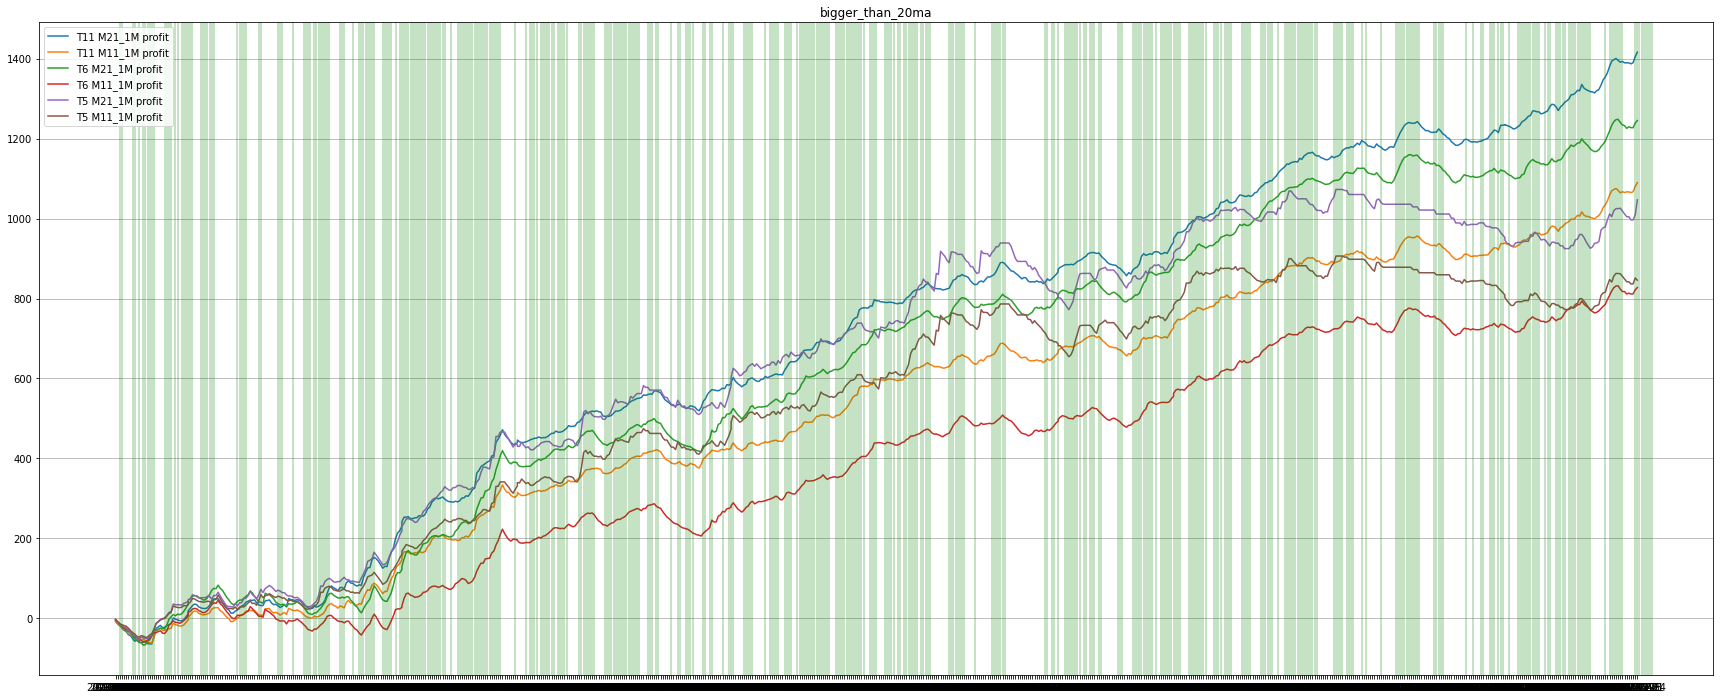

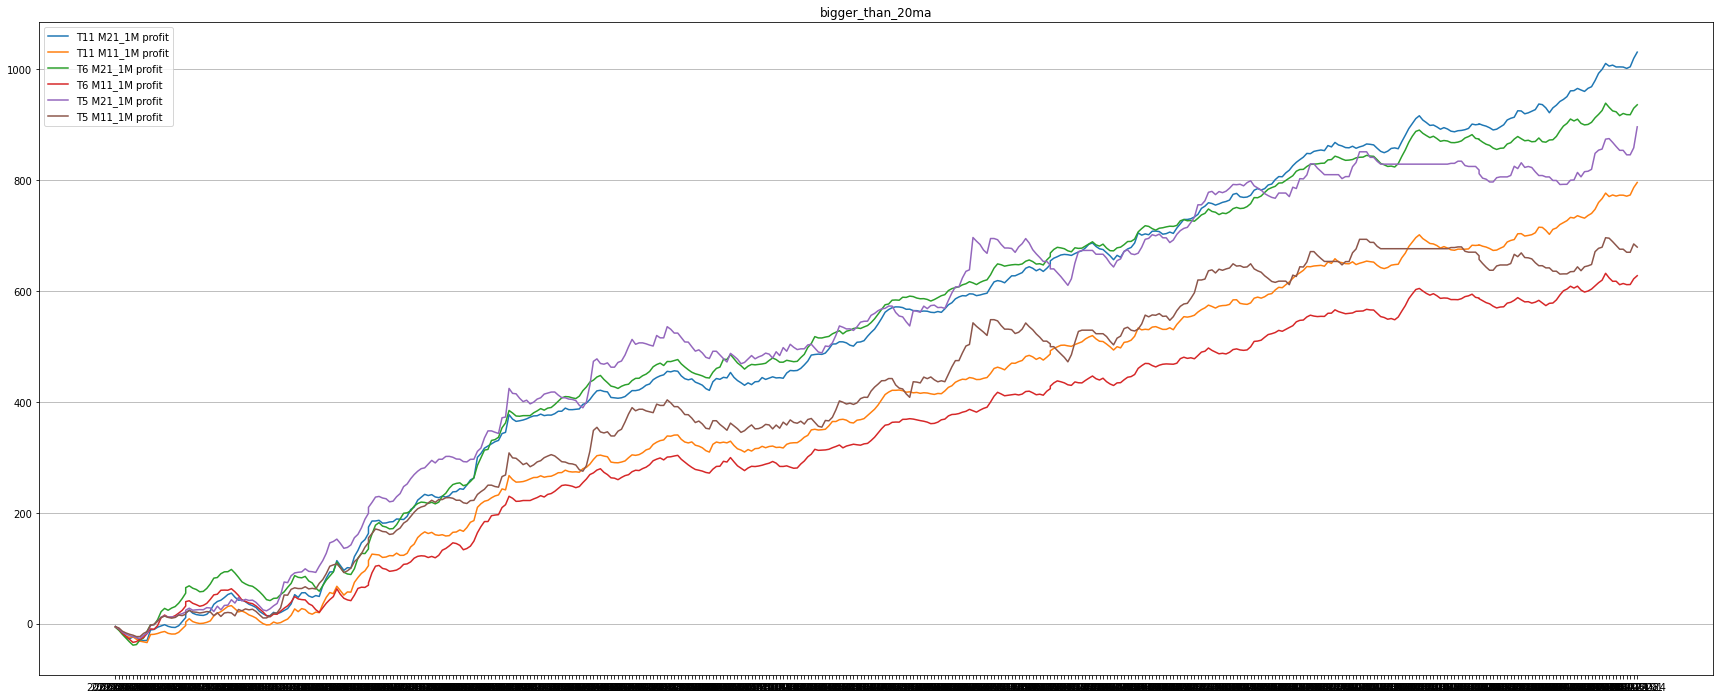

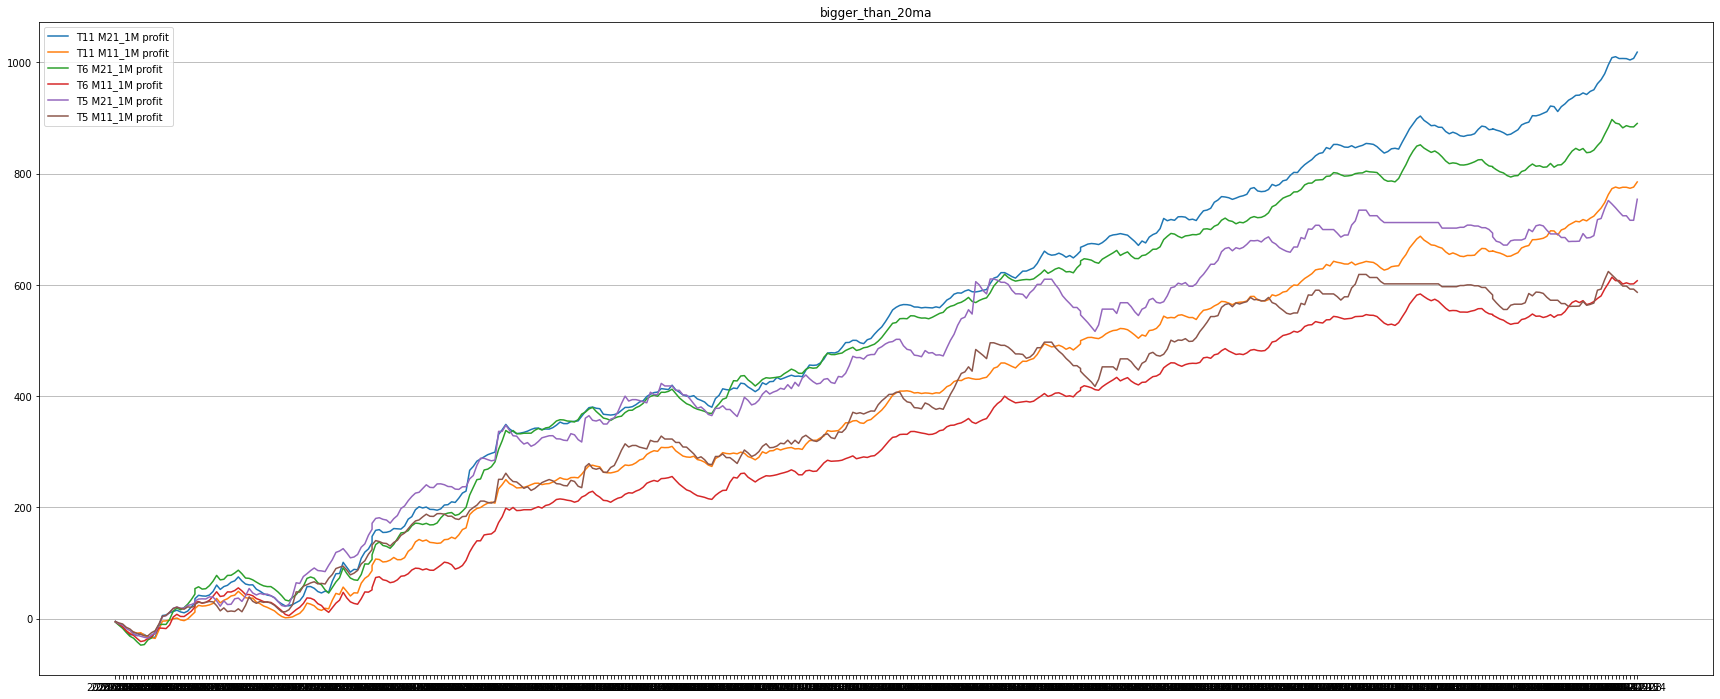

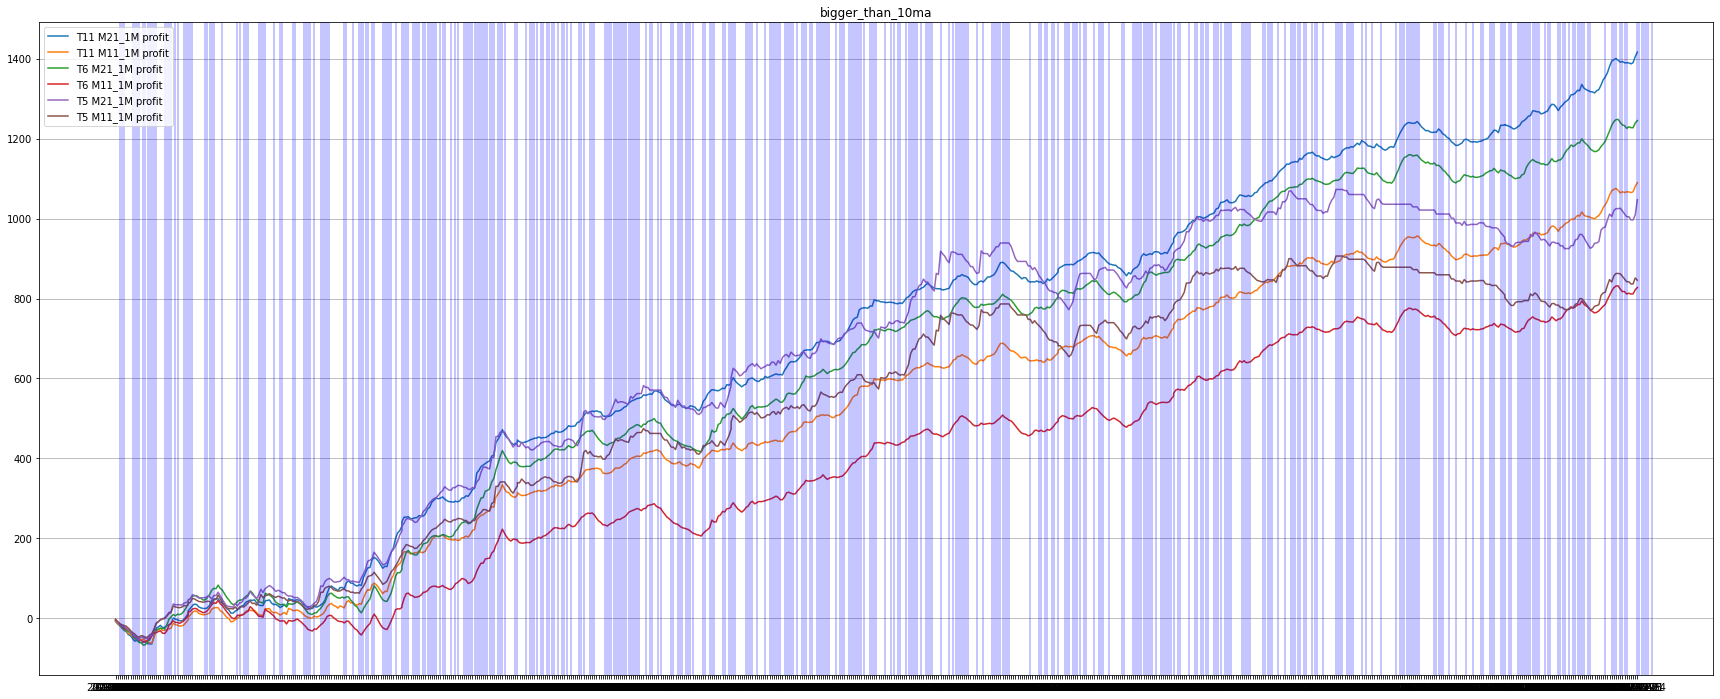

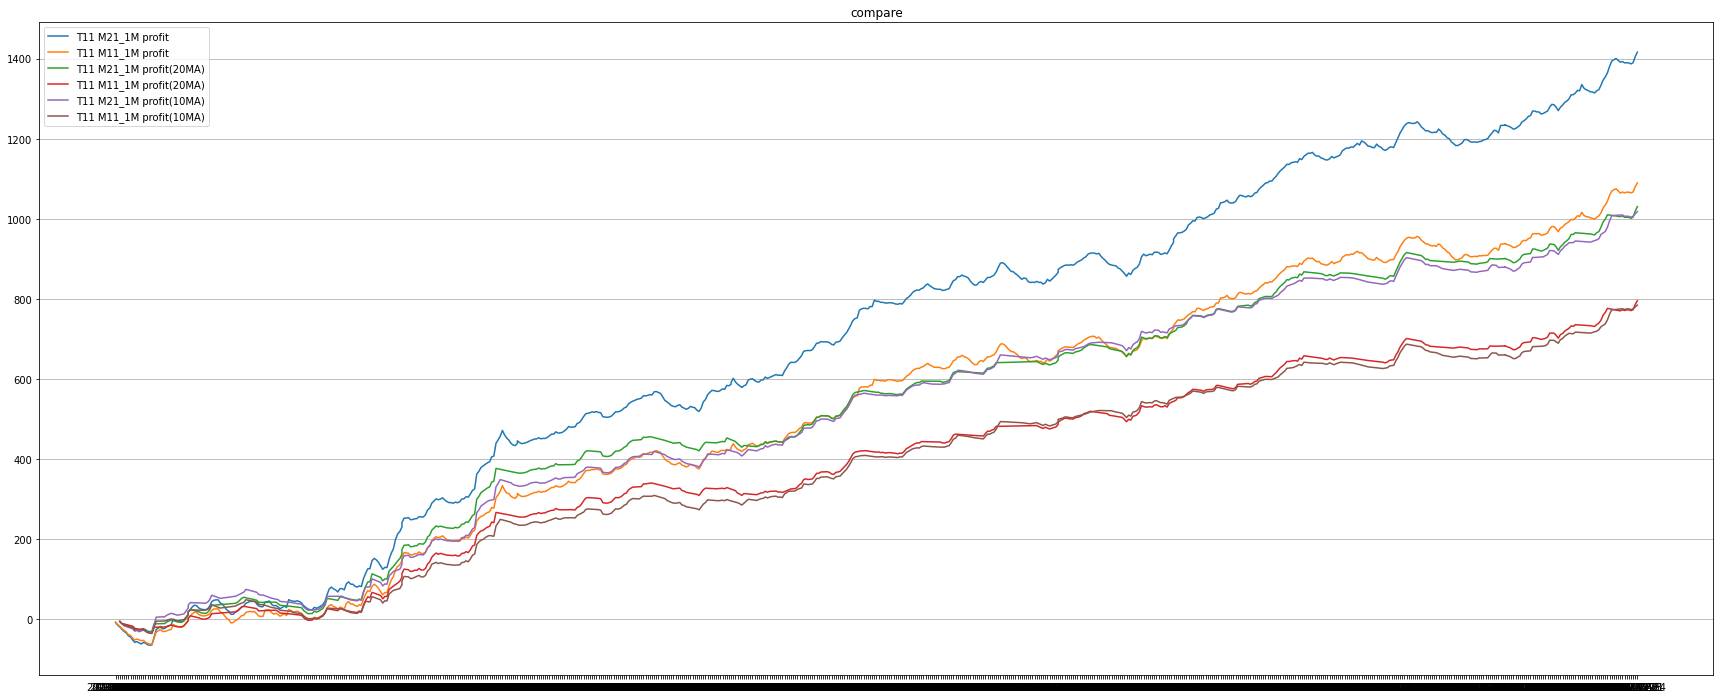

avg profit: 1.967475388620151
 avg profit(20MA): 2.3536856551658896
 avg profit(10MA): 2.3903299831476184


In [62]:
# 沒有過濾
plt.figure(figsize=(30,12))
plt.plot(df['T11 M21_1M profit'].cumsum(), label='T11 M21_1M profit')
plt.plot(df['T11 M11_1M profit'].cumsum(), label='T11 M11_1M profit')
plt.plot(df['T6 M21_1M profit'].cumsum(), label='T6 M21_1M profit')
plt.plot(df['T6 M11_1M profit'].cumsum(), label='T6 M11_1M profit')
plt.plot(df['T5 M21_1M profit'].cumsum(), label='T5 M21_1M profit')
plt.plot(df['T5 M11_1M profit'].cumsum(), label='T5 M11_1M profit')
# plot the vertical line if the df['bigger_than_20ma'] == True
for i in range(len(df)):
    if df['bigger_than_20ma'].iloc[i]:
        plt.axvline(x=i, color='g', linestyle='-', alpha=0.3)
plt.title('bigger_than_20ma')
plt.grid(axis='y')
plt.legend()
plt.show()
# 過濾大於20ma
plt.figure(figsize=(30,12))
plt.plot(df['T11 M21_1M profit'].loc[df['bigger_than_20ma']].cumsum(), label='T11 M21_1M profit')
plt.plot(df['T11 M11_1M profit'].loc[df['bigger_than_20ma']].cumsum(), label='T11 M11_1M profit')
plt.plot(df['T6 M21_1M profit'].loc[df['bigger_than_20ma']].cumsum(), label='T6 M21_1M profit')
plt.plot(df['T6 M11_1M profit'].loc[df['bigger_than_20ma']].cumsum(), label='T6 M11_1M profit')
plt.plot(df['T5 M21_1M profit'].loc[df['bigger_than_20ma']].cumsum(), label='T5 M21_1M profit')
plt.plot(df['T5 M11_1M profit'].loc[df['bigger_than_20ma']].cumsum(), label='T5 M11_1M profit')
# plot the vertical line if the df['bigger_than_20ma'] == True
# for i in range(len(df)):
#     if df['bigger_than_20ma'].iloc[i]:
#         plt.axvline(x=i, color='g', linestyle='-', alpha=0.3)
plt.title('bigger_than_20ma')
plt.grid(axis='y')
plt.legend()
plt.show()
# 過濾大於10ma
plt.figure(figsize=(30,12))
plt.plot(df['T11 M21_1M profit'].loc[df['bigger_than_10ma']].cumsum(), label='T11 M21_1M profit')
plt.plot(df['T11 M11_1M profit'].loc[df['bigger_than_10ma']].cumsum(), label='T11 M11_1M profit')
plt.plot(df['T6 M21_1M profit'].loc[df['bigger_than_10ma']].cumsum(), label='T6 M21_1M profit')
plt.plot(df['T6 M11_1M profit'].loc[df['bigger_than_10ma']].cumsum(), label='T6 M11_1M profit')
plt.plot(df['T5 M21_1M profit'].loc[df['bigger_than_10ma']].cumsum(), label='T5 M21_1M profit')
plt.plot(df['T5 M11_1M profit'].loc[df['bigger_than_10ma']].cumsum(), label='T5 M11_1M profit')
# plot the vertical line if the df['bigger_than_20ma'] == True
# for i in range(len(df)):
#     if df['bigger_than_20ma'].iloc[i]:
#         plt.axvline(x=i, color='g', linestyle='-', alpha=0.3)
plt.title('bigger_than_20ma')
plt.grid(axis='y')
plt.legend()
plt.show()
# 累加
plt.figure(figsize=(30,12))
plt.plot(df['T11 M21_1M profit'].cumsum(), label='T11 M21_1M profit')
plt.plot(df['T11 M11_1M profit'].cumsum(), label='T11 M11_1M profit')
plt.plot(df['T6 M21_1M profit'].cumsum(), label='T6 M21_1M profit')
plt.plot(df['T6 M11_1M profit'].cumsum(), label='T6 M11_1M profit')
plt.plot(df['T5 M21_1M profit'].cumsum(), label='T5 M21_1M profit')
plt.plot(df['T5 M11_1M profit'].cumsum(), label='T5 M11_1M profit')
# plot the vertical line if the df['bigger_than_20ma'] == True
for i in range(len(df)):
    if df['bigger_than_10ma'].iloc[i]:
        plt.axvline(x=i, color='b', linestyle='-', alpha=0.3)
plt.title('bigger_than_10ma')
plt.grid(axis='y')
plt.legend()
plt.show()


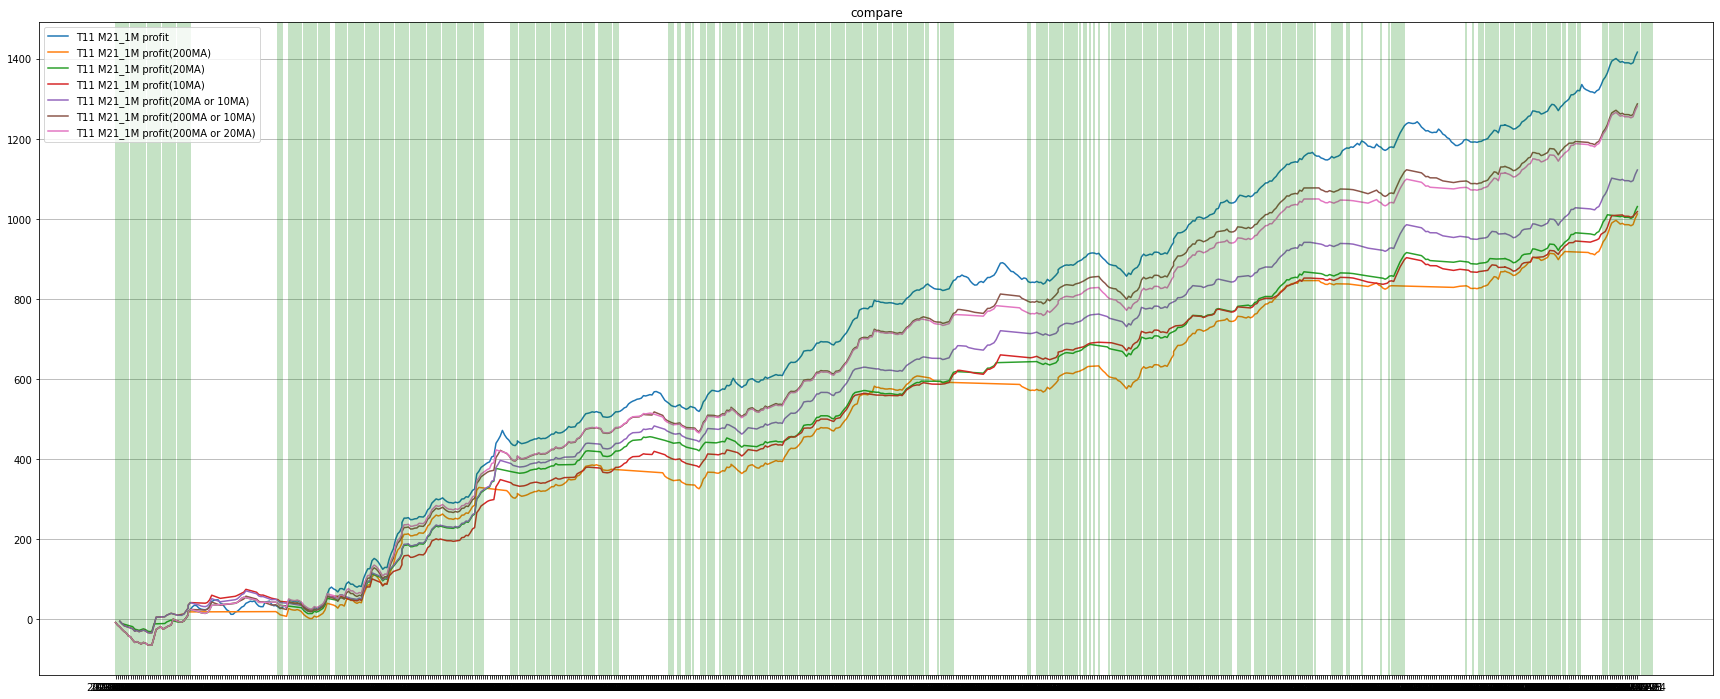

avg profit: 1.967475388620151
 avg profit(20MA): 2.3536856551658896
       avg profit(10MA): 2.3903299831476184
          avg profit(20MA and 10MA): 2.452080432602723
              avg profit(20MA or 10MA): 2.3092767206990032
                  avg profit(200MA): 1.9735912184853603
                      avg profit(150MA): 1.9164163039465978
                          avg profit(100MA): 1.9677246641999013
                              avg profit(50MA): 2.0427356383335833
'


In [75]:
# 比較

plt.figure(figsize=(30,12))
plt.plot(df['T11 M21_1M profit'].cumsum(), label='T11 M21_1M profit')
# plt.plot(df['T11 M11_1M profit'].cumsum(), label='T11 M11_1M profit')
#200ma
plt.plot(df['T11 M21_1M profit'].loc[df['taiex_close'] > df['taiex_200ma']].cumsum(), label='T11 M21_1M profit(200MA)')
# #150ma
# plt.plot(df['T11 M21_1M profit'].loc[df['taiex_close'] > df['taiex_150ma']].cumsum(), label='T11 M21_1M profit(150MA)')
# #100ma
# plt.plot(df['T11 M21_1M profit'].loc[df['taiex_close'] > df['taiex_100ma']].cumsum(), label='T11 M21_1M profit(100MA)')
# #50ma
# plt.plot(df['T11 M21_1M profit'].loc[df['taiex_close'] > df['taiex_50ma']].cumsum(), label='T11 M21_1M profit(50MA)')
#20ma
plt.plot(df['T11 M21_1M profit'].loc[df['bigger_than_20ma']].cumsum(), label='T11 M21_1M profit(20MA)')
#10ma
plt.plot(df['T11 M21_1M profit'].loc[df['bigger_than_10ma']].cumsum(), label='T11 M21_1M profit(10MA)')
#
# plt.plot(df['T11 M21_1M profit'].loc[list(map(lambda x,y:all([x,y]), df['bigger_than_20ma'], df['bigger_than_10ma']))].cumsum(), label='T11 M21_1M profit(20MA and 10MA)')
plt.plot(df['T11 M21_1M profit'].loc[list(map(lambda x,y:any([x,y]), df['bigger_than_20ma'], df['bigger_than_10ma']))].cumsum(), label='T11 M21_1M profit(20MA or 10MA)')
plt.plot(df['T11 M21_1M profit'].loc[list(map(lambda x,y:any([x,y]), df['taiex_close'] > df['taiex_200ma'], df['bigger_than_10ma']))].cumsum(), label='T11 M21_1M profit(200MA or 10MA)')
plt.plot(df['T11 M21_1M profit'].loc[list(map(lambda x,y:any([x,y]), df['taiex_close'] > df['taiex_200ma'], df['bigger_than_20ma']))].cumsum(), label='T11 M21_1M profit(200MA or 20MA)')


plt.title('compare')
for i in range(len(df)):
    if df['taiex_close'].iloc[i] > df['taiex_200ma'].iloc[i]:
        plt.axvline(x=i, color='g', linestyle='-', alpha=0.3)
plt.grid(axis='y')
plt.legend()
plt.savefig(r'C:\Users\User\Desktop\code\python\stockdata_VCP\VCP_predict_project\ETF test\compare.png', dpi=300, bbox_inches='tight')
plt.show()
print(f'avg profit: {df["T11 M21_1M profit"].mean()}\n avg profit(20MA): {df["T11 M21_1M profit"].loc[df["bigger_than_20ma"]].mean()}\n\
       avg profit(10MA): {df["T11 M21_1M profit"].loc[df["bigger_than_10ma"]].mean()}\n\
          avg profit(20MA and 10MA): {df["T11 M21_1M profit"].loc[list(map(lambda x,y:all([x,y]), df["bigger_than_20ma"], df["bigger_than_10ma"]))].mean()}\n\
              avg profit(20MA or 10MA): {df["T11 M21_1M profit"].loc[list(map(lambda x,y:any([x,y]), df["bigger_than_20ma"], df["bigger_than_10ma"]))].mean()}\n\
                  avg profit(200MA): {df["T11 M21_1M profit"].loc[df["taiex_close"] > df["taiex_200ma"]].mean()}\n\
                      avg profit(150MA): {df["T11 M21_1M profit"].loc[df["taiex_close"] > df["taiex_150ma"]].mean()}\n\
                          avg profit(100MA): {df["T11 M21_1M profit"].loc[df["taiex_close"] > df["taiex_100ma"]].mean()}\n\
                              avg profit(50MA): {df["T11 M21_1M profit"].loc[df["taiex_close"] > df["taiex_50ma"]].mean()}\n\'')


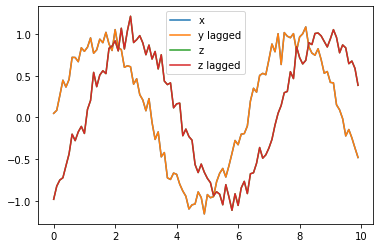

Lag between x and y: 0
Lag between x and z: 0


In [17]:
import numpy as np
import matplotlib.pyplot as plt

def find_lag(x, y, max_lag=None):
    if max_lag is None:
        max_lag = len(x) - 1

    # 计算互相关性
    cross_corr = np.correlate(x, y, mode='full')

    # 标准化互相关性
    cross_corr /= np.max(np.abs(cross_corr))

    # 找到最大互相关性的索引
    lag = np.argmax(np.abs(cross_corr[:max_lag+1])) - max_lag

    return lag

# 生成一些示例数据
np.random.seed(42)
x = np.arange(0, 10, 0.1)
y = np.sin(x) + 0.1 * np.random.randn(len(x))
z = np.sin(x - 1) + 0.1 * np.random.randn(len(x))

# 找到y相对于x的滞后
lag_y = find_lag(x, y)

# 找到z相对于x的滞后
lag_z = find_lag(x, z)

# 绘制原始数据和滞后后的数据
plt.plot(x, y, label='x')
plt.plot(x[abs(lag_y):], y[:len(x)-abs(lag_y)], label='y lagged')
plt.plot(x, z, label='z')
plt.plot(x[abs(lag_z):], z[:len(x)-abs(lag_z)], label='z lagged')
plt.legend()
plt.show()

# 输出滞后值
print(f"Lag between x and y: {lag_y}")
print(f"Lag between x and z: {lag_z}")


In [16]:
import numpy as np
def find_lag(x, y, max_lag=None):
    if max_lag is None:
        max_lag = len(x) - 1

    # 计算互相关性
    cross_corr = np.correlate(x, y, mode='full')

    # 标准化互相关性
    cross_corr /= np.max(np.abs(cross_corr))

    # 找到最大互相关性的索引
    lag = np.argmax(np.abs(cross_corr[:max_lag+1])) - max_lag

    return lag
for col in column_names:
    try:
        x = volume[col][:200]
        y = true_volume[col][:200]
        z = rs[col][:200]

        print(col)
        print('lag between true_volume and volume:', find_lag(x, y))
        print('lag between rs and volume:', find_lag(x, z))
        print('lag between rs and true volume:', find_lag(y, z))

    except:
        pass

水泥
lag between true_volume and volume: -1
lag between rs and volume: 0
lag between rs and true volume: 0
食品加工
lag between true_volume and volume: -1
lag between rs and volume: 0
lag between rs and true volume: 0
大宗物資
lag between true_volume and volume: -1
lag between rs and volume: -15
lag between rs and true volume: -14
飲料相關
lag between true_volume and volume: -1
lag between rs and volume: -3
lag between rs and true volume: 0
石化業
lag between true_volume and volume: -1
lag between rs and volume: 0
lag between rs and true volume: 0
化纖原料
lag between true_volume and volume: -1
lag between rs and volume: 0
lag between rs and true volume: 0
成衣
lag between true_volume and volume: -1
lag between rs and volume: 0
lag between rs and true volume: 0
紡織中游
lag between true_volume and volume: 0
機械
lag between true_volume and volume: 0
lag between rs and volume: 0
lag between rs and true volume: 0
電力設備
lag between true_volume and volume: 0
lag between rs and volume: 0
lag between rs and true volume: 

[*********************100%***********************]  1 of 1 completed


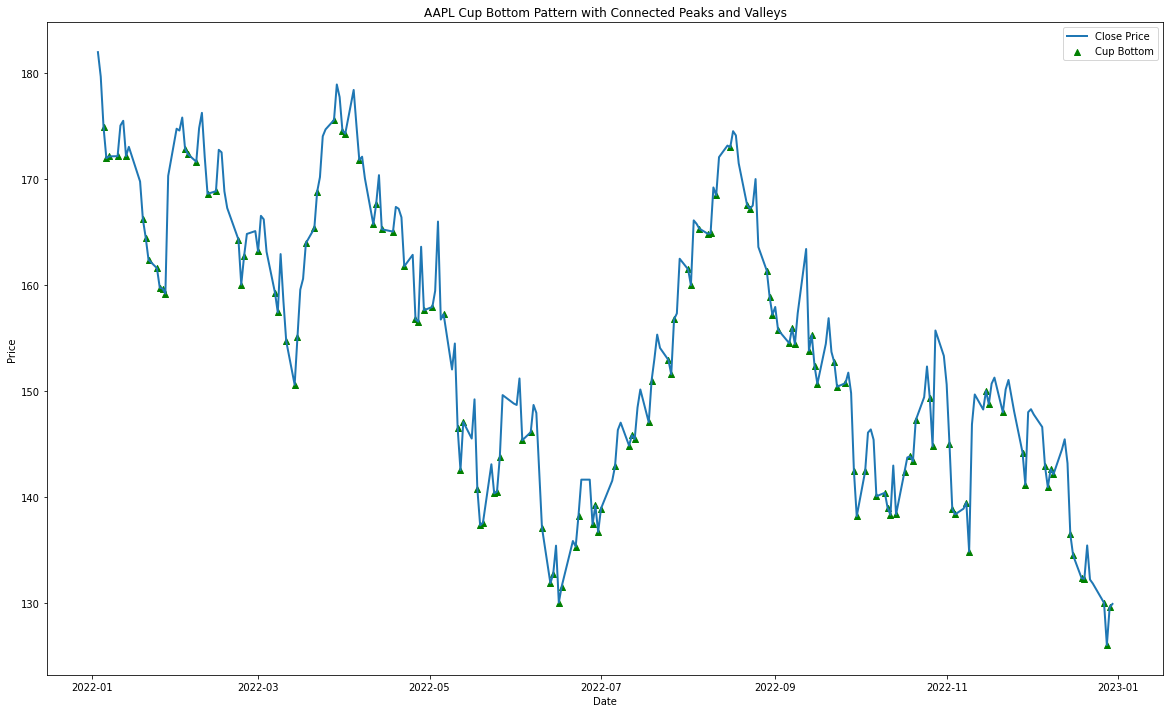

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

def find_cup_bottom(data, window=20):
    # 計算股價的二階導數
    price_concavity = np.gradient(np.gradient(data['Close'].values, axis=0), axis=0)

    # 尋找凹凸性由負轉正的區域，可能表示杯底形狀
    cup_bottom = price_concavity > 0

    return cup_bottom

def connect_peaks_and_valleys(data, peaks, valleys):
    # 將相對高點和相對低點的索引合併
    all_points = np.sort(np.concatenate([peaks, valleys]))

    # 繪製連接線
    for i in range(len(all_points) - 1):
        plt.plot(data.index[all_points[i]:all_points[i+1]+1], 
                 data['Close'].values[all_points[i]:all_points[i+1]+1], 
                 color='b' if i % 2 == 0 else 'r')

# 取得股價數據
symbol = "AAPL"
start_date = "2022-01-01"
end_date = "2023-01-01"

data = yf.download(symbol, start=start_date, end=end_date)

# 尋找杯底形狀
cup_bottom = find_cup_bottom(data)

# 找到相對高點和相對低點的索引
peaks, _ = find_peaks(data['Close'].values)
valleys, _ = find_peaks(-data['Close'].values)

# 繪製股價圖
plt.figure(figsize=(20, 12))
plt.plot(data['Close'], label='Close Price', linewidth=2)

# 標示杯底形狀
plt.scatter(data.index[cup_bottom], data['Close'][cup_bottom], marker='^', color='g', label='Cup Bottom')

# 連接相對高點和相對低點
# connect_peaks_and_valleys(data, peaks, valleys)

plt.title(f"{symbol} Cup Bottom Pattern with Connected Peaks and Valleys")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [3]:
import datetime
import requests
import pandas as pd
import numpy as np
import warnings
import datetime
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication
from email.header import Header
import openpyxl
import traceback
import sys
from tqdm import tqdm
from IPython.display import clear_output
from my_package.my_functions import concat_stock, template, rs_industry, print_industry_category_df, top_businessvolume_industry, HOLIDAY, TOKEN_FOR_UPDATE
warnings.filterwarnings('ignore')
try:
    day = datetime.datetime.strptime(str(datetime.date.today() - datetime.timedelta(days=0)) , '%Y-%m-%d' )
    top_businessvolume_industry(day)
except Exception as e:
    print(e)
    print('top_businessvolume_industry error')

"['2023-12-04 00:00:00'] not found in axis"
2023-12-04 00:00:00
add today top business volume industry.
top business volume industry... OK


In [2]:
import datetime
import requests
import pandas as pd
import numpy as np
import warnings
import datetime
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication
from email.header import Header
import openpyxl
import traceback
import sys
from tqdm import tqdm
from IPython.display import clear_output
from my_package.my_functions import concat_stock, template, rs_industry, print_industry_category_df, top_businessvolume_industry, HOLIDAY, TOKEN_FOR_UPDATE
warnings.filterwarnings('ignore')
class bcolors:
    OK = '\033[92m' #GREEN
    WARNING = '\033[93m' #YELLOW
    FAIL = '\033[91m' #RED
    RESET = '\033[0m' #RESET COLOR
#=============是否寄email============
sentemailornot = True

# ============上市股票df============
url = "https://isin.twse.com.tw/isin/class_main.jsp?owncode=&stockname=&isincode=&market=1&issuetype=1&industry_code=&Page=1&chklike=Y"
response = requests.get(url)
listed = pd.read_html(response.text)[0]
listed.columns = listed.iloc[0,:]
listed = listed[["有價證券代號","有價證券名稱","市場別","產業別","公開發行/上市(櫃)/發行日"]]
listed = listed.iloc[1:]

# ============上櫃股票df============
urlTWO = "https://isin.twse.com.tw/isin/class_main.jsp?owncode=&stockname=&isincode=&market=2&issuetype=&industry_code=&Page=1&chklike=Y"
response = requests.get(urlTWO)
listedTWO = pd.read_html(response.text)[0]
listedTWO.columns = listedTWO.iloc[0,:]
listedTWO = listedTWO.loc[listedTWO['有價證券別'] == '股票']
listedTWO = listedTWO[["有價證券代號","有價證券名稱","市場別","產業別","公開發行/上市(櫃)/發行日"]]

# ============上市股票代號+.TW============
stock_1 = listed["有價證券代號"]
stock_num = stock_1.apply(lambda x: str(x) + ".TW")
stock_num.loc[len(stock_num)+1] = '0050.TW'
stock_num.loc[len(stock_num)+1] = '^TWII'
# print(stock_num)

# ============上櫃股票代號+.TWO============
stock_2 = listedTWO["有價證券代號"]
stock_num2 = stock_2.apply(lambda x: str(x) + ".TWO")
# print(stock_num2)

# ============concate全部股票代號============
stock_num = pd.concat([stock_num, stock_num2], ignore_index=True)
# print(stock_num)
allstock_info = pd.concat([listed, listedTWO], ignore_index=True)
allstock_info.columns = ["ID","有價證券名稱","市場別","產業別","公開發行/上市(櫃)/發行日"]
allstock_info.set_index('ID', inplace = True)
# print(allstock_info)
# print(type(allstock_info['ID'].values[0]))

#============ 把要看日期的個股資料合併(一天)============
# for i in tqdm(range(0,657,1)[::-1], postfix='*******', ncols=150):
for i in [0]:
# ============改日期============
    # 今天日期往前推幾天(今日 - n_day_ago)
    n_day_ago = i
    try:
        day = datetime.datetime.strptime(str(datetime.date.today() - datetime.timedelta(days=n_day_ago)) , '%Y-%m-%d' )
        print('day: ', day)
        # if 6 or 7 or holiday then skip
        if day.weekday() == 5 or day.weekday() == 6 or day in HOLIDAY:
            continue
        ## ============第一個日期選出符合條件的股票並匯出excel============
        allstock = concat_stock(day, stock_num[2:])
        # fail_ID = ['1101.TW', '1102.TW', '1103.TW', '1104.TW', '1108.TW', '1109.TW', '1201.TW', '1203.TW', '1213.TW', '1229.TW', '1234.TW', '1313.TW', '1435.TW', '1733.TW', '2434.TW', '2440.TW', '2528.TW', '4569.TW', '6225.TW', '6655.TW', '2740.TWO', '2752.TWO', '3085.TWO', '3226.TWO', '3332.TWO', '3426.TWO', '3523.TWO', '4192.TWO', '4556.TWO', '4568.TWO', '4712.TWO', '4806.TWO', '5016.TWO', '5455.TWO', '5520.TWO', '5601.TWO', '6103.TWO', '6219.TWO', '6236.TWO', '6629.TWO', '8077.TWO', '8342.TWO', '8423.TWO', '8472.TWO', '8917.TWO', '8921.TWO', '9960.TWO']
        # fail_ID = list(map(lambda x:x.split('.')[0], fail_ID))
        # for failid in fail_ID:
        #     try:
        #         allstock.drop(failid, inplace=True)
        #     except:
                # pass

        # ============加入是否符合策略============
        allstock = template(allstock,allstock_info)
        # ID = allstock.index.values
        allstock.dropna(inplace=True)
        T5_ID = allstock.loc[allstock['T5']].index.values.astype(str)
        T5_2_ID = allstock.loc[allstock['T5-2']].index.values.astype(str)
        T6_ID = allstock.loc[allstock['T6'], ['產業別', 'RS EMA250rate']].sort_values(by='RS EMA250rate', ascending=True).iloc[-50:].index.values.astype(str)
        T11_ID = allstock.loc[allstock['T11']].index.values.astype(str)
        TM_ID = allstock.loc[allstock['TM']].index.values.astype(str)
        
        T5_stock_num = len(T5_ID)
        T5_2_stock_num = len(T5_2_ID)
        T6_stock_num = len(T6_ID)
        T11_stock_num = len(T11_ID)
        TM_stock_num = len(TM_ID)
        all_template_ID = list(set(np.concatenate([T5_ID,T5_2_ID,T6_ID,T11_ID,TM_ID])))
        all_template_ID_exTM = list(set(np.concatenate([T5_ID,T5_2_ID,T6_ID,T11_ID])))
        # ============防止用濾網篩選前50個的template混亂============
        allstock[['T5','T5-2','T6','T11','TM']] = False
        allstock.loc[T5_ID,'T5'] = True
        allstock.loc[T5_2_ID,'T5-2'] = True
        allstock.loc[T6_ID,'T6'] = True
        allstock.loc[T11_ID,'T11'] = True
        allstock.loc[TM_ID,'TM'] = True
        allstock[['RS 250rate', 'RS 50rate', 'RS 20rate', 'RS EMA250rate', 'RS EMA50rate', 'RS EMA20rate']] = allstock[['RS 250rate', 'RS 50rate', 'RS 20rate', 'RS EMA250rate', 'RS EMA50rate', 'RS EMA20rate']].astype(float).round(1)
        allstock['Volume 50MA'] = (allstock['Volume 50MA']/1000).astype(int)
        # for i,j in enumerate(allstock['TM']):
        #     if j != j:
        #         print(j, i, ID[i])
        #         allstock.drop(ID[i], axis=0, inplace=True)
        print(f'{bcolors.OK}All Template Stocks... {bcolors.RESET}', end='')

        #============今日符合策略全部股票============
        apexstock = allstock.loc[all_template_ID, ['Name', 'Adj Close', 'busness volume(億)', 'Volume 50MA', 'business volume 50MA(百萬)', '產業別'
                                            , 'RS EMA250rate', 'RS EMA50rate', 'RS EMA20rate', 'RS 250rate', 'RS 50rate', 'RS 20rate'
                                            , 'ATR250/price', 'ATR50/price', 'ATR20/price', 'STD7', 'STD20', 'STD50'
                                            ,'RS 250EMA is 10MAX','RS 50EMA is 10MAX','RS 20EMA is 10MAX', 'T5', 'T5-2', 'T6', 'T11', 'TM'
                                            , 'Price>150MA', 'Price>200MA', '50MA>150MA', '50MA>200MA', '150MA>200MA','year high sort', 'year low sort'
                                            , '200MA trending up 60d', 'Volume 50MA>100k', 'Volume 50MA>250k']]
        
        column_name = ['Name', 'Adj Close', 'busness volume(億)', 'Volume 50MA(張)', 'business volume 50MA(百萬)', '產業別'
                , 'ES250rate', 'ES50rate', 'ES20rate', 'S250rate', 'S50rate', 'S20rate'
                , 'ATR250/price', 'ATR50/price', 'ATR20/price', 'STD7', 'STD20', 'STD50'
                ,'ES250 is 10D MAX','ES50 is 10D MAX','ES20 is 10D MAX', 'T5', 'T5-2', 'T6', 'T11', 'TM'
                , 'Price>150MA', 'Price>200MA', '50MA>150MA', '50MA>200MA', '150MA>200MA','year high sort', 'year low sort'
                , '200MA trending up 60d', 'Volume 50MA>100k', 'Volume 50MA>250k']

        apexstock.columns = column_name
        apexstock = apexstock.dropna()
        print(f'{bcolors.OK}OK{bcolors.RESET}')
        print(f'All Template Stocks shape:{apexstock.shape}')
        
        print(f'{bcolors.OK}RS EMA250rate>80 Stocks... {bcolors.RESET}', end='')

        #============今日策略250ERS>80股票============
        apexstock2 = allstock.loc[allstock['RS EMA250rate>80'], ['Name', 'Adj Close', 'busness volume(億)', 'Volume 50MA', 'business volume 50MA(百萬)', '產業別'
                                            , 'RS EMA250rate', 'RS EMA50rate', 'RS EMA20rate', 'RS 250rate', 'RS 50rate', 'RS 20rate'
                                            , 'ATR250/price', 'ATR50/price', 'ATR20/price', 'STD7', 'STD20', 'STD50'
                                            ,'RS 250EMA is 10MAX','RS 50EMA is 10MAX','RS 20EMA is 10MAX', 'T5', 'T5-2', 'T6', 'T11', 'TM'
                                            , 'Price>150MA', 'Price>200MA', '50MA>150MA', '50MA>200MA', '150MA>200MA','year high sort', 'year low sort'
                                            , '200MA trending up 60d', 'Volume 50MA>100k', 'Volume 50MA>250k']]
        # apexstock2[['RS 250rate', 'RS 50rate', 'RS 20rate','RS EMA250rate', 'RS EMA50rate', 'RS EMA20rate']] = apexstock2[['RS 250rate', 'RS 50rate', 'RS 20rate','RS EMA250rate', 'RS EMA50rate', 'RS EMA20rate']].astype(float).round(0)
        apexstock2.columns = column_name
        apexstock2 = apexstock2.dropna()
        print(f'{bcolors.OK}OK{bcolors.RESET}')
        print(f'RS EMA250rate>80 Stocks shape:{apexstock2.shape}')

        print(f'{bcolors.OK}All Stocks... {bcolors.RESET}', end='')

        #============今日全部股票============
        sentstock = allstock.copy()
        allstock = allstock.loc[:, ['Name', 'Adj Close', 'busness volume(億)', 'Volume 50MA', 'business volume 50MA(百萬)', '產業別'
                                            , 'RS EMA250rate', 'RS EMA50rate', 'RS EMA20rate', 'RS 250rate', 'RS 50rate', 'RS 20rate'
                                            , 'ATR250/price', 'ATR50/price', 'ATR20/price', 'STD7', 'STD20', 'STD50'
                                            ,'RS 250EMA is 10MAX','RS 50EMA is 10MAX','RS 20EMA is 10MAX', 'T5', 'T5-2', 'T6', 'T11', 'TM'
                                            , 'Price>150MA', 'Price>200MA', '50MA>150MA', '50MA>200MA', '150MA>200MA','year high sort', 'year low sort'
                                            , '200MA trending up 60d', 'Volume 50MA>100k', 'Volume 50MA>250k']]
        # allstock[['RS 250rate', 'RS 50rate', 'RS 20rate','RS EMA250rate', 'RS EMA50rate', 'RS EMA20rate']] = allstock[['RS 250rate', 'RS 50rate', 'RS 20rate','RS EMA250rate', 'RS EMA50rate', 'RS EMA20rate']].astype(float).round(0)
        allstock.columns = column_name
        allstock = allstock.dropna()
        print(f'{bcolors.OK}OK{bcolors.RESET}')
        print(f'All Stocks Shape:{allstock.shape}{bcolors.RESET}')
        
        # print(len(apexstock.index))

        #============匯出全個股條件篩選excel============
        sent_file_path = 'C:/Users/User/Desktop/StockInfoHub/Stock_Data_Collector/全個股條件篩選/' + str(day).split(' ')[0] + '選股' + '.xlsx'
        # allstock.to_excel(sent_file_path, encoding='utf-8-sig')
        try:
            top_businessvolume_industry(day)
        except Exception as e:
            print(e)
            print('top_businessvolume_industry error')
        print(str(day))
    except Exception as e:
        print(e)
    # clean cell output
    # clear_output()
    print(day)

day:  2023-12-04 00:00:00
Stocks Concatenation...
                 Open       High   Low  Close Adj Close    Volume    ID  \
2023-12-04  19.299999  19.299999  19.1  19.15     19.15  313482.0  1103   

              5MA  10MA   20MA  ... RS 20EMA 250MAX RS 250EMA is 250MAX  \
2023-12-04  19.19  19.1  18.81  ...       95.632699               False   

           RS 50EMA is 250MAX RS 20EMA is 250MAX    ATR250     ATR50  \
2023-12-04              False              False  0.770594  0.313771   

               ATR20      STD7    STD20     STD50  
2023-12-04  0.248419  0.763076  1.90471  2.214343  

[1 rows x 93 columns]
1225.TW : datetime.datetime(2023, 12, 4, 0, 0)
1236.TW : columns not match
1236.TW
1256.TW : columns not match
1256.TW


KeyboardInterrupt: 

2022-06-01 00:00:00


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\mplfinance\plotting.py:476: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
C:\Users\User\AppData\Local\Temp\ipykernel_9792\3058806943.py:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(30, 12))


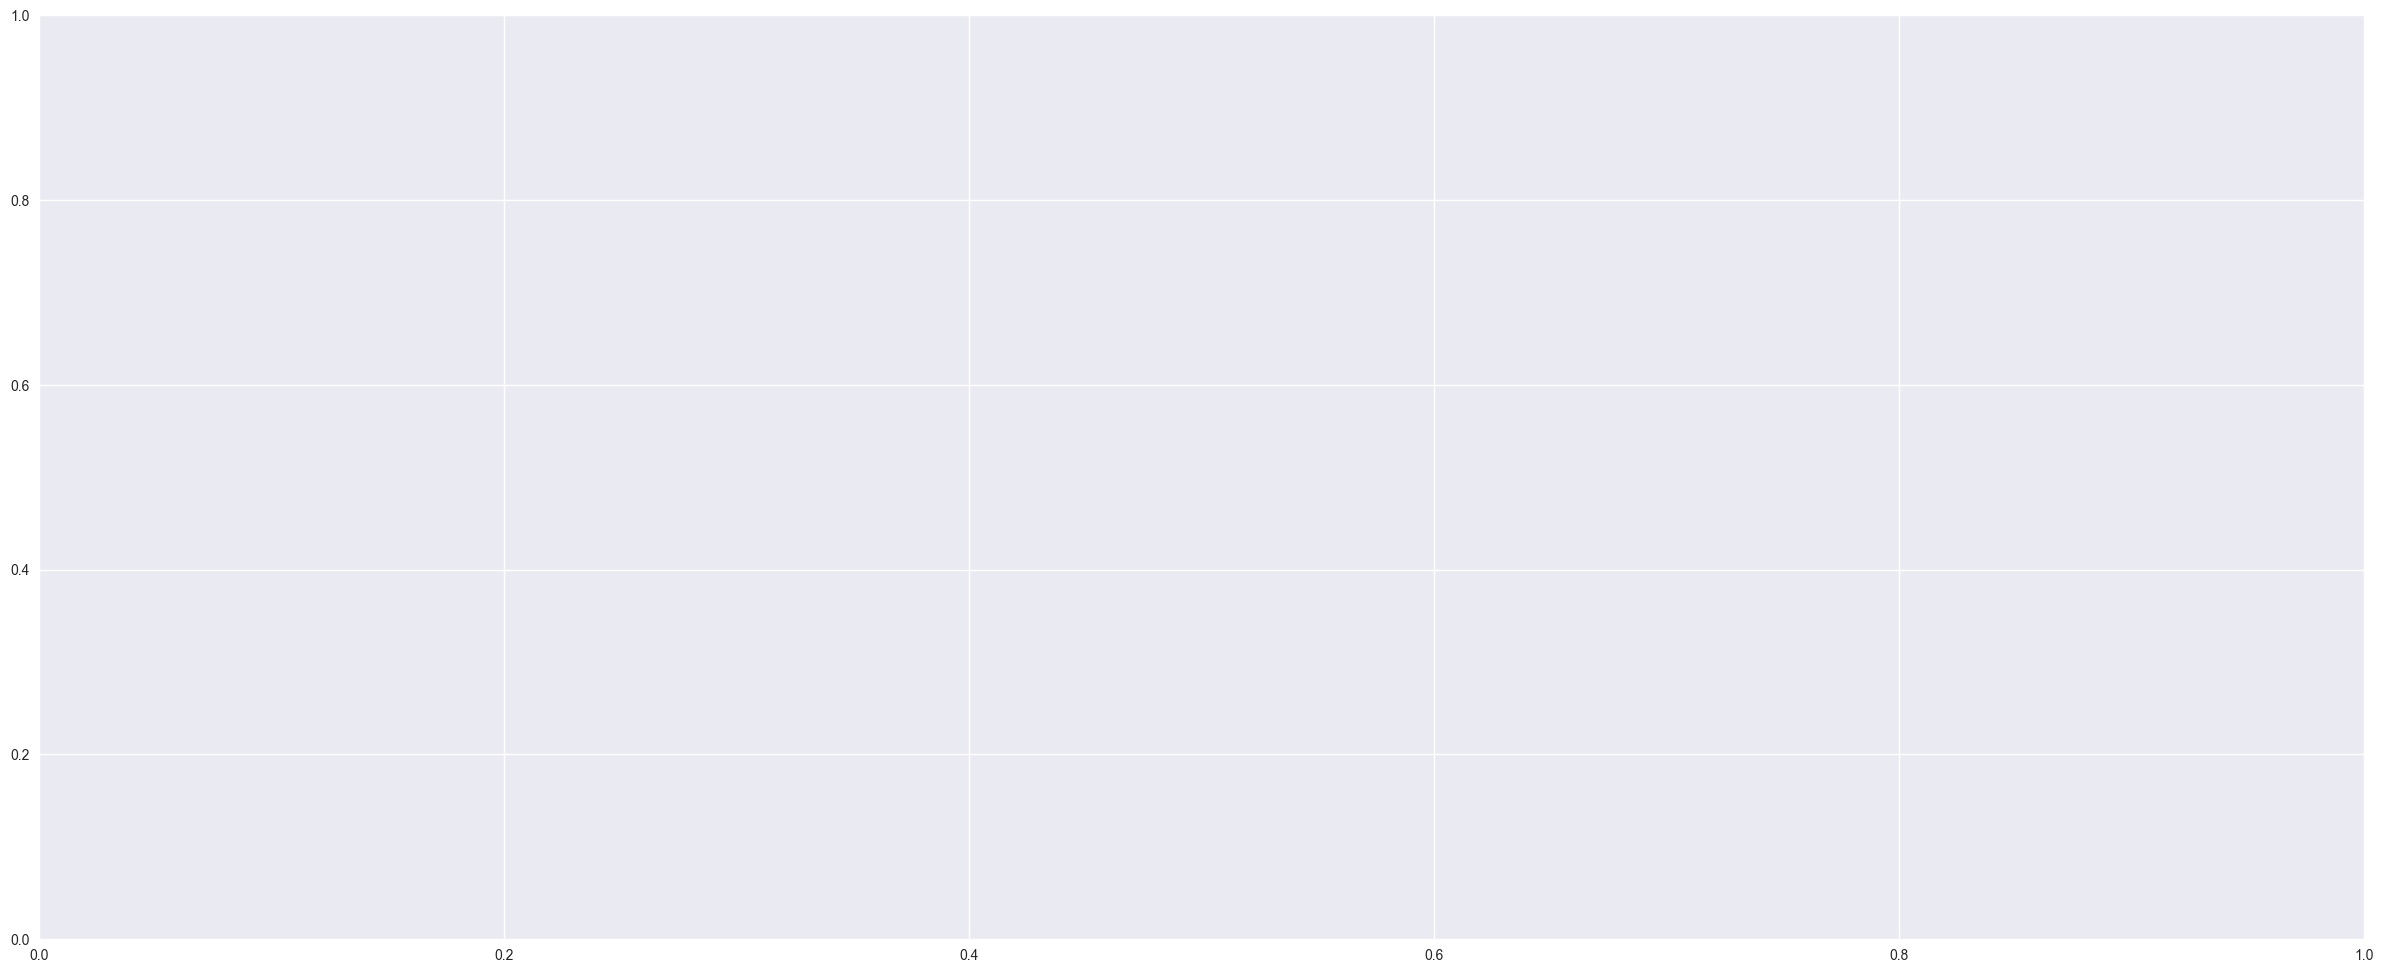

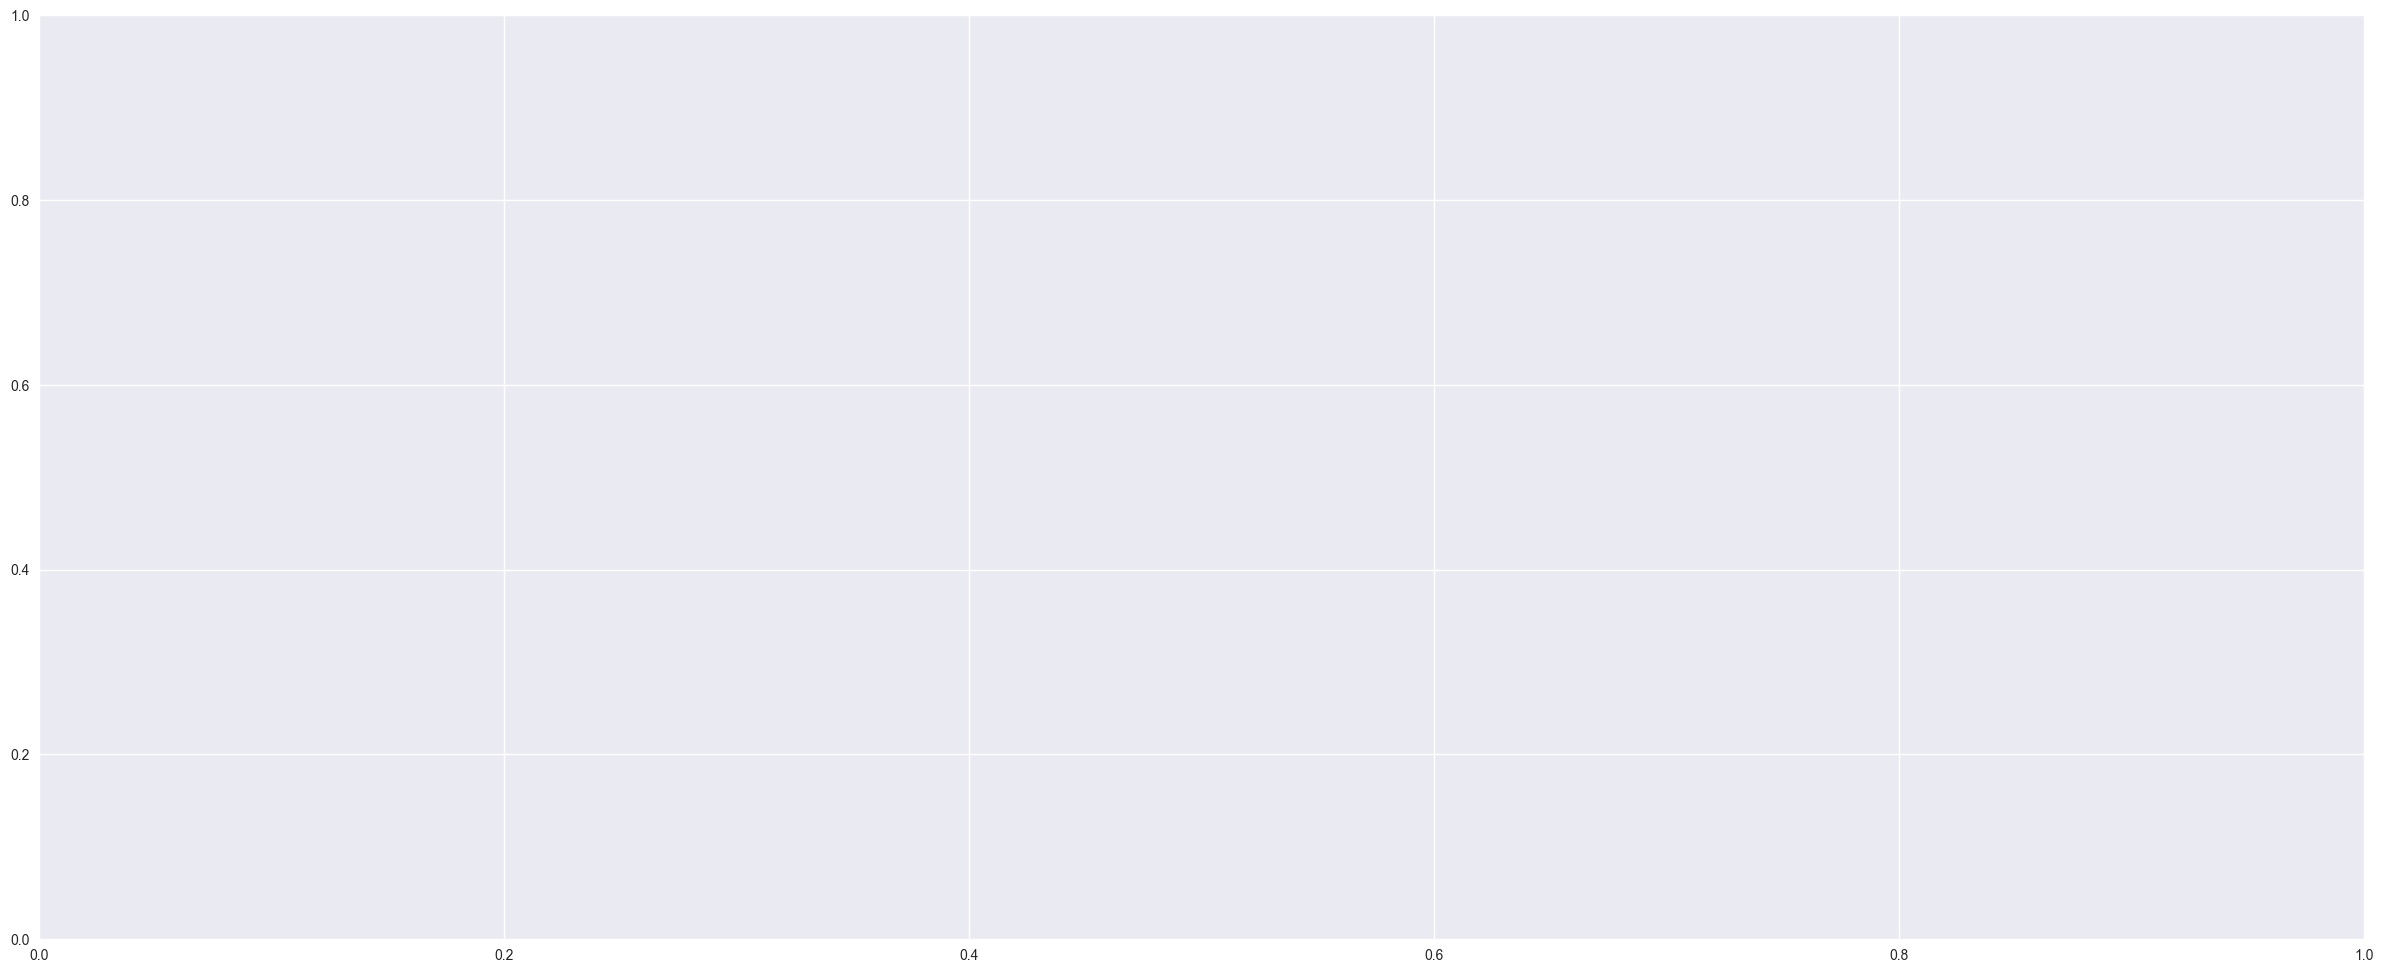

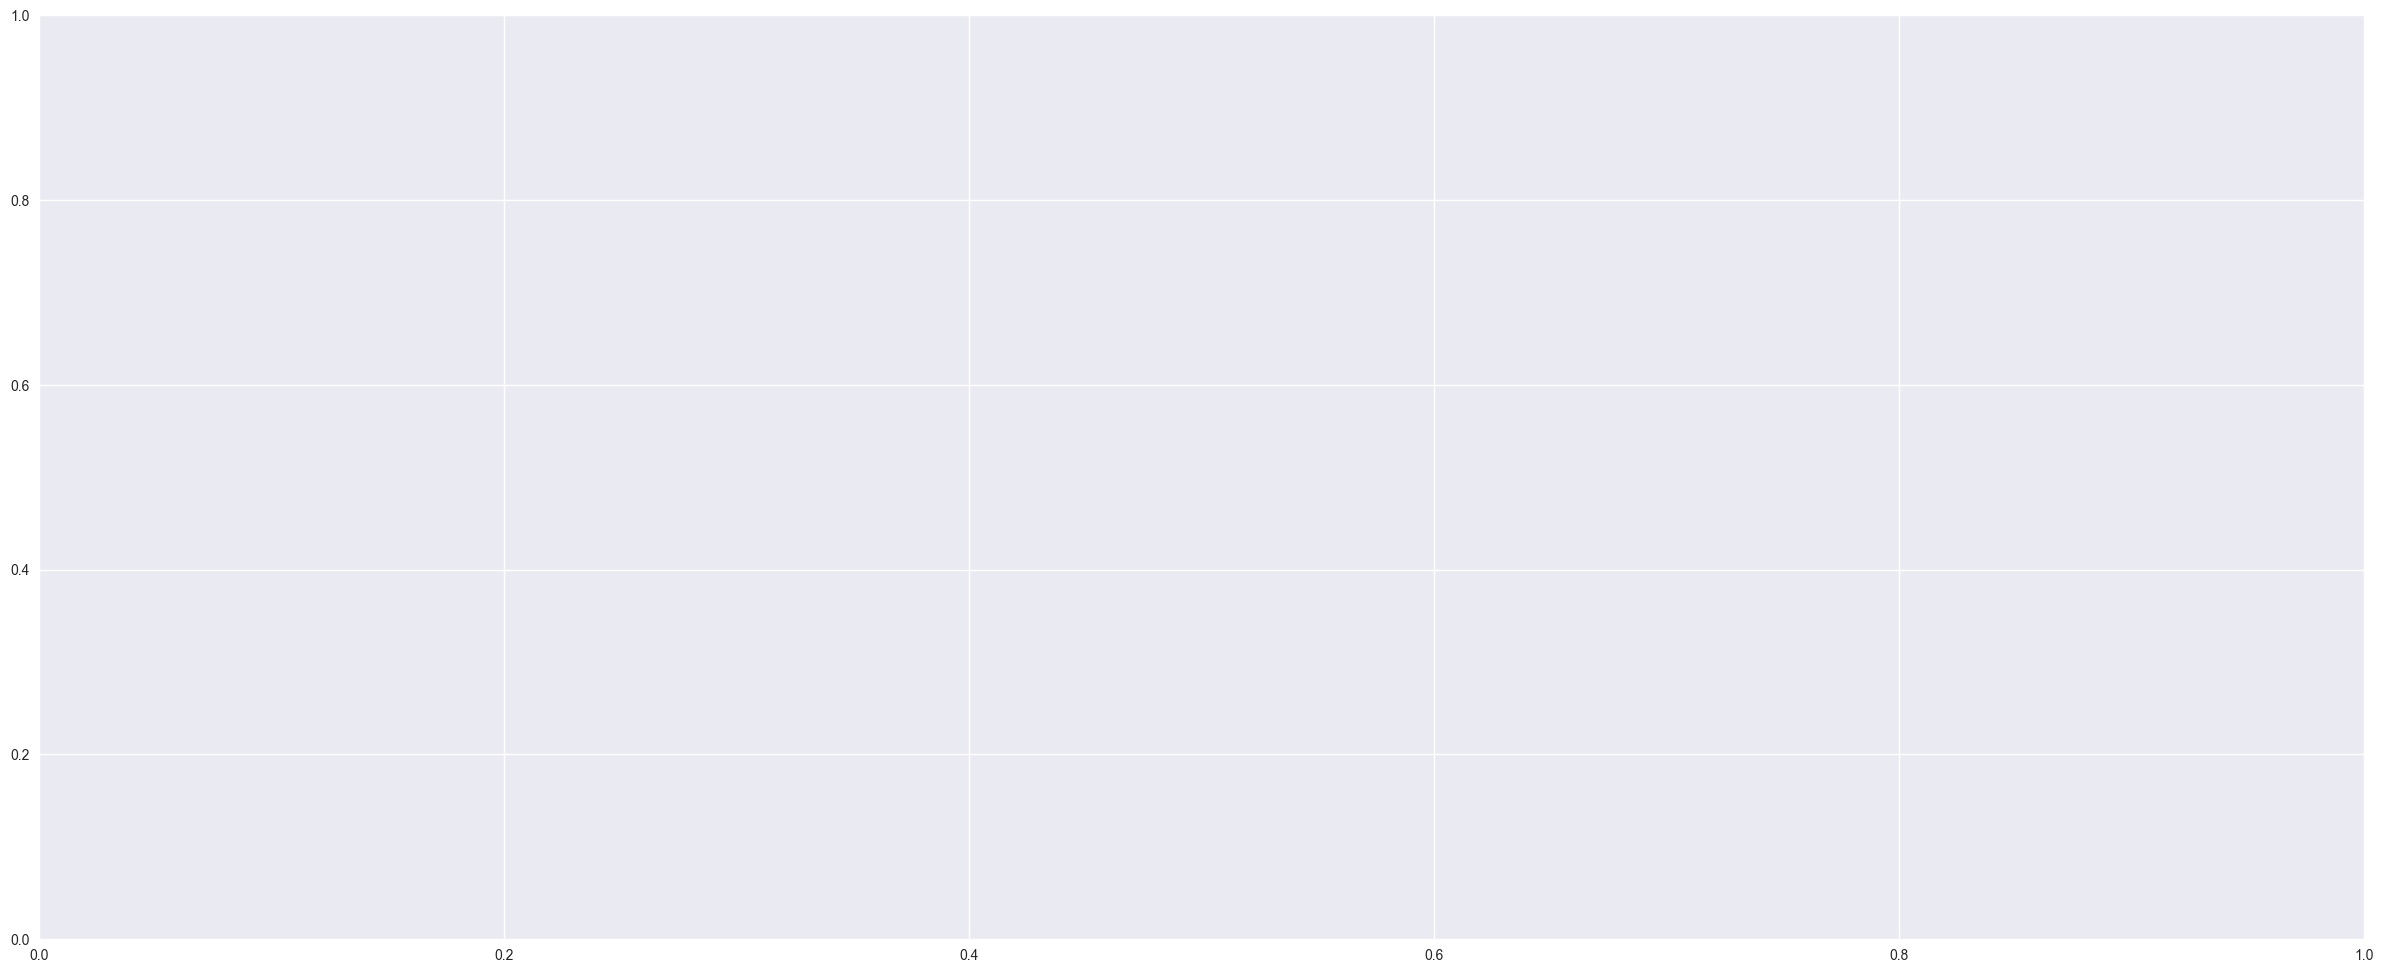

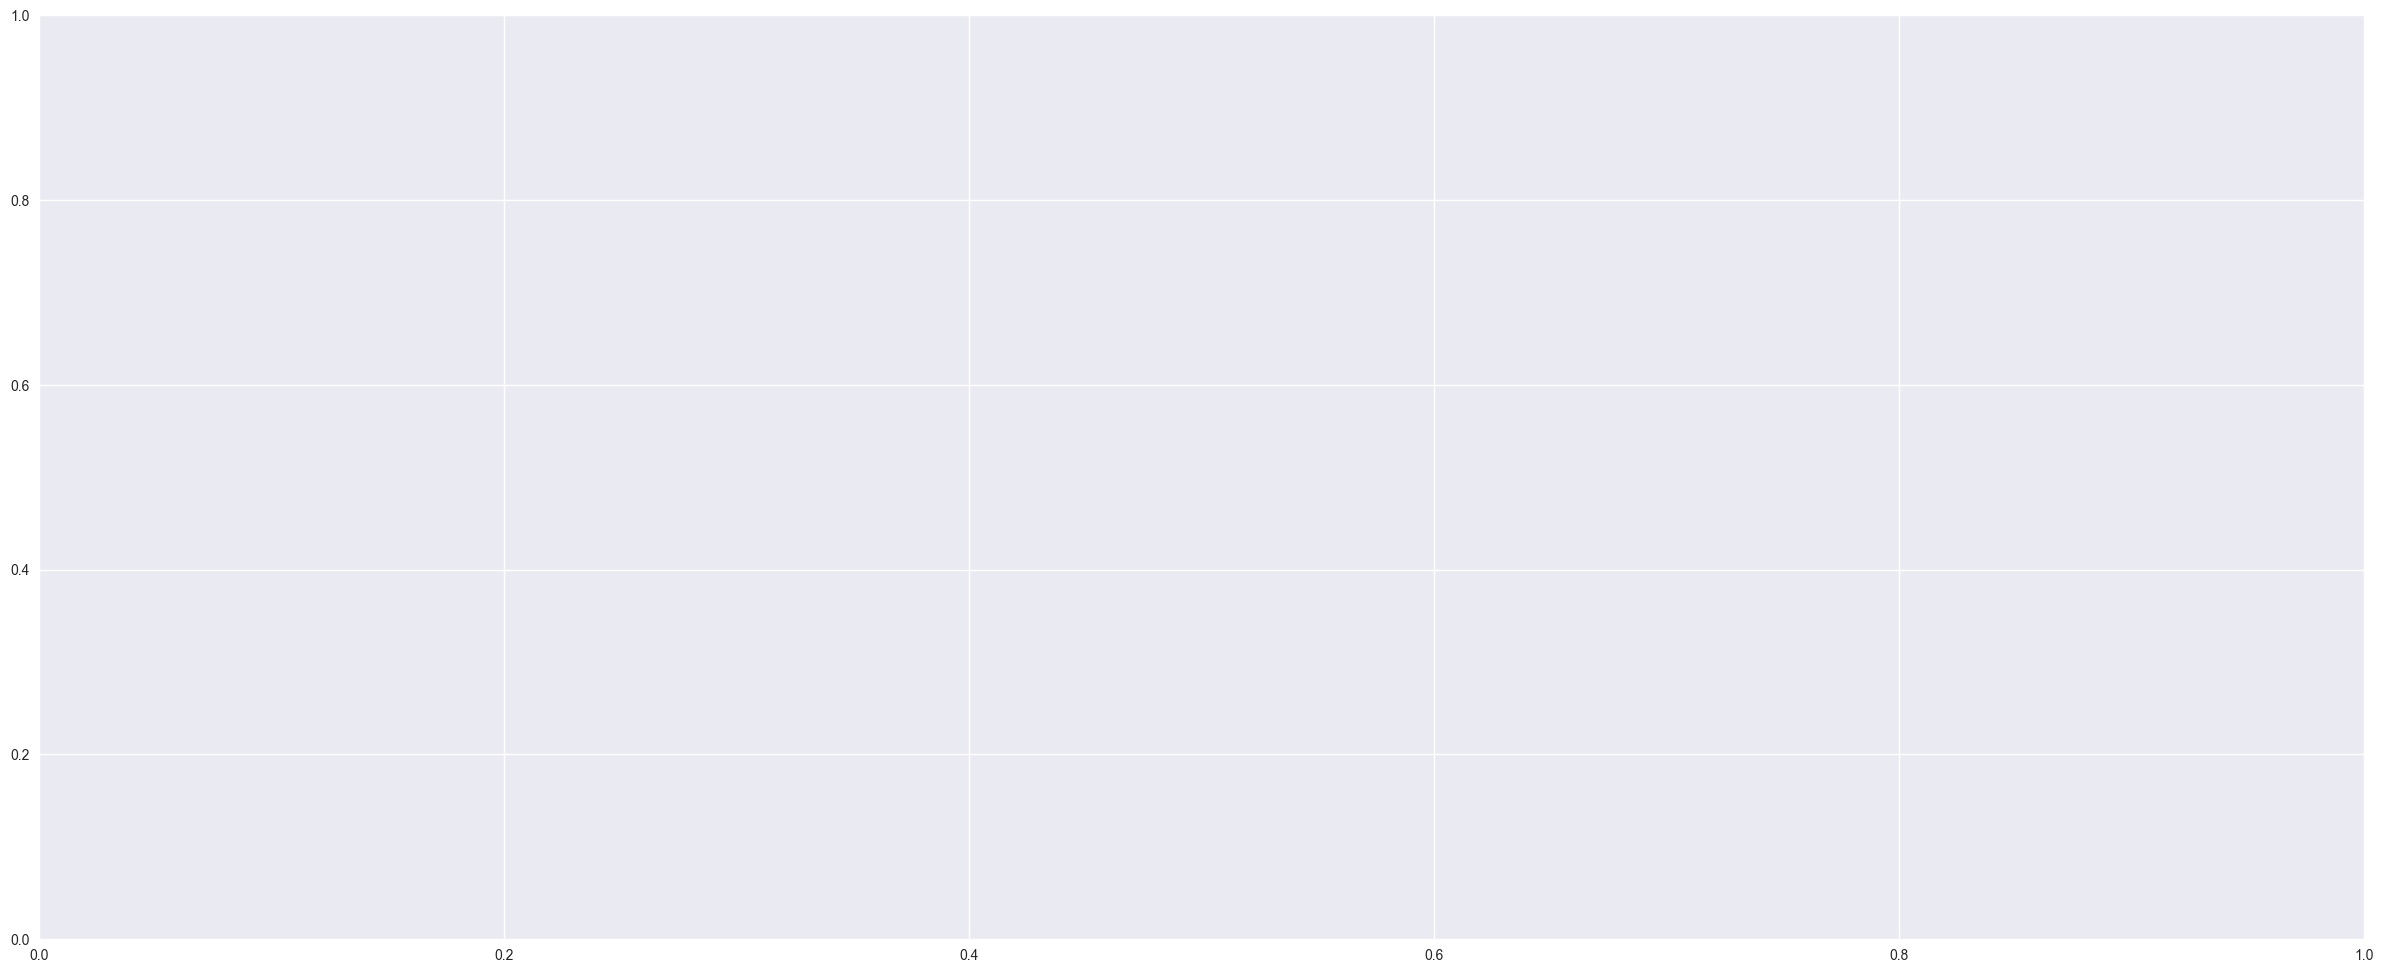

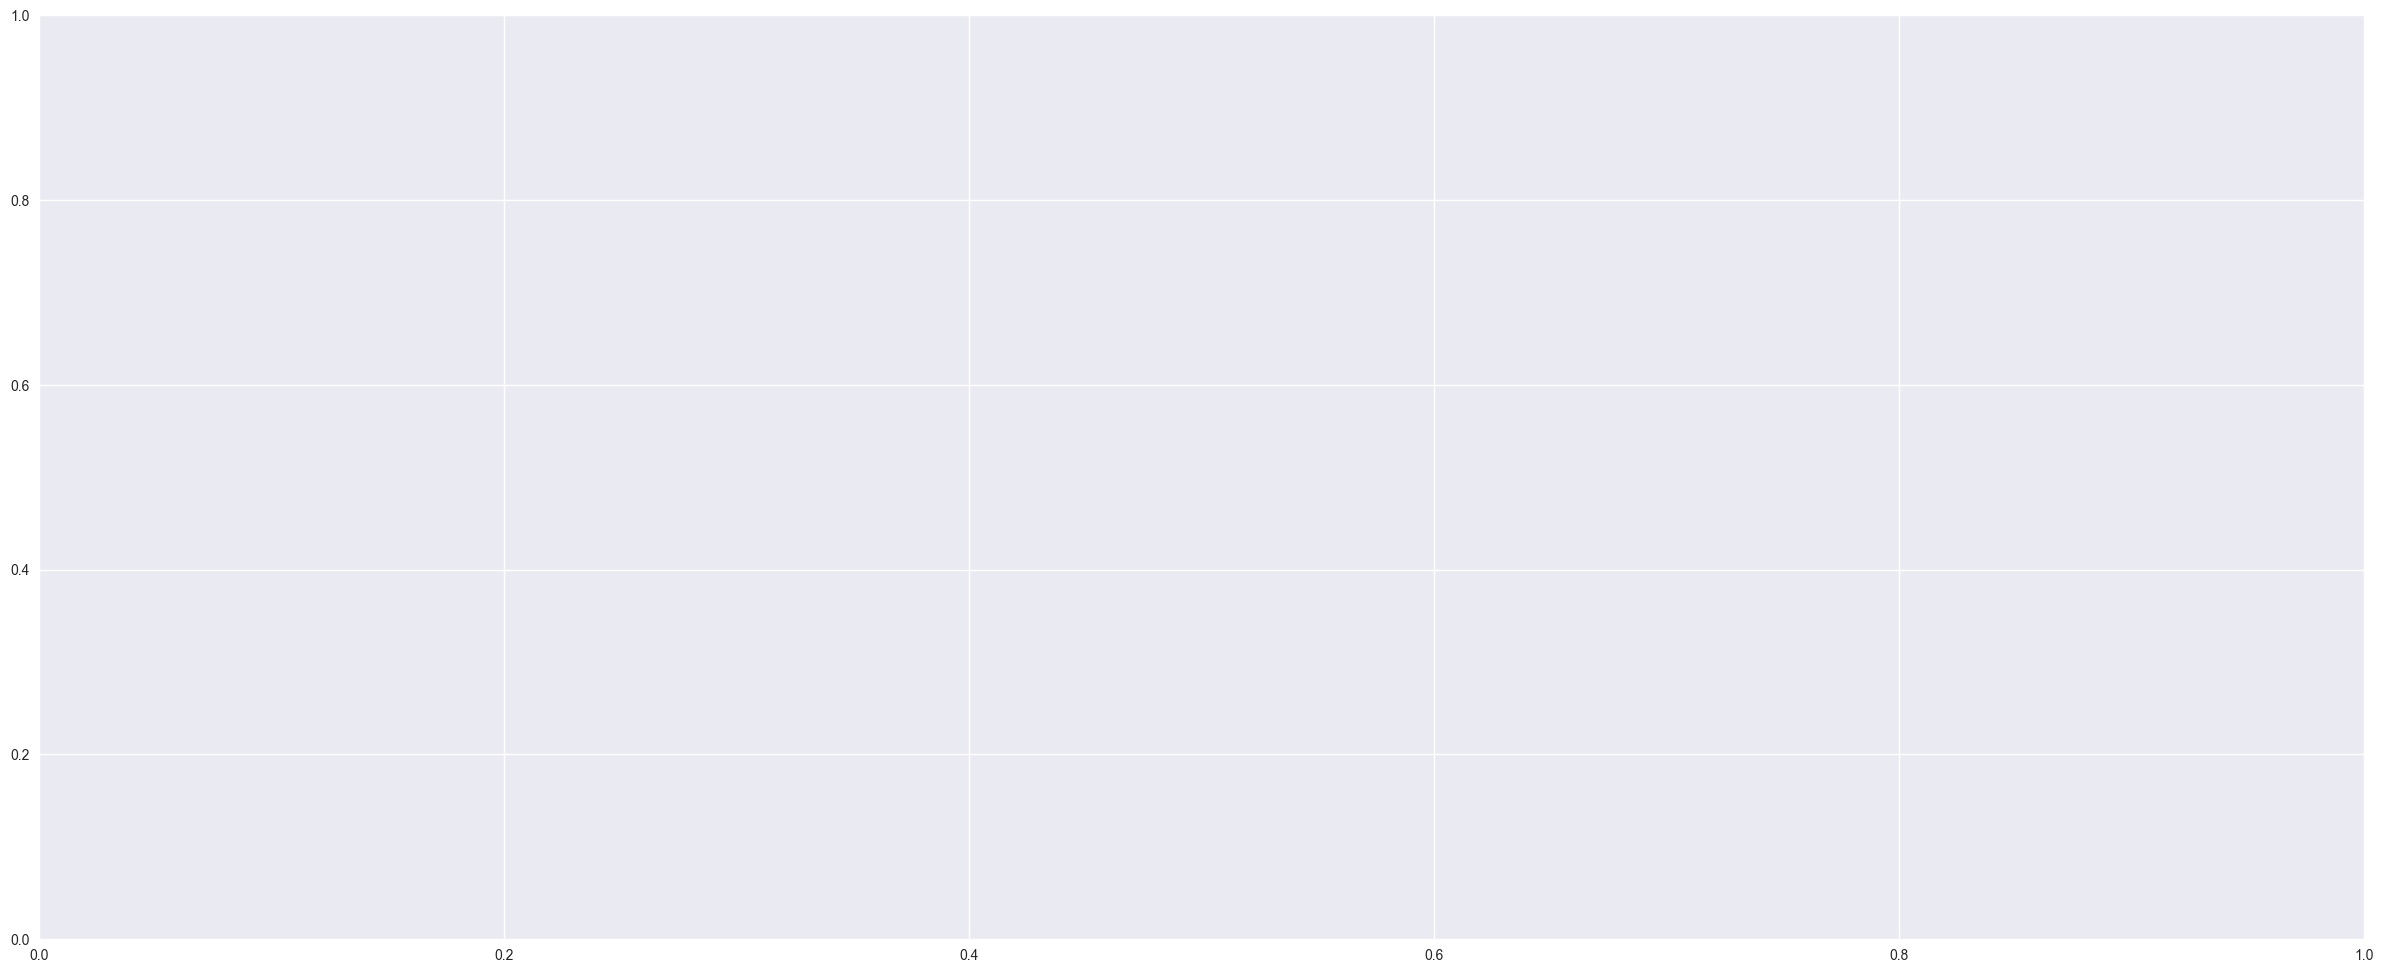

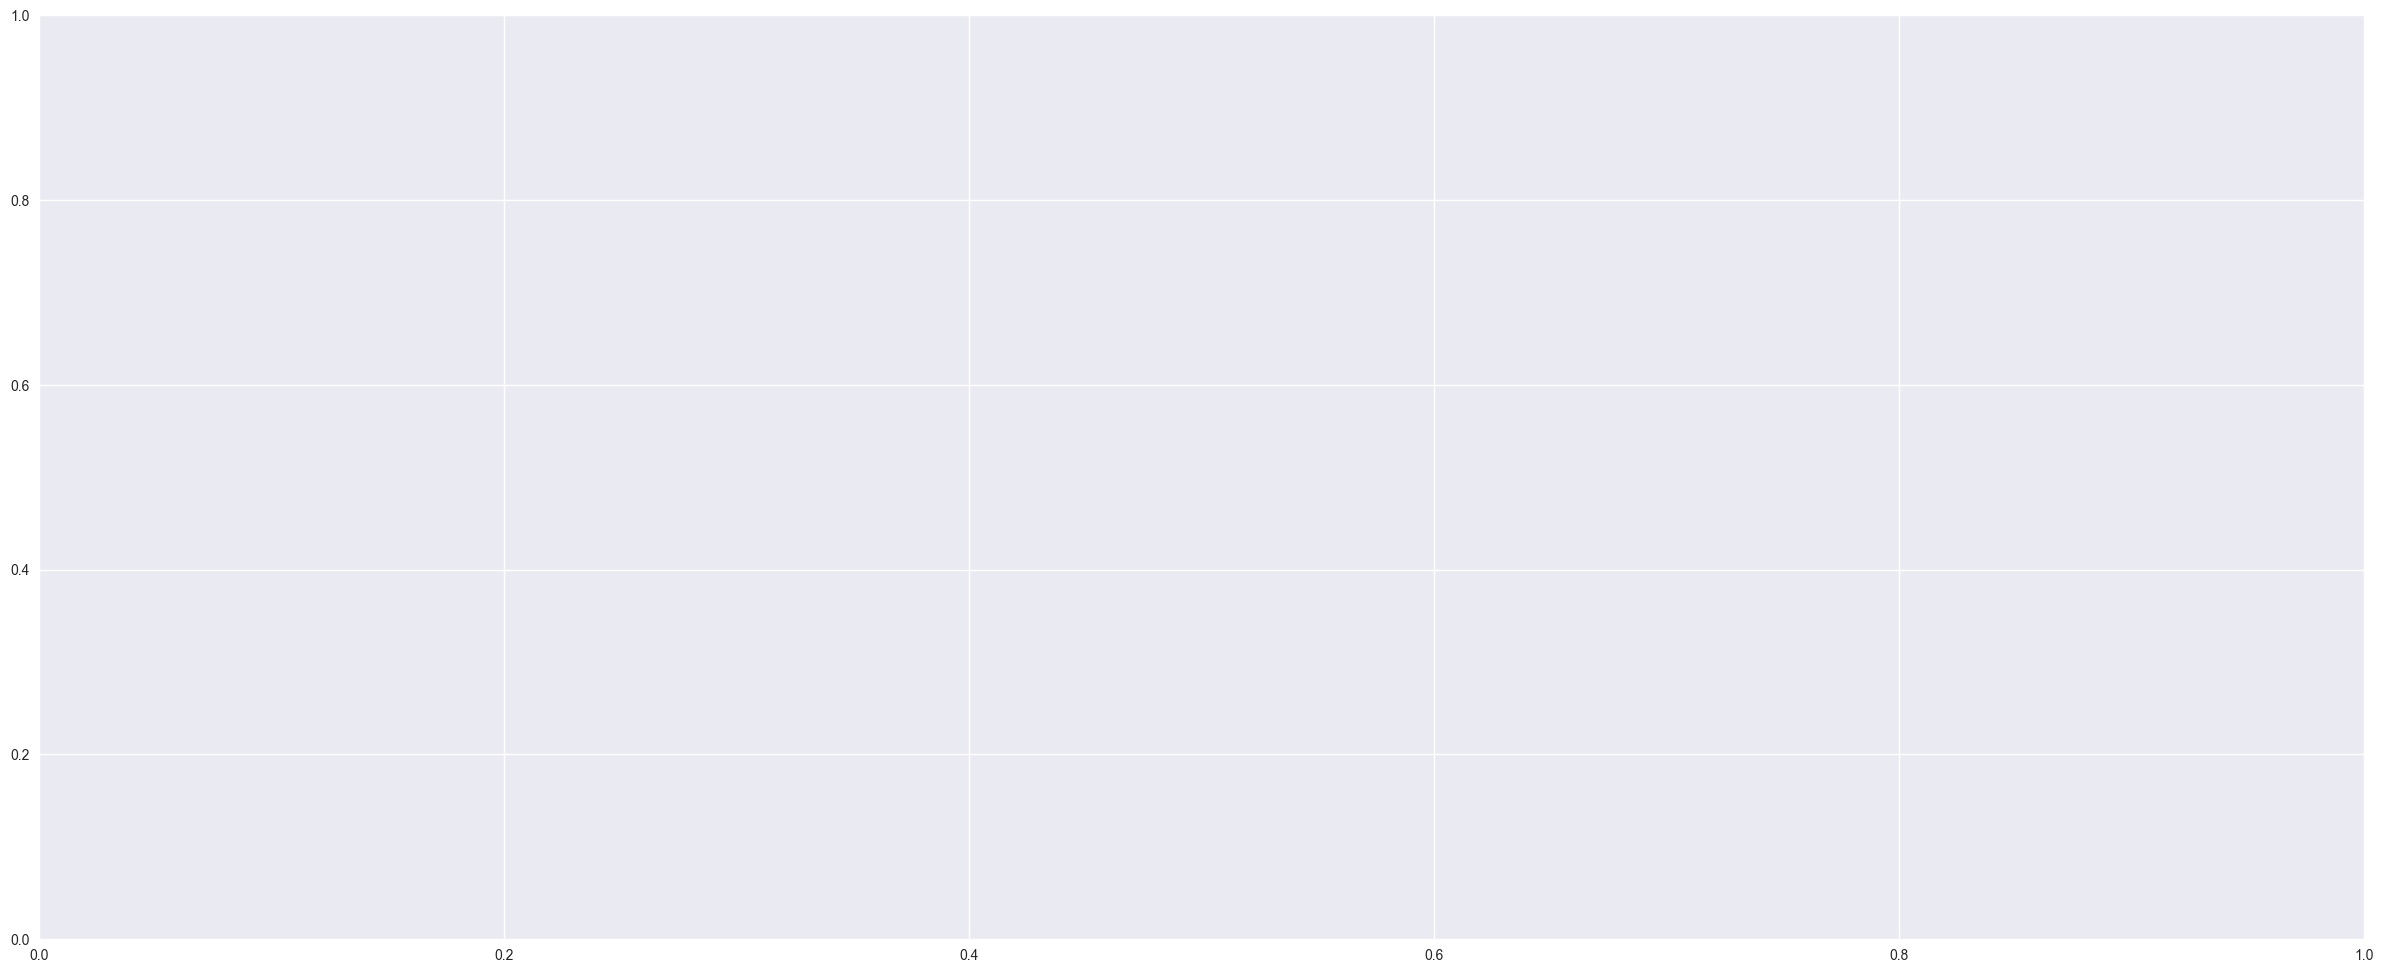

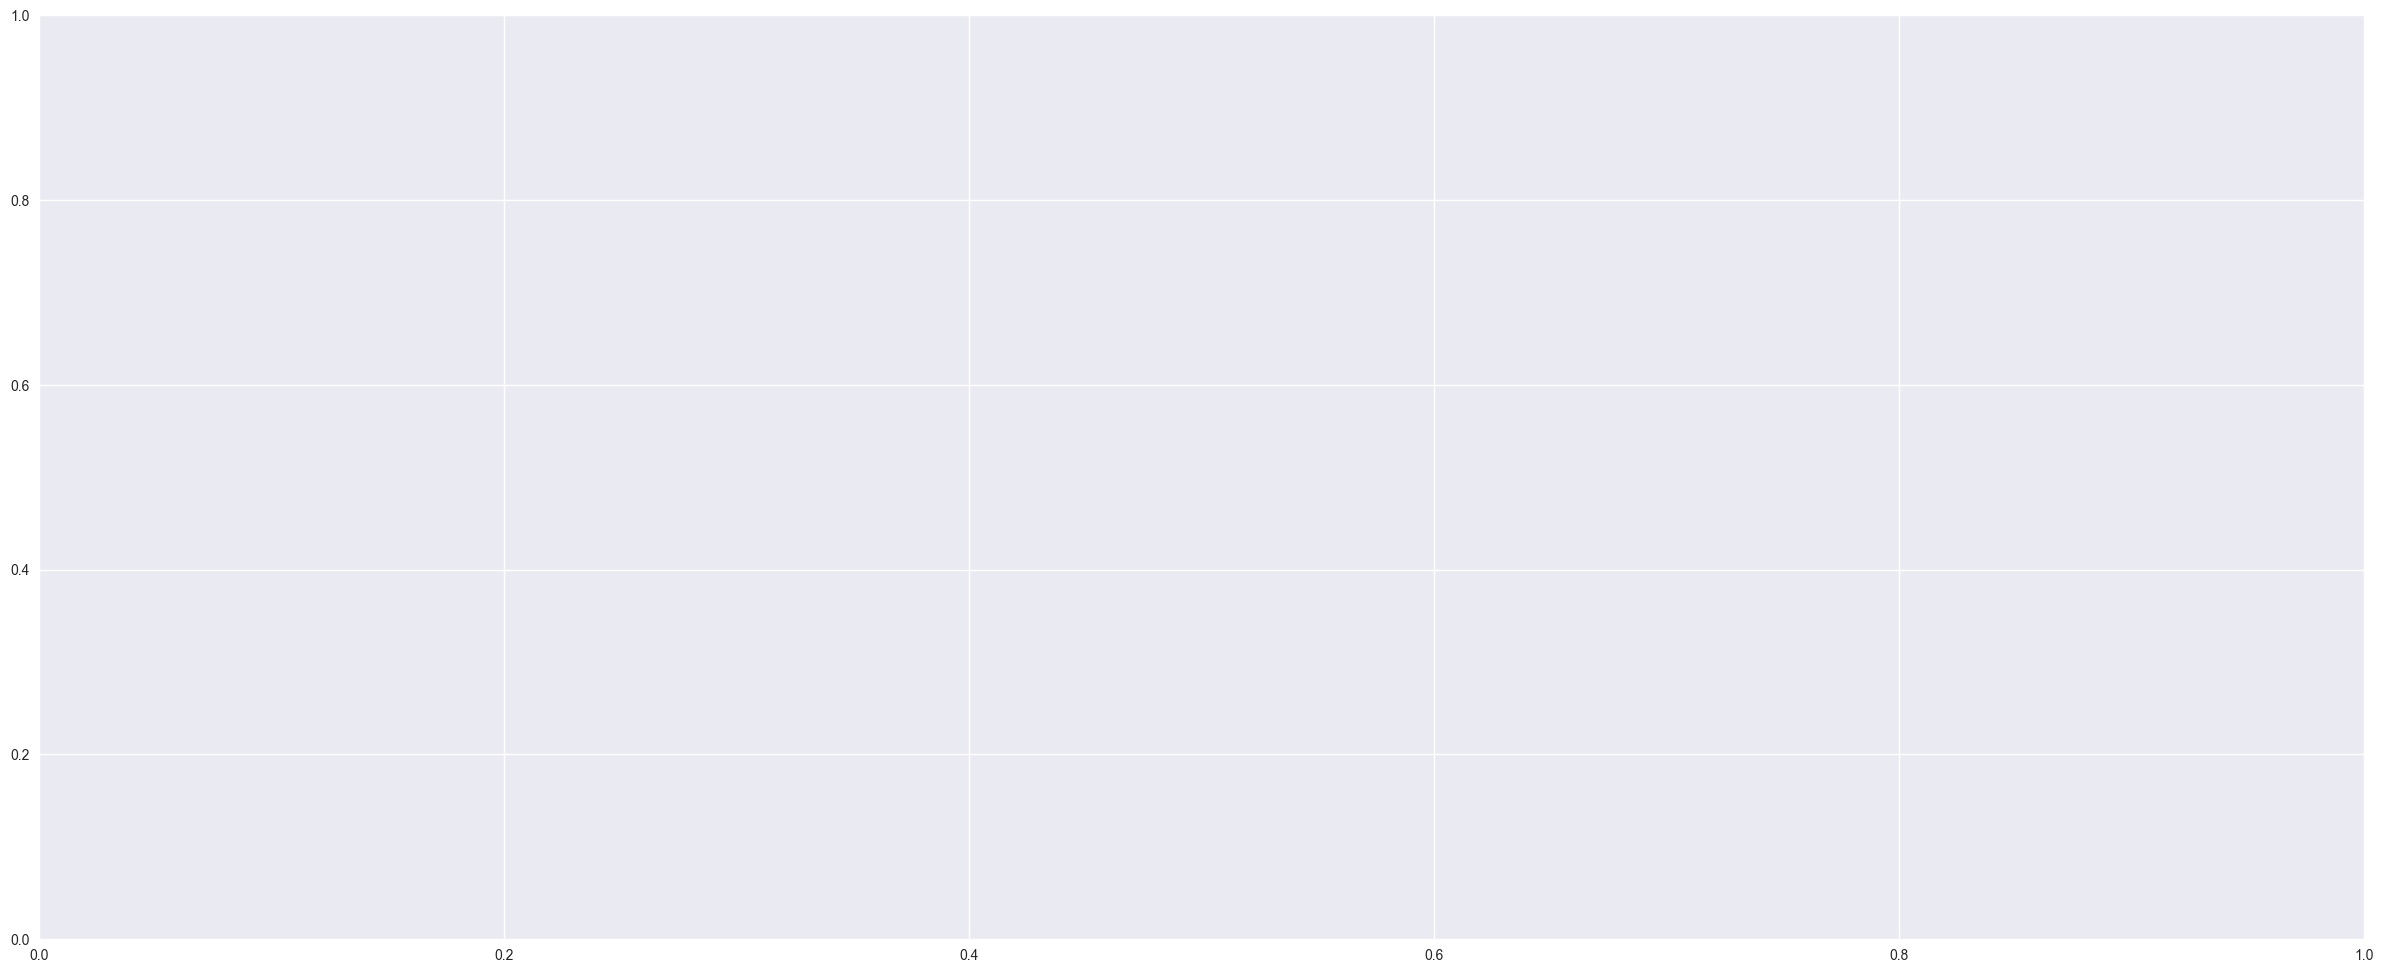

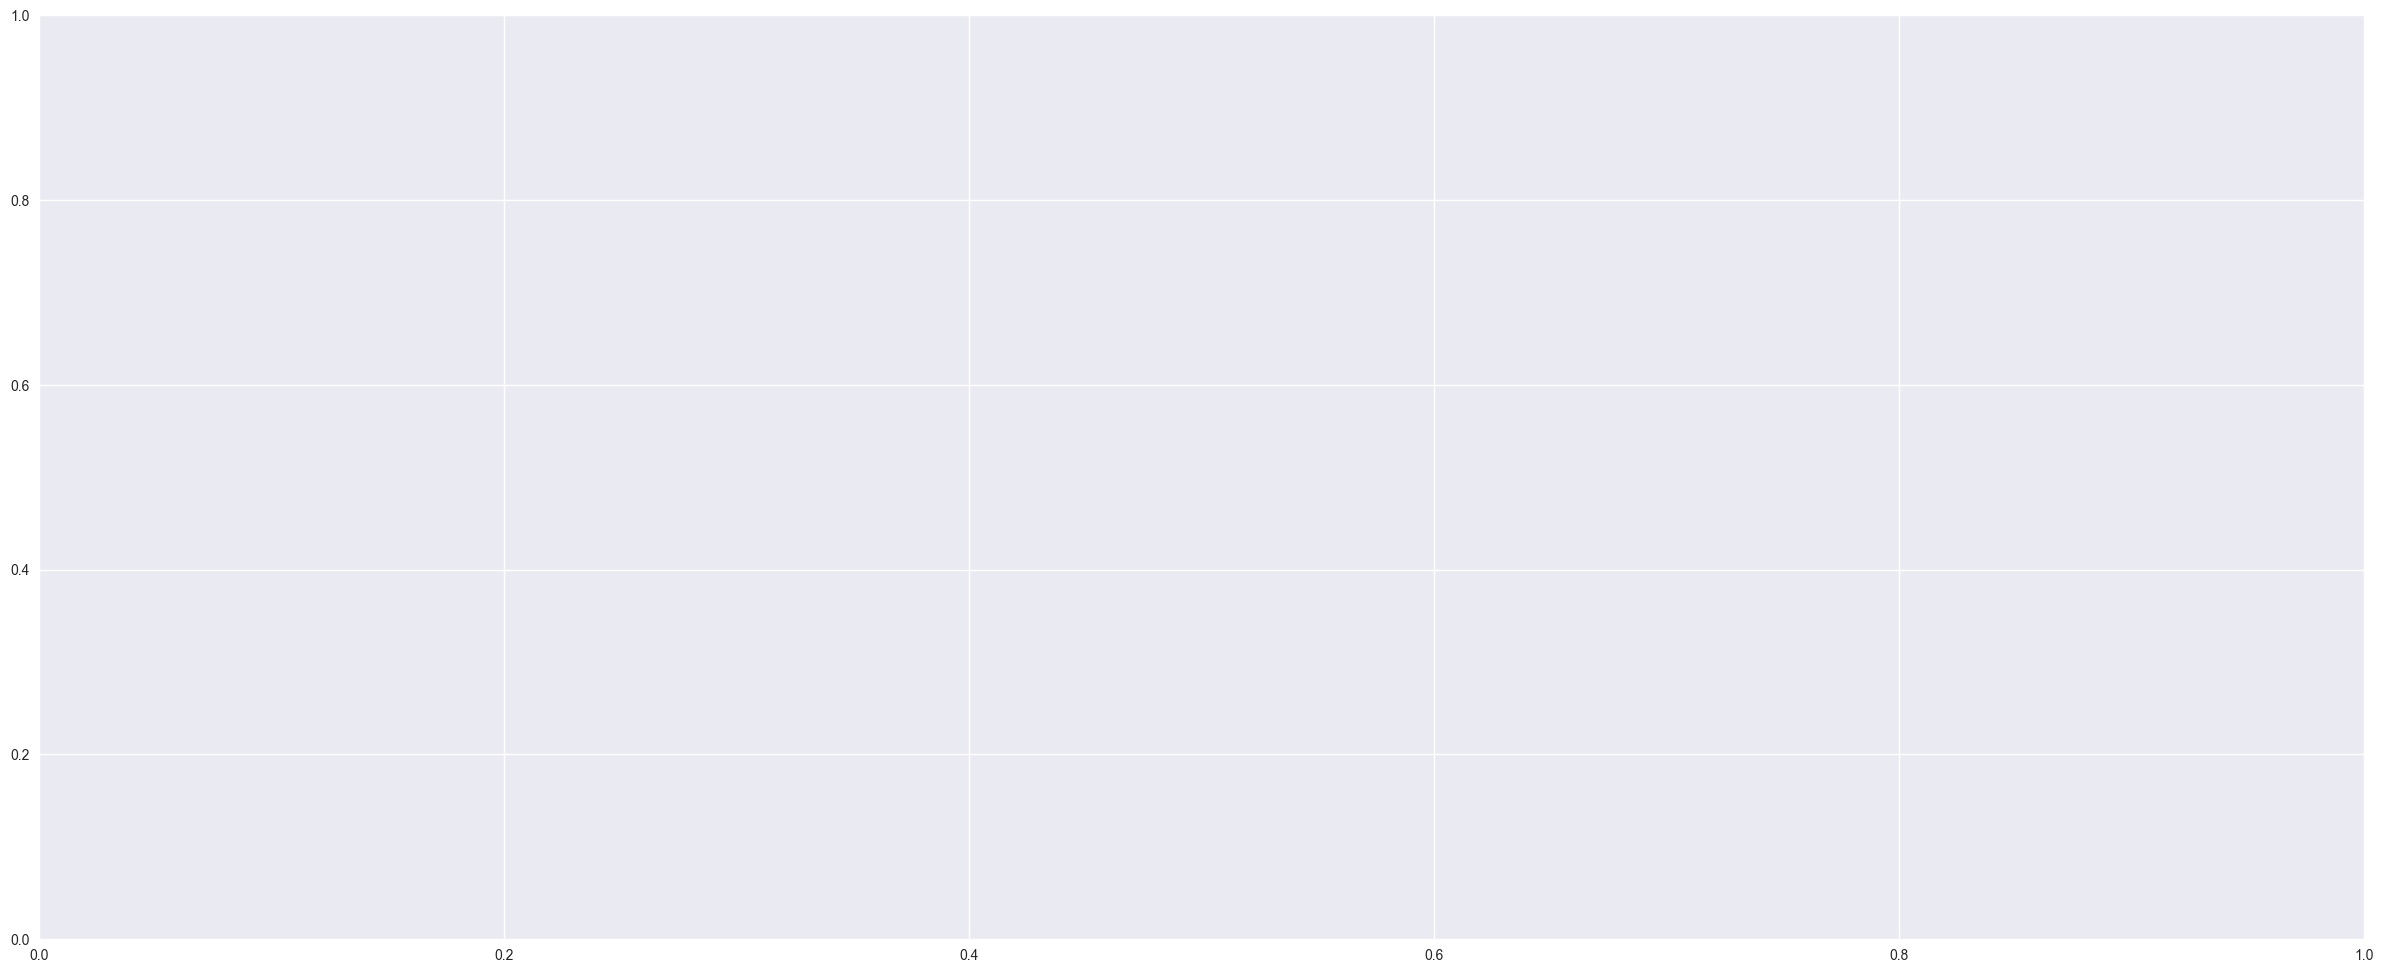

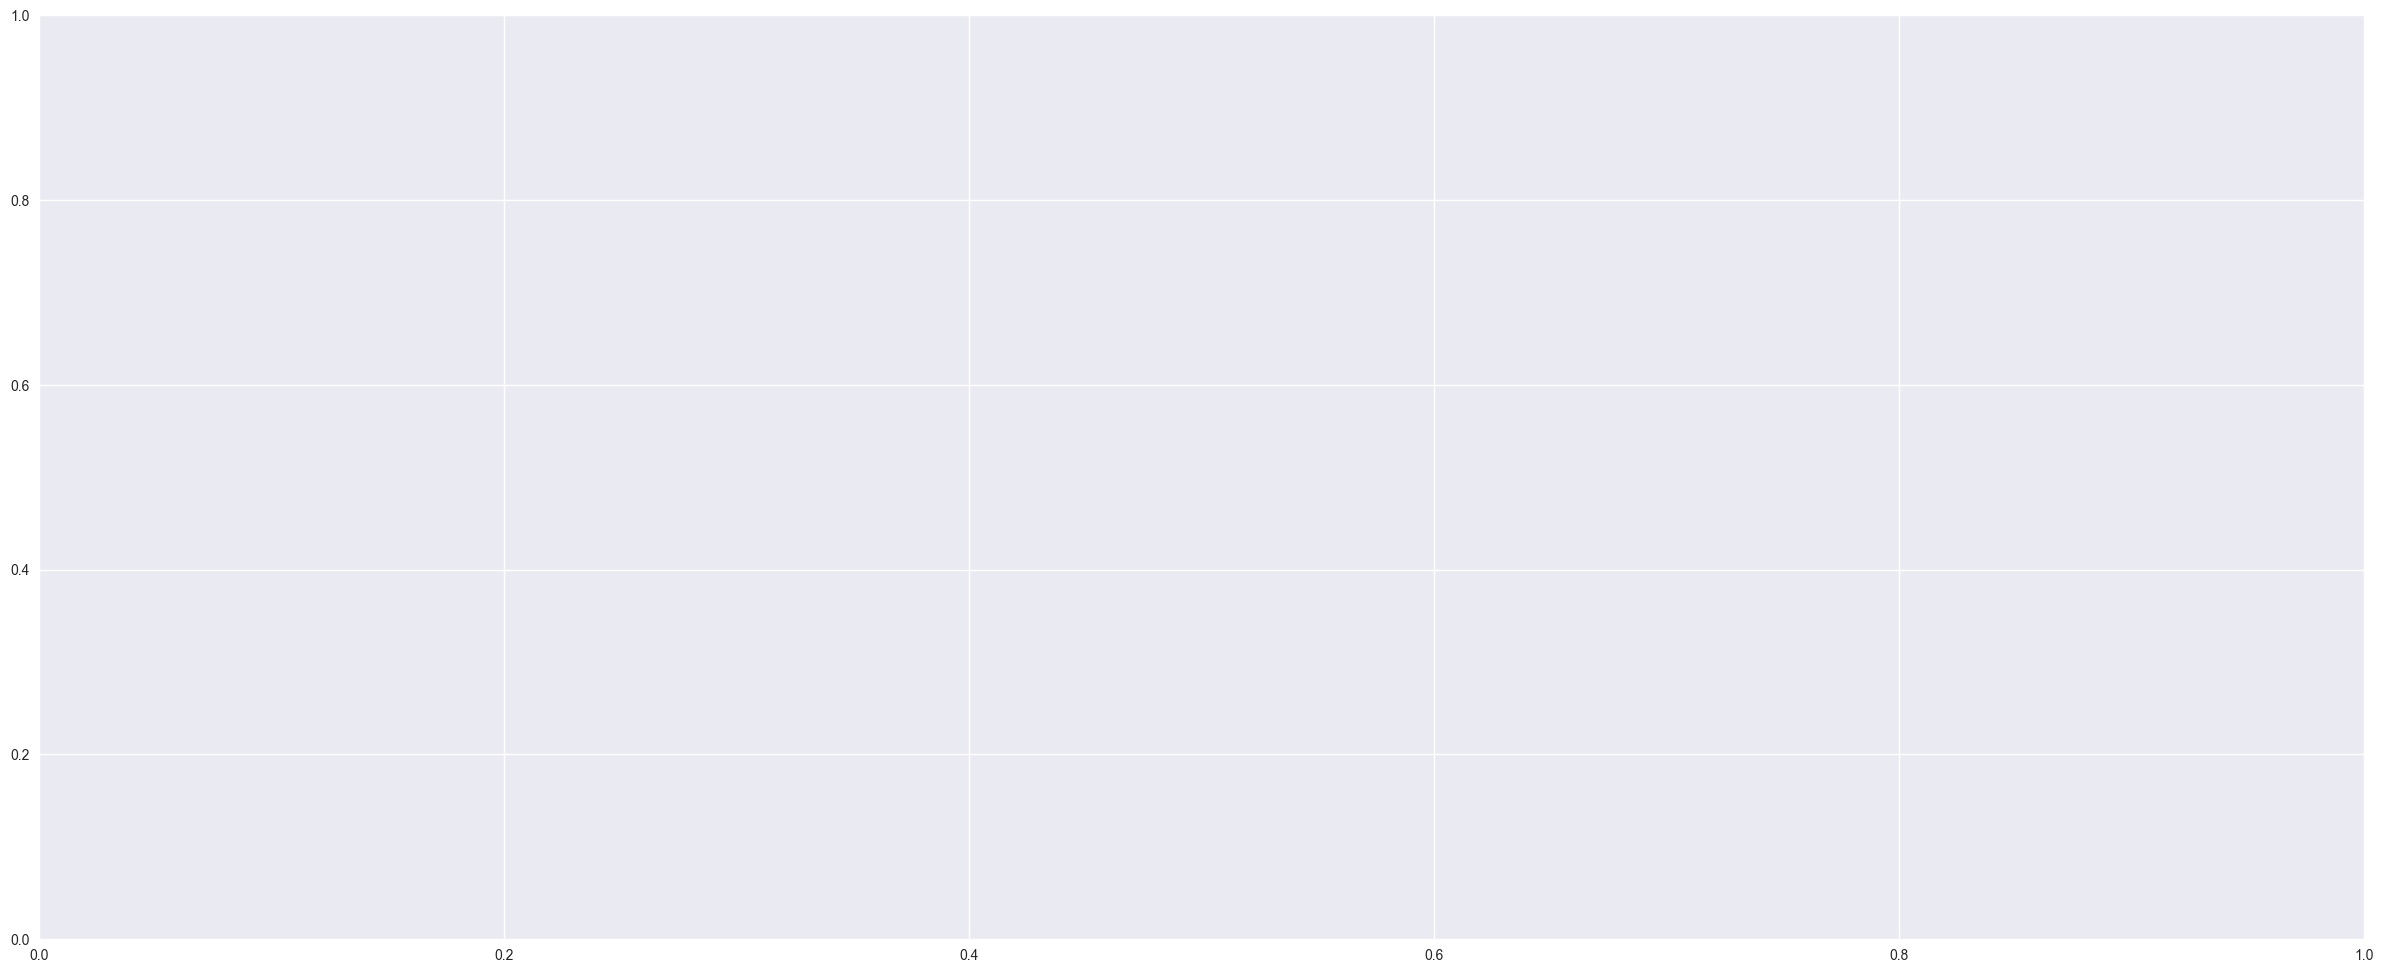

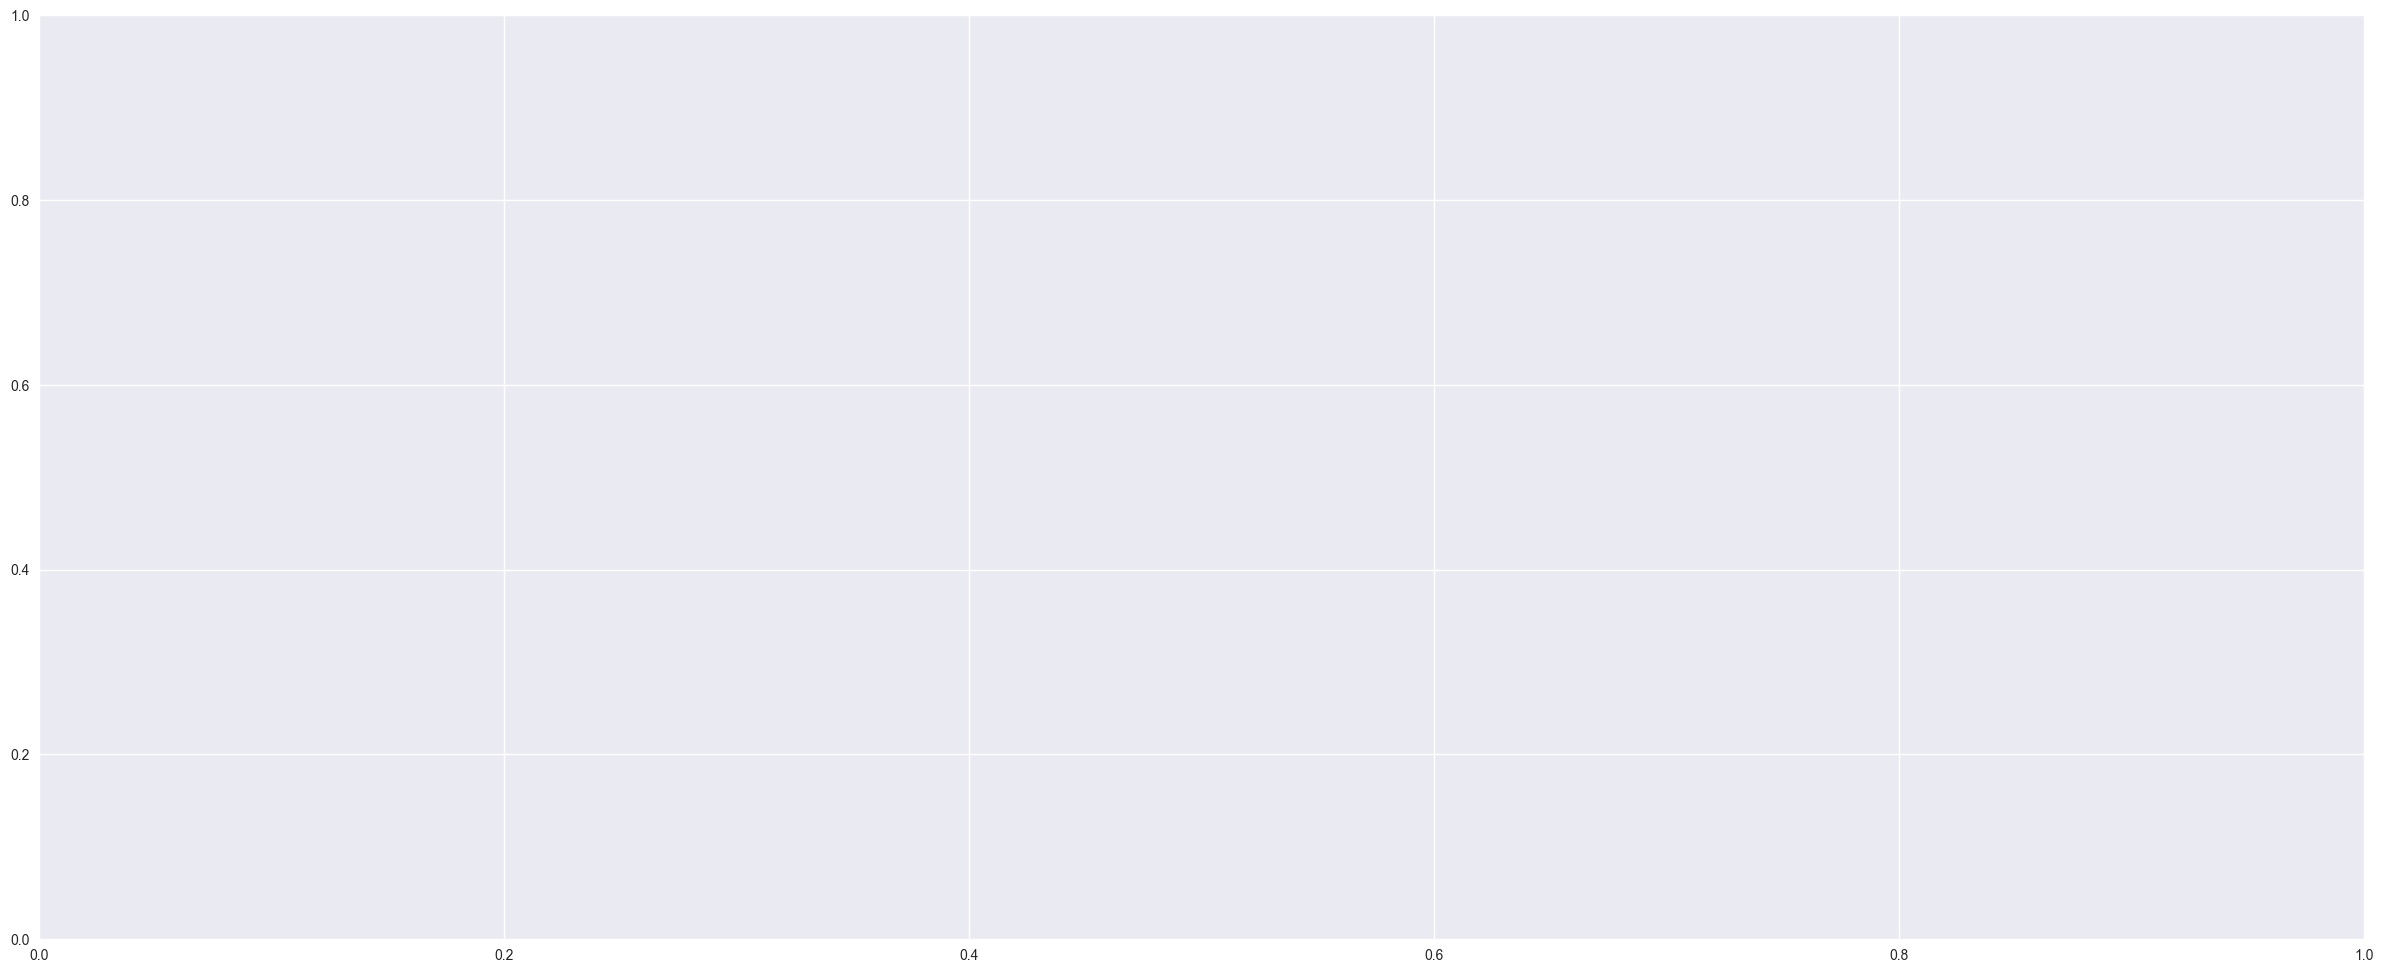

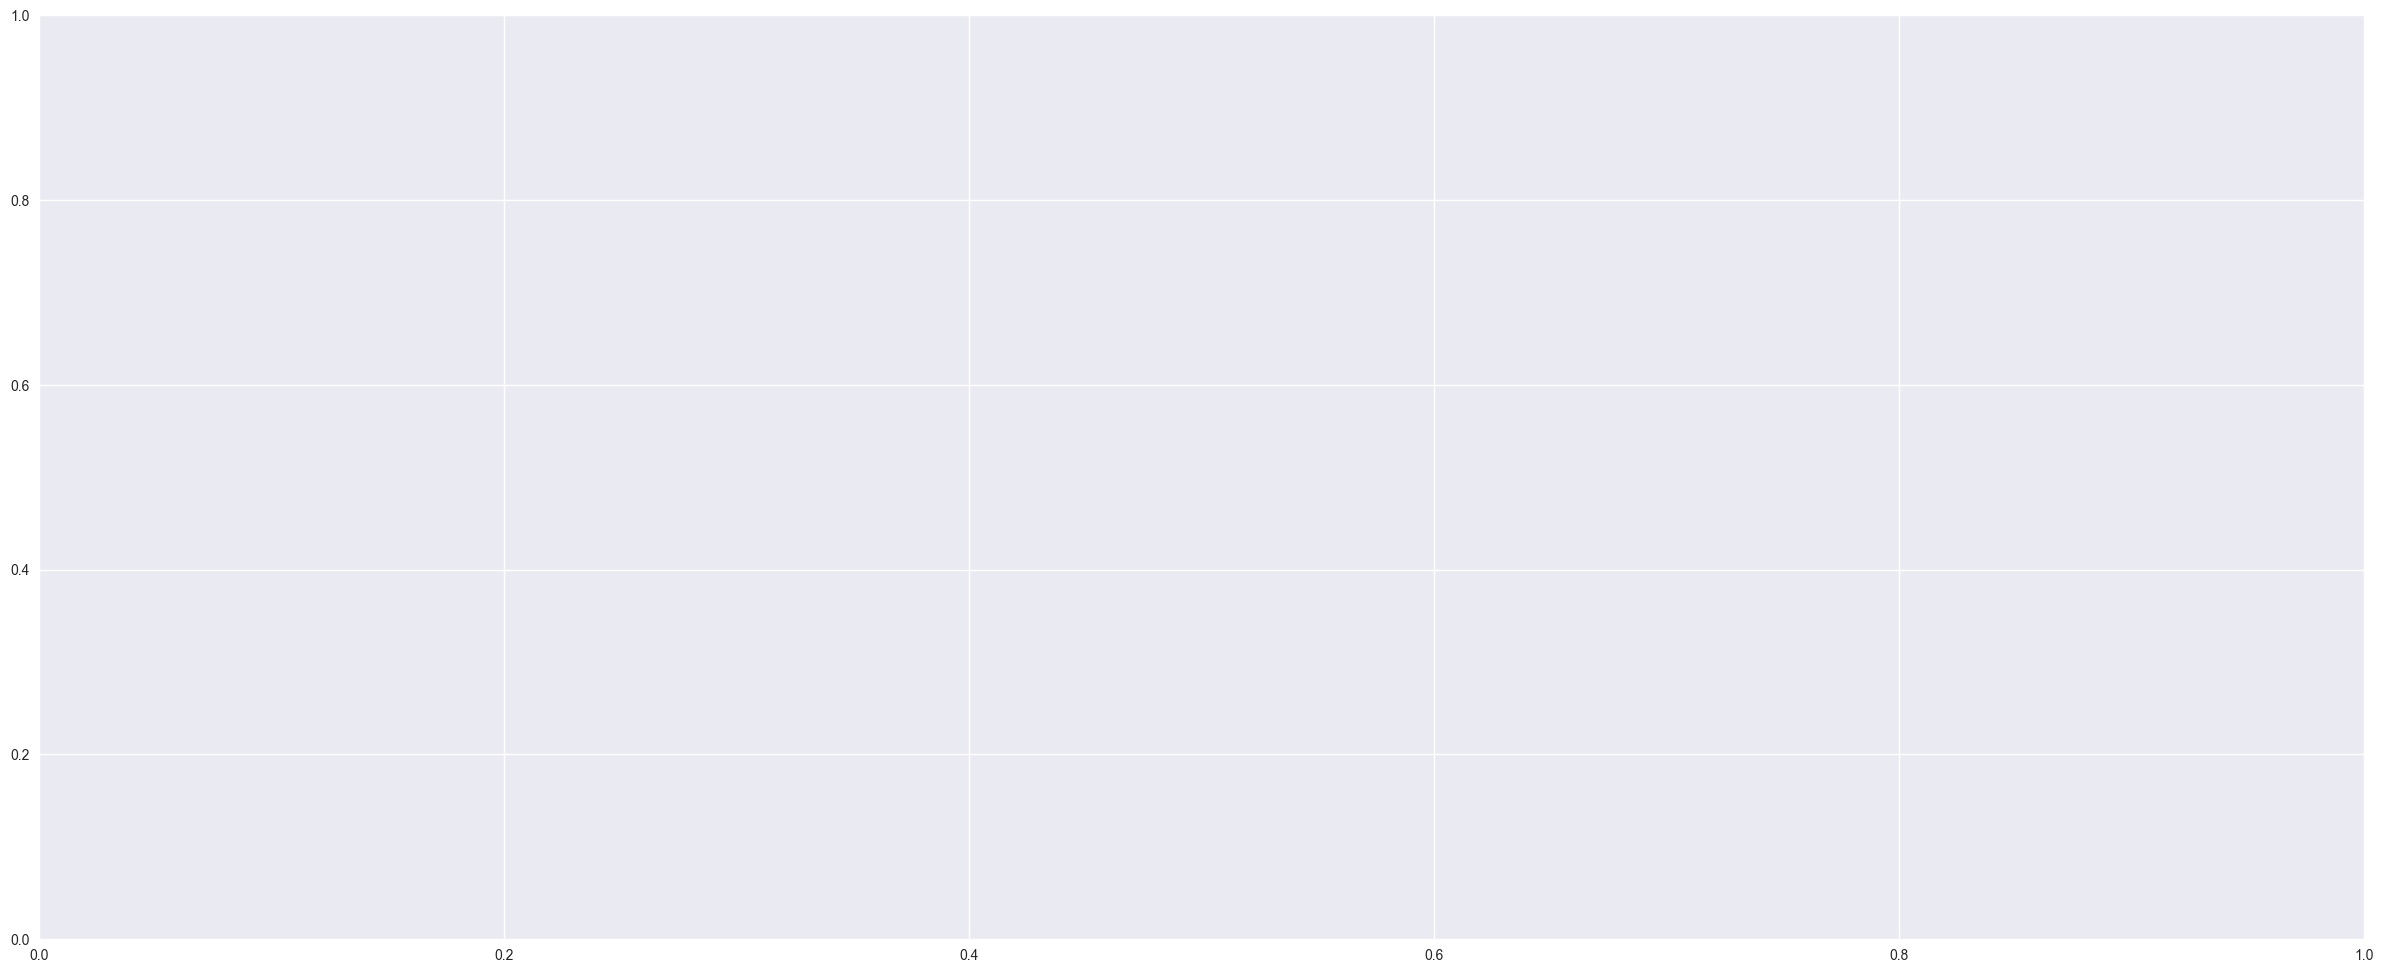

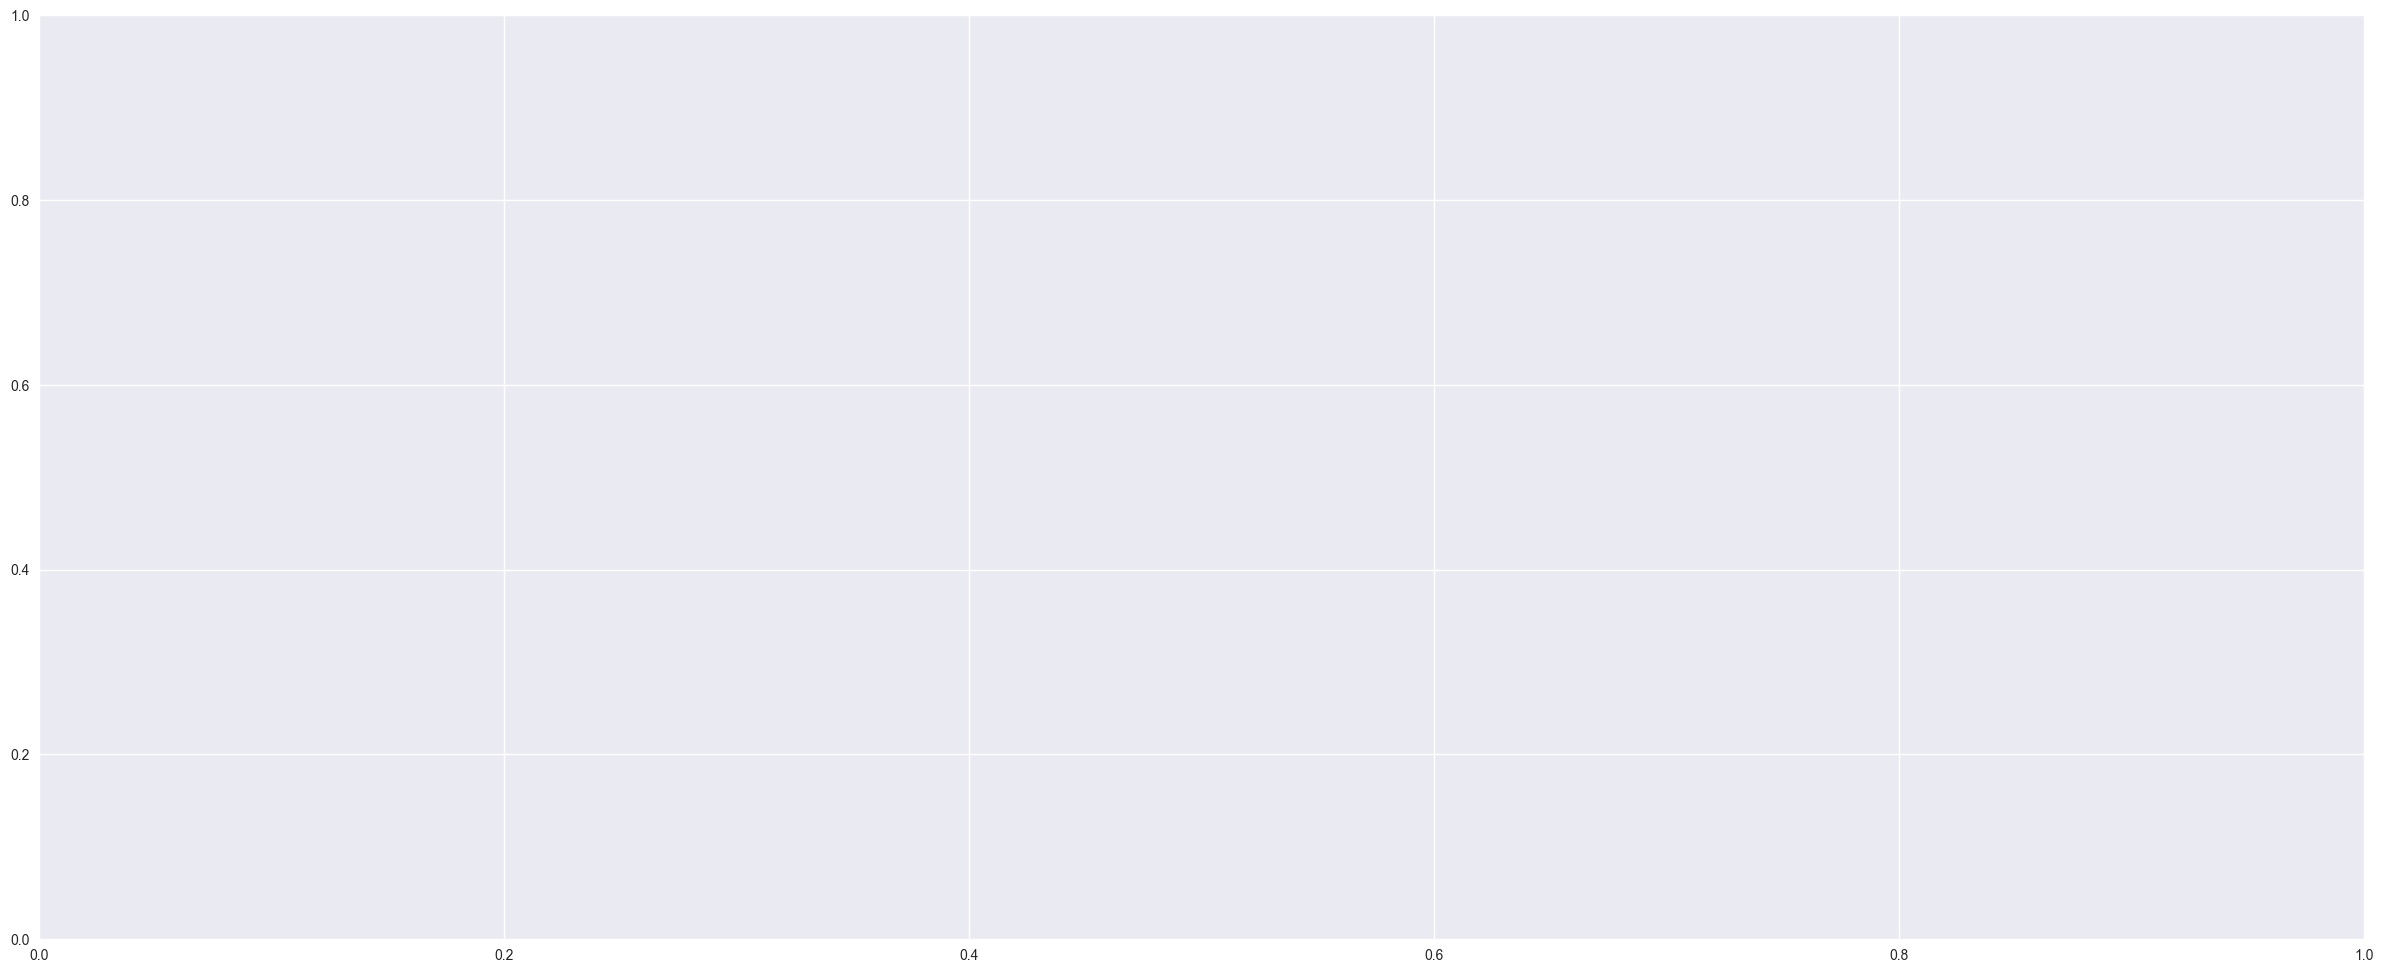

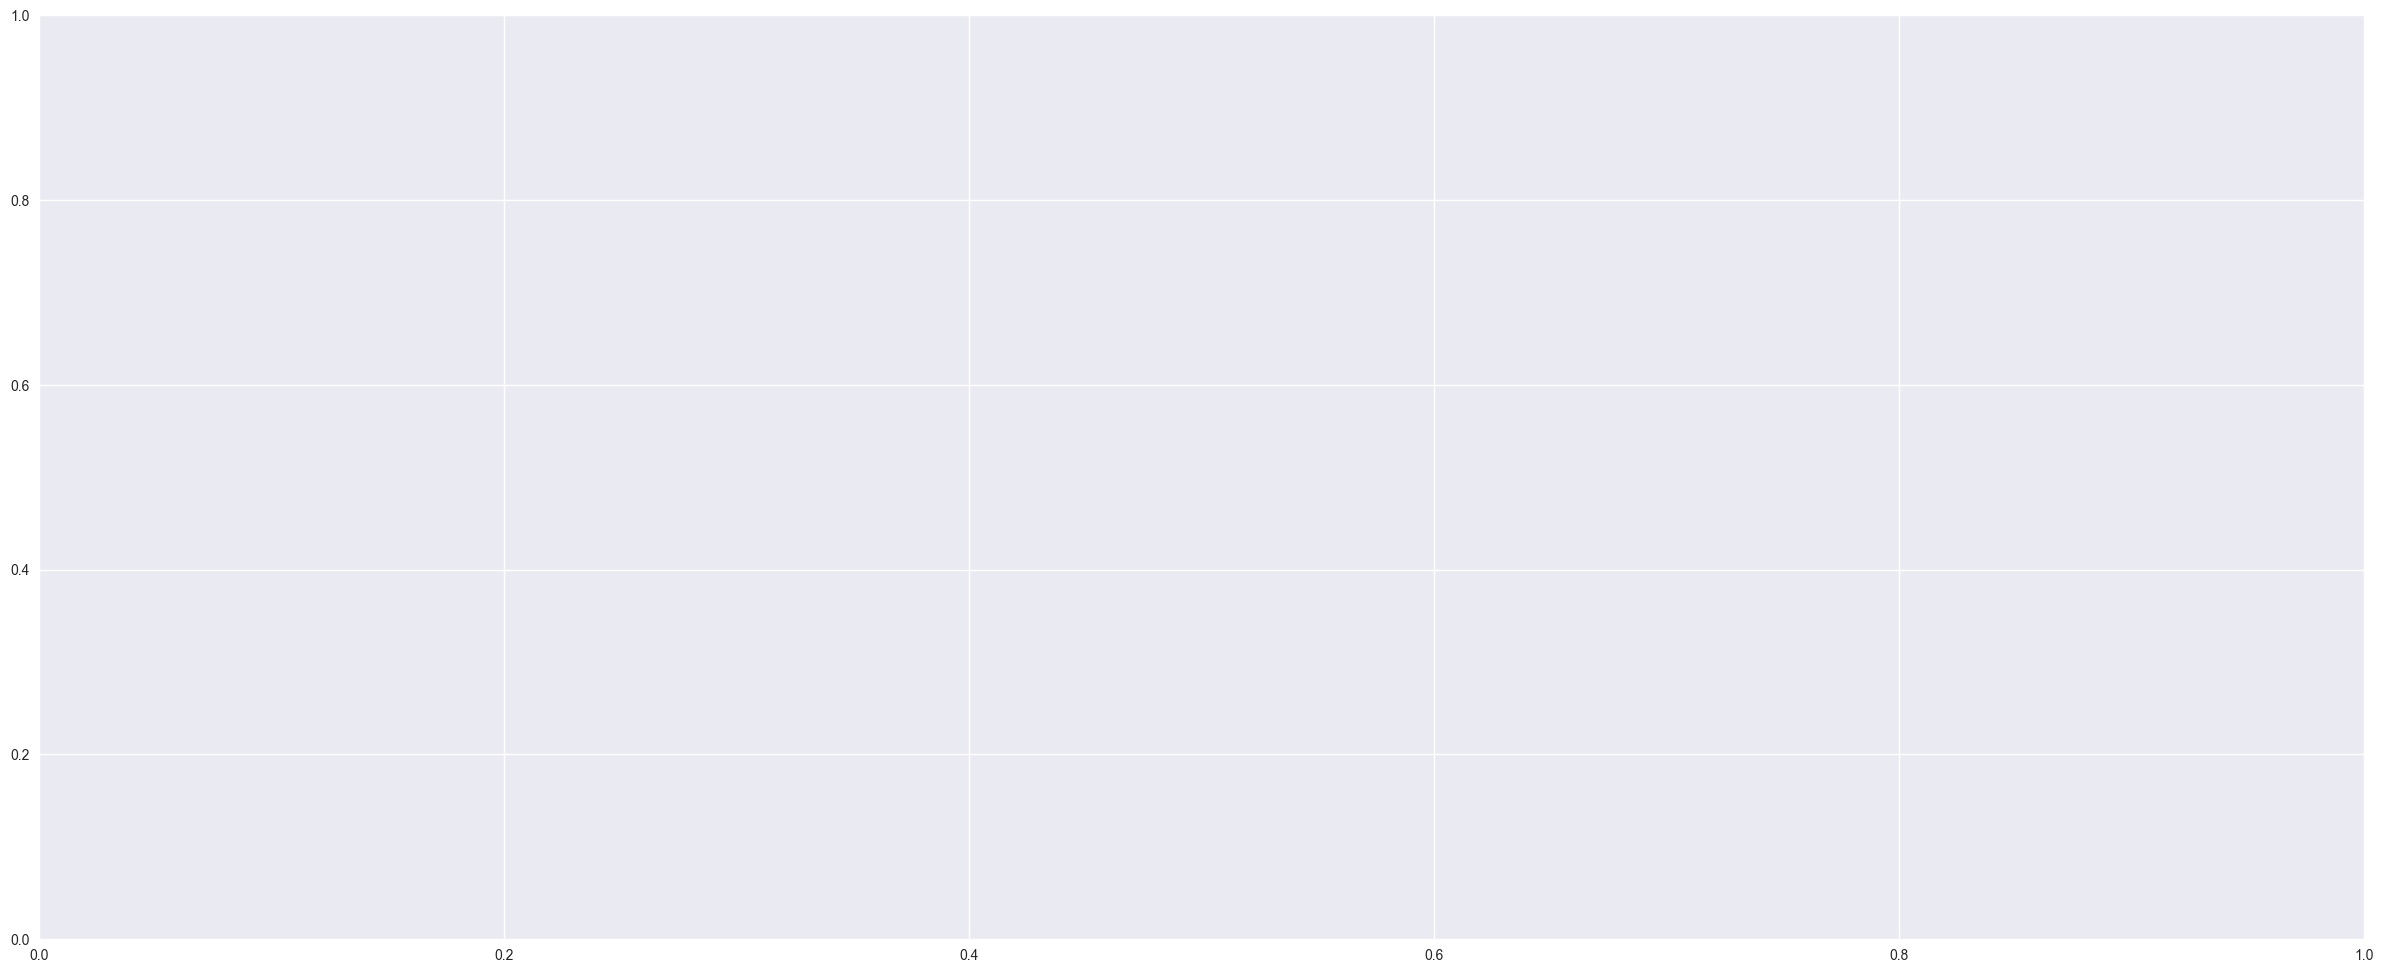

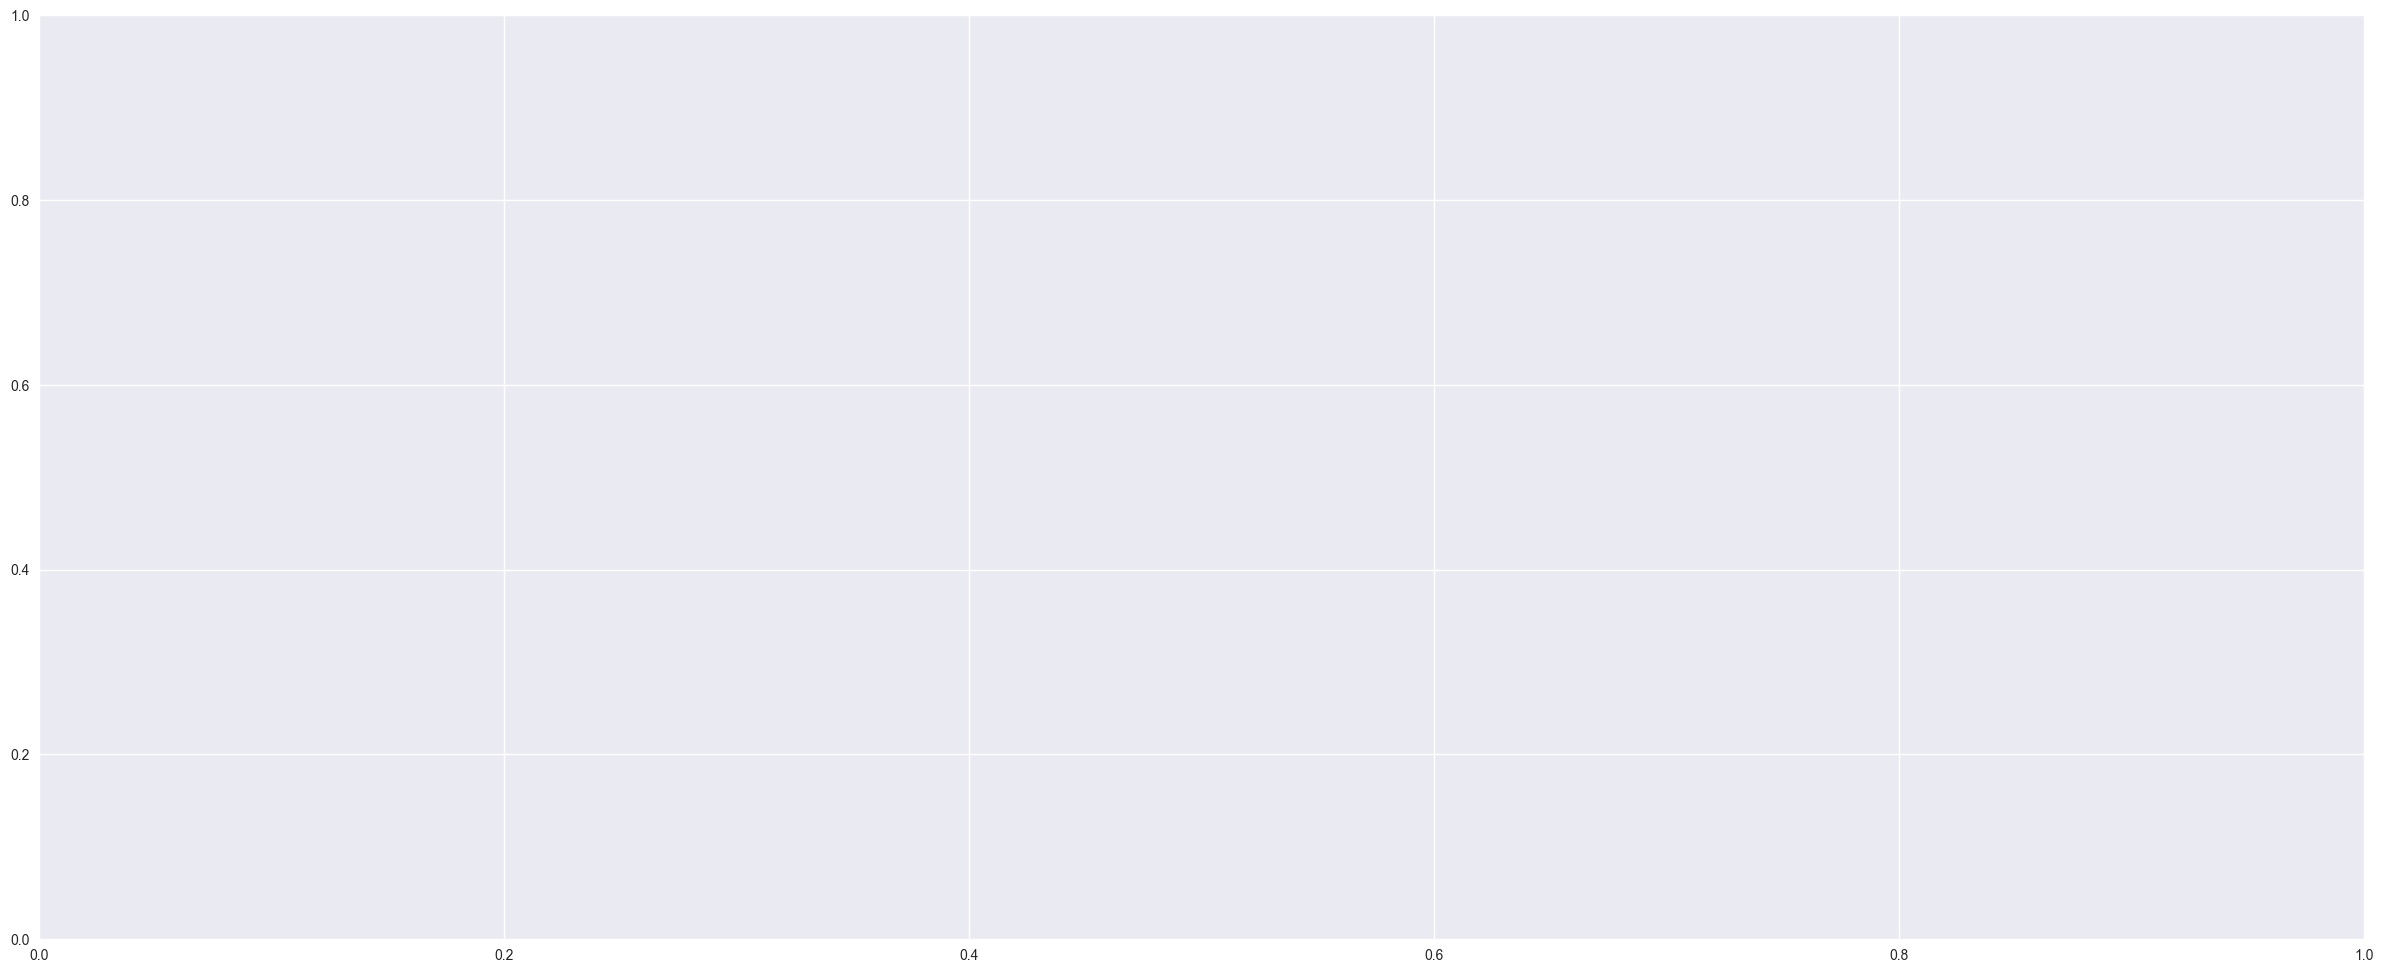

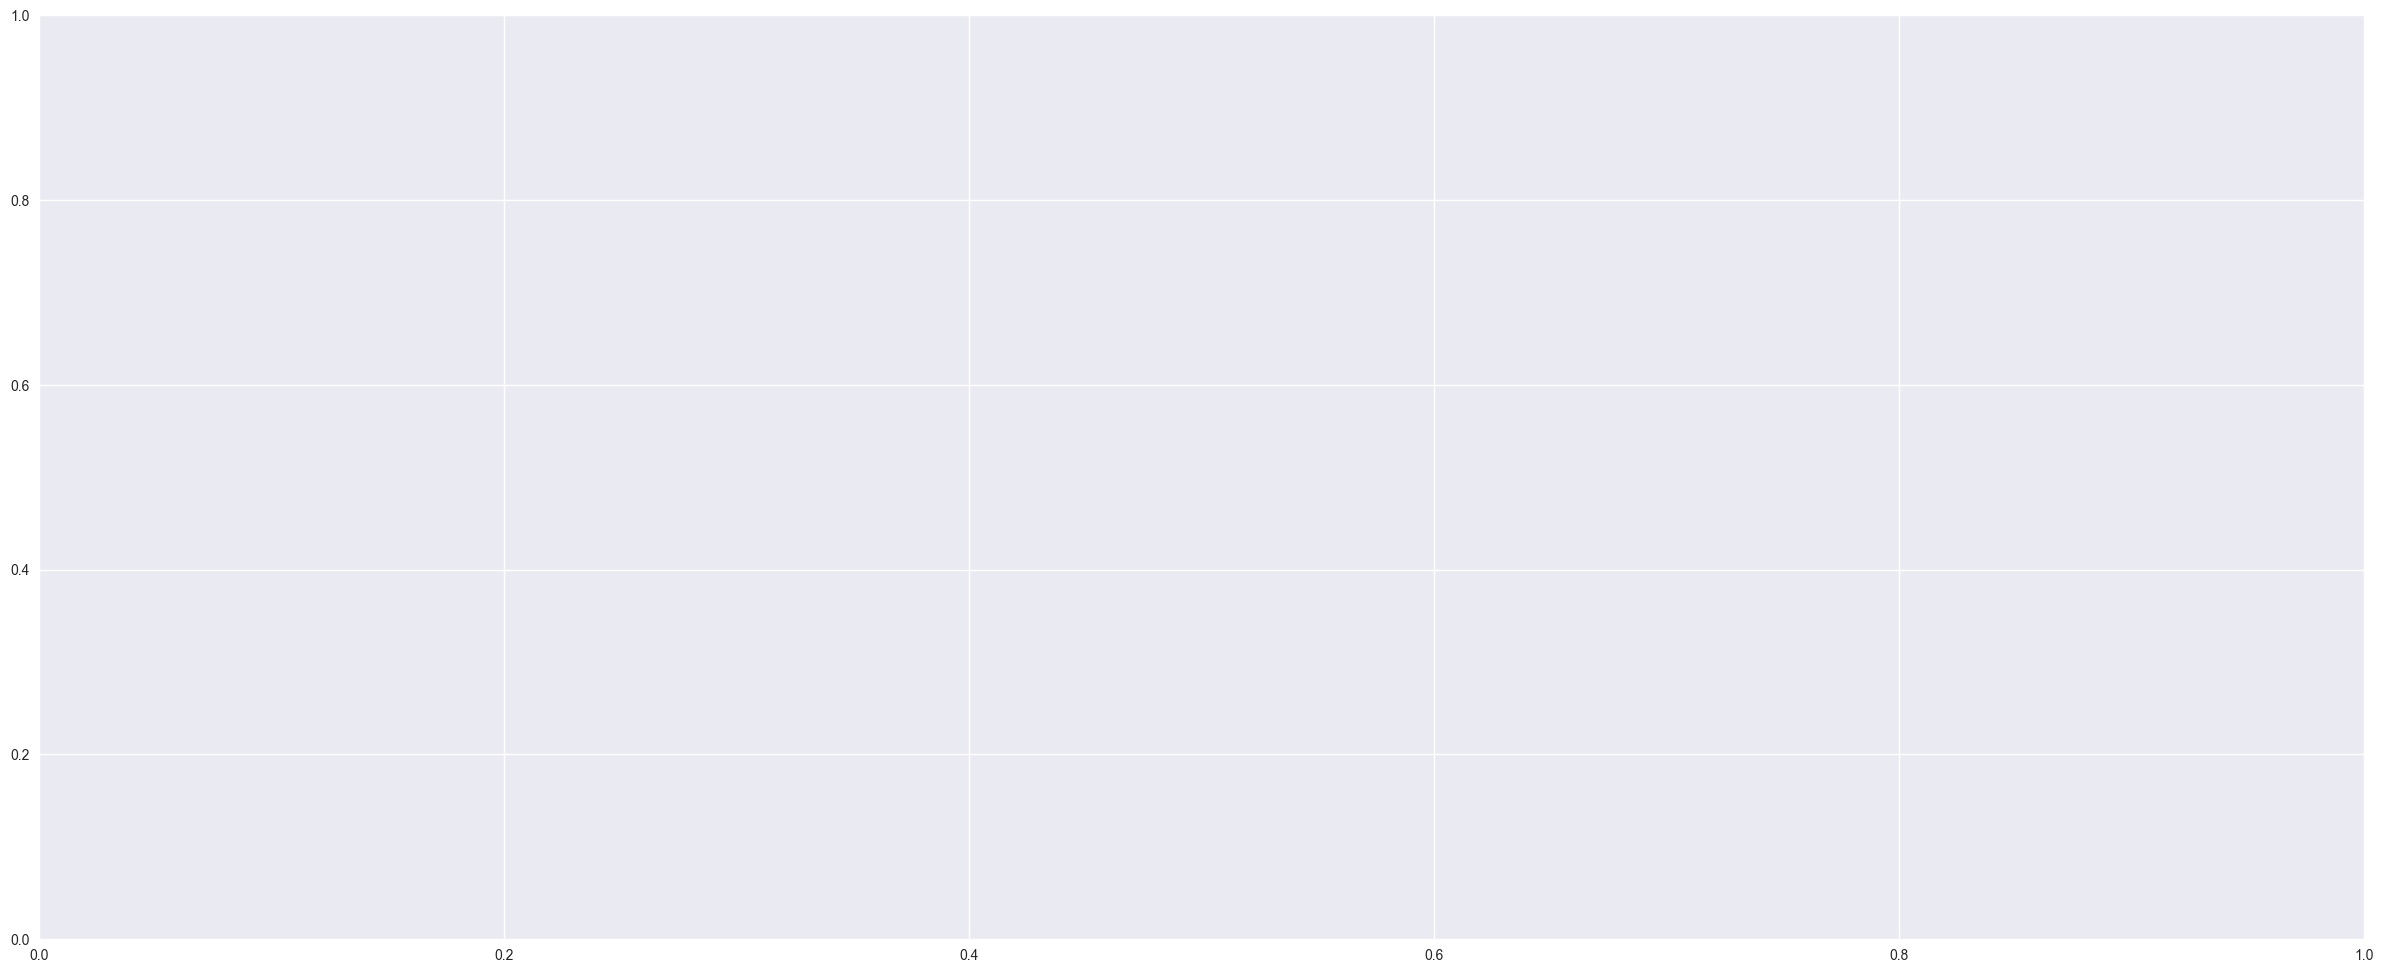

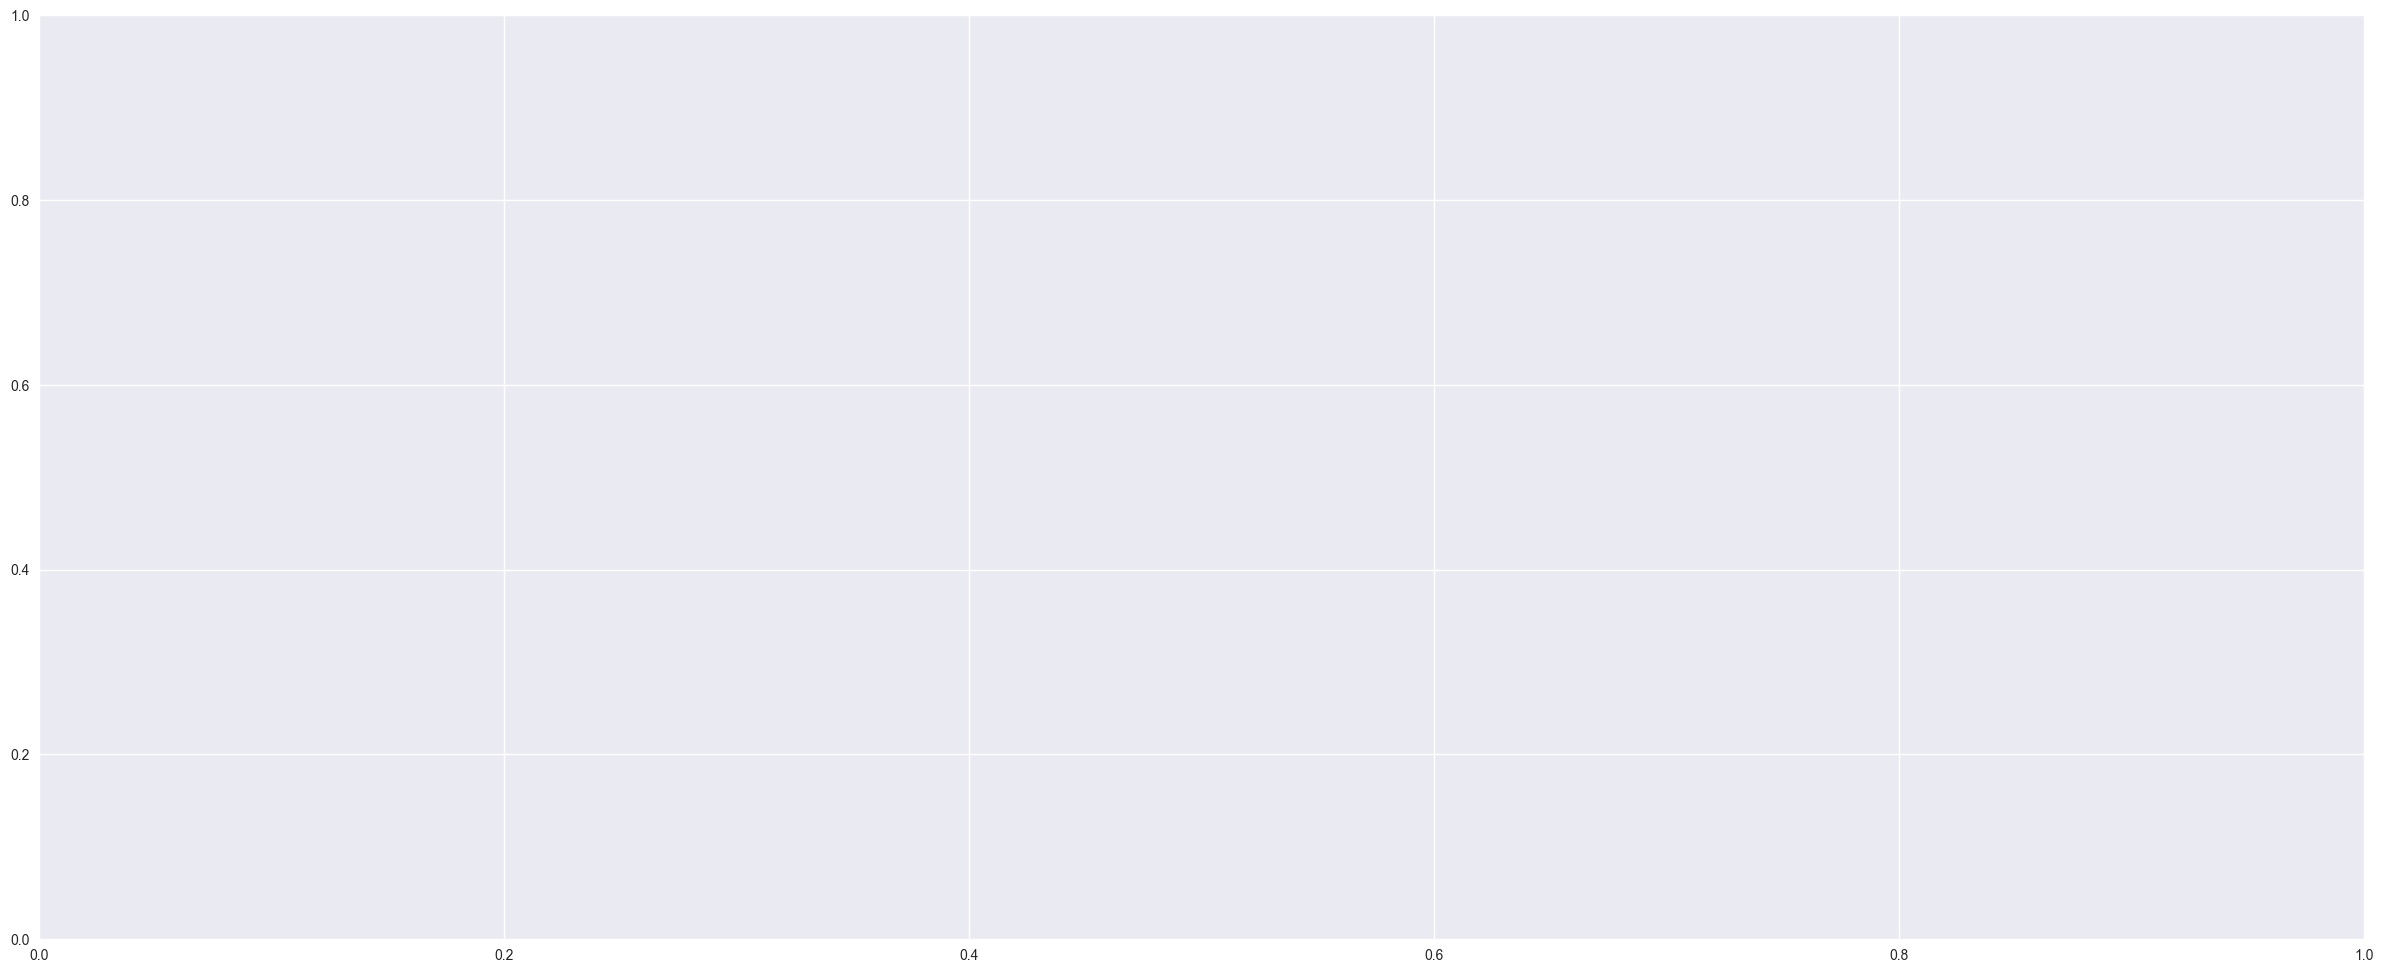

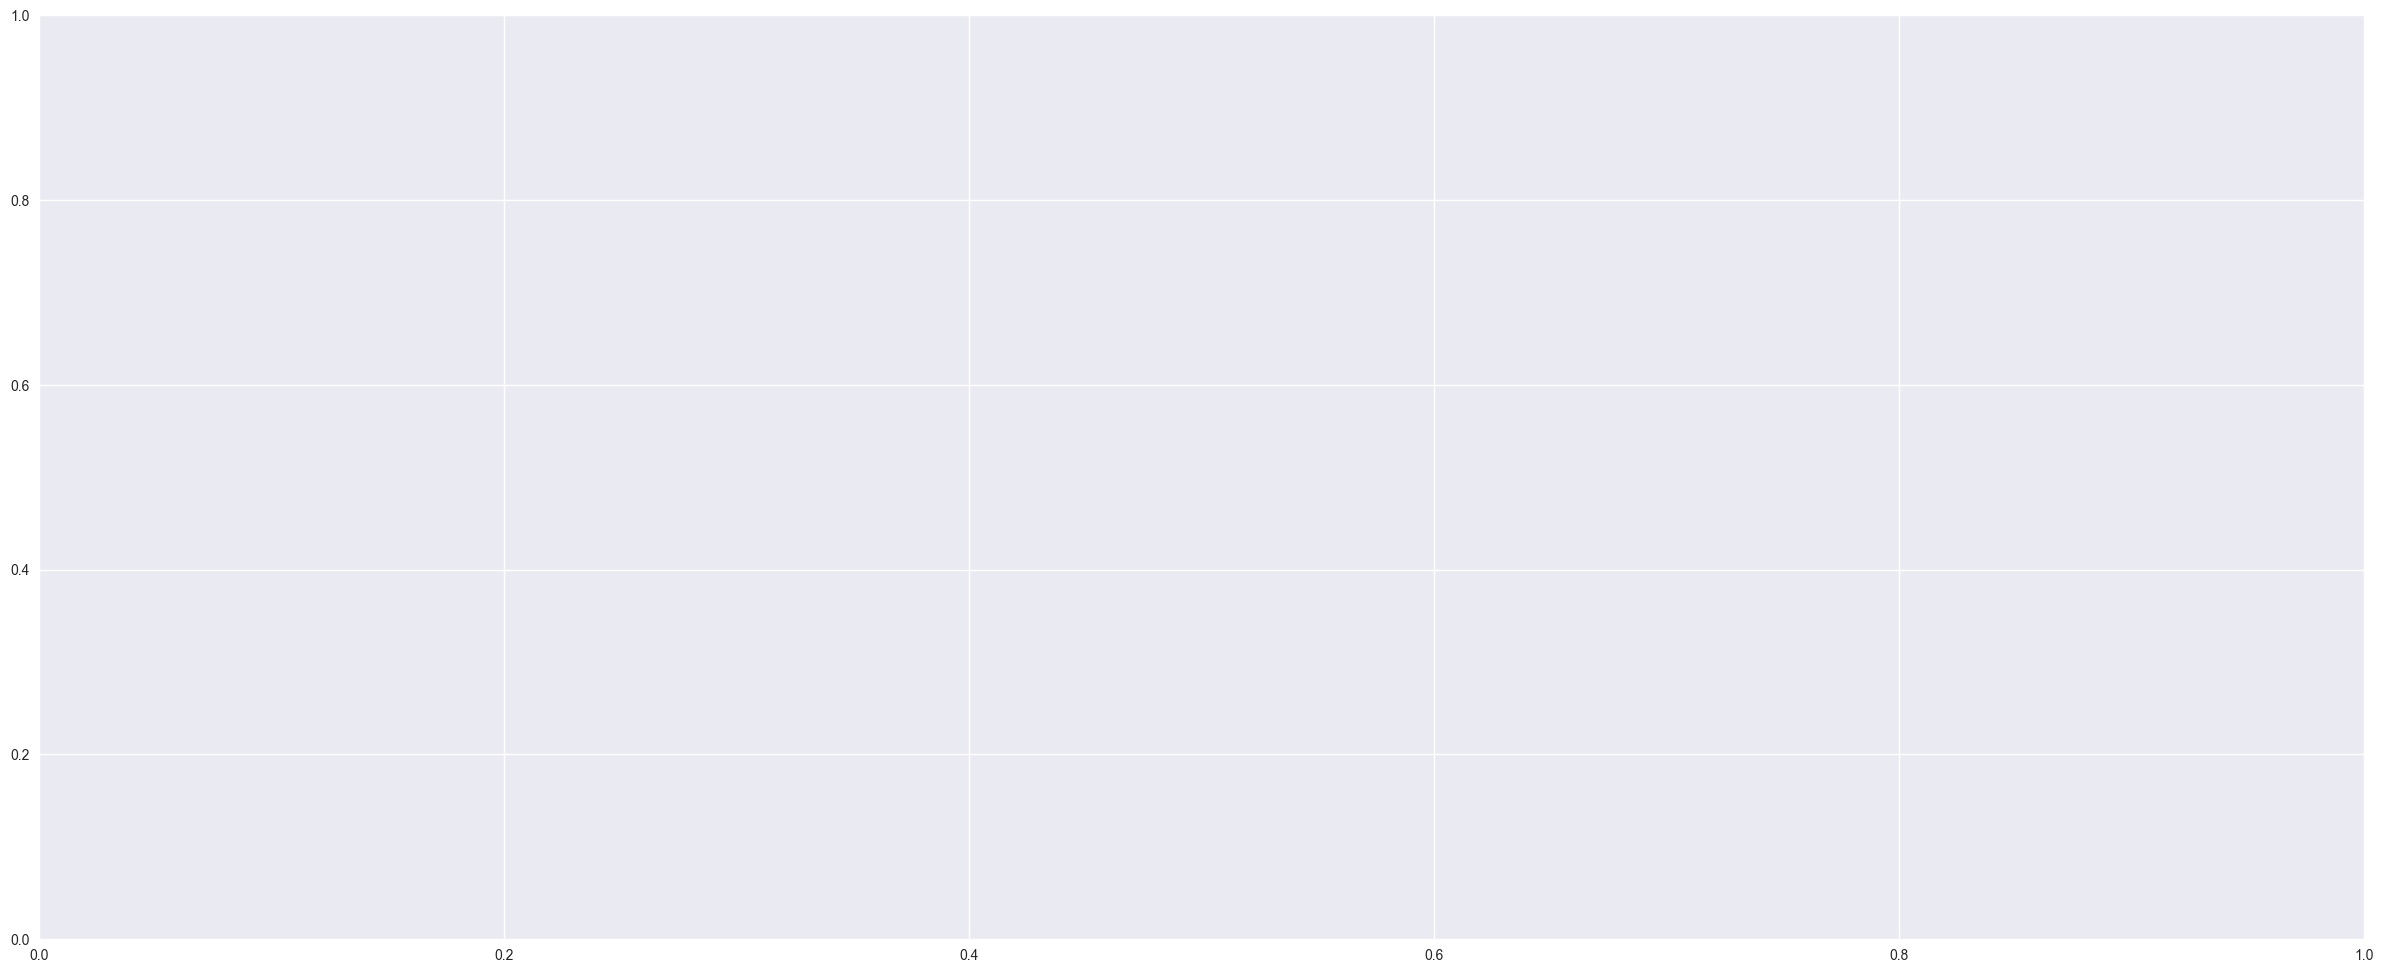

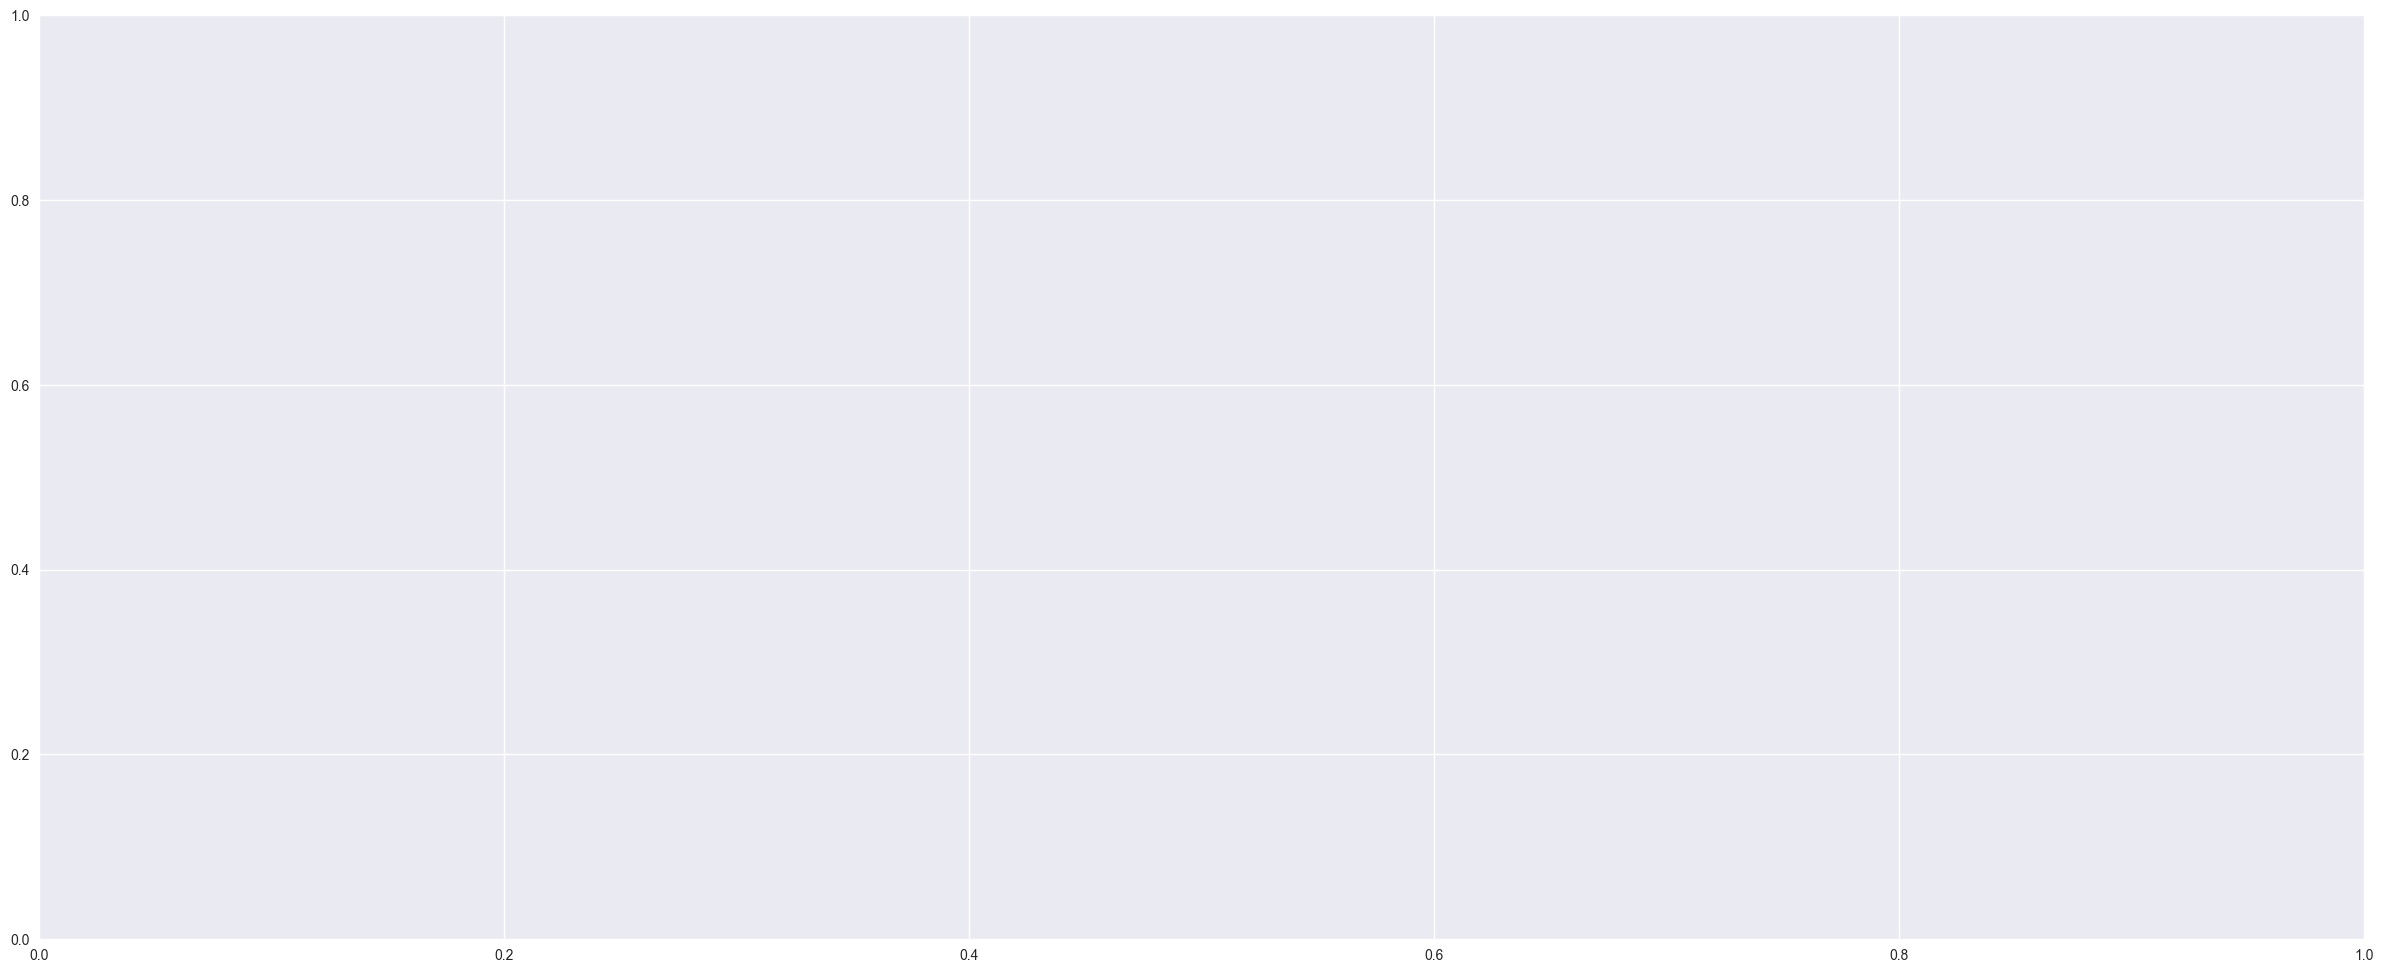

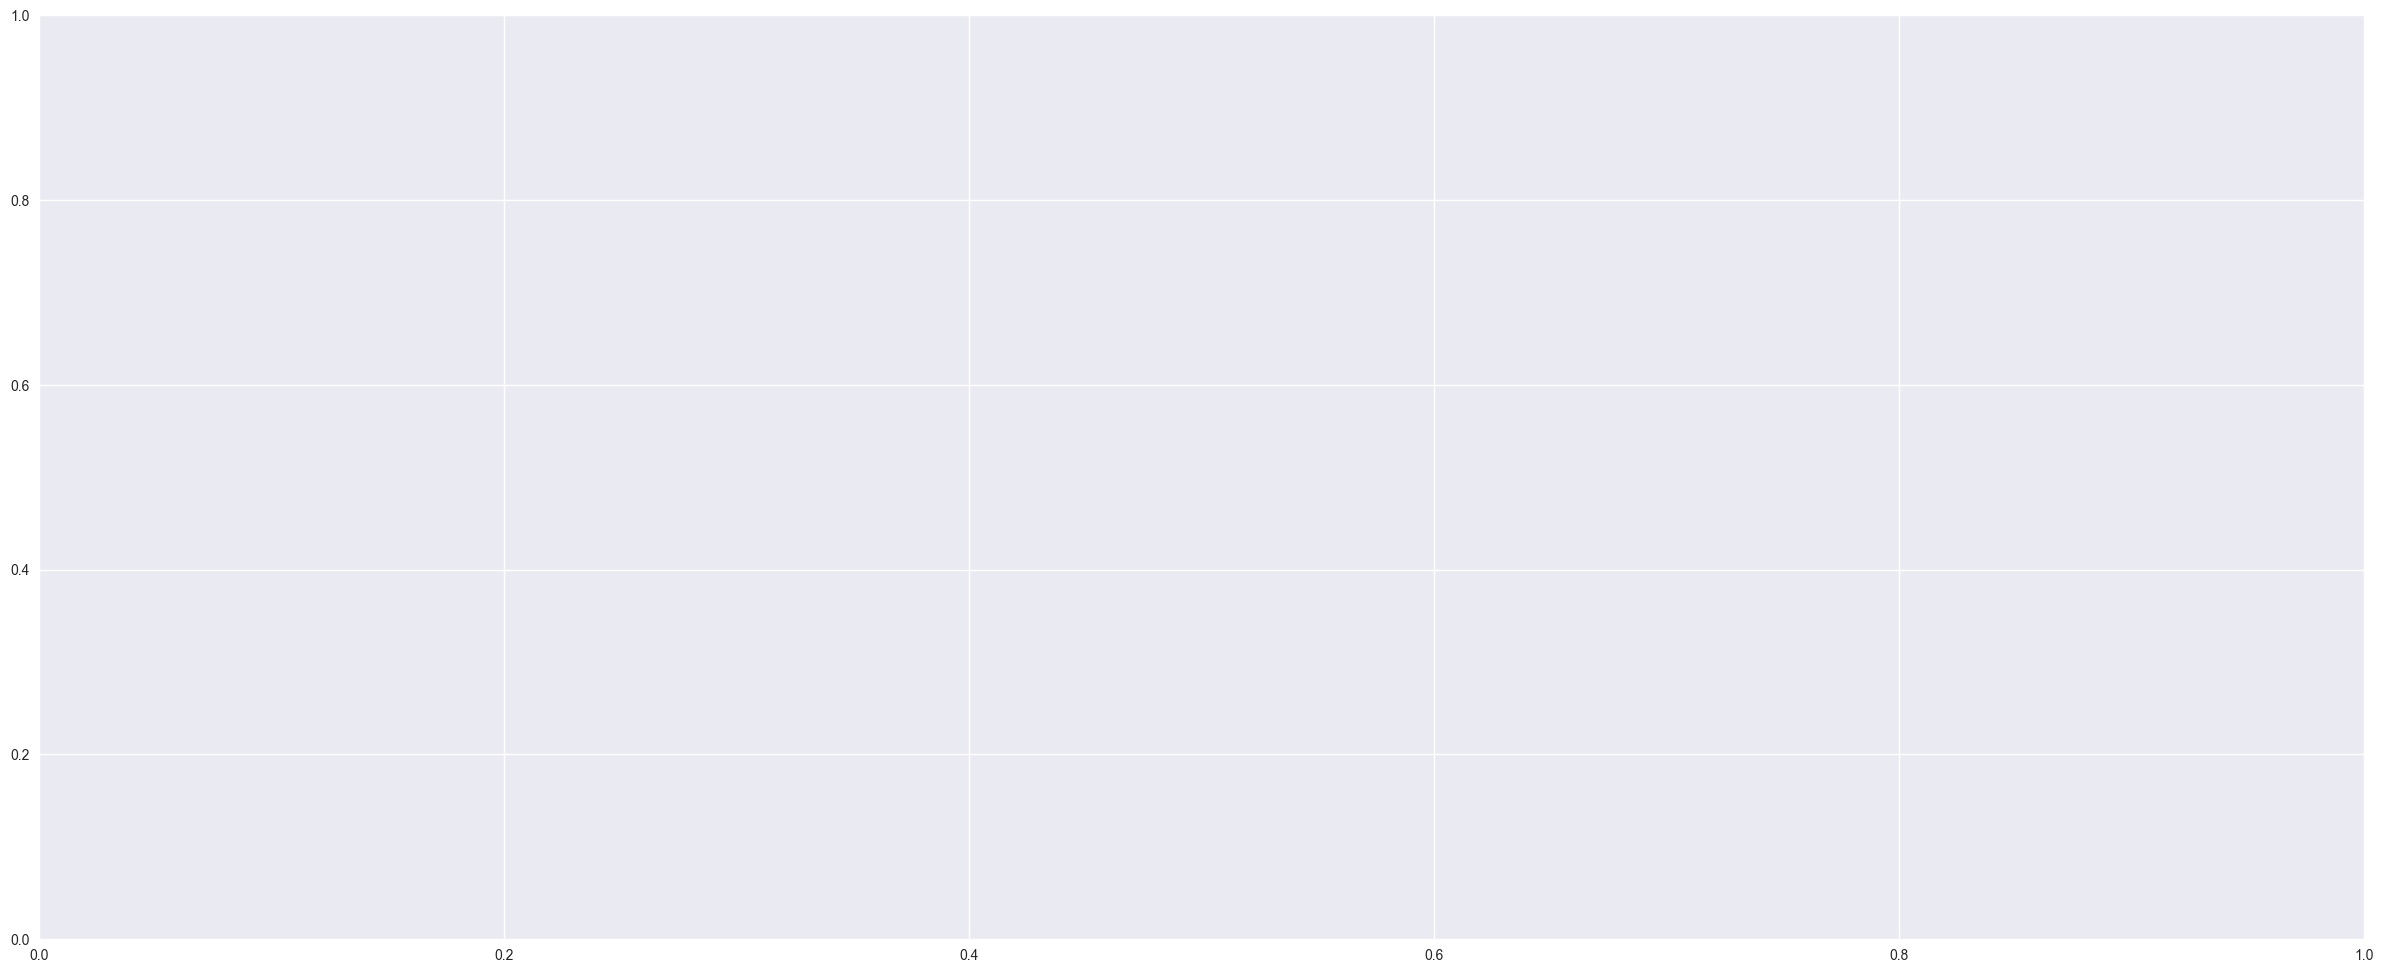

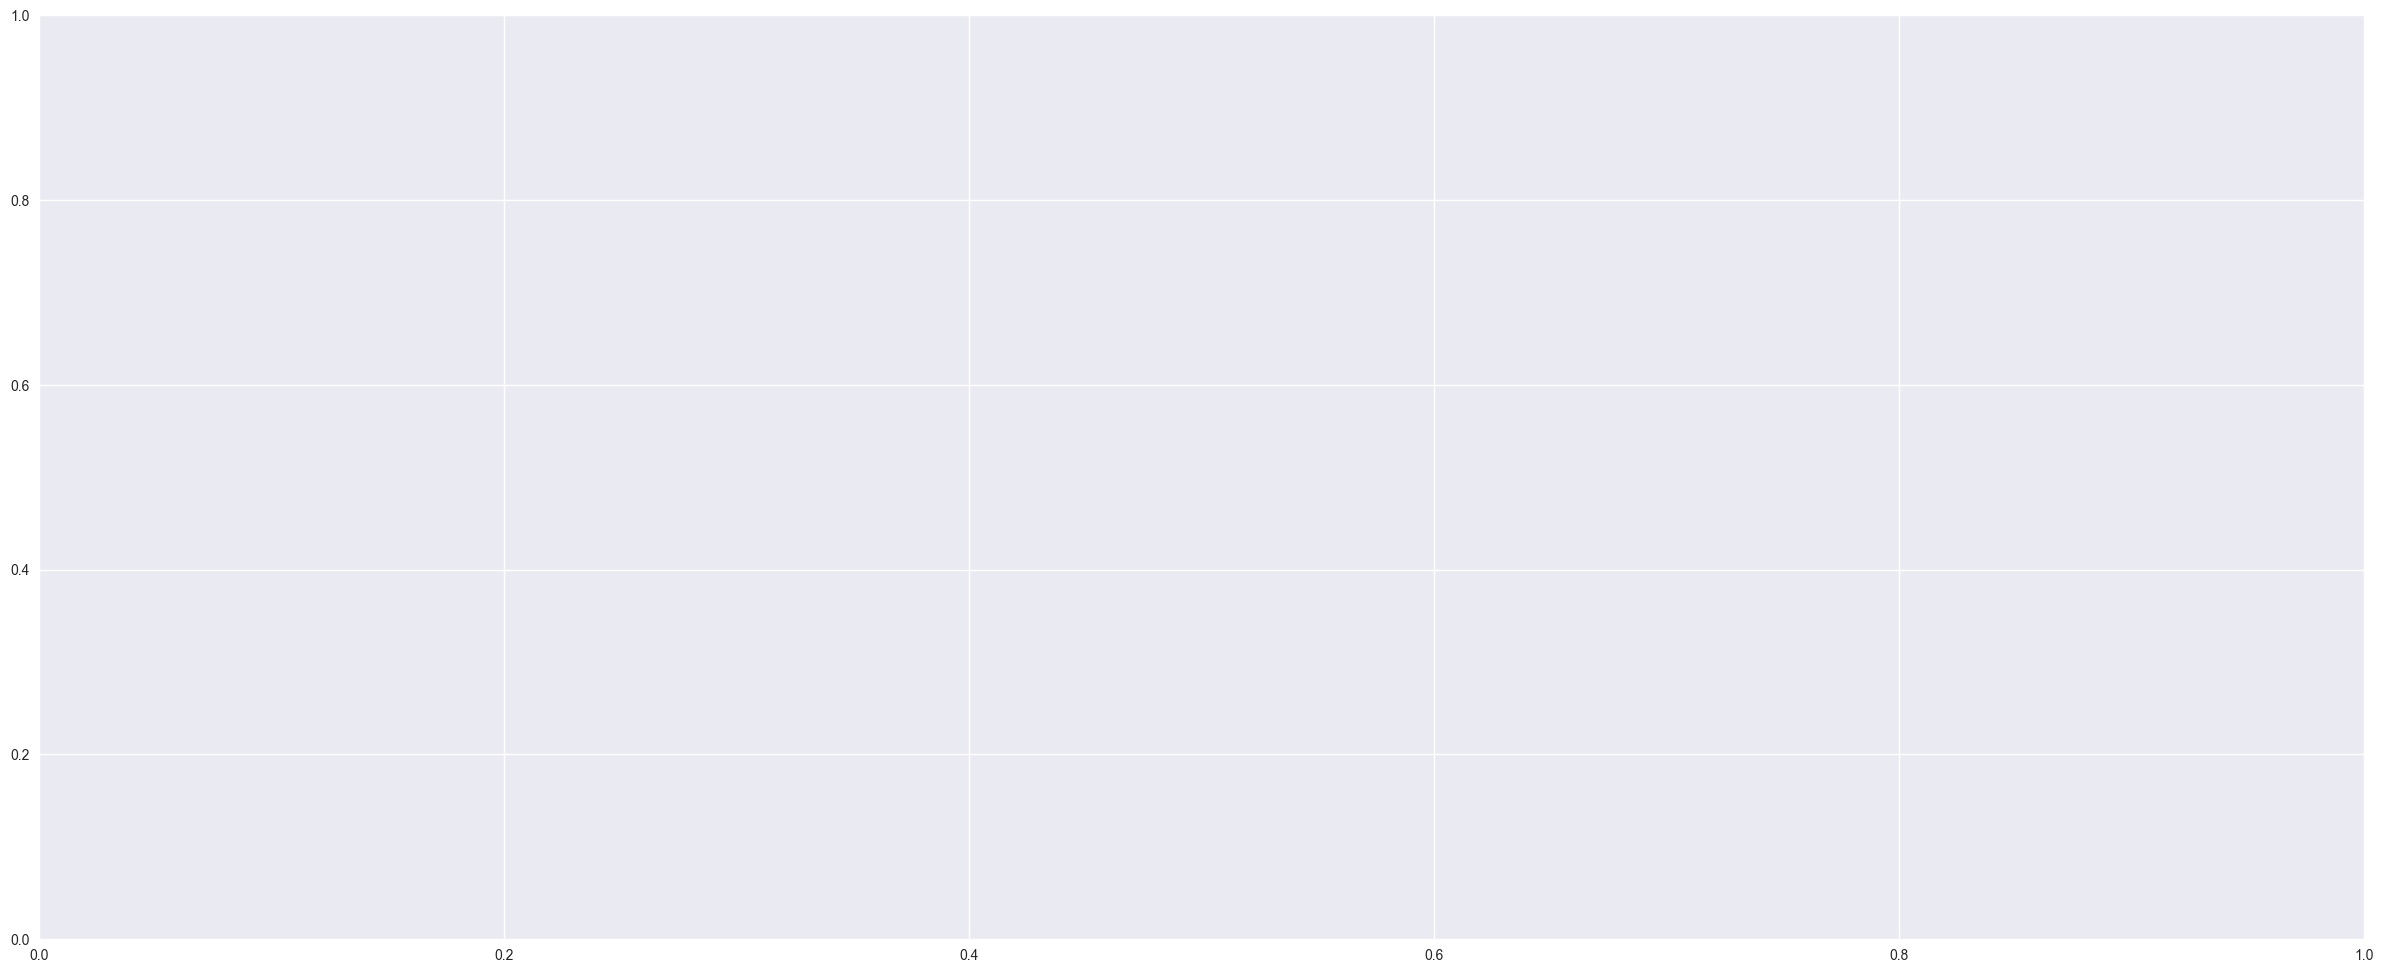

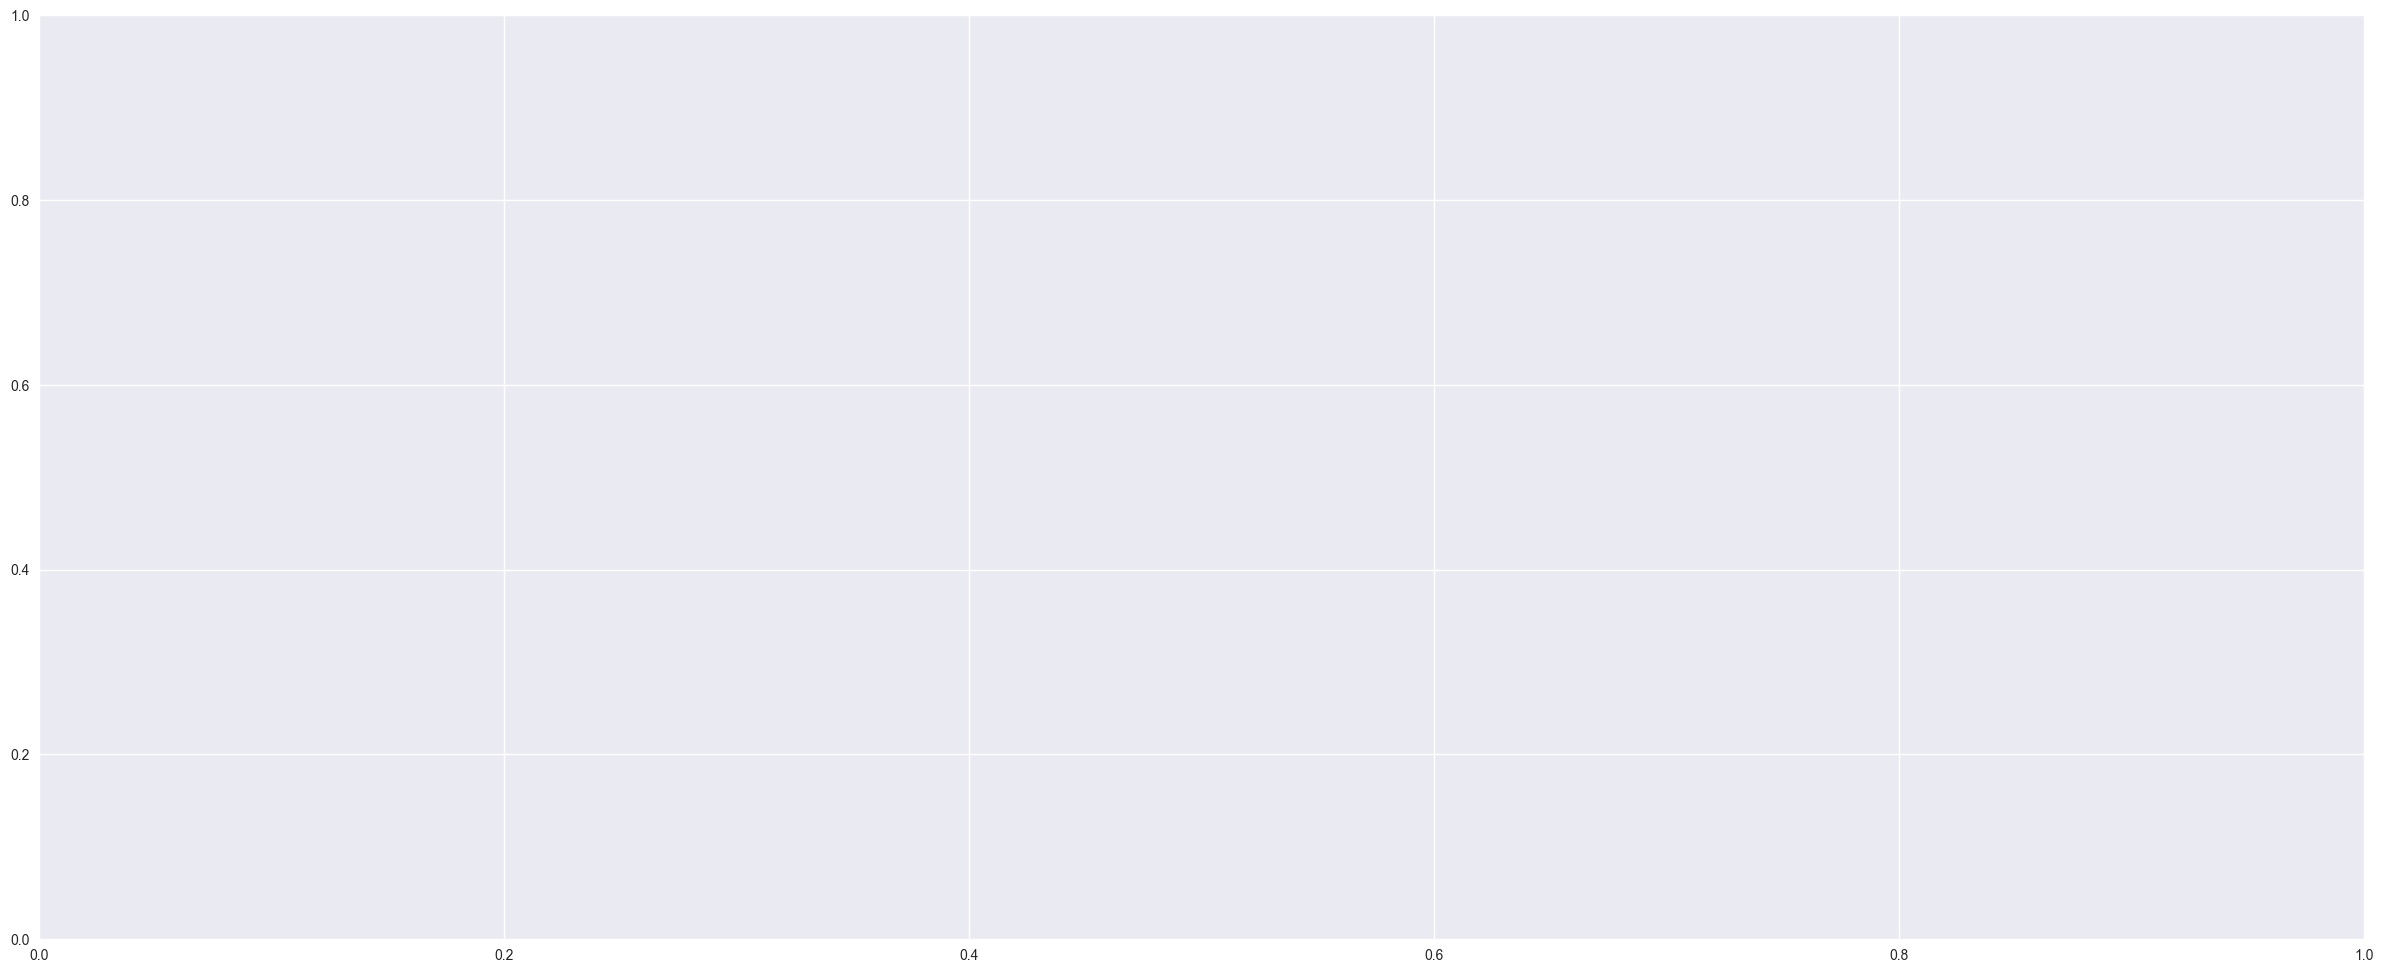

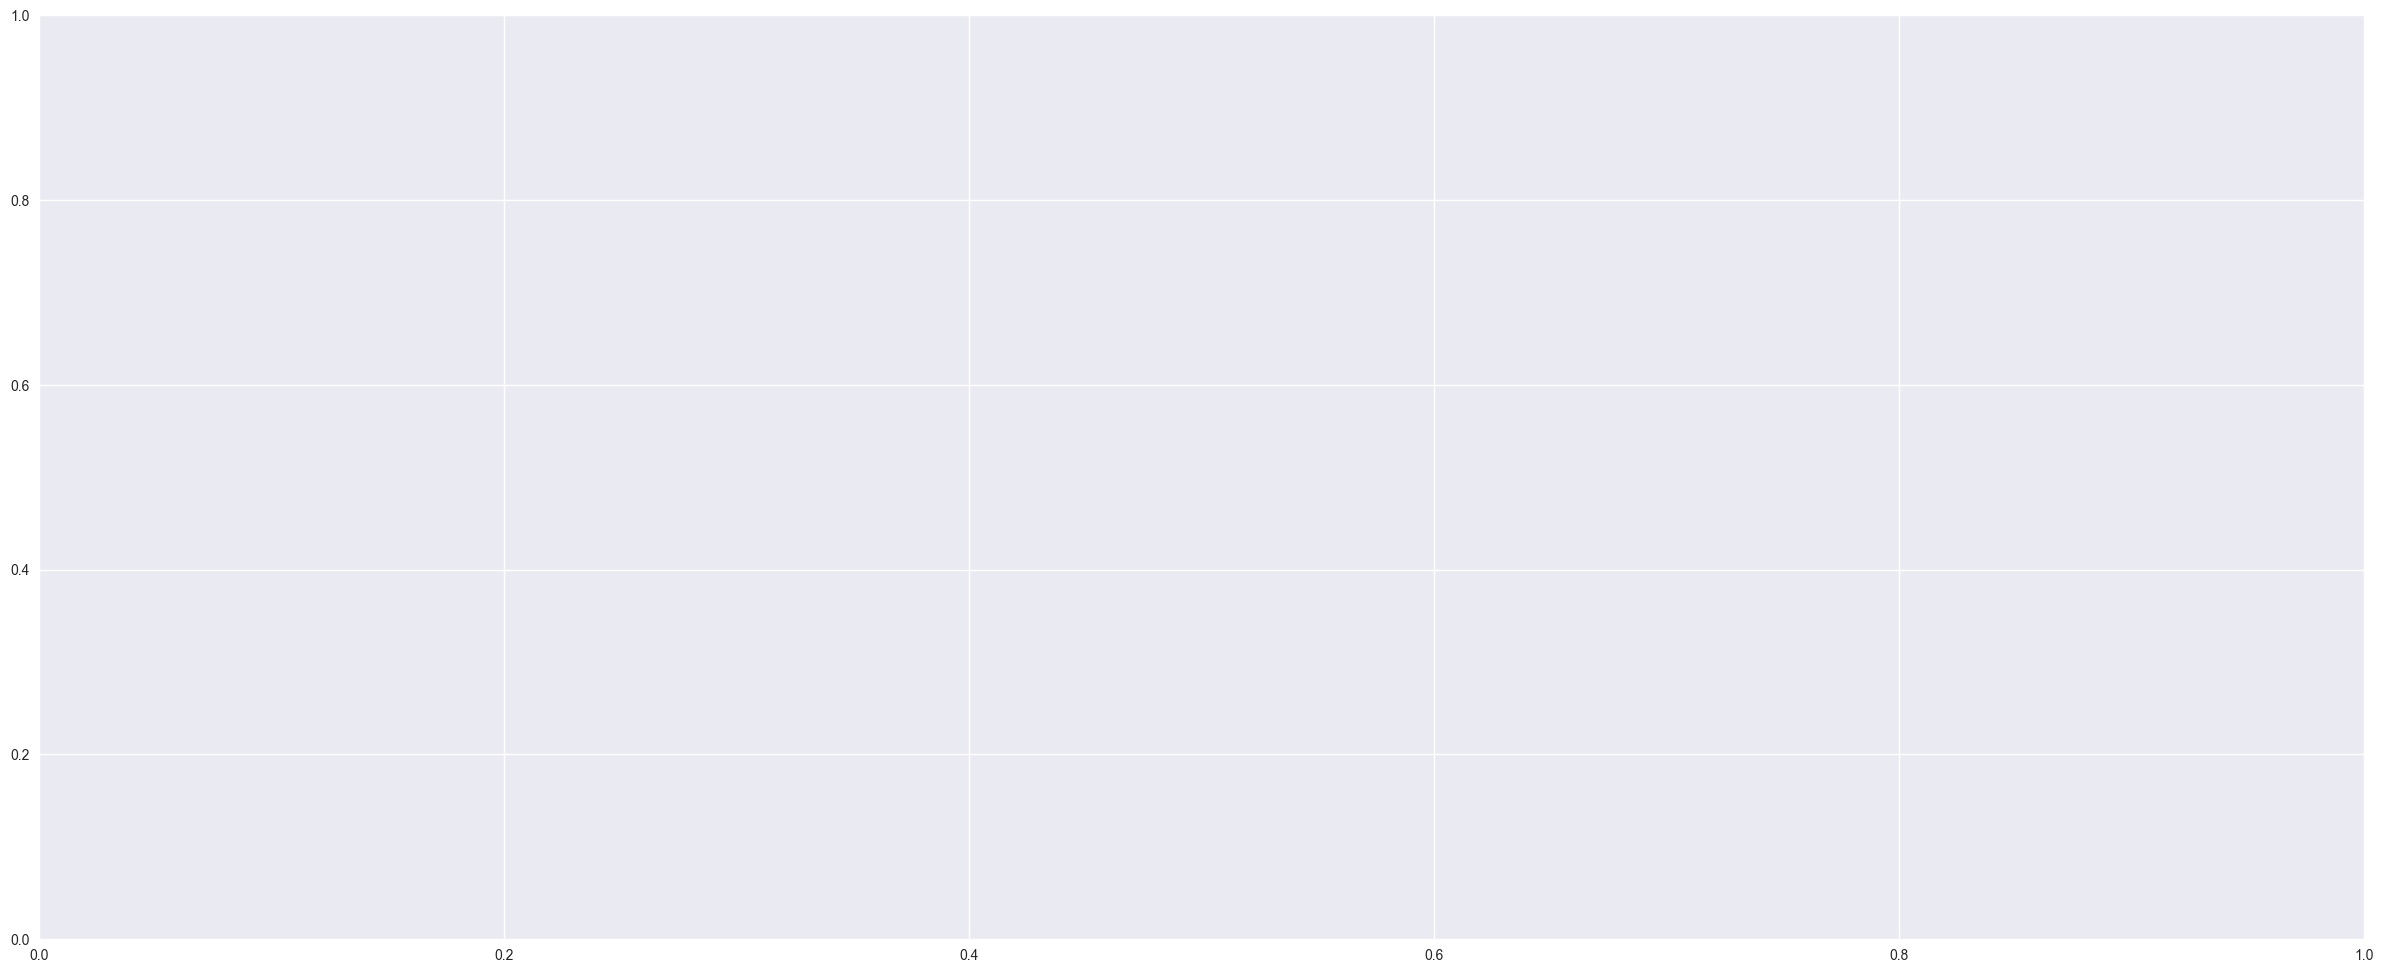

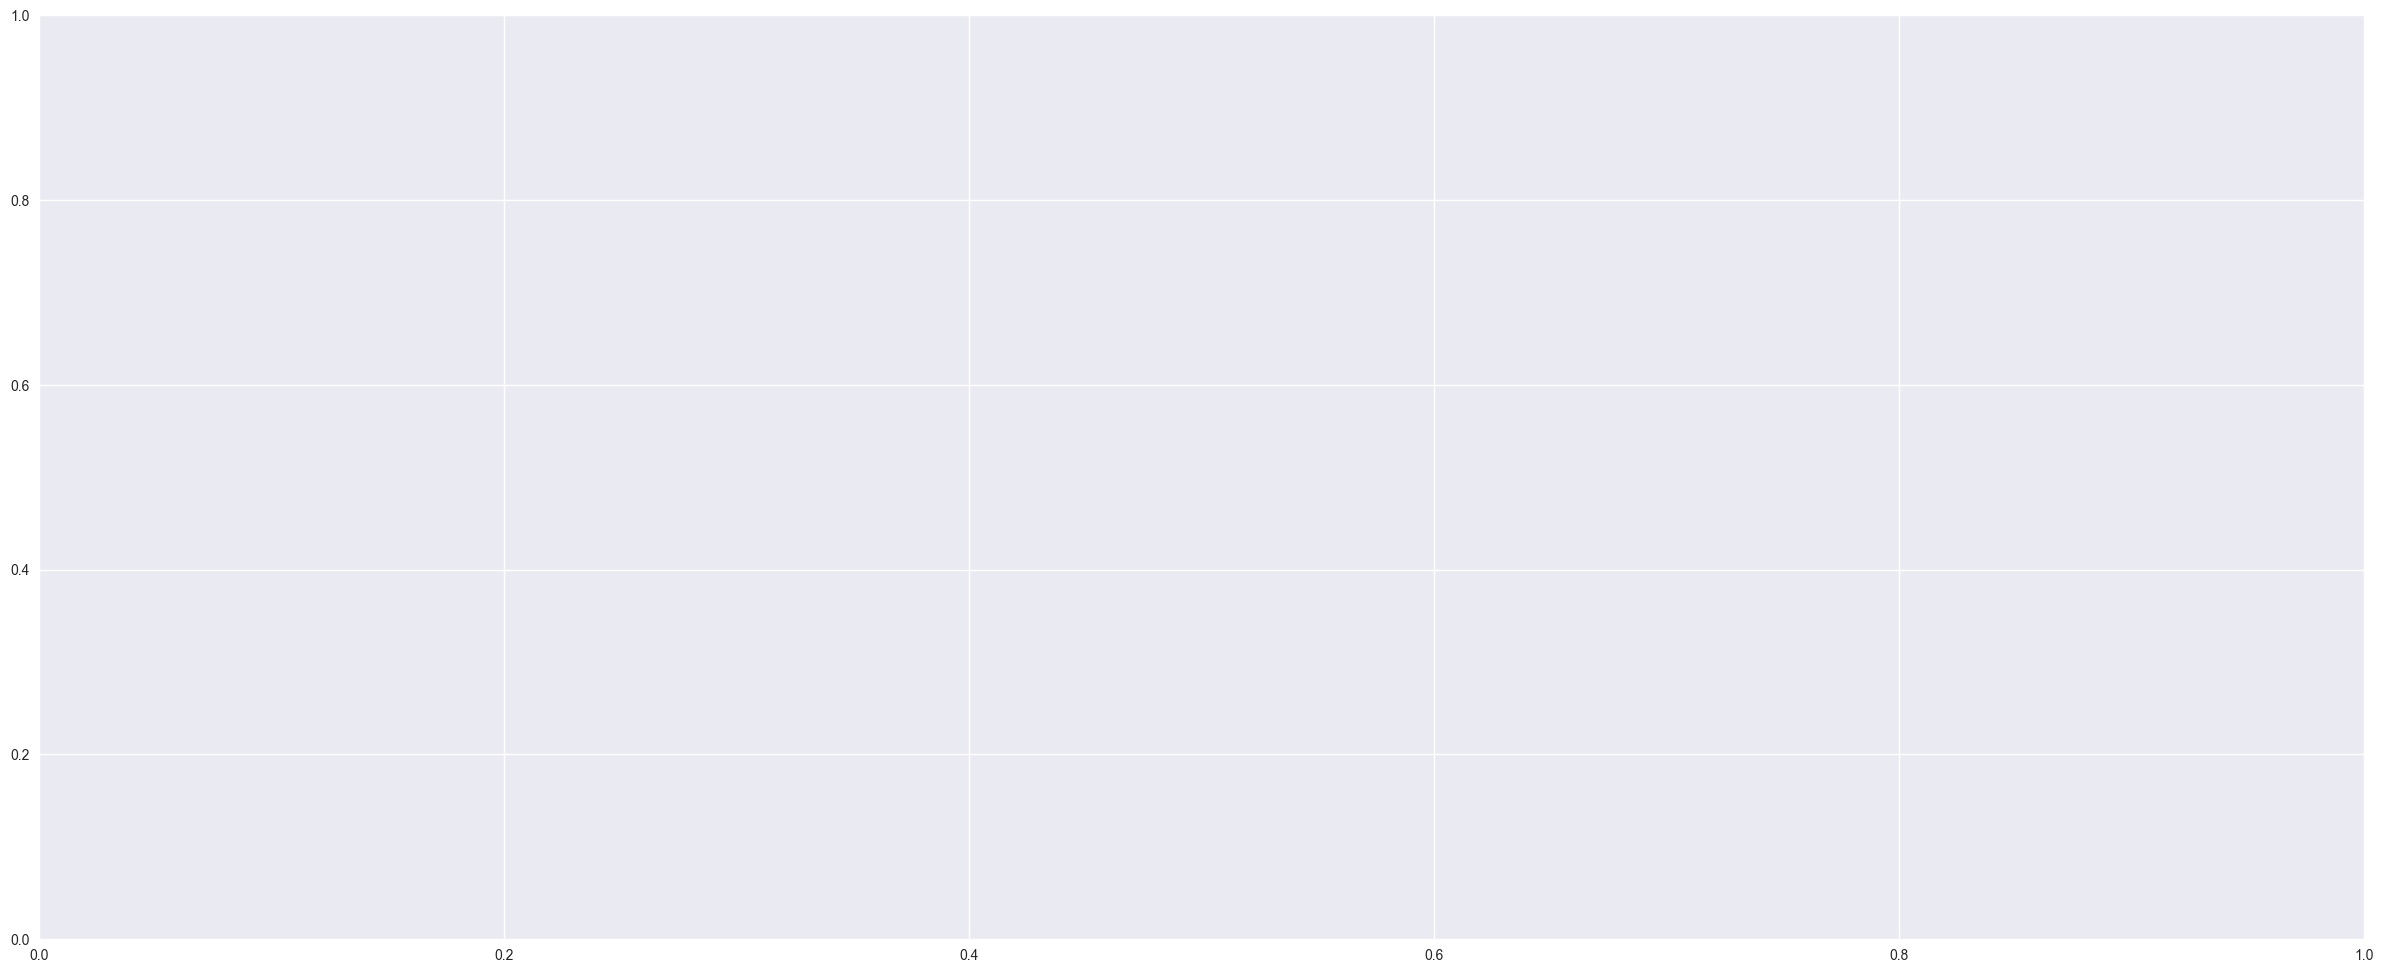

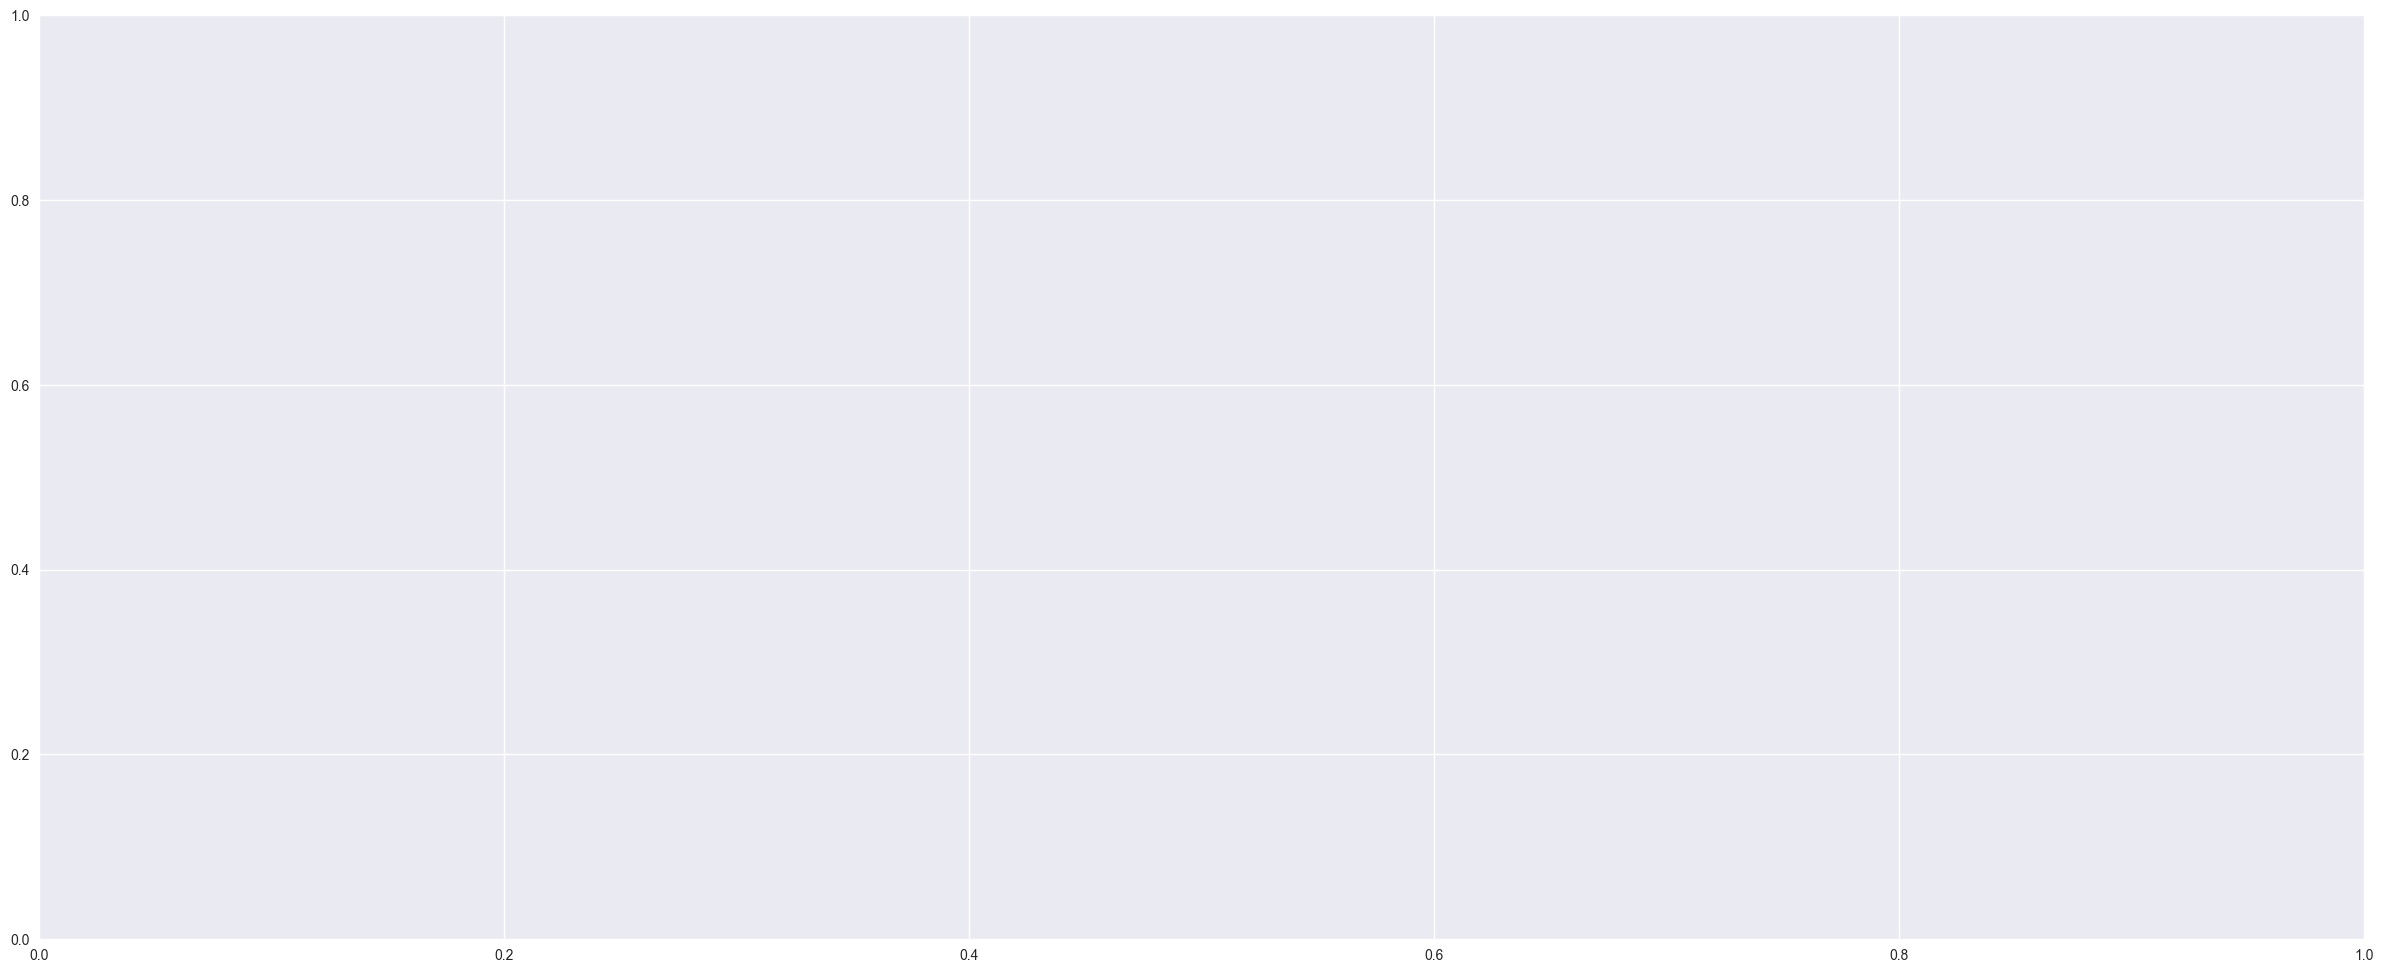

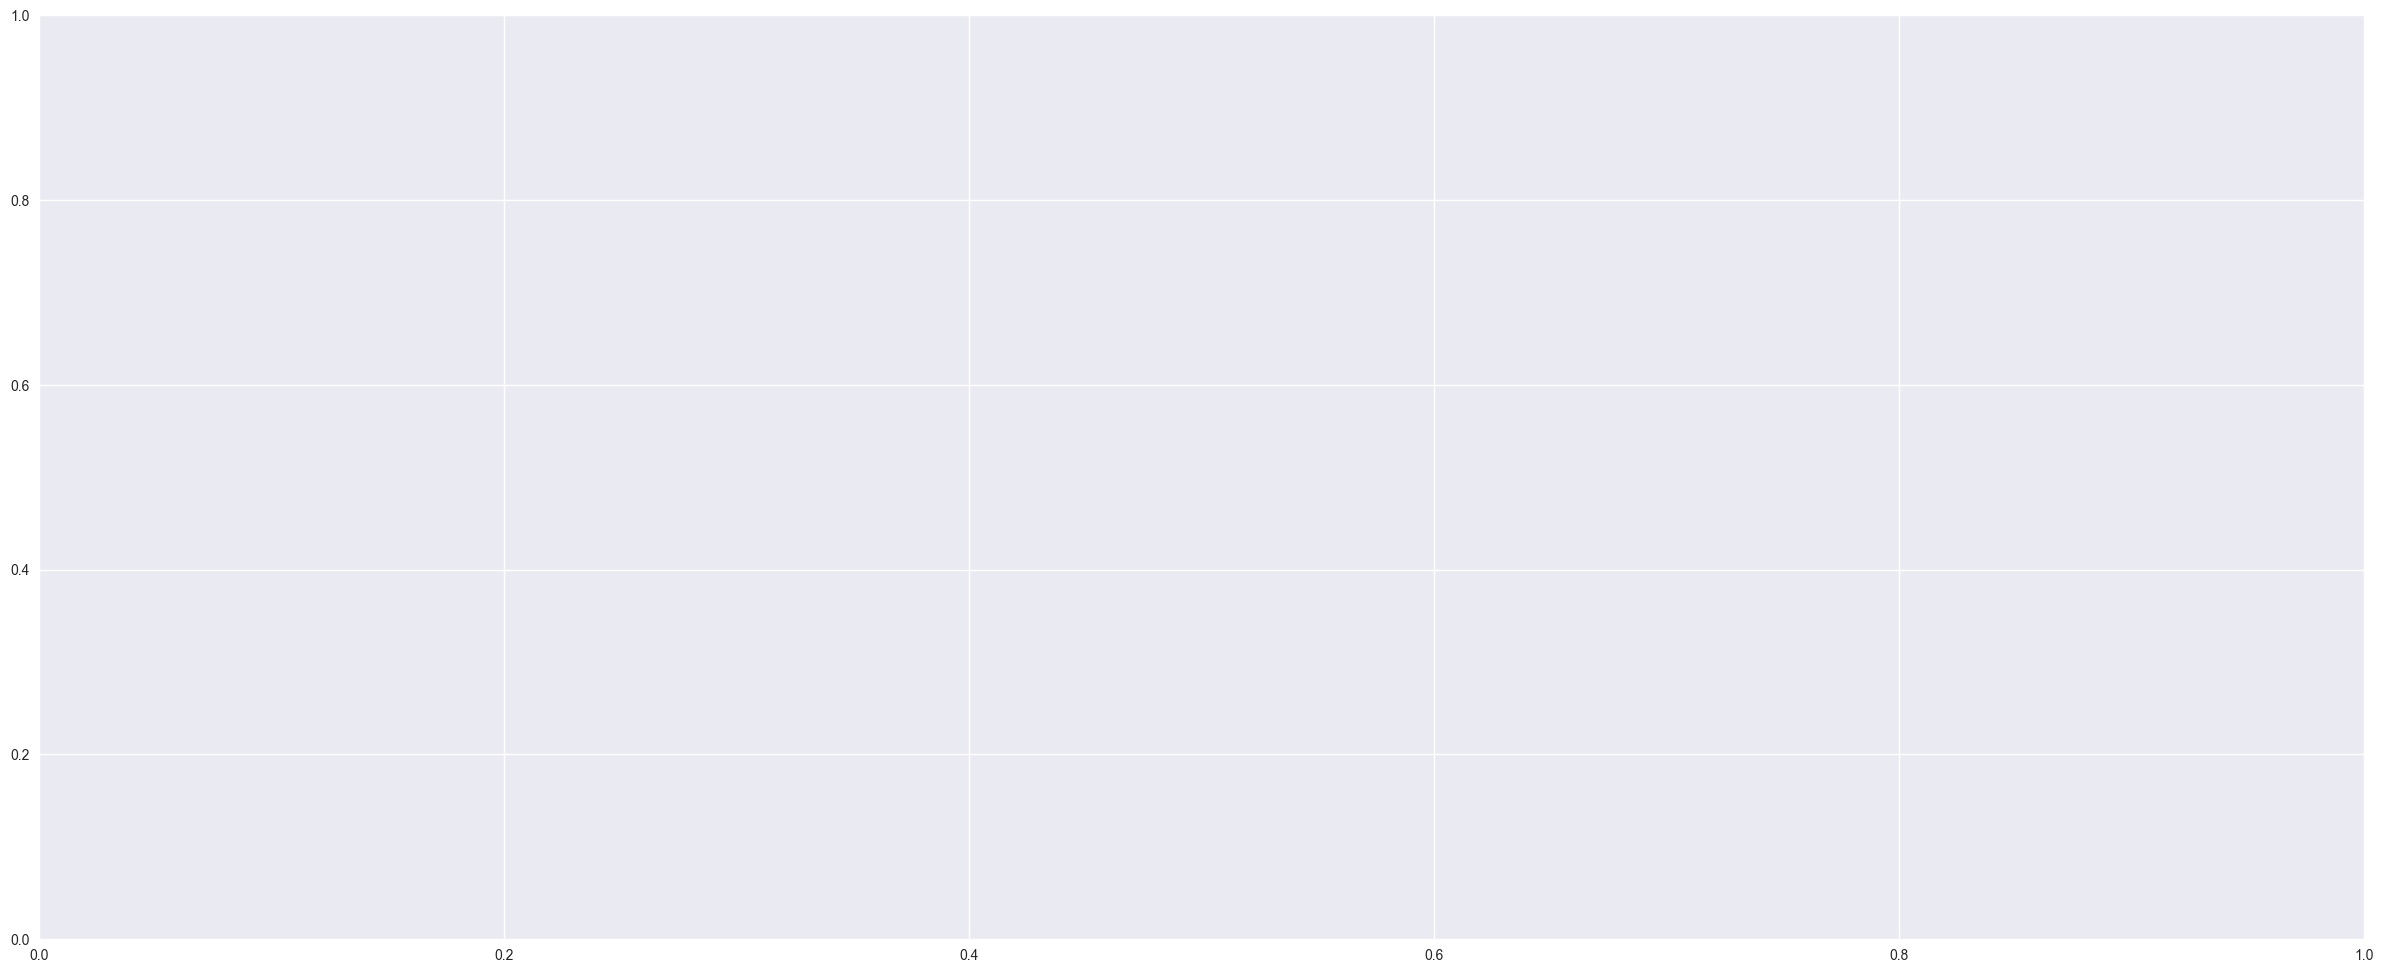

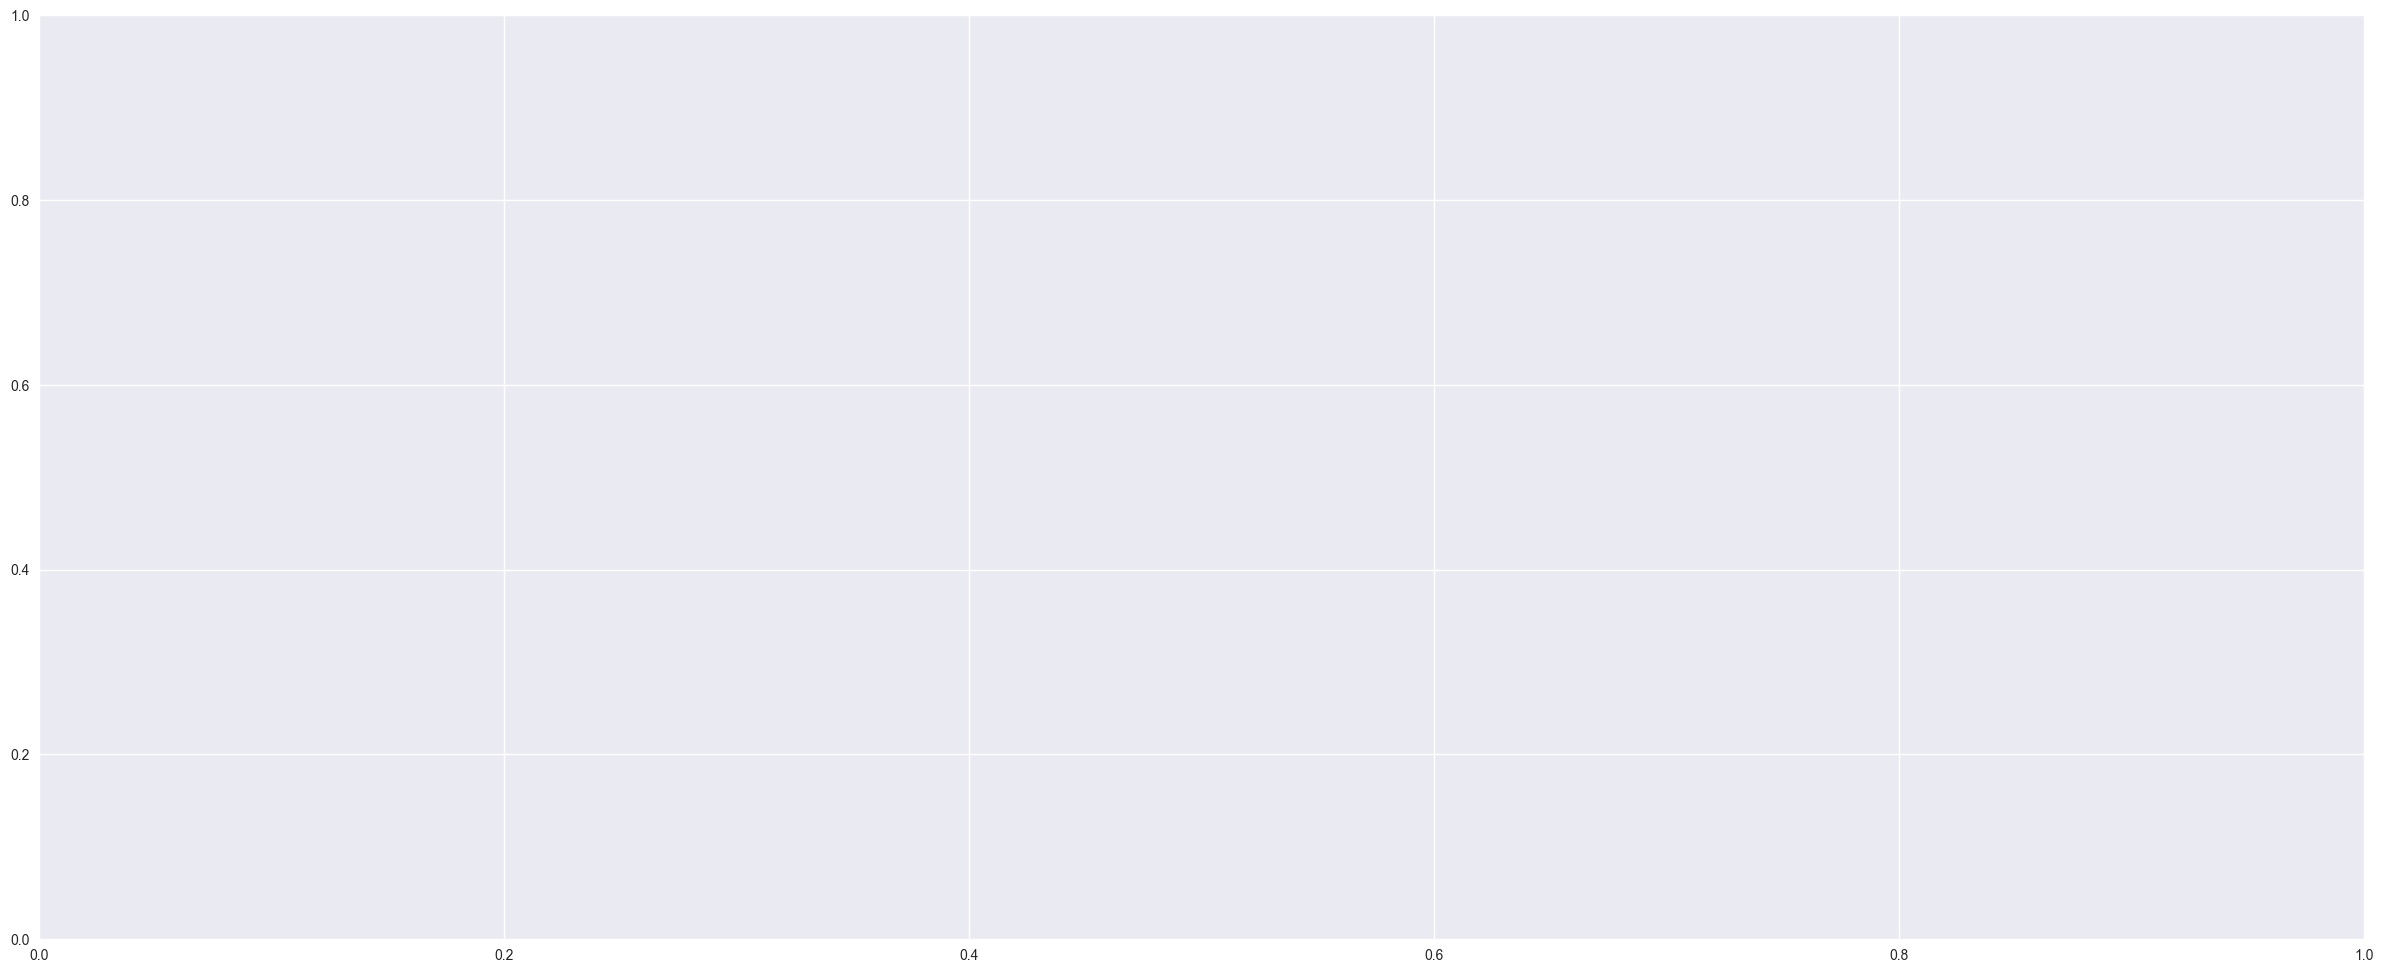

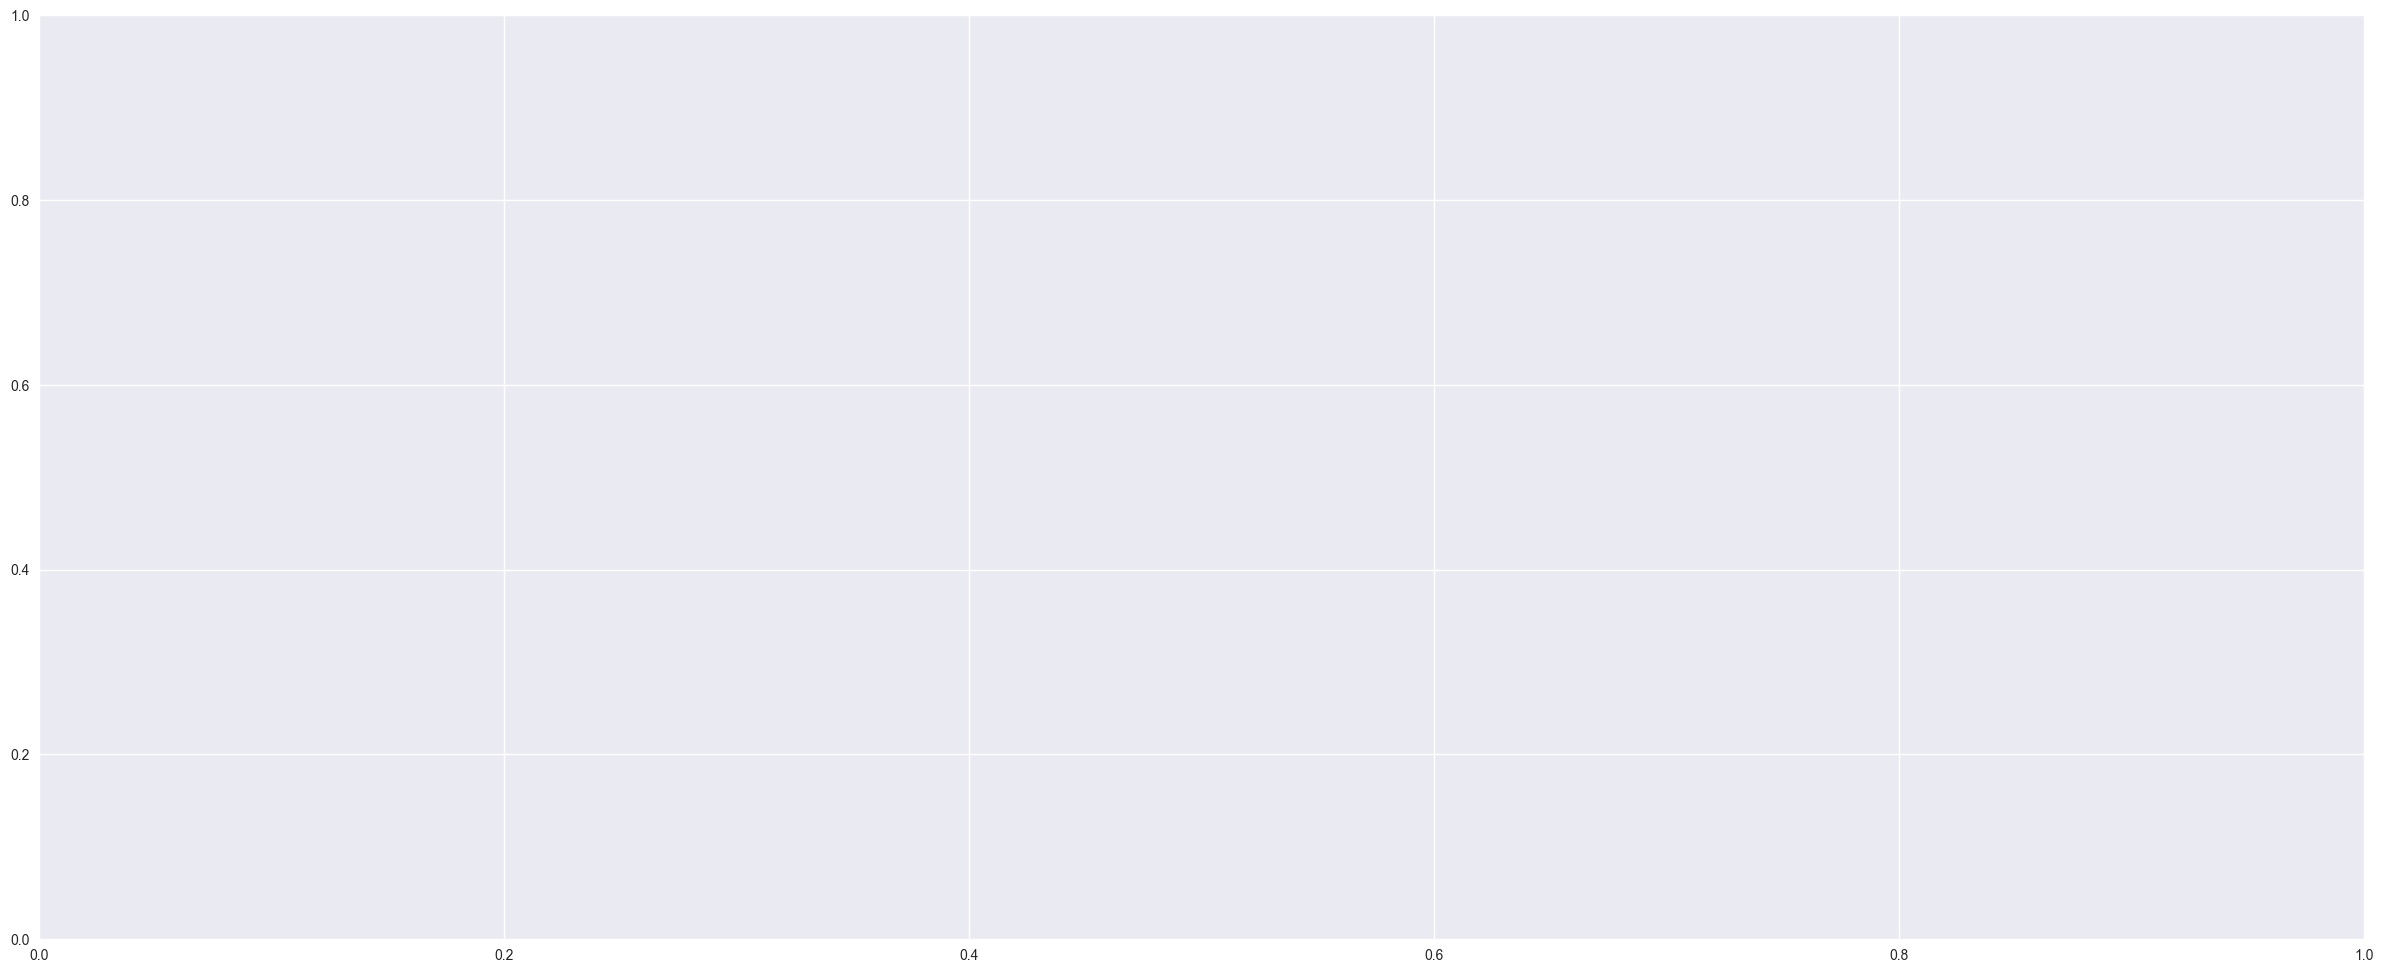

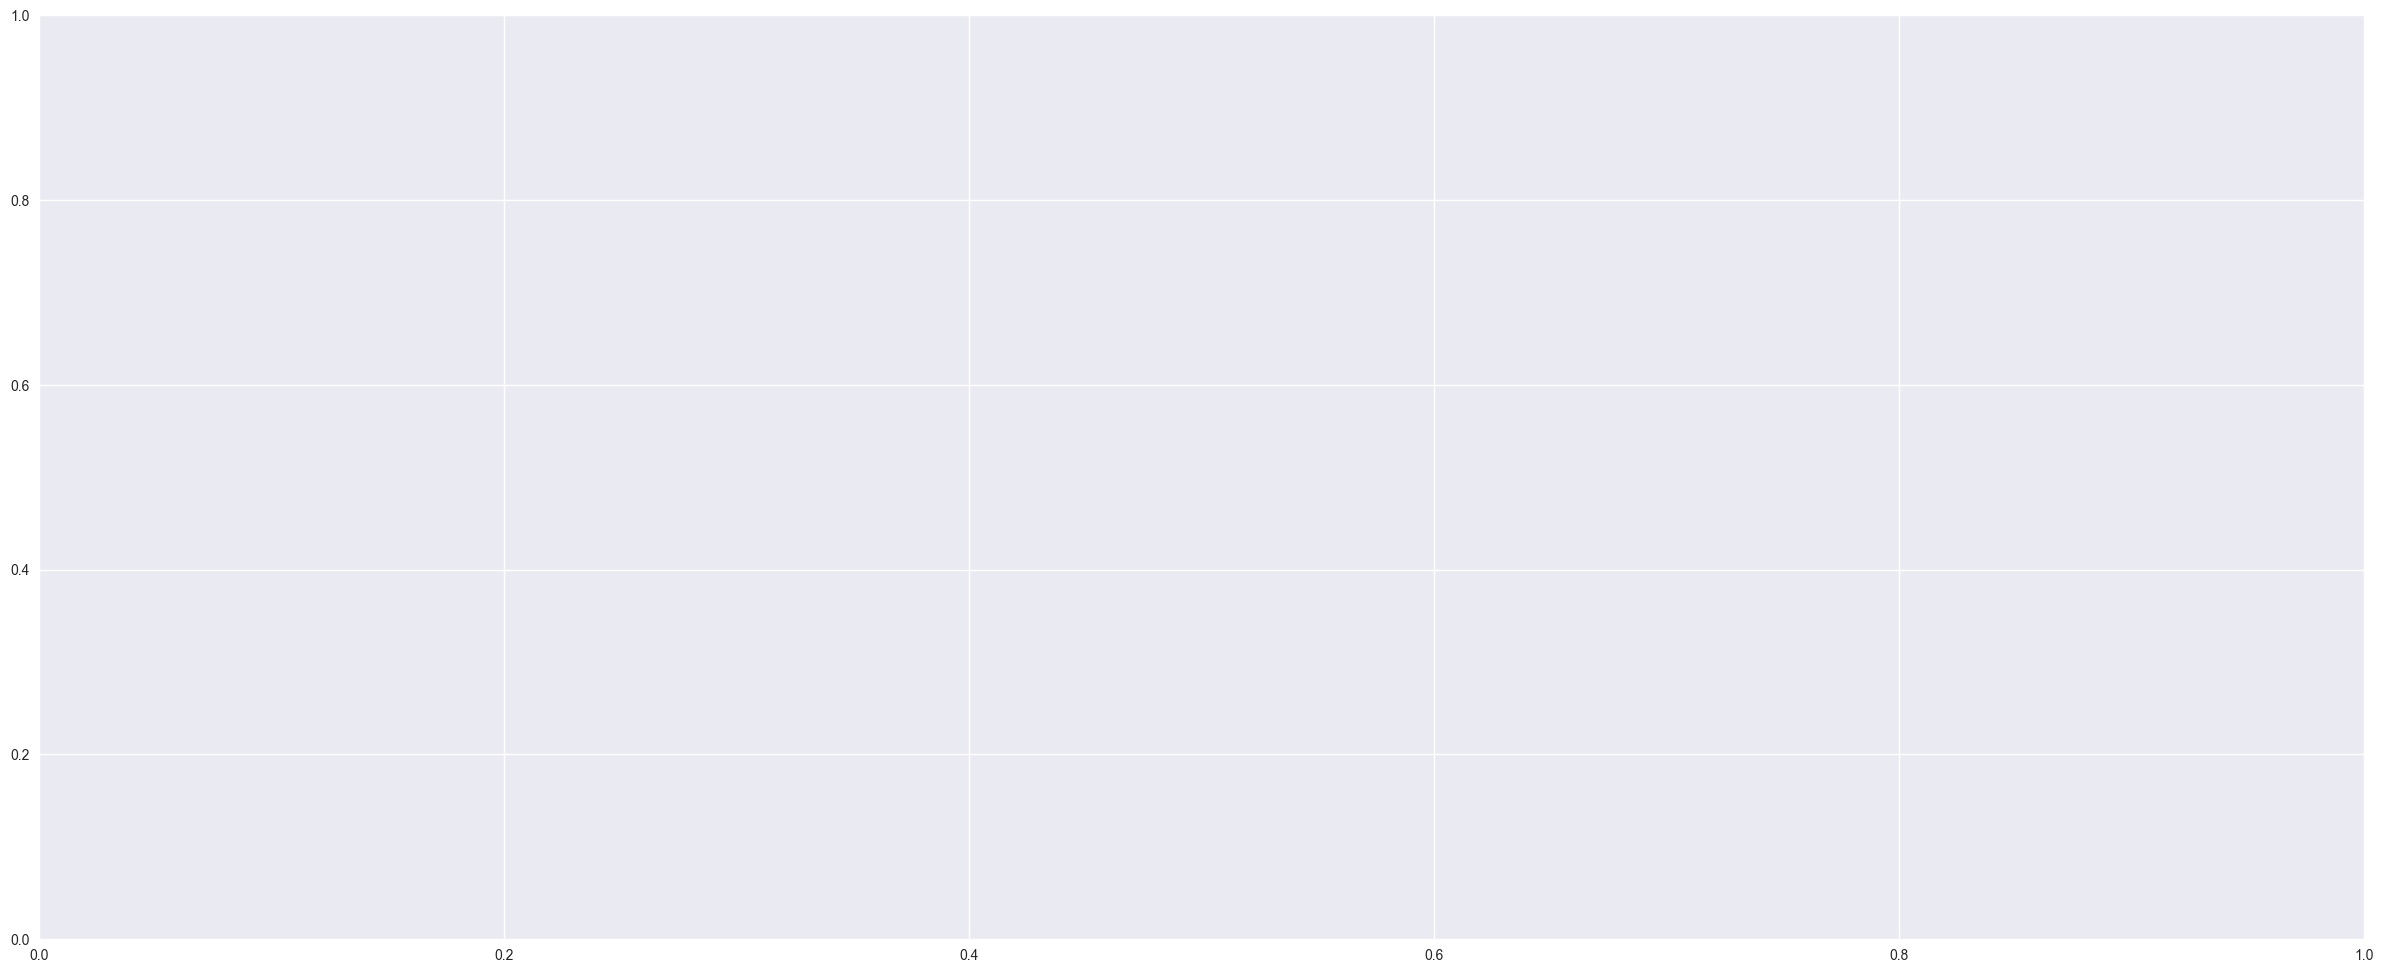

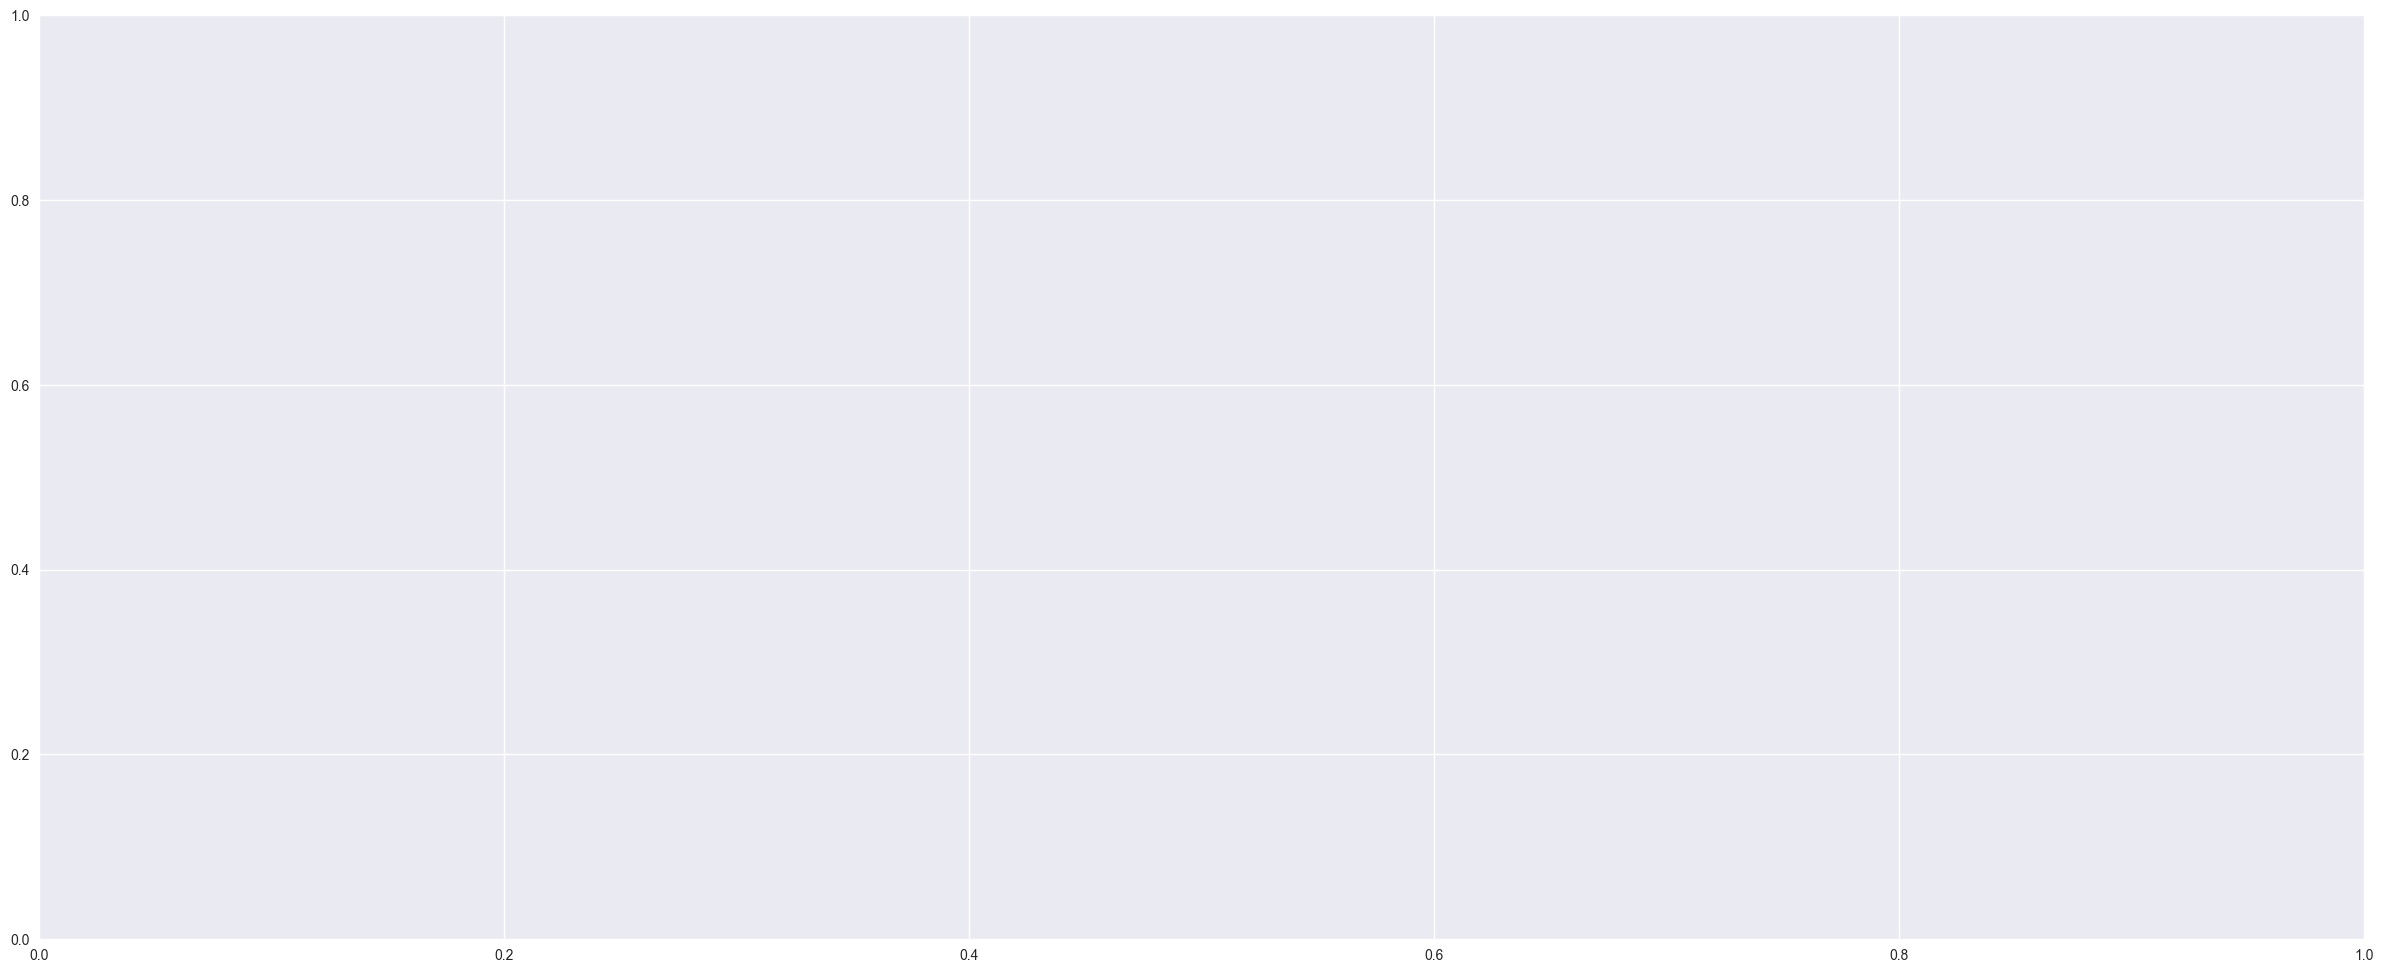

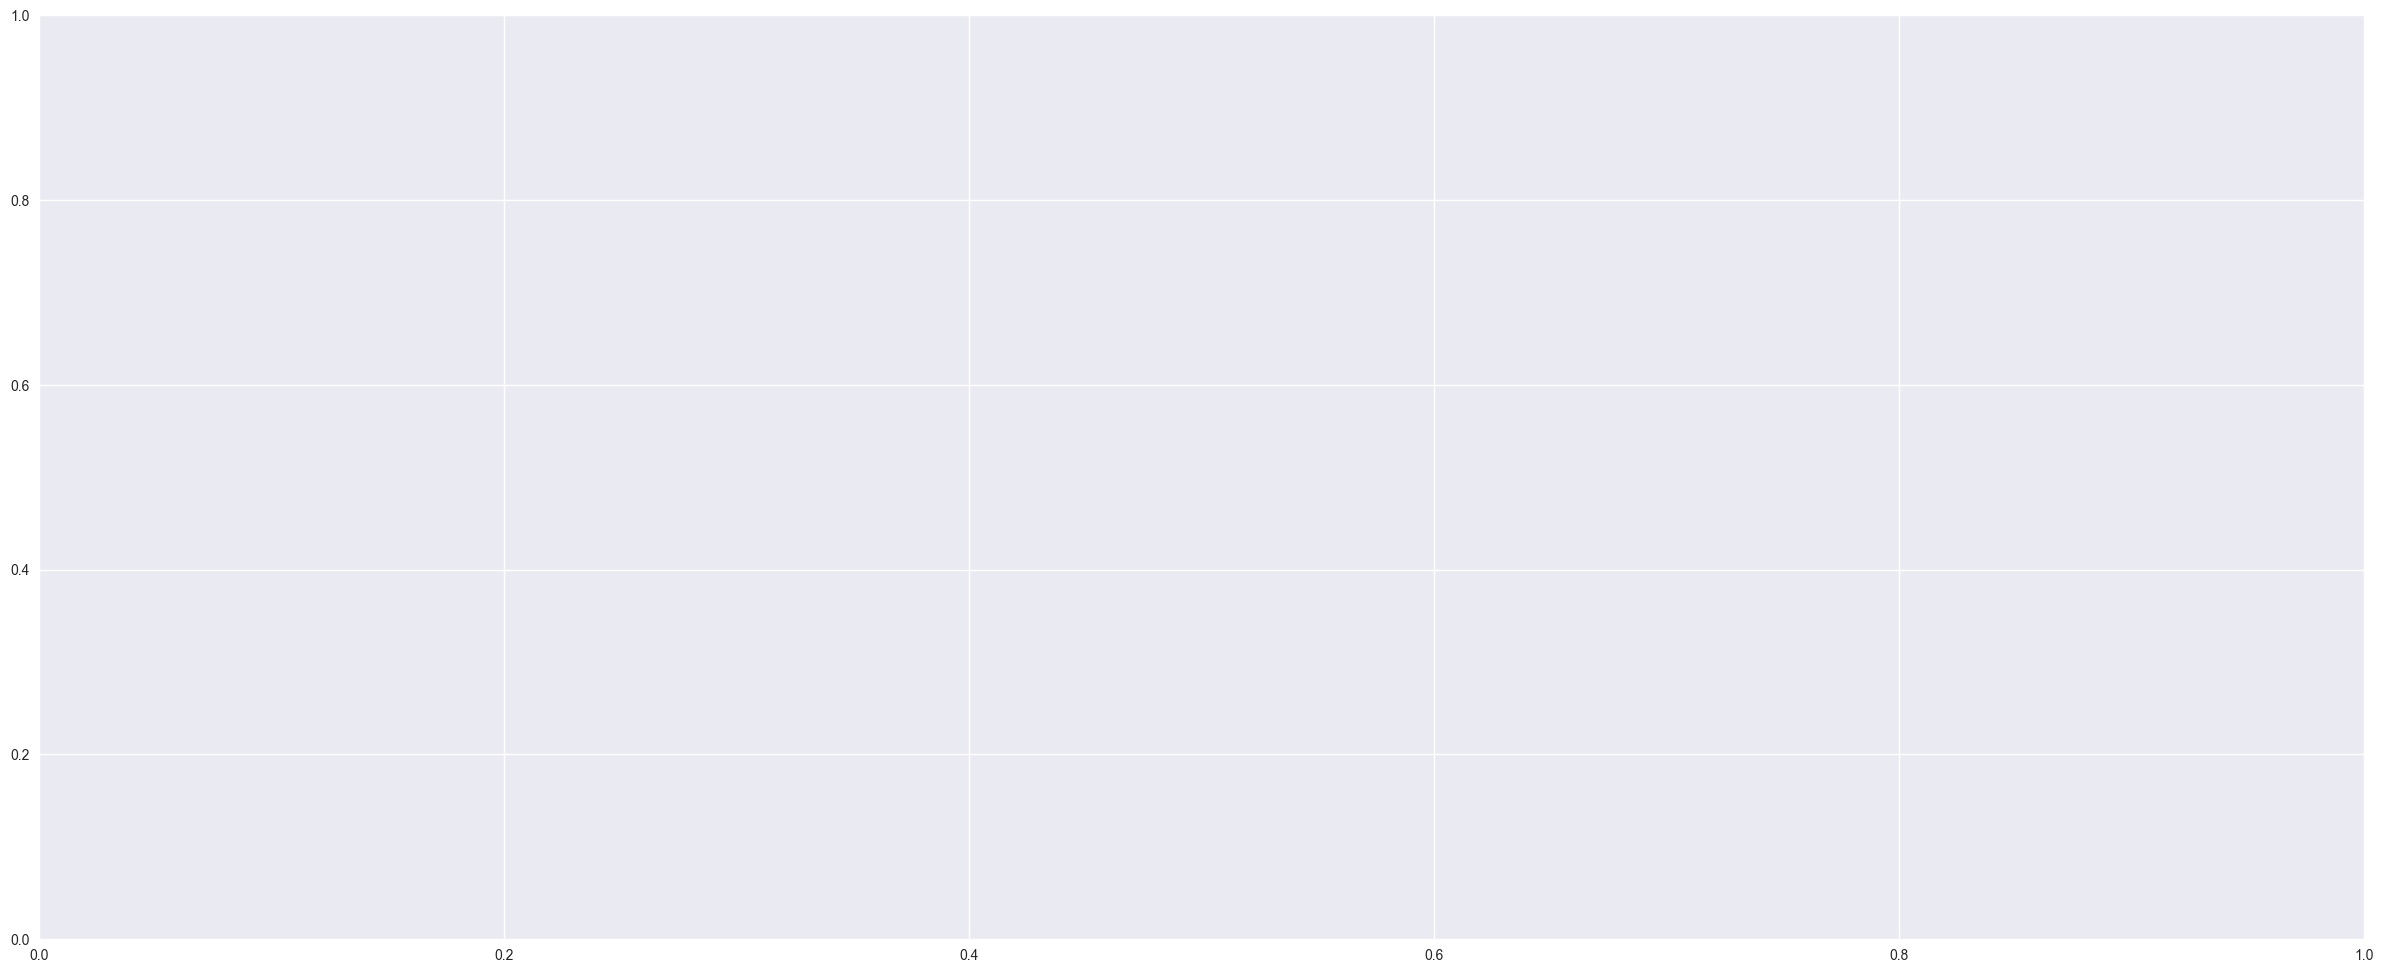

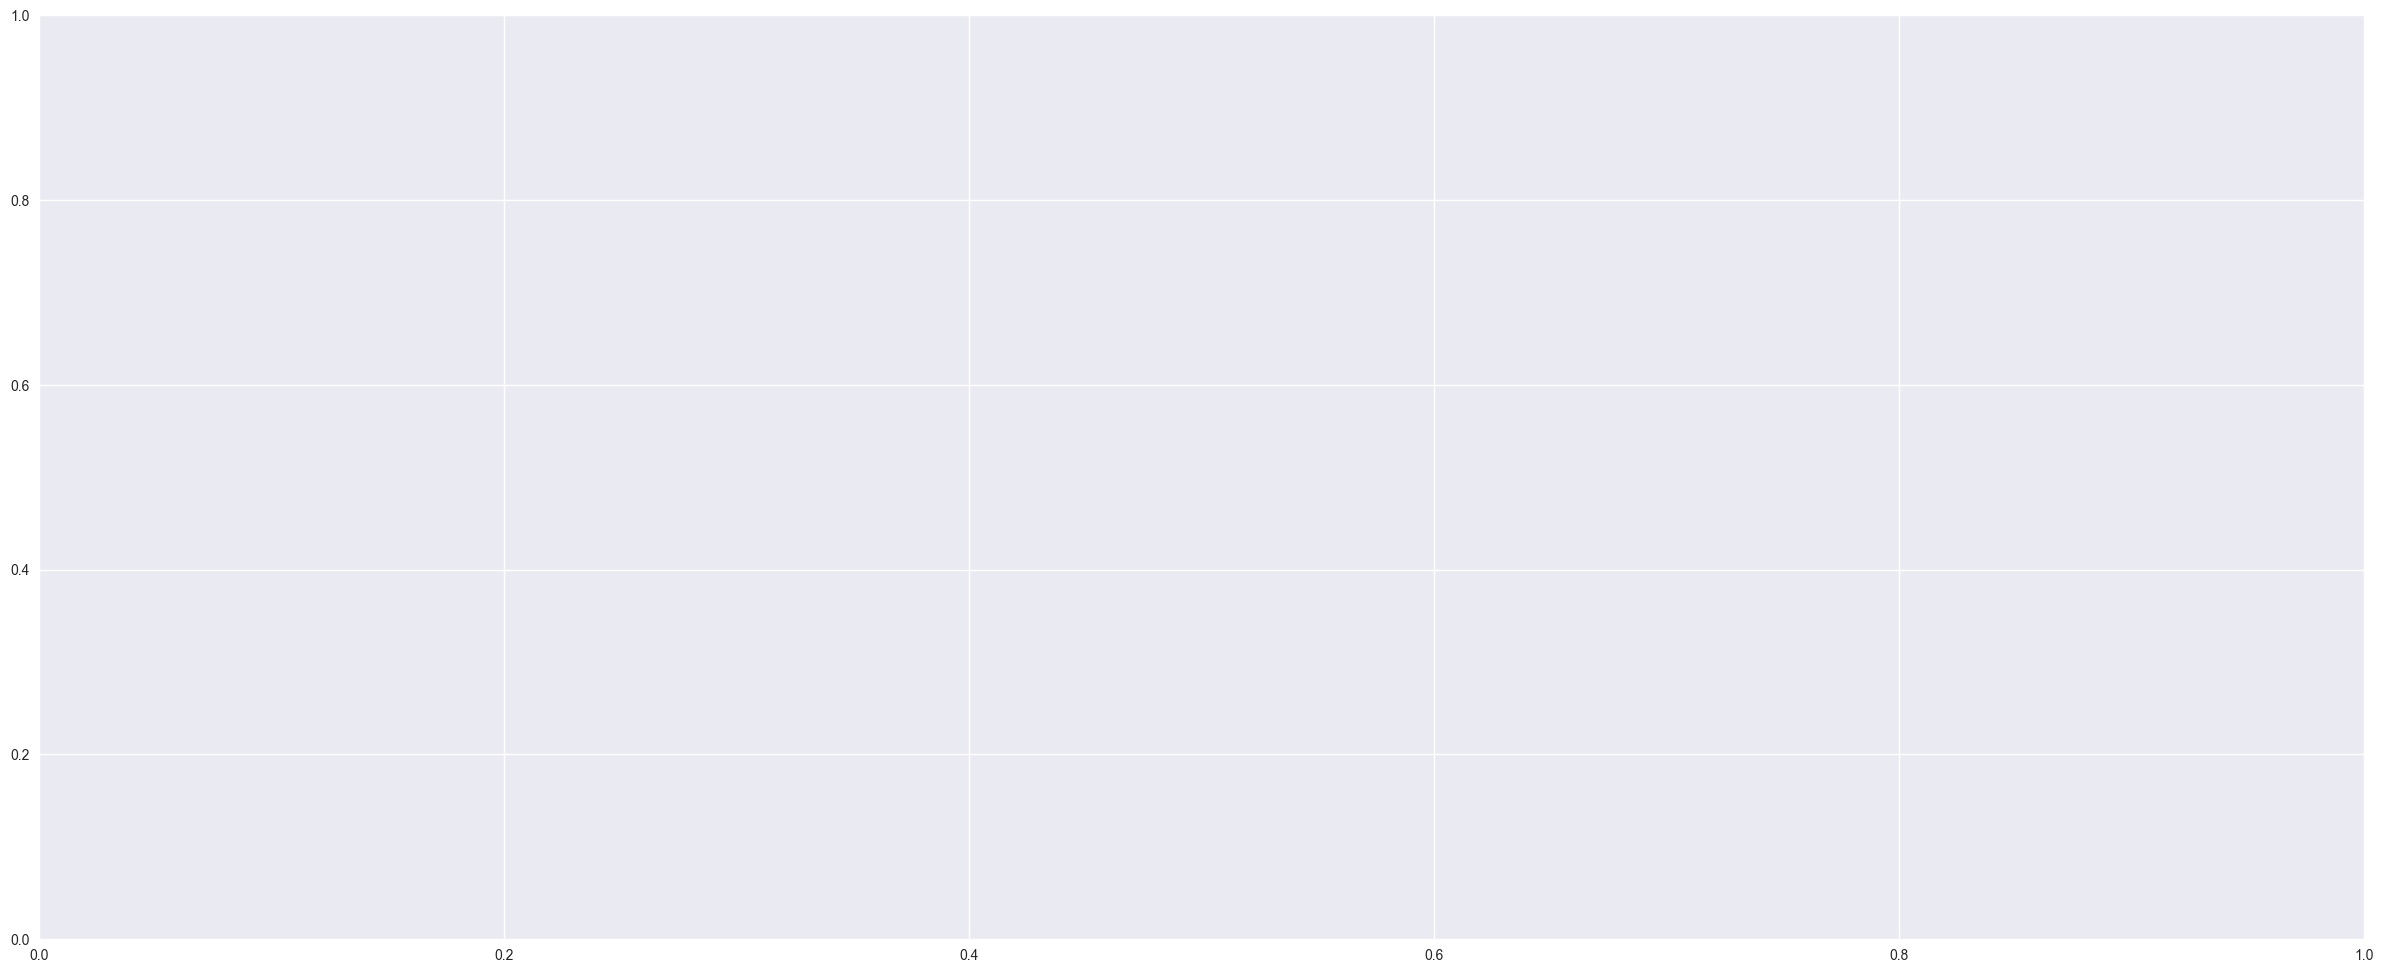

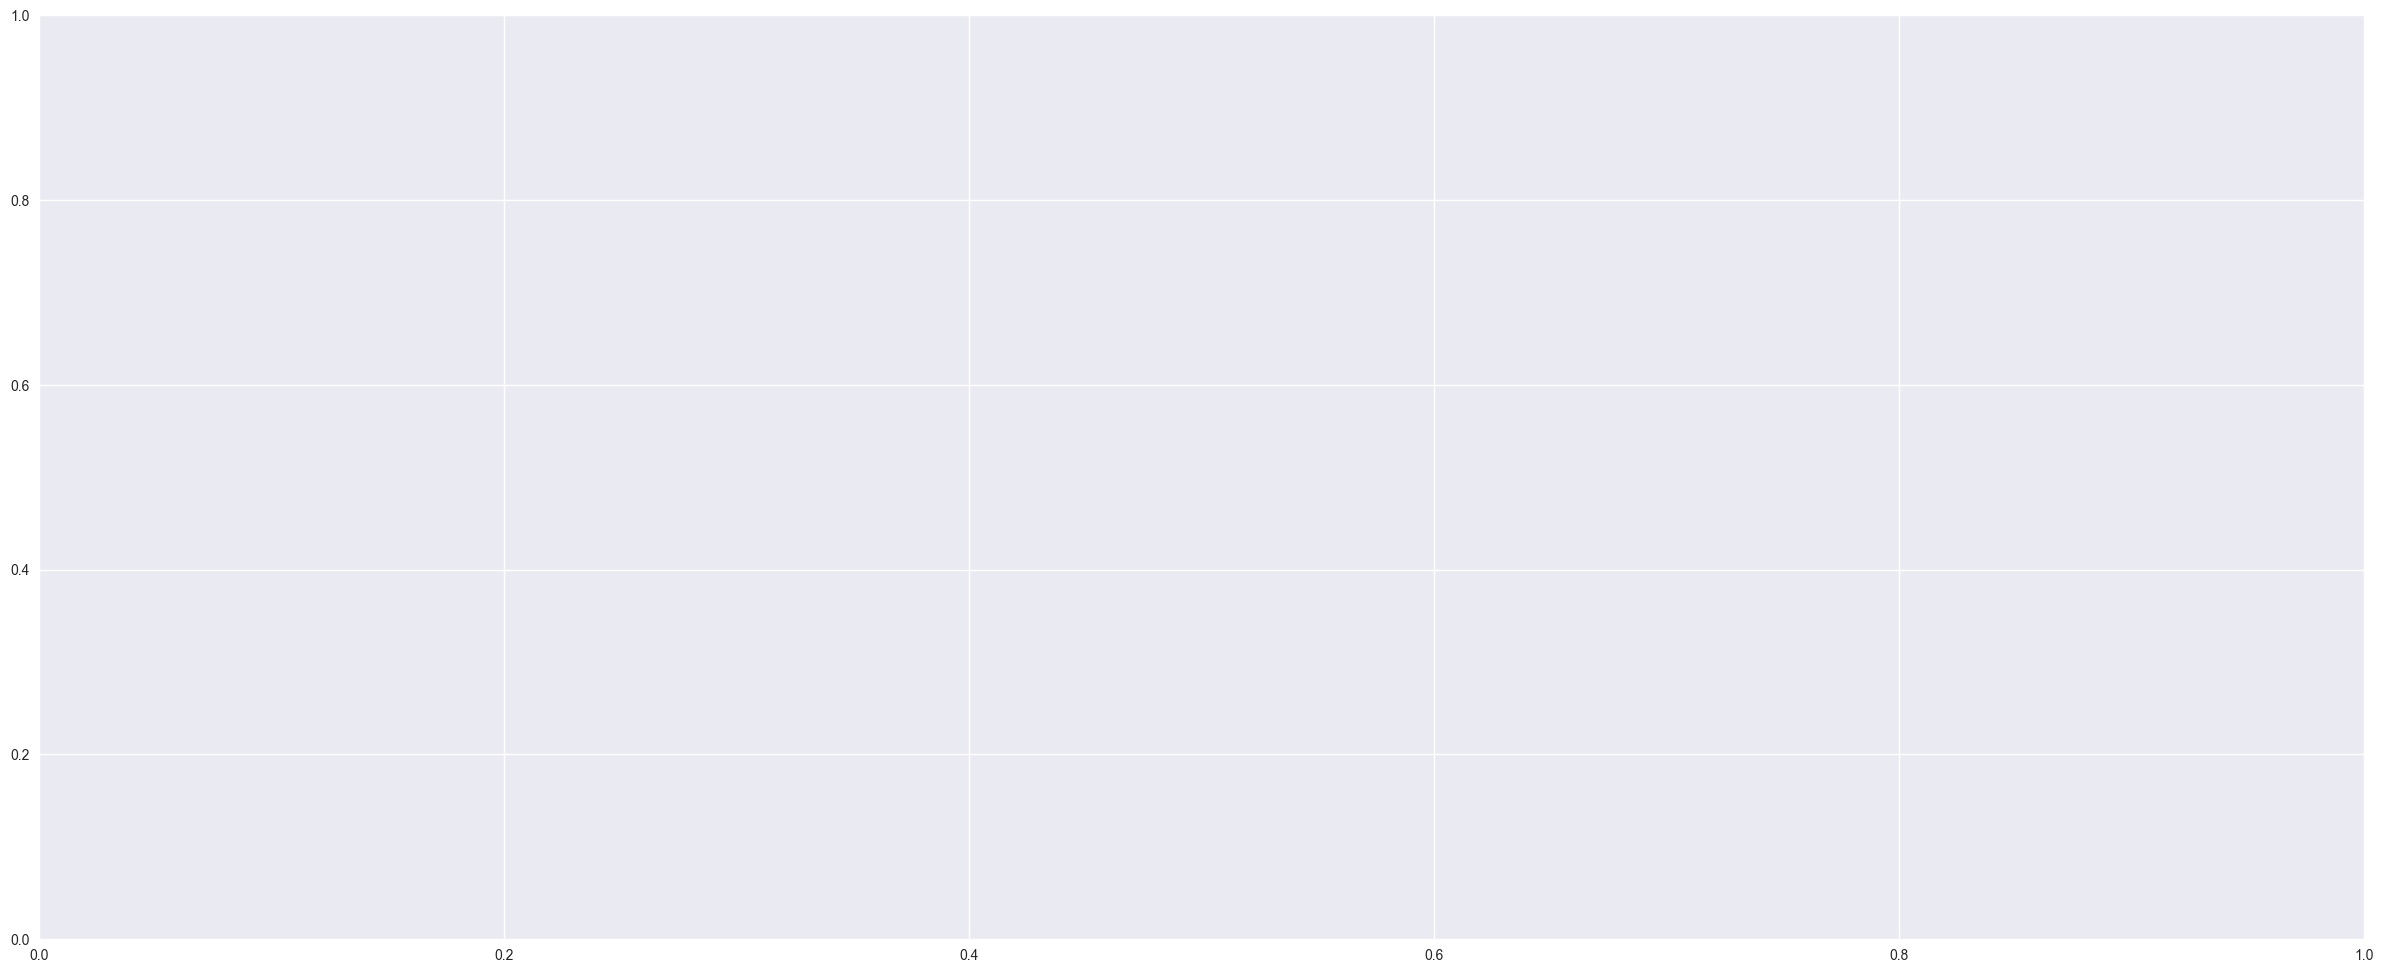

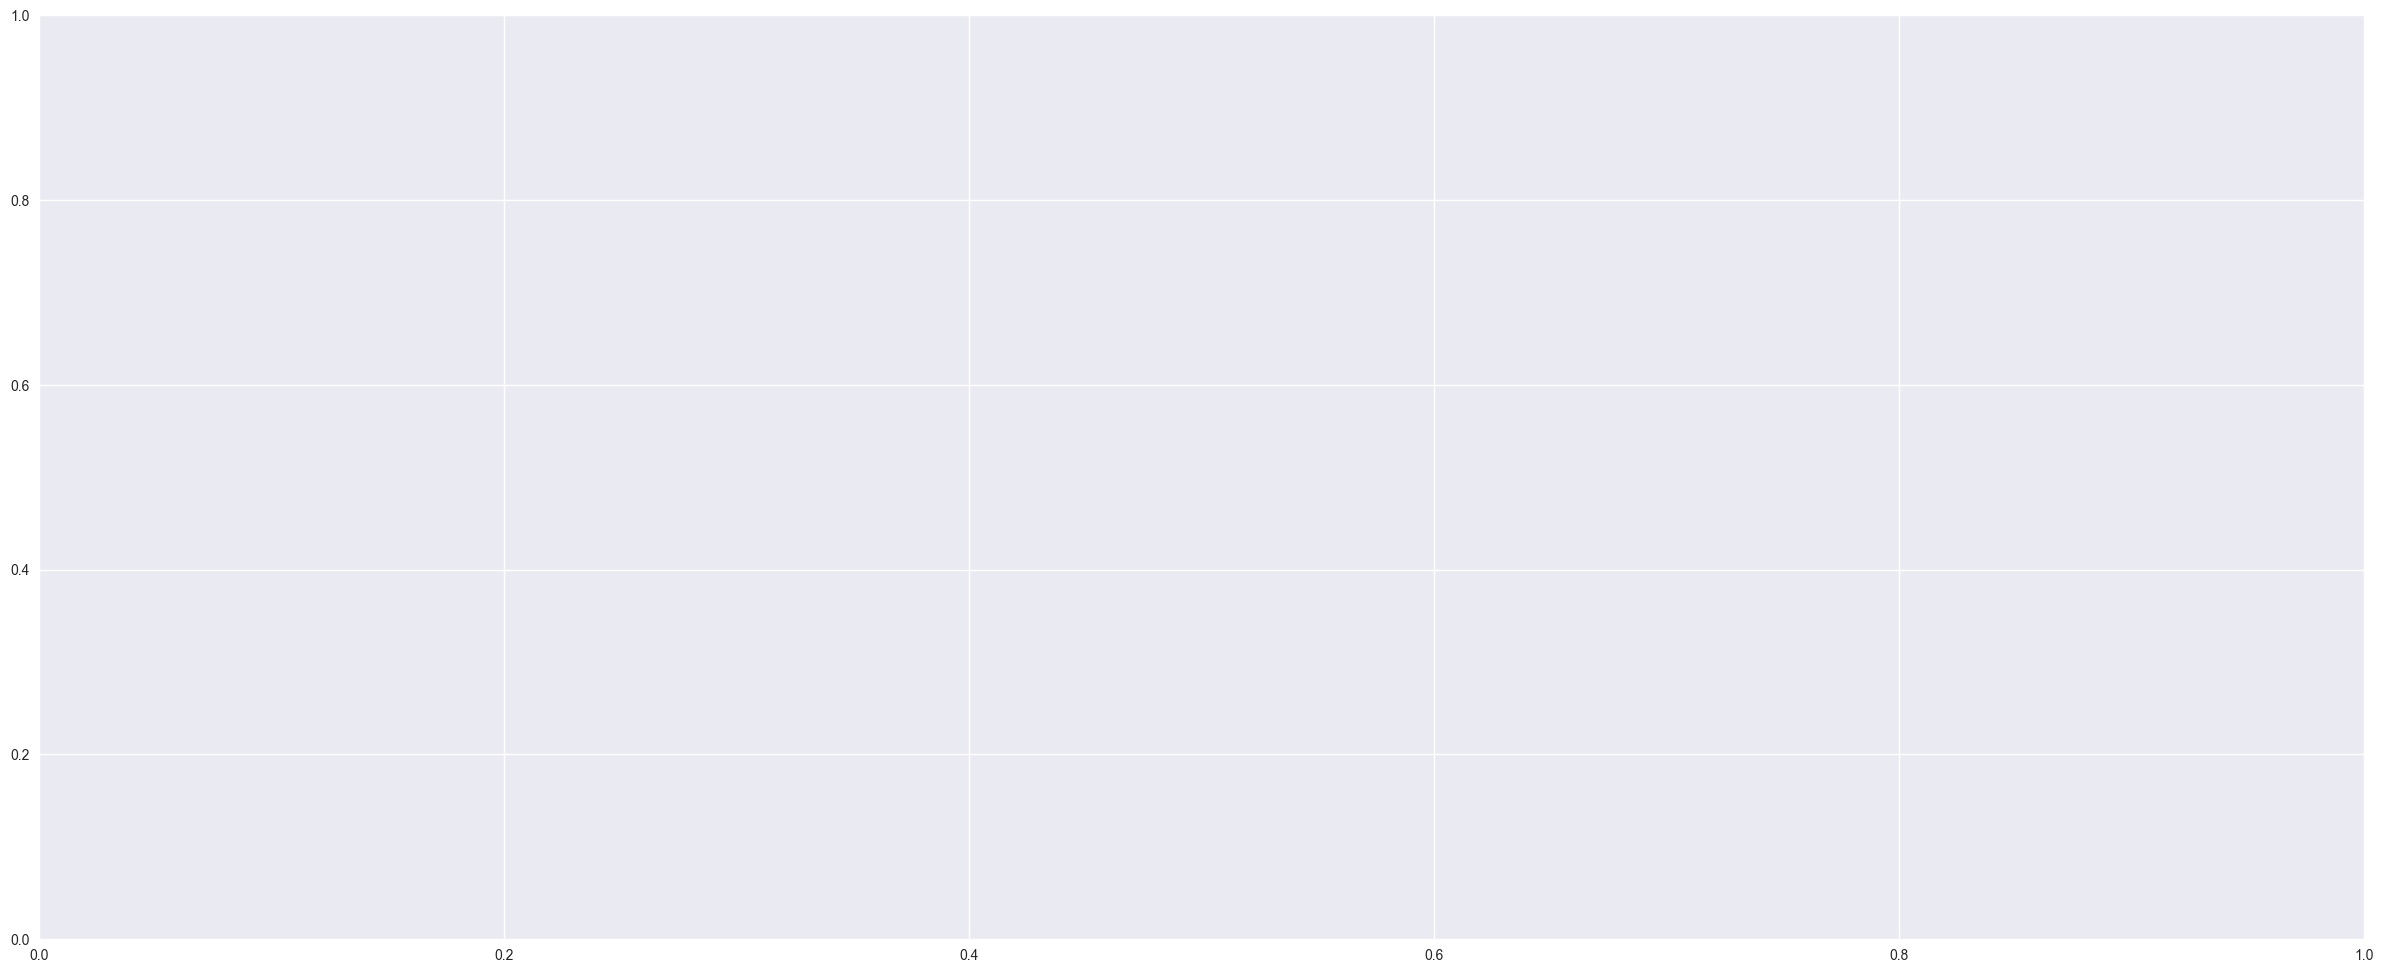

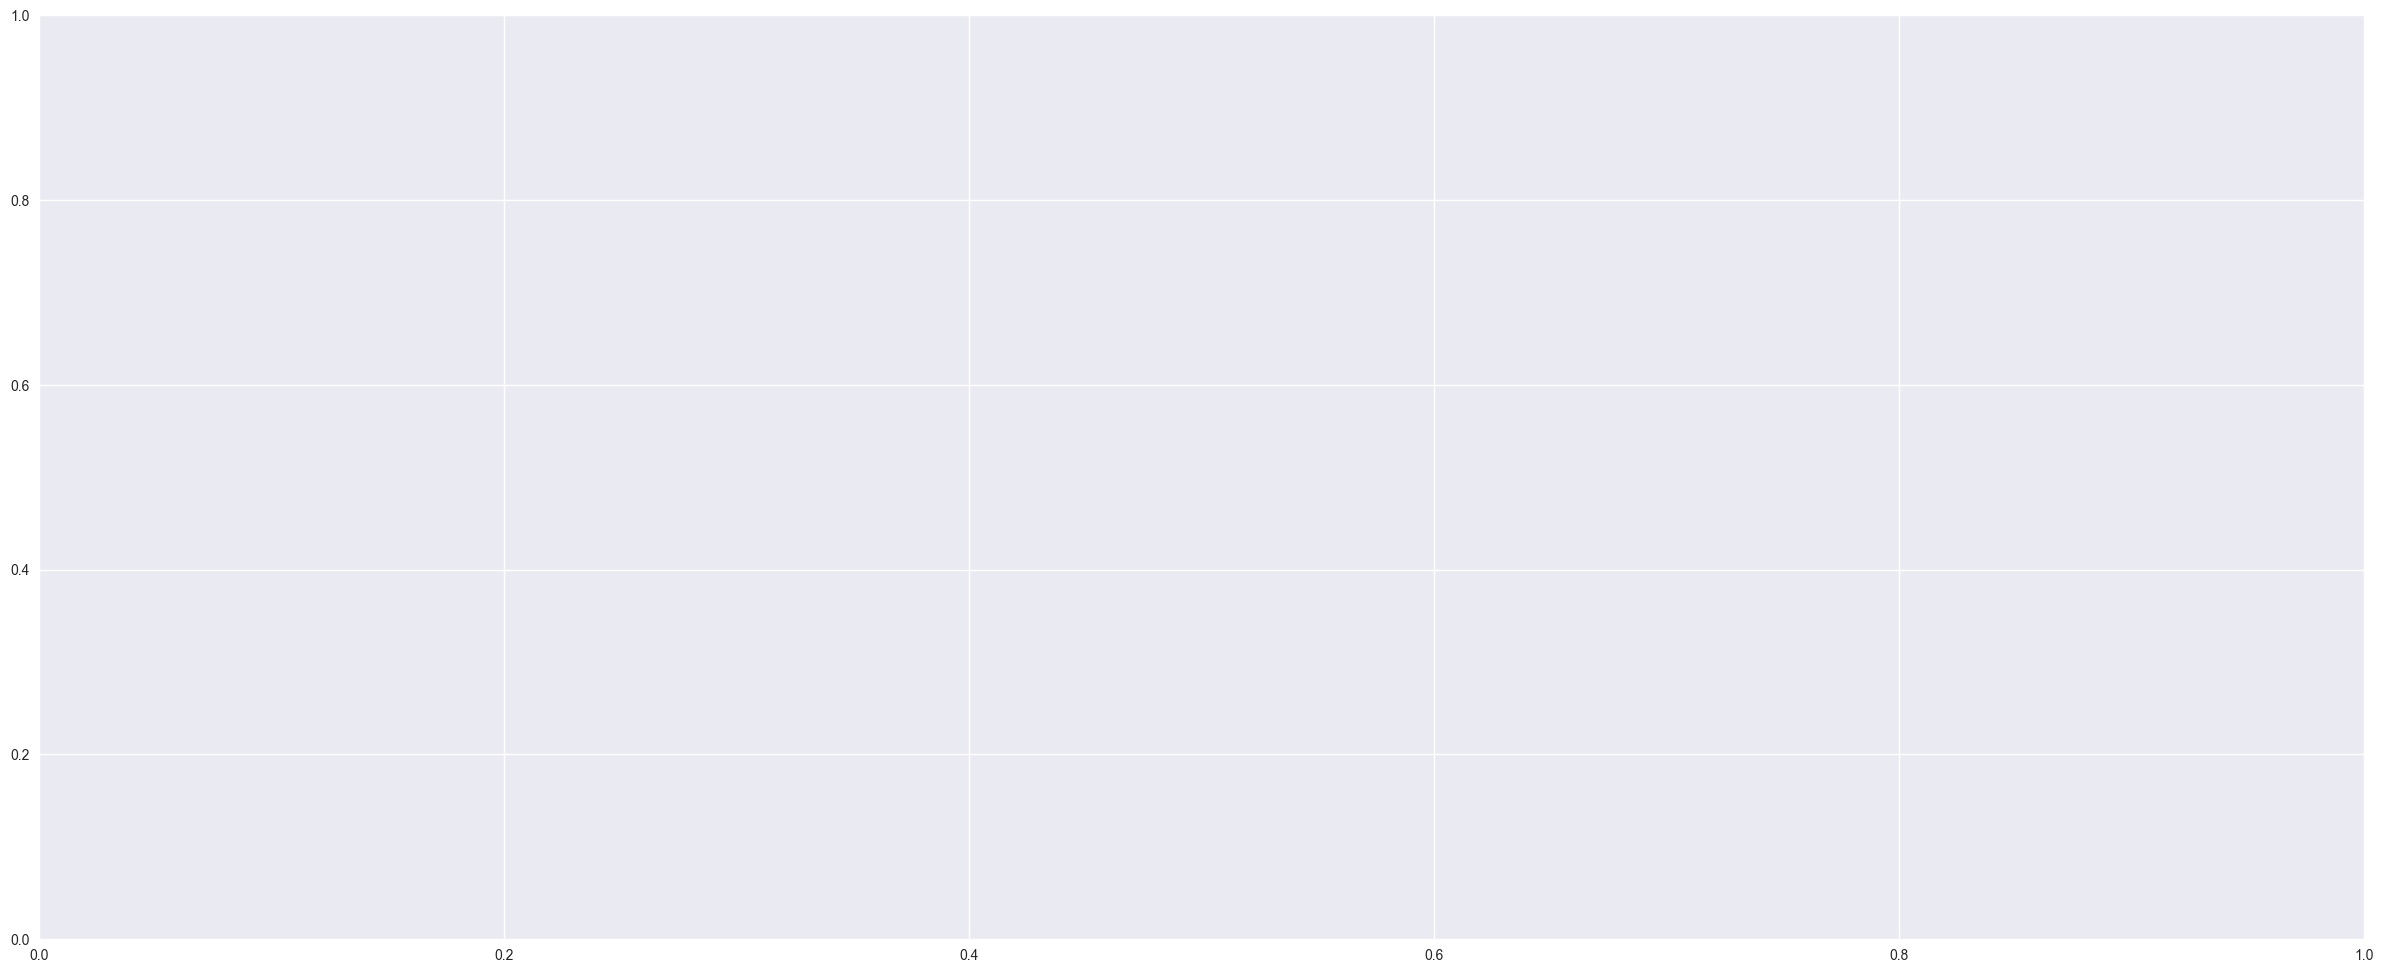

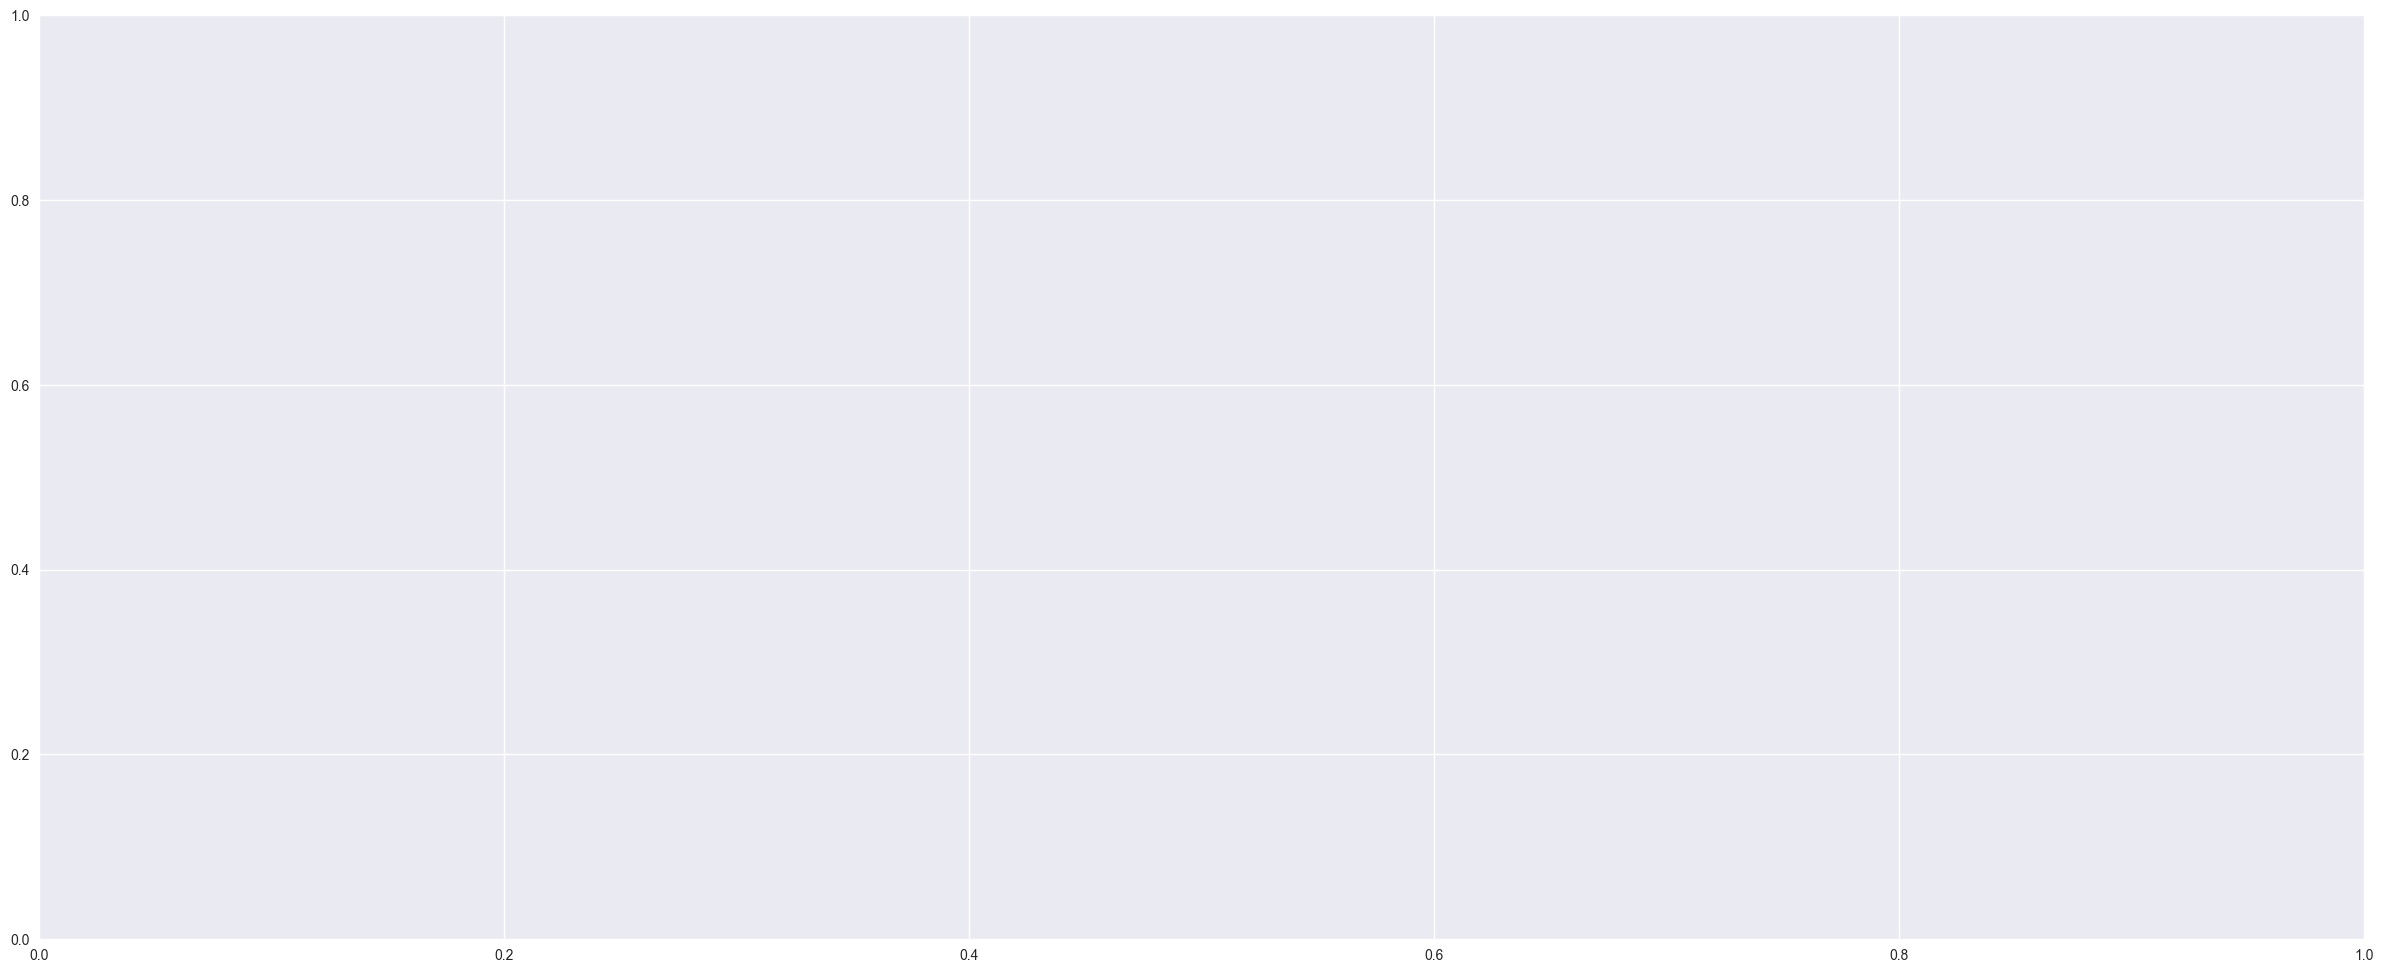

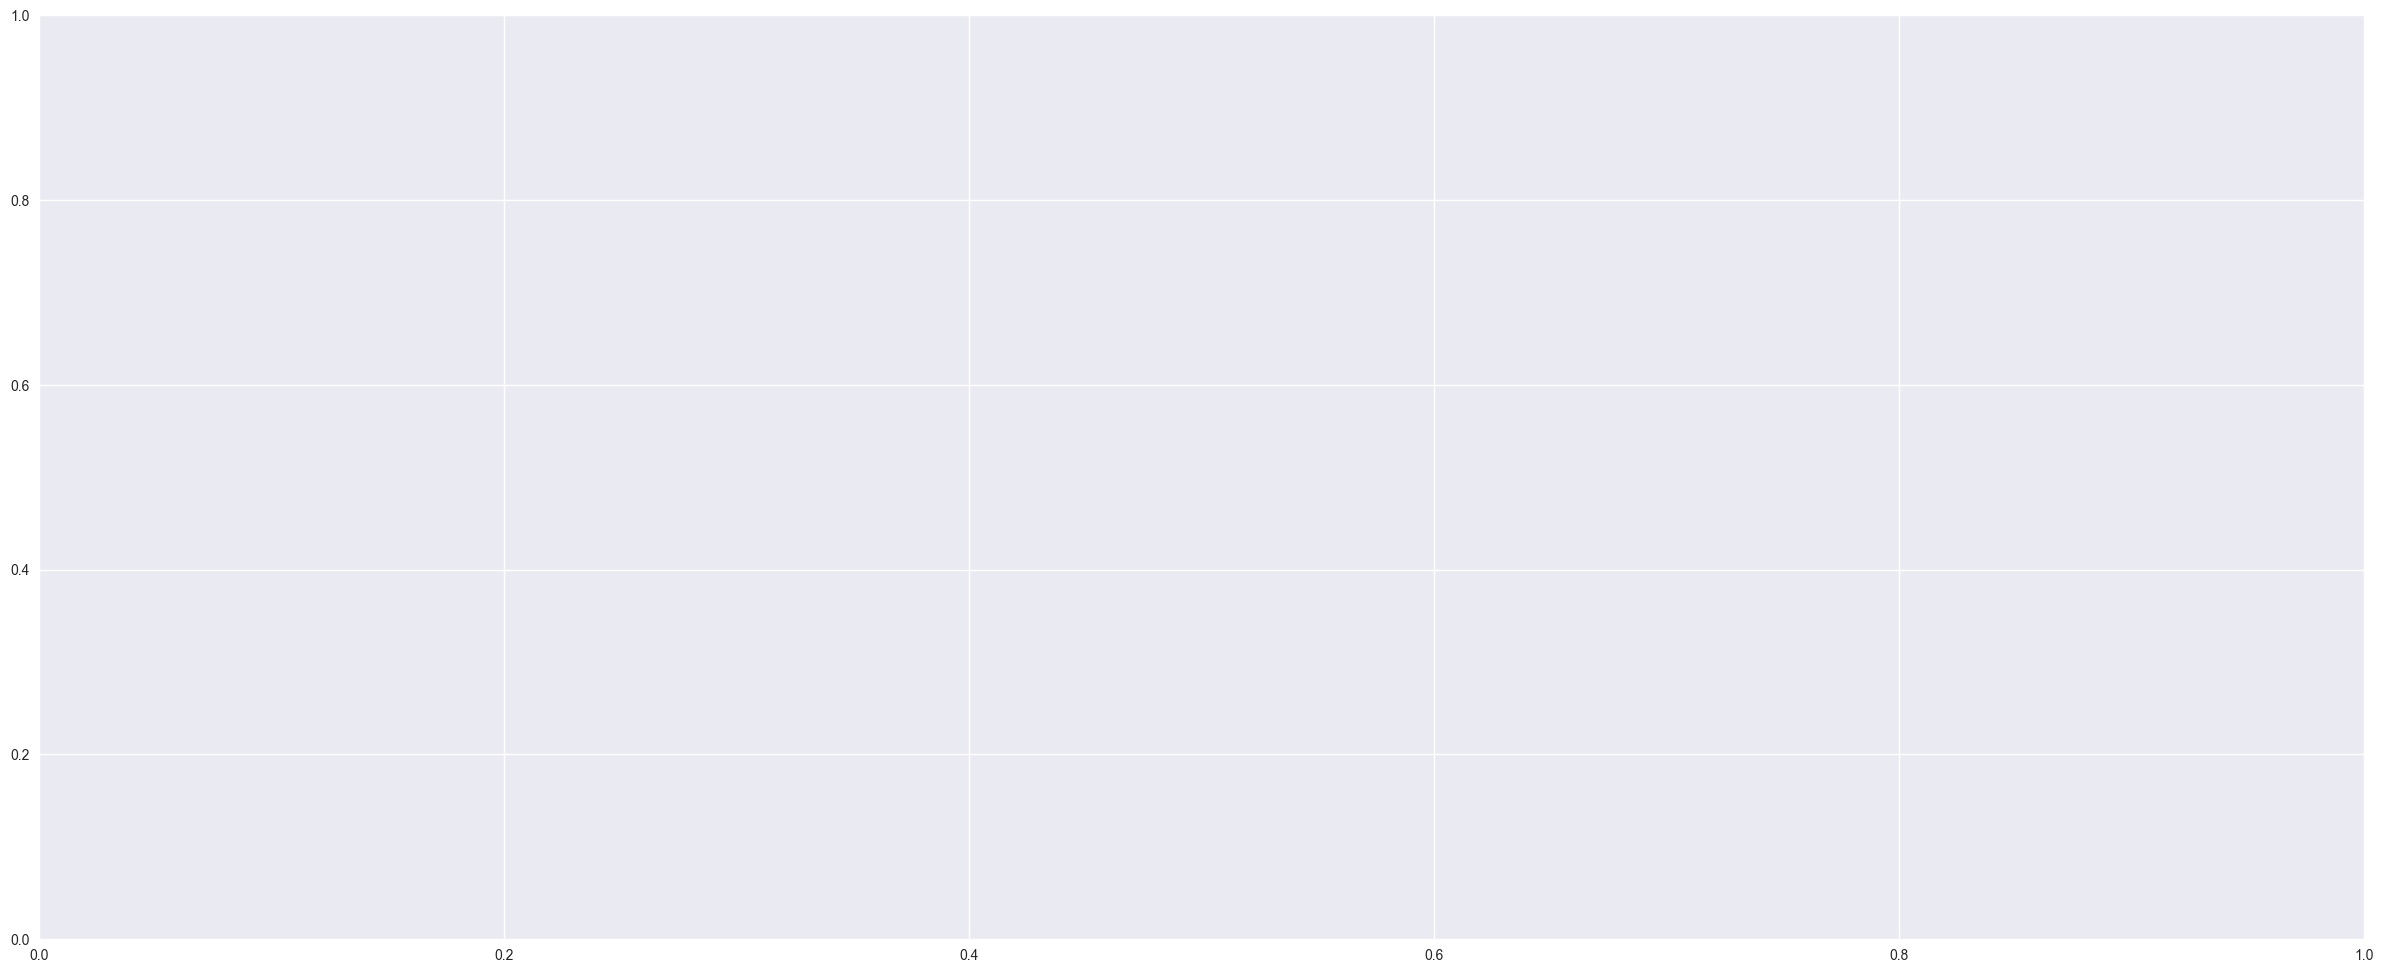

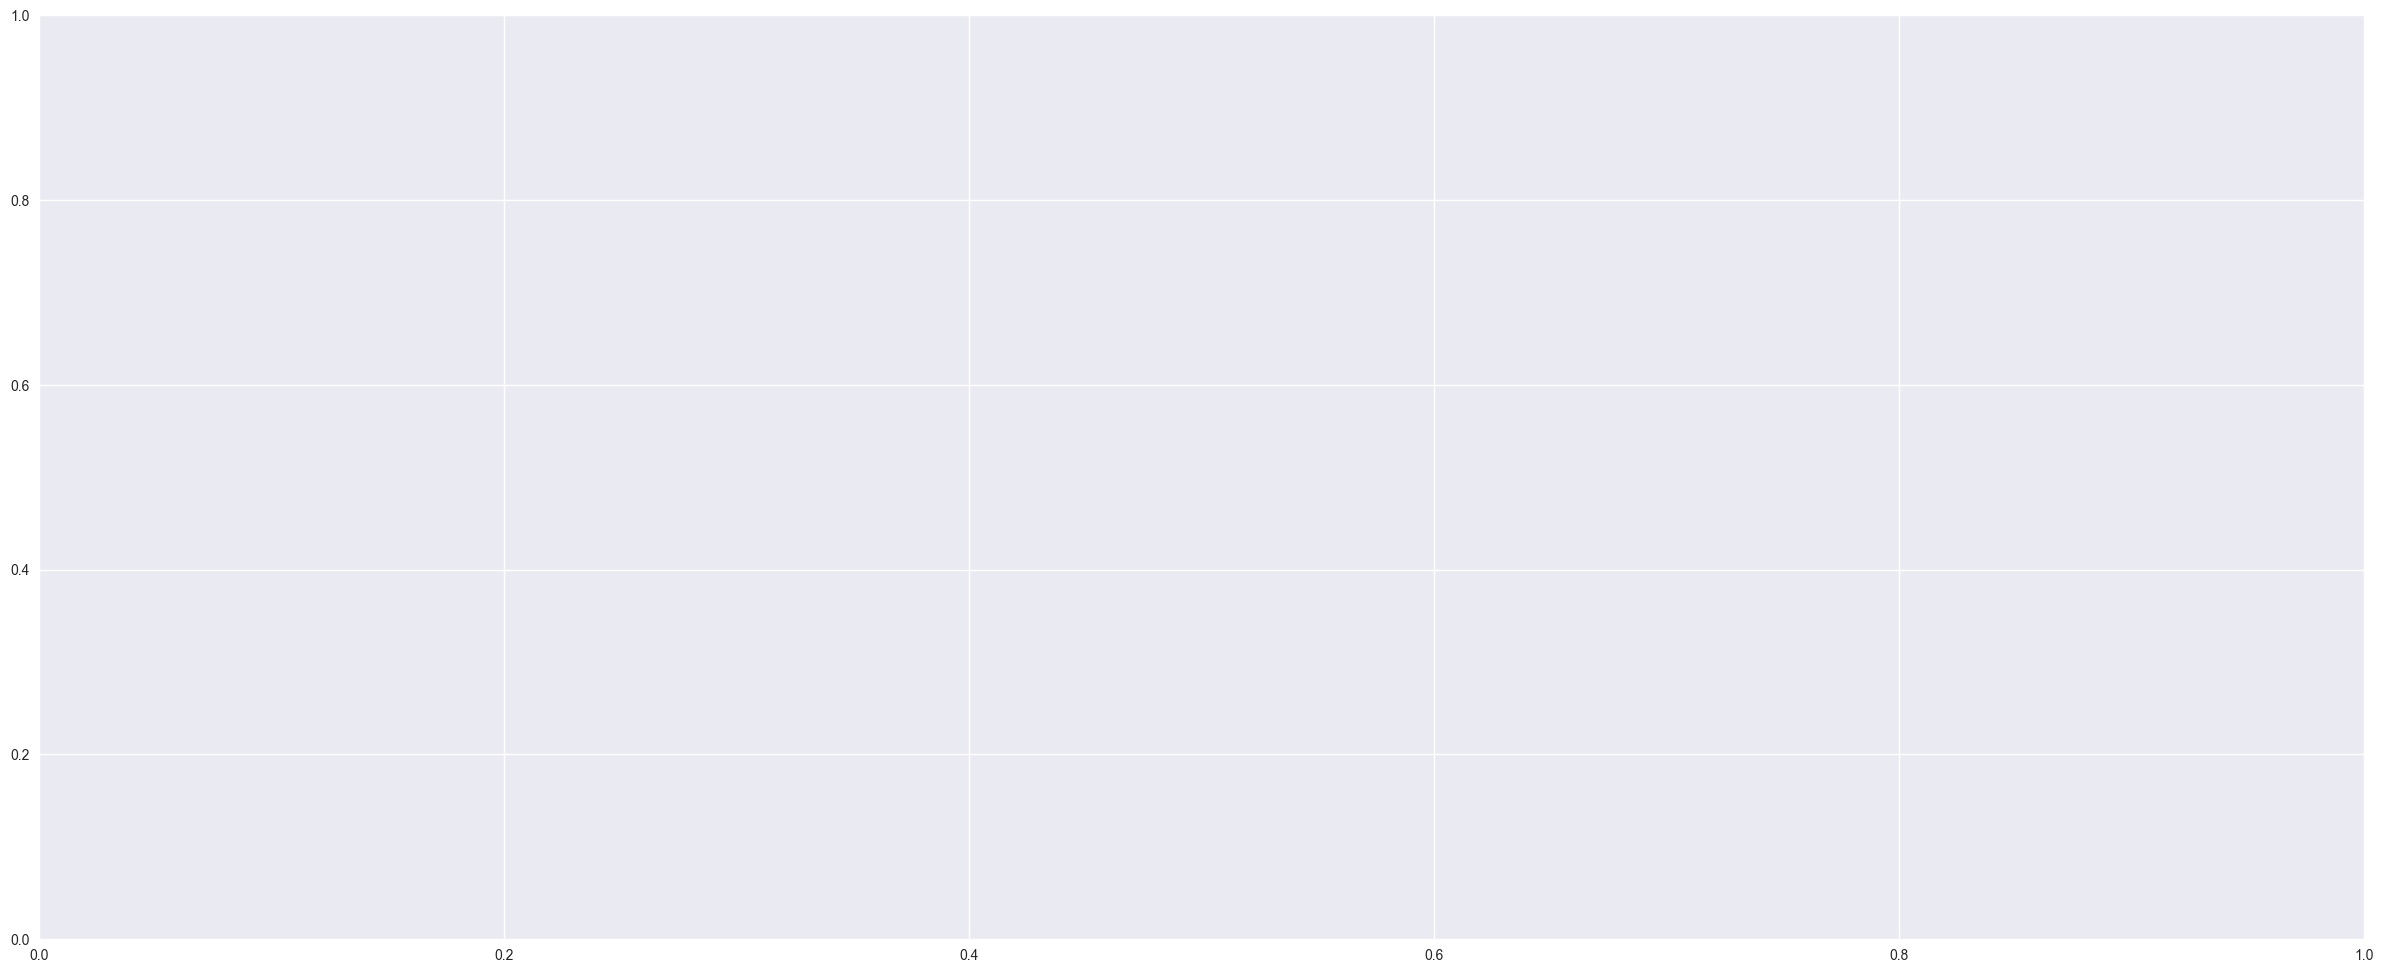

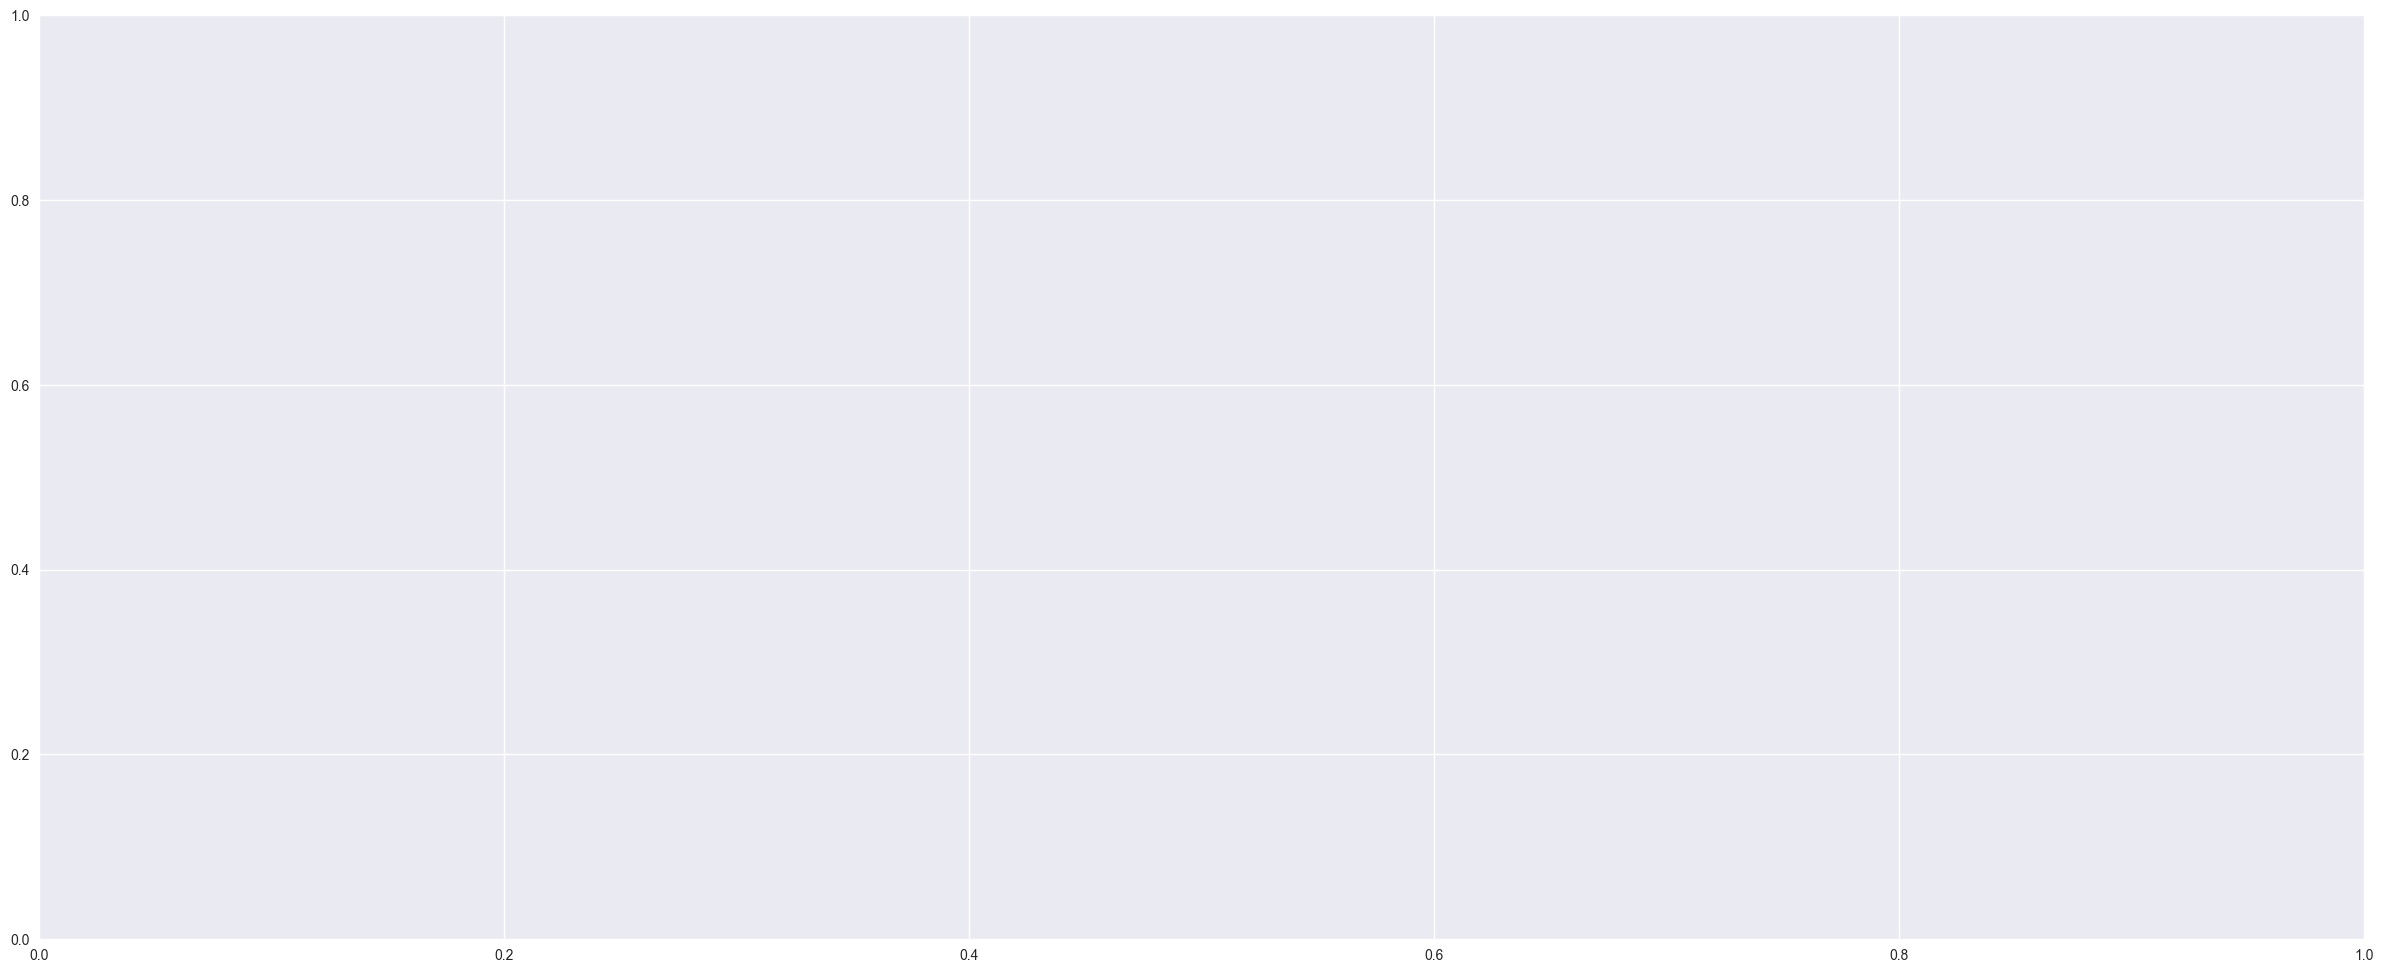

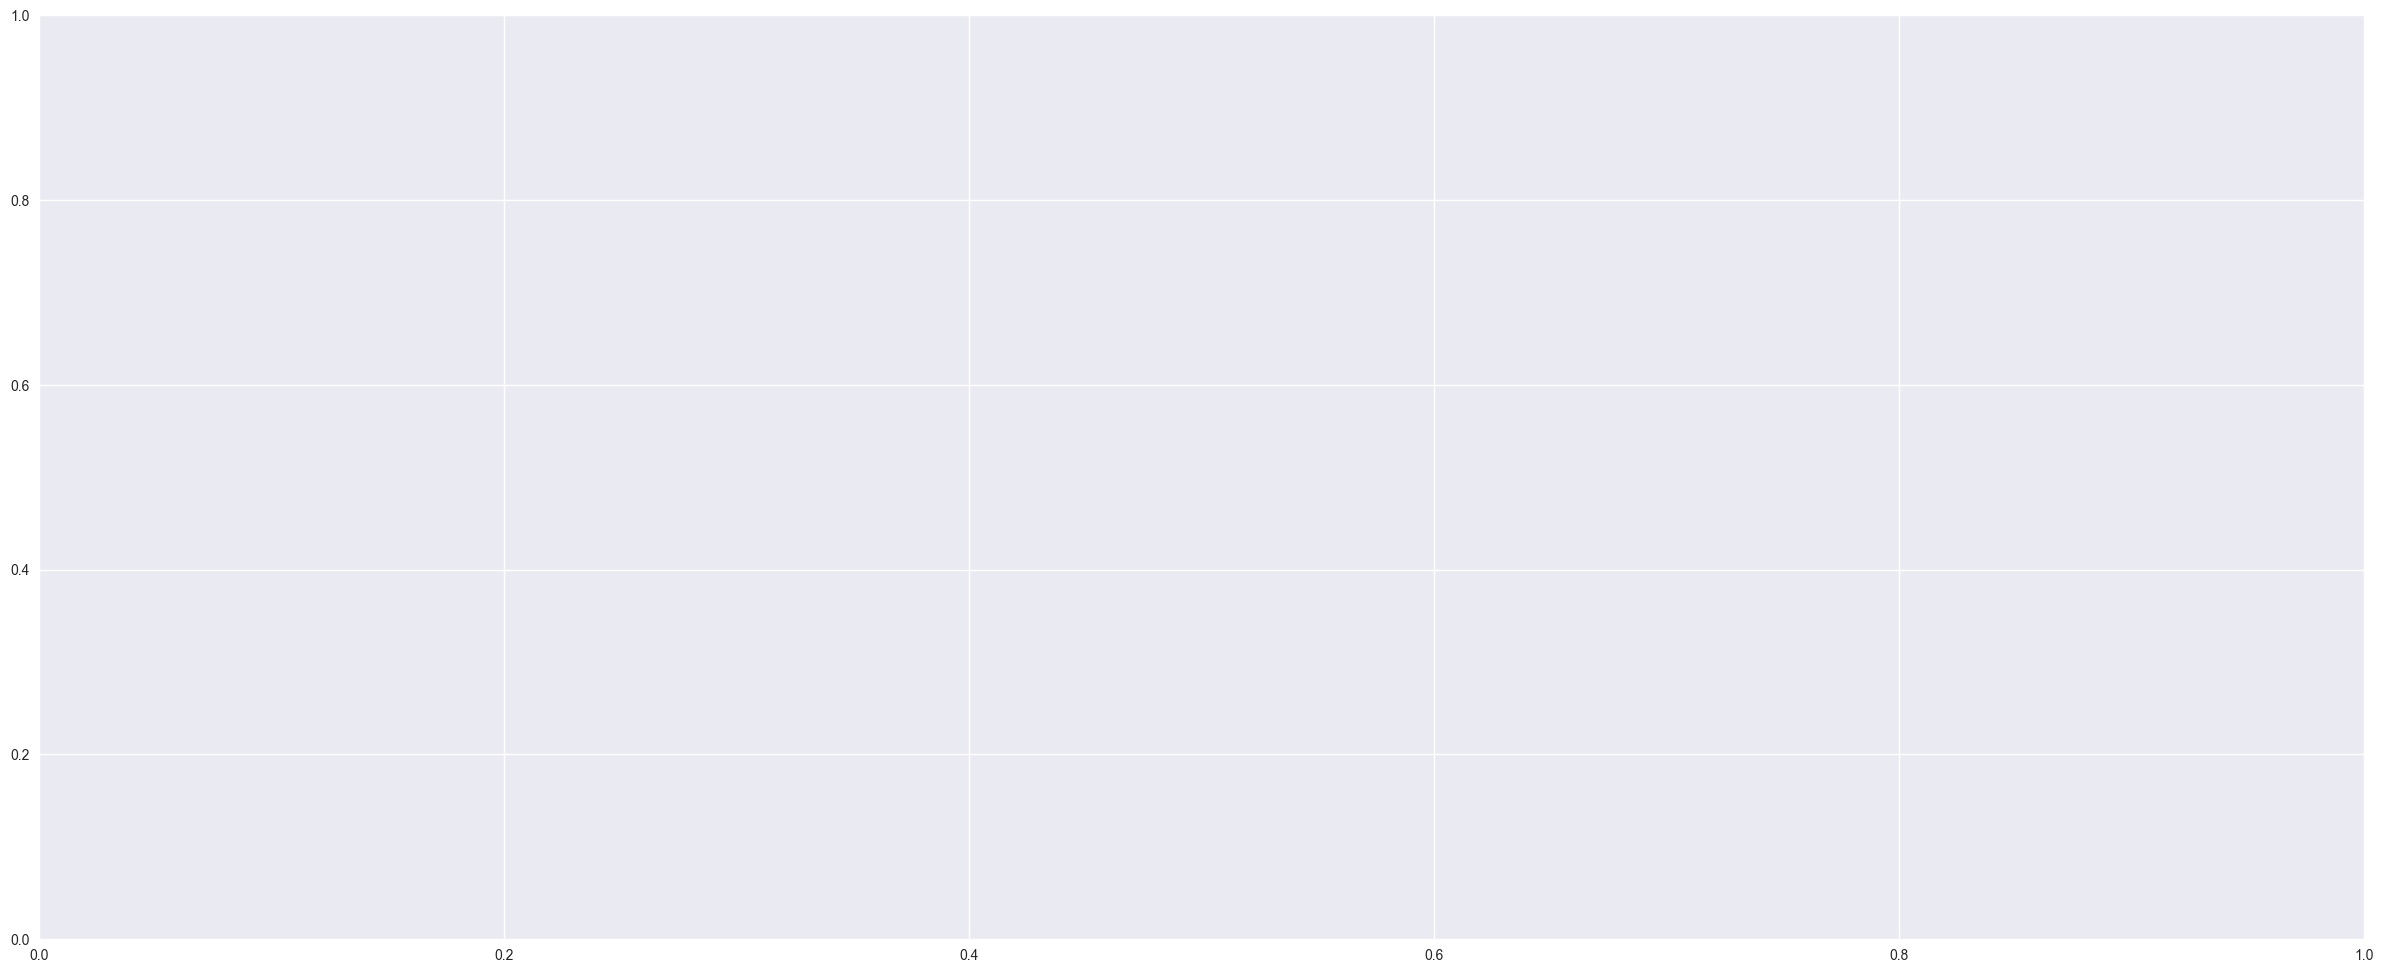

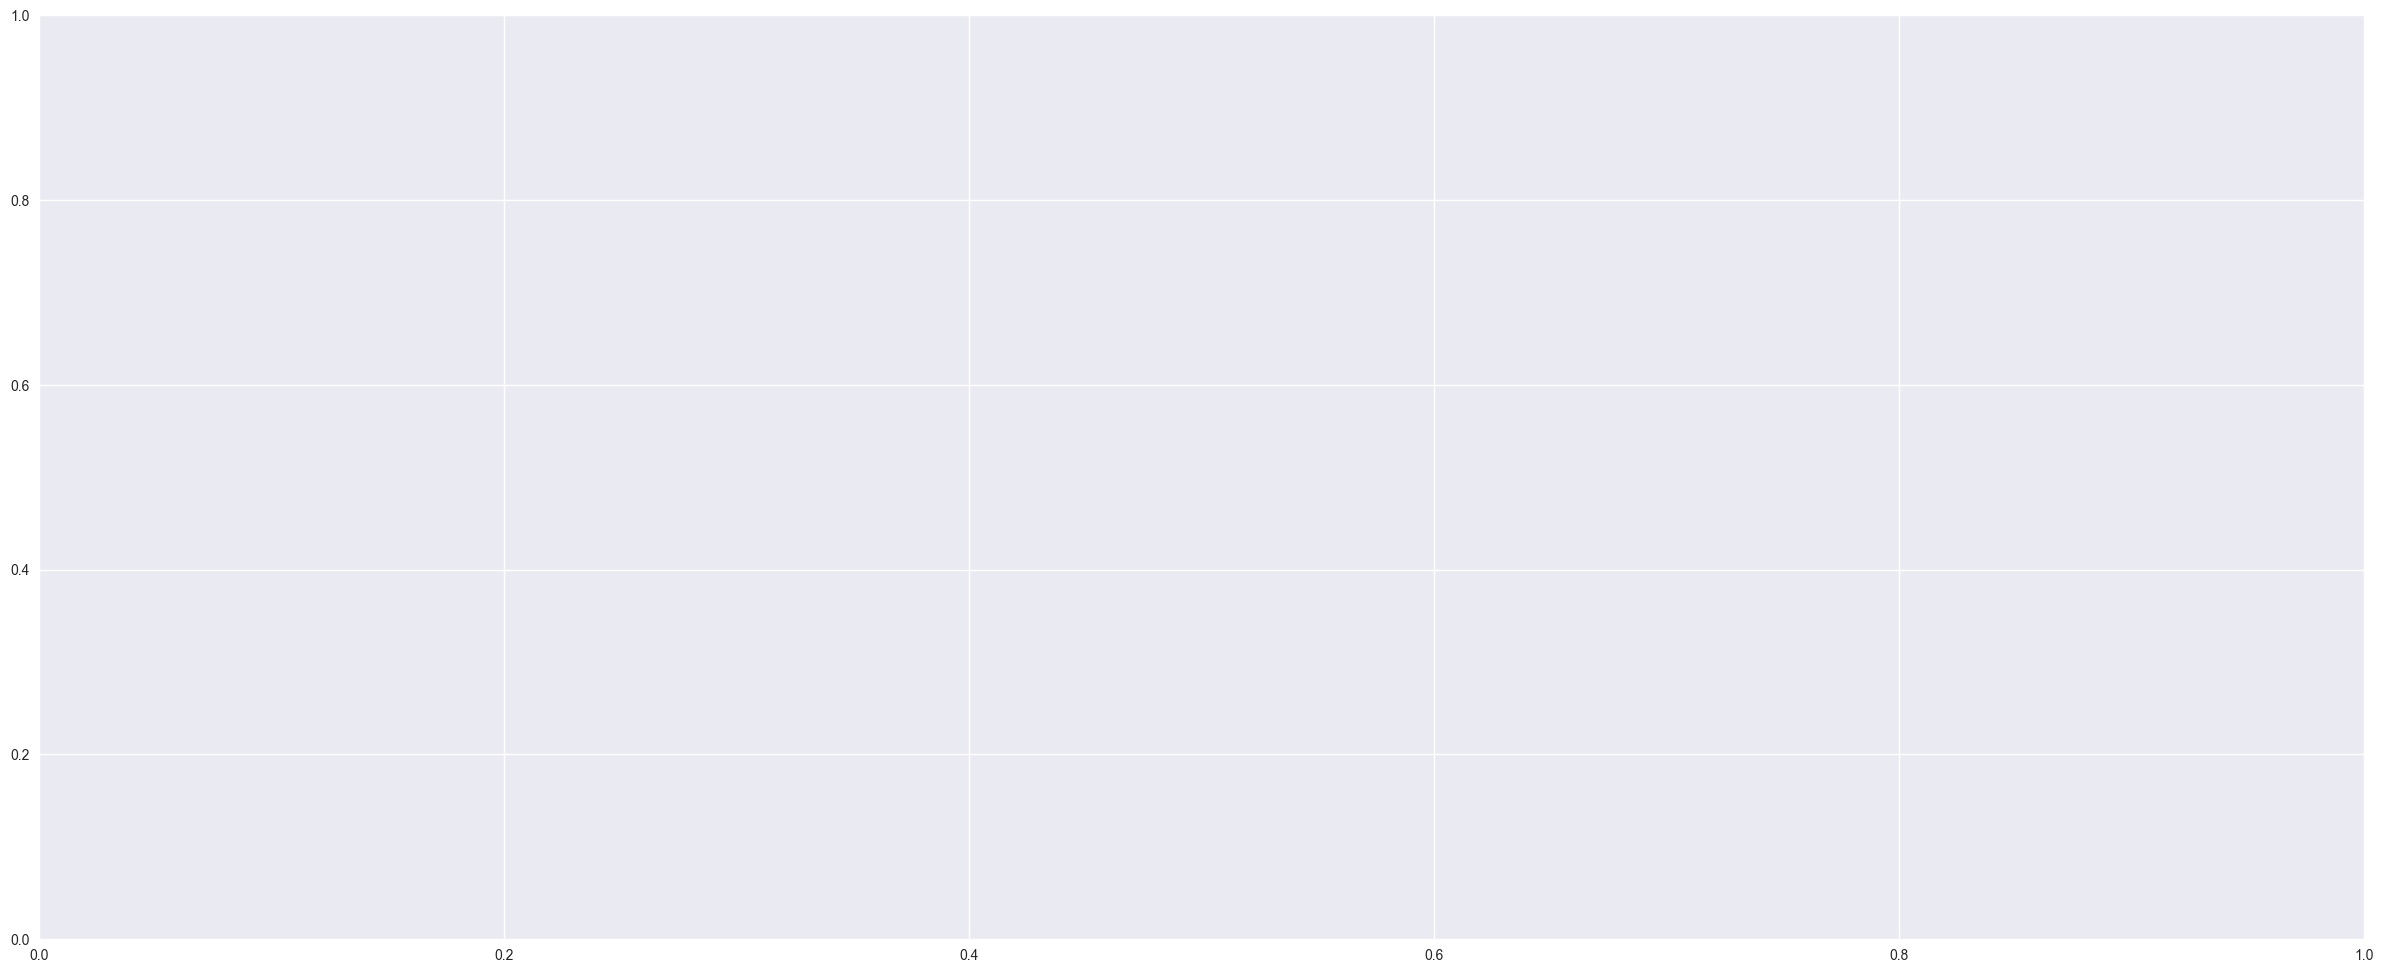

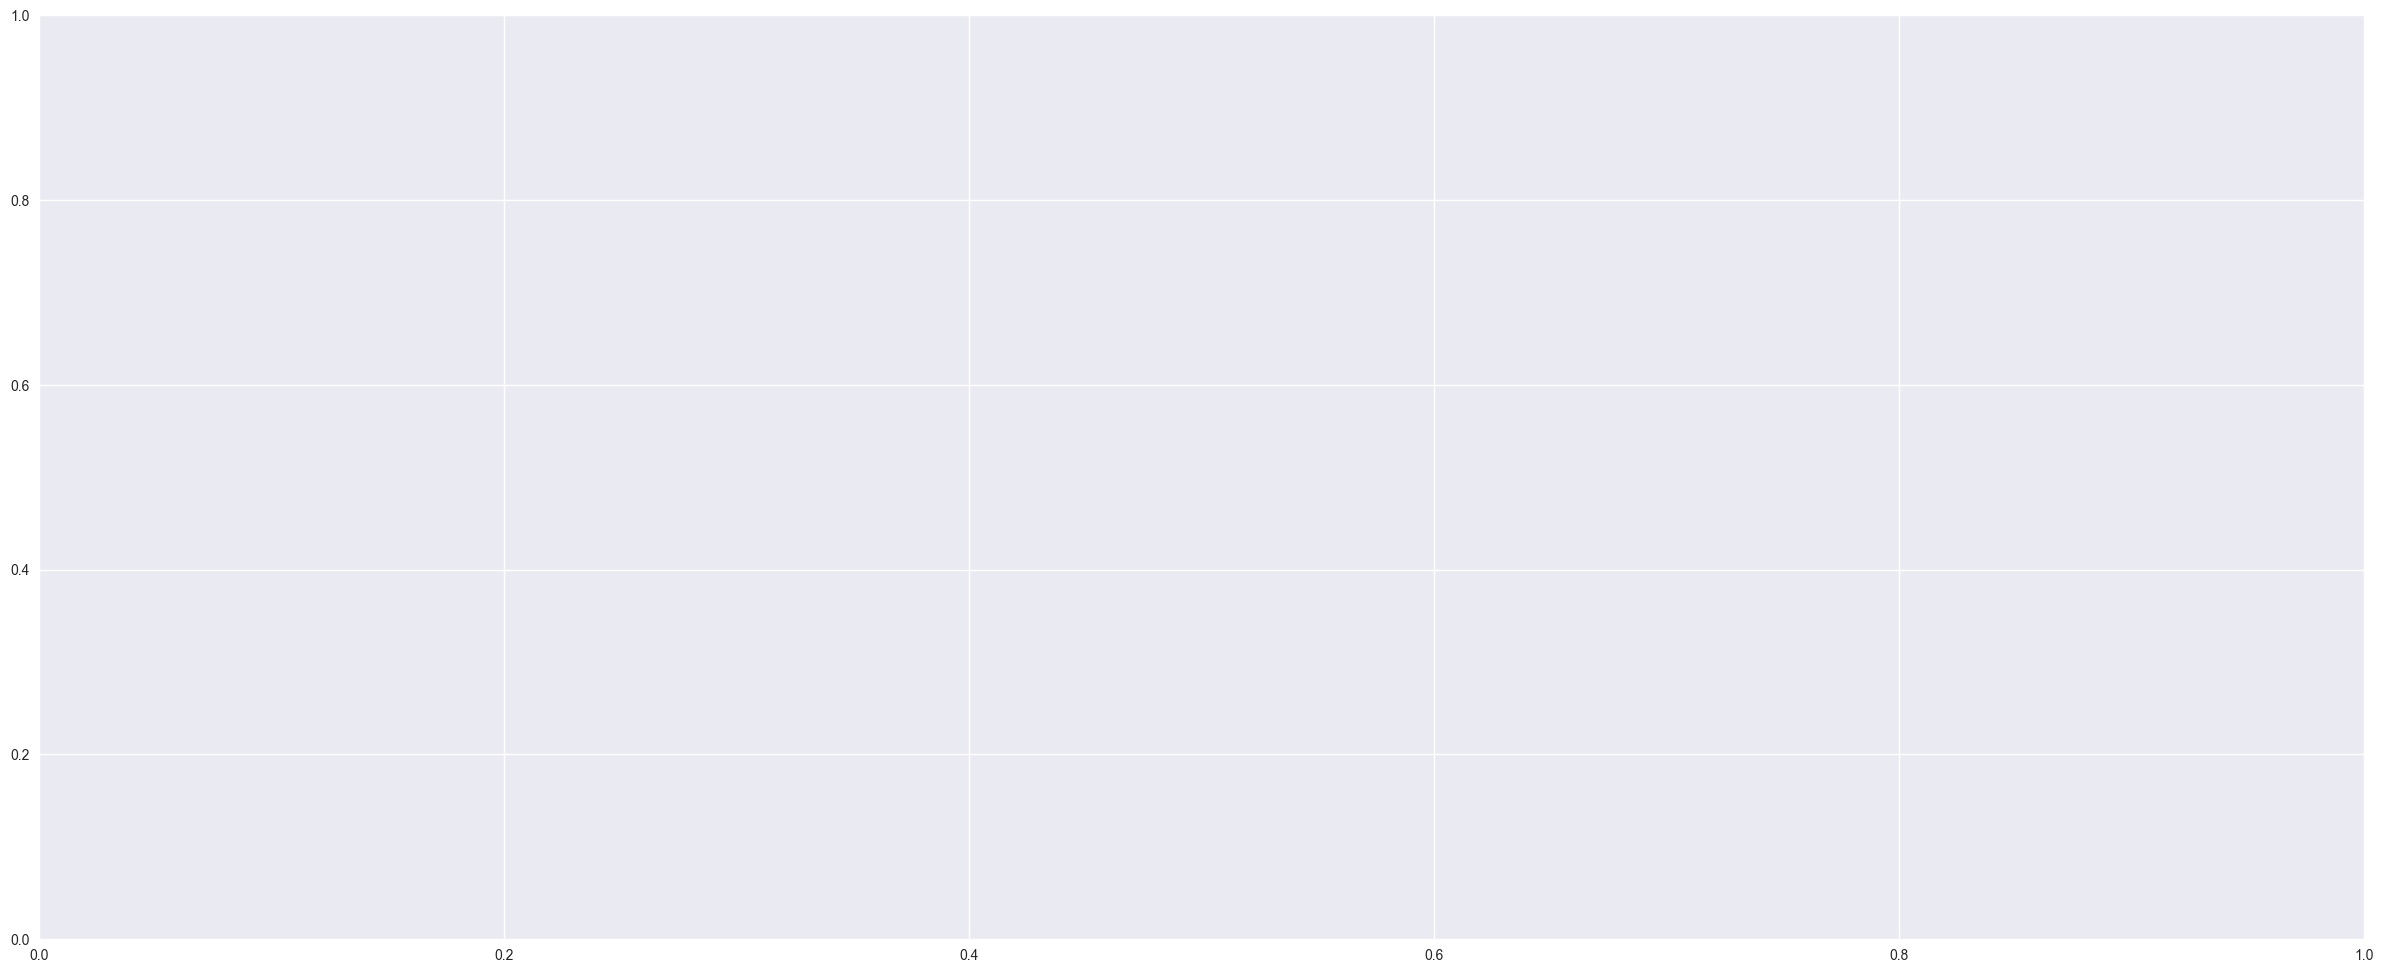

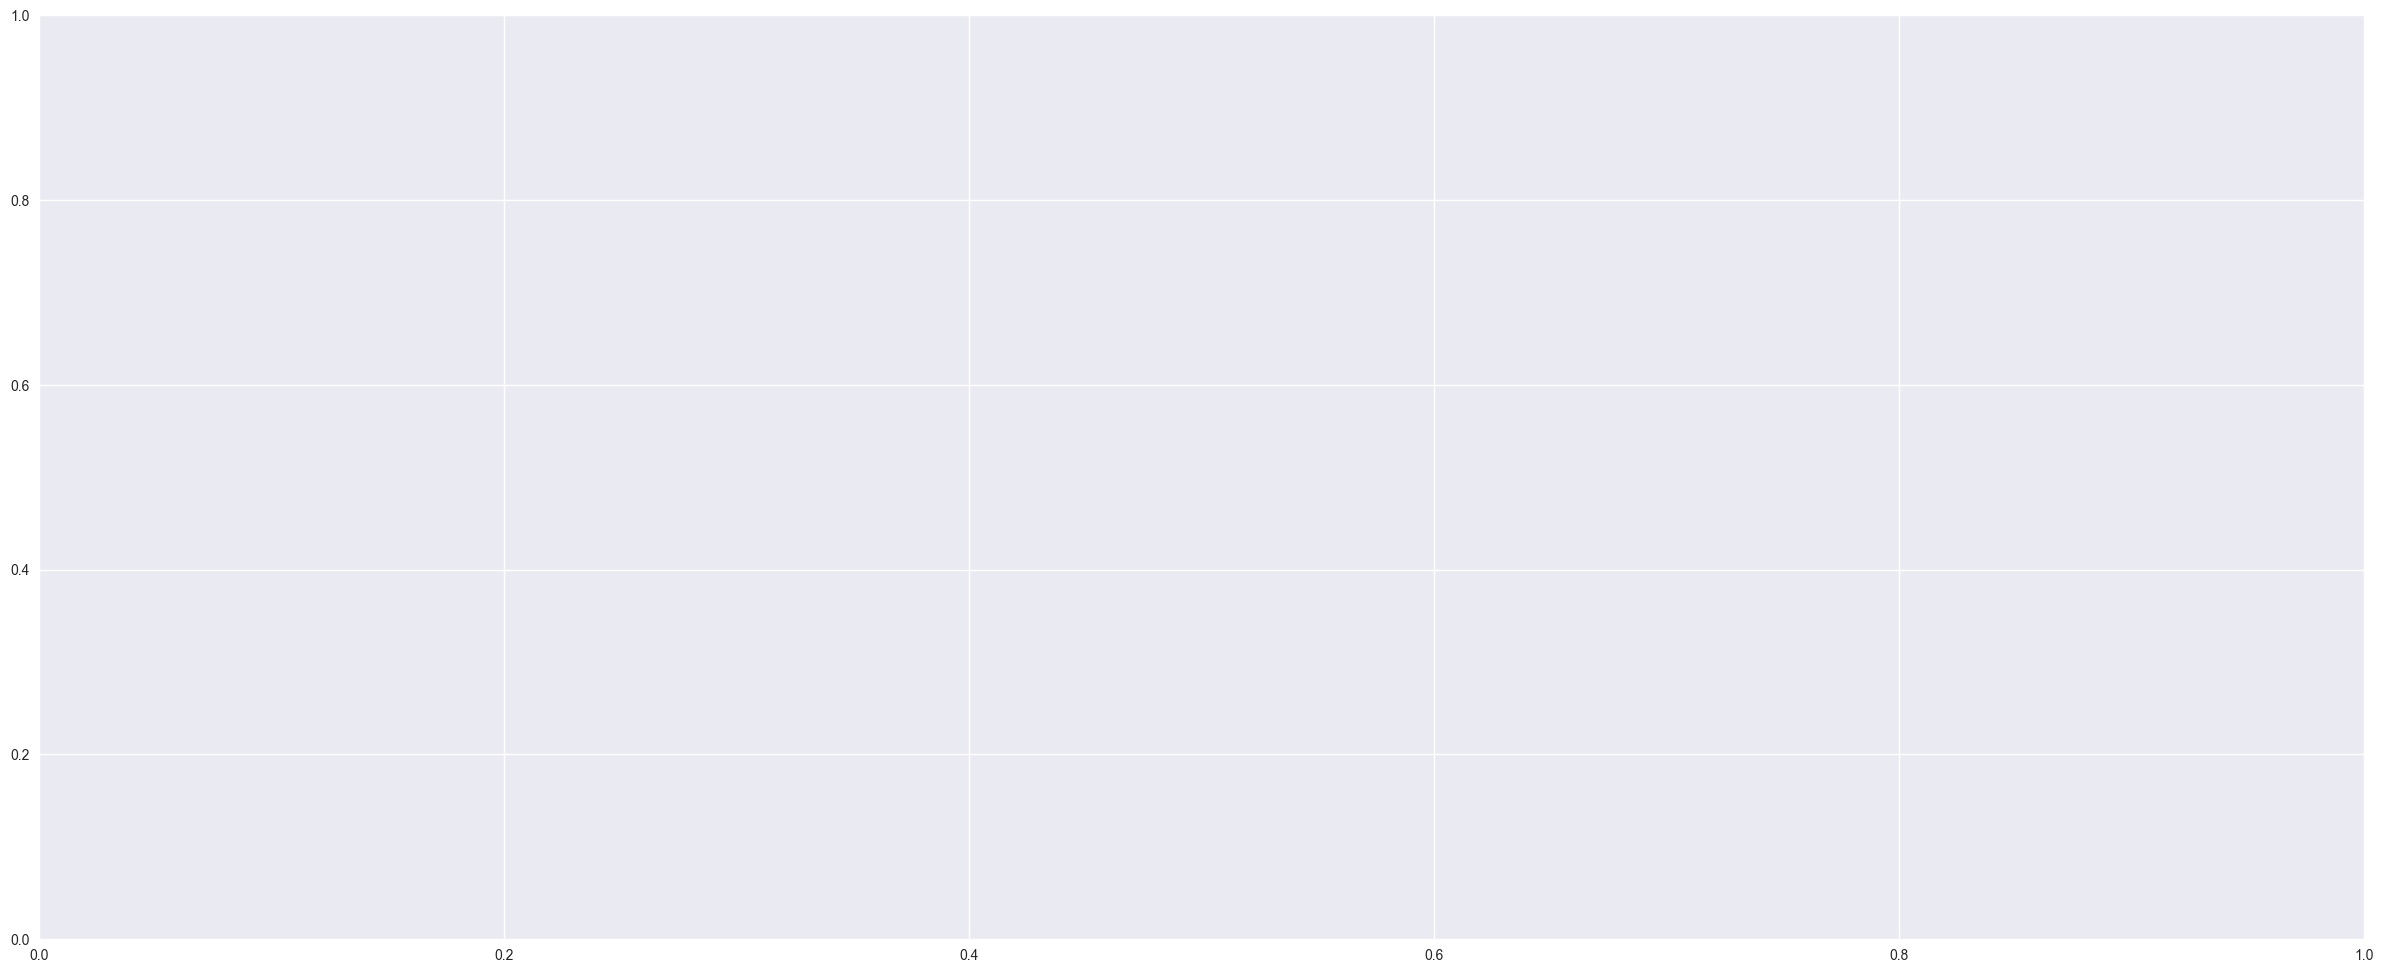

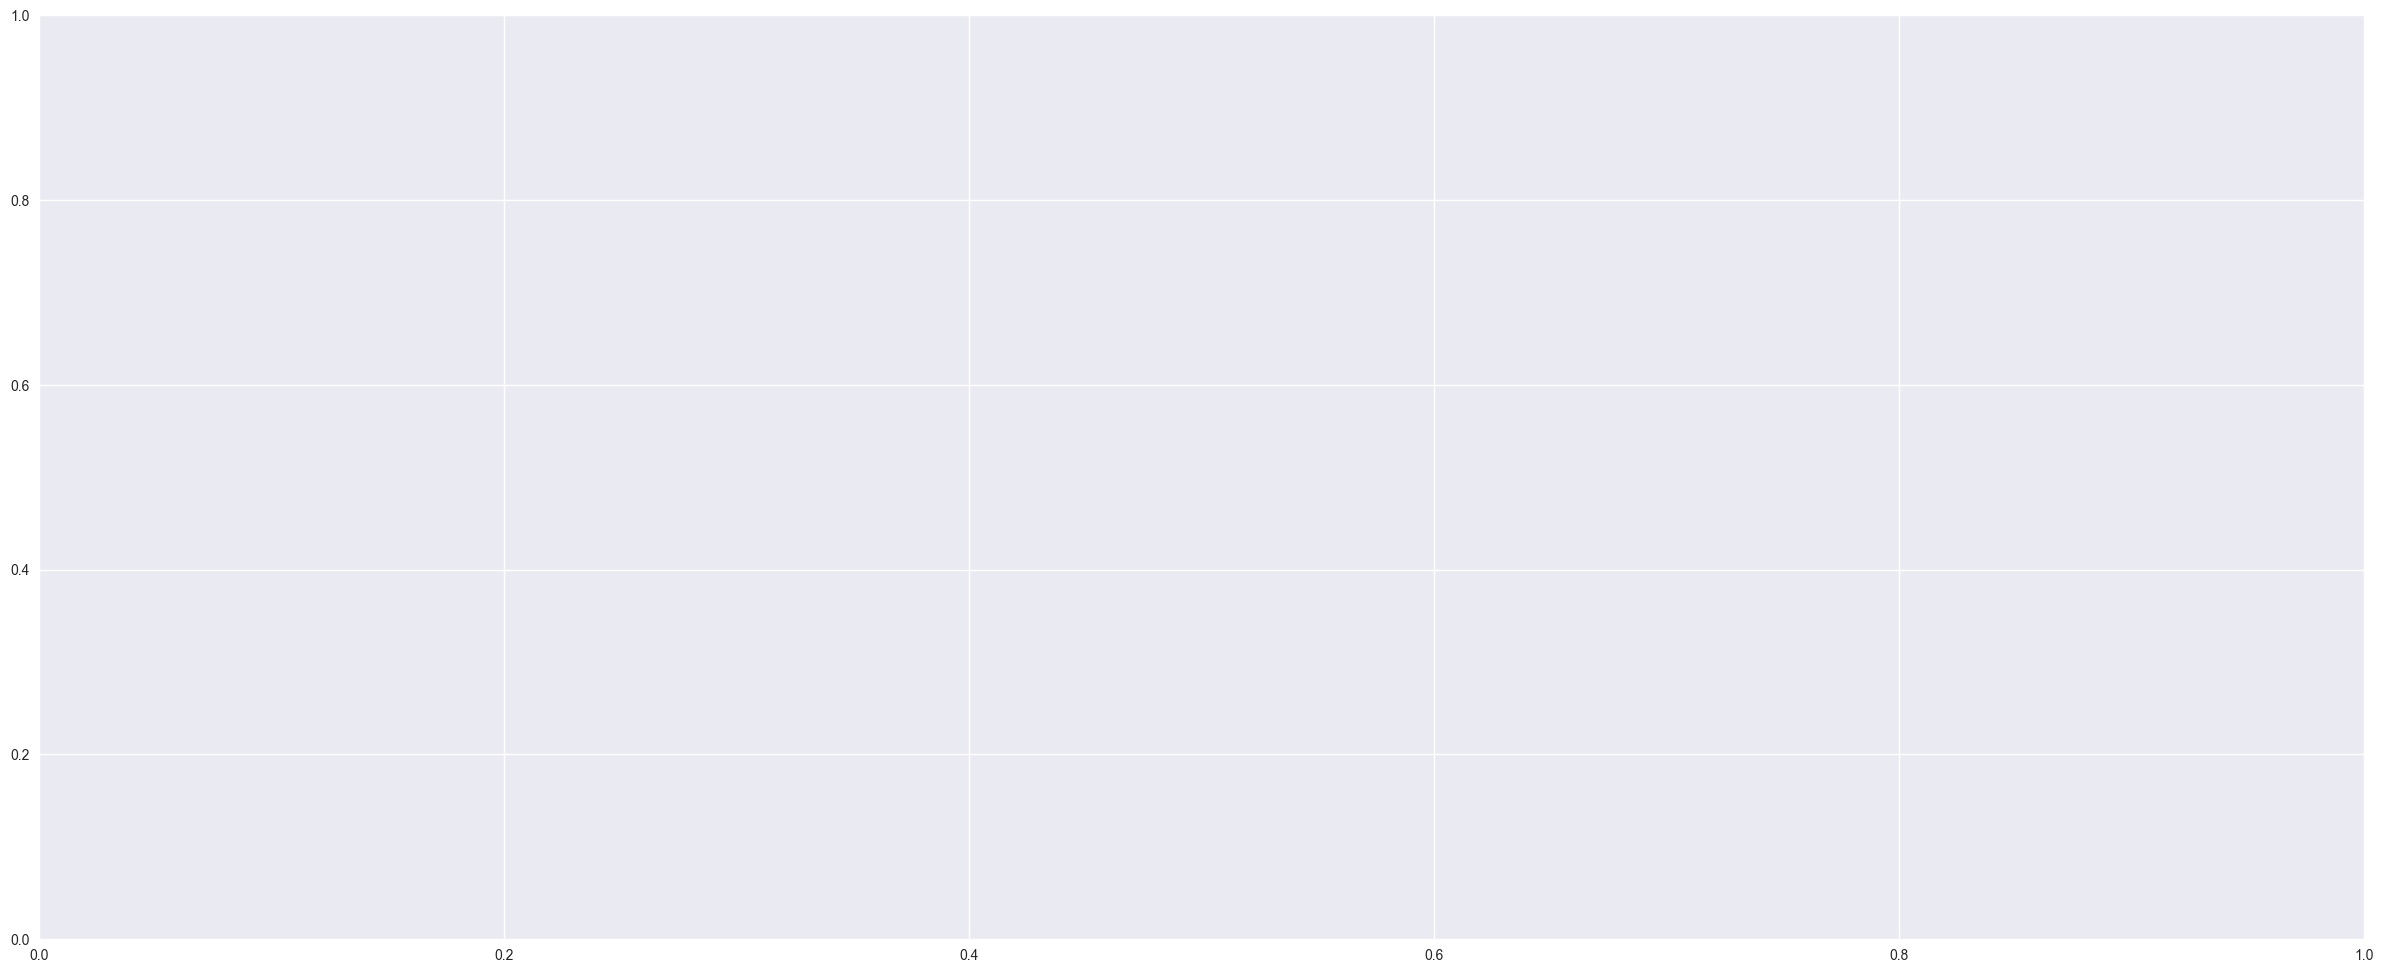

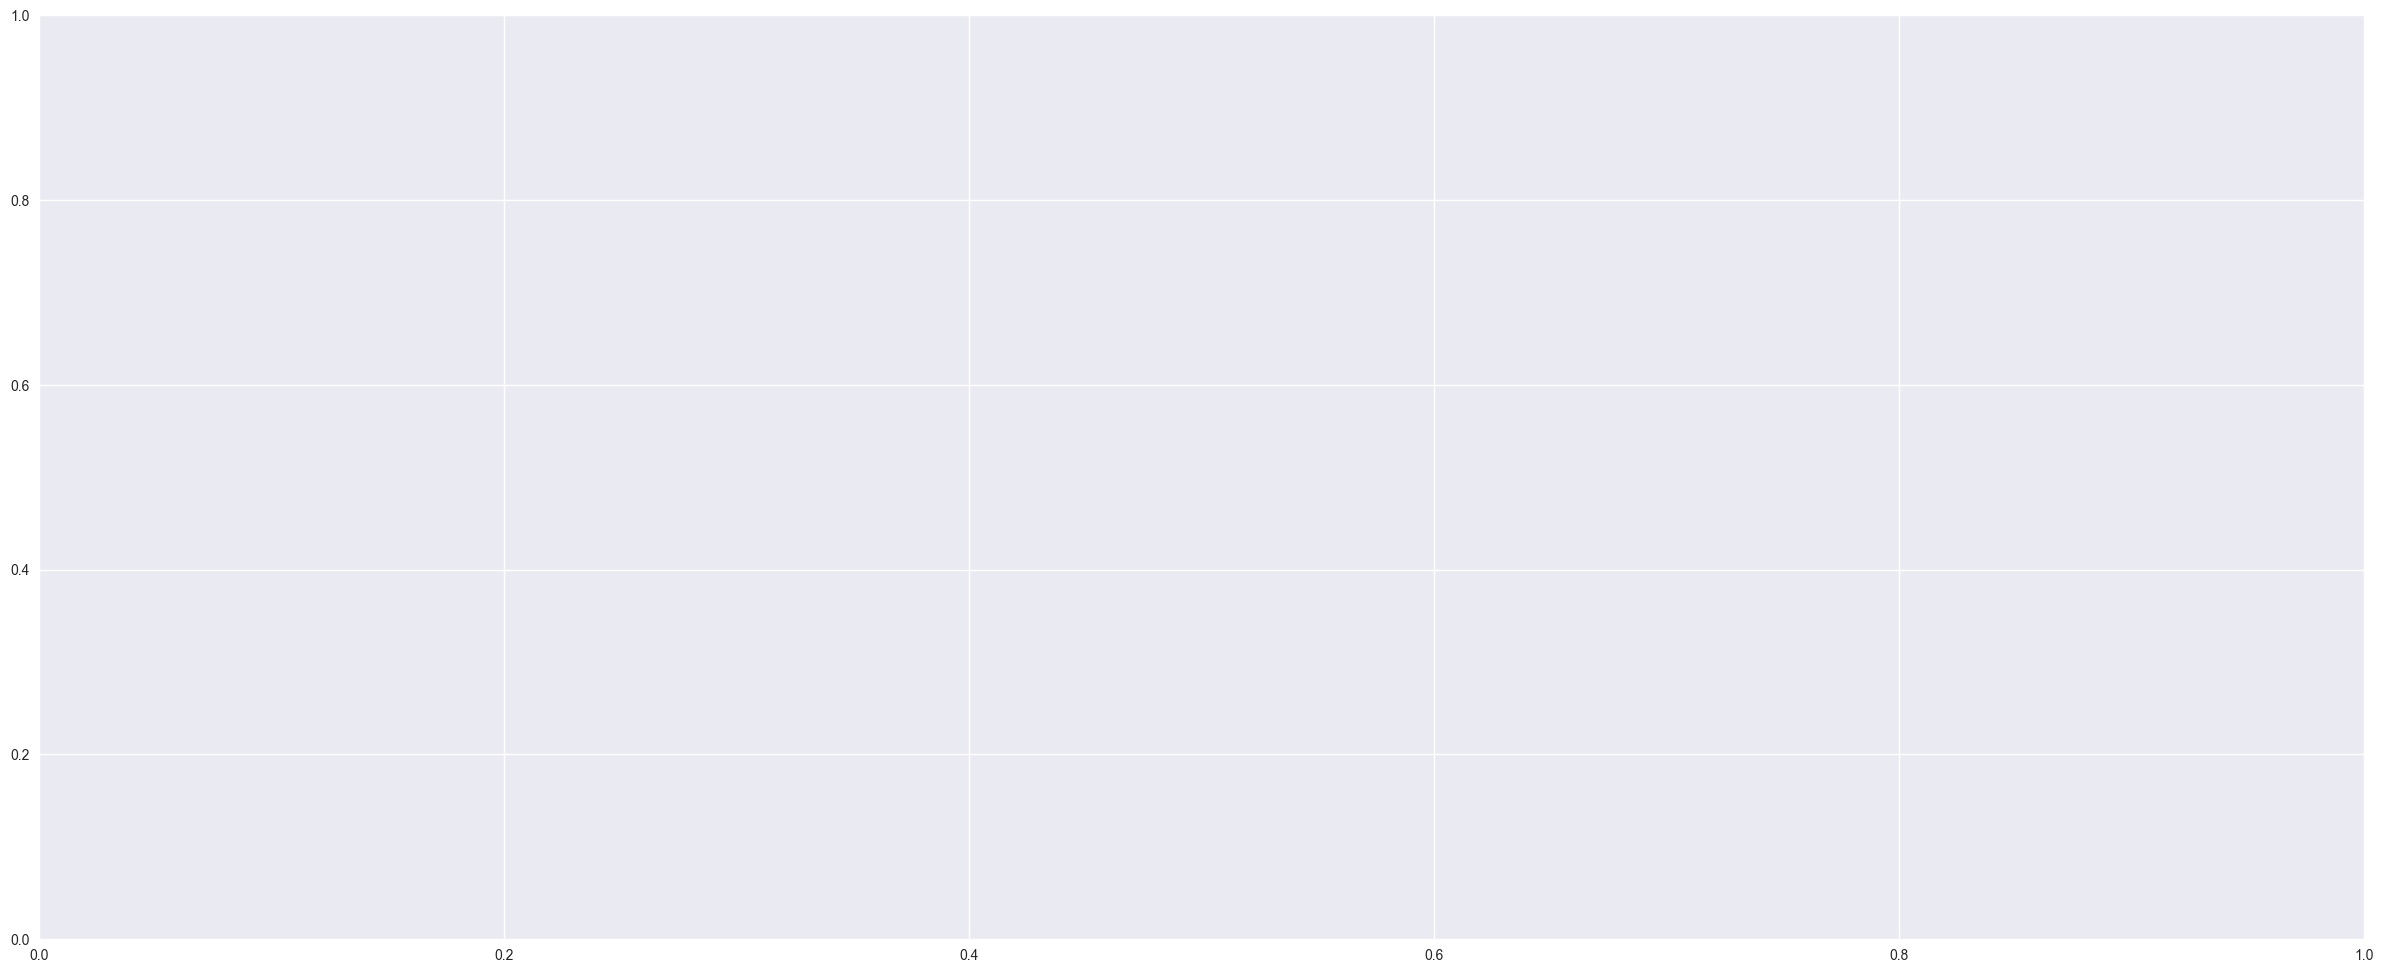

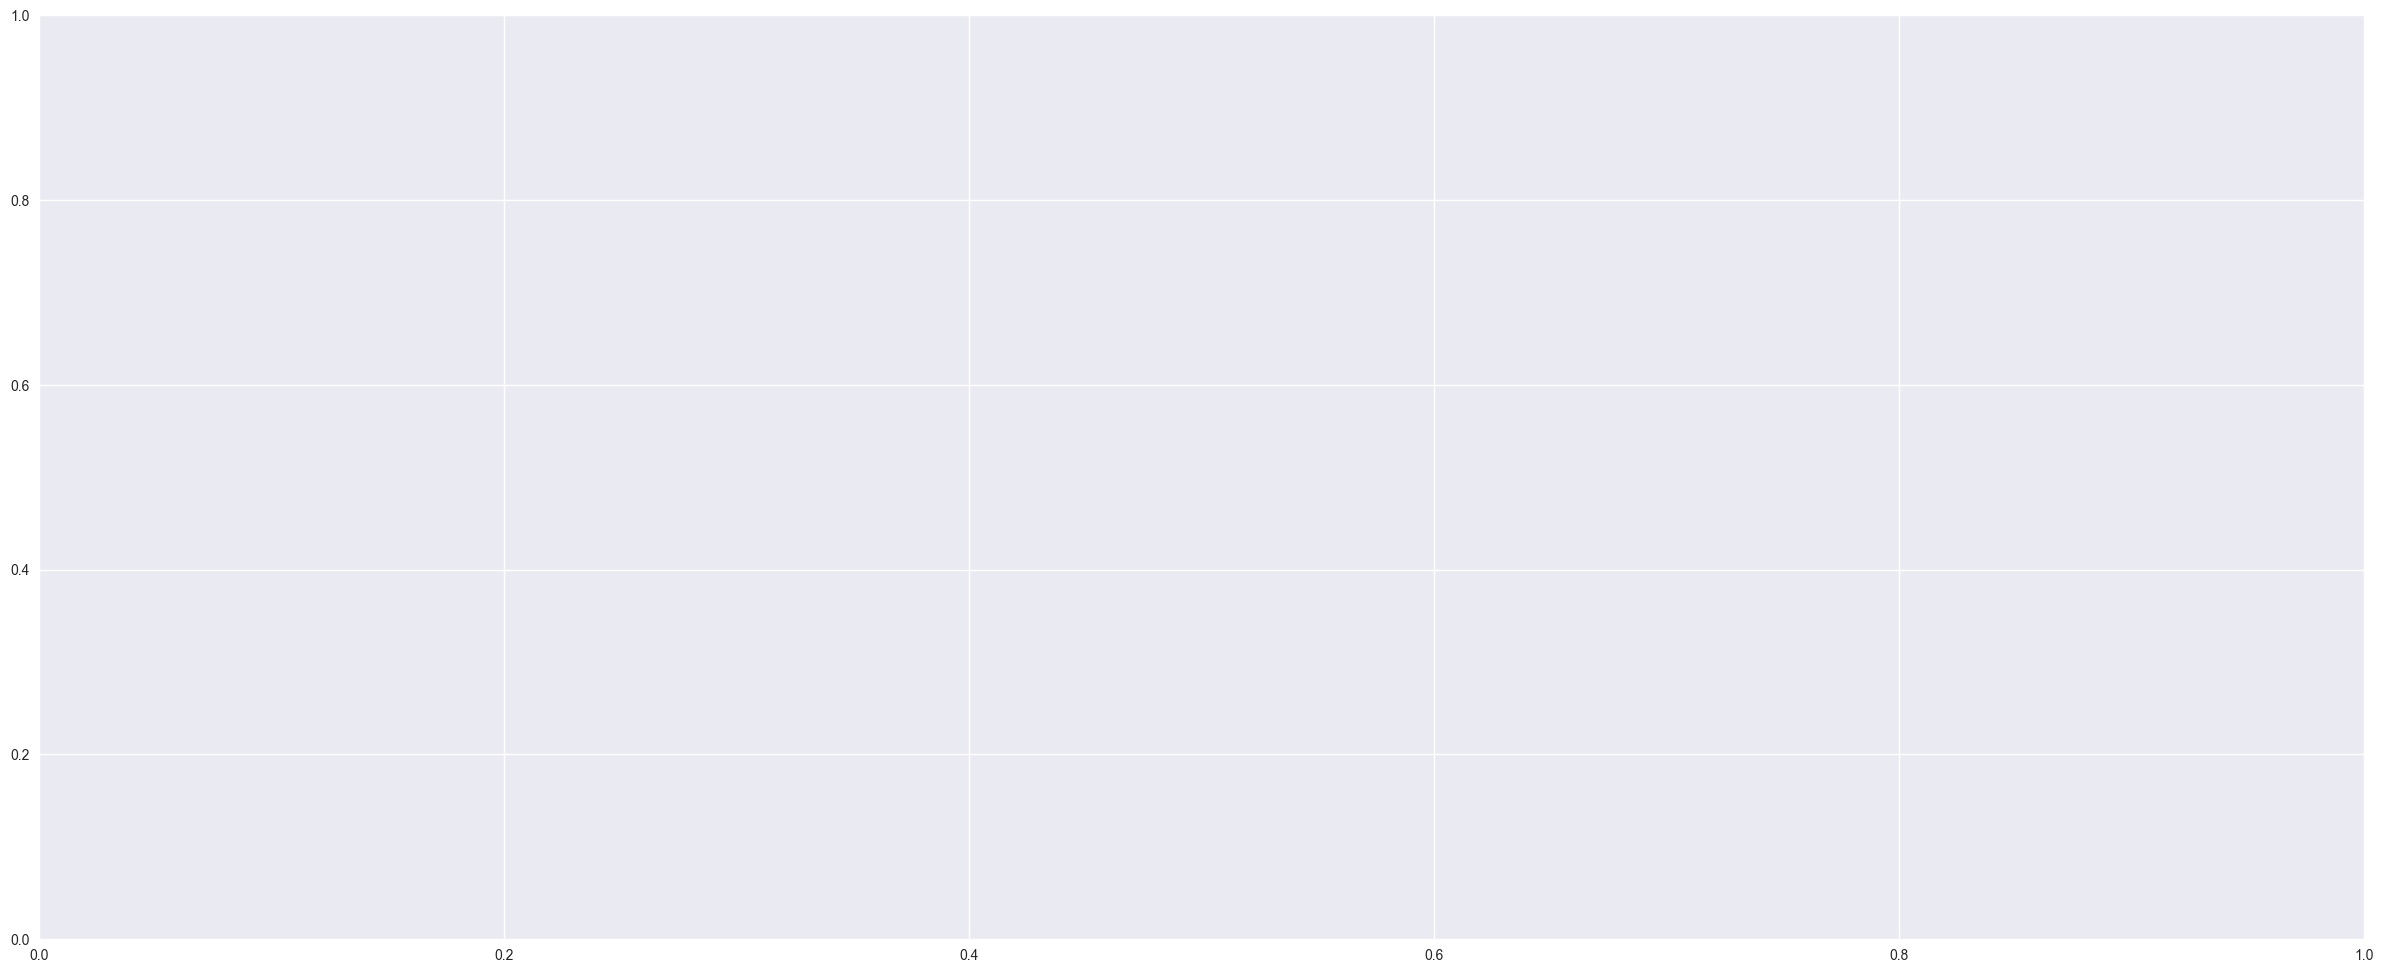

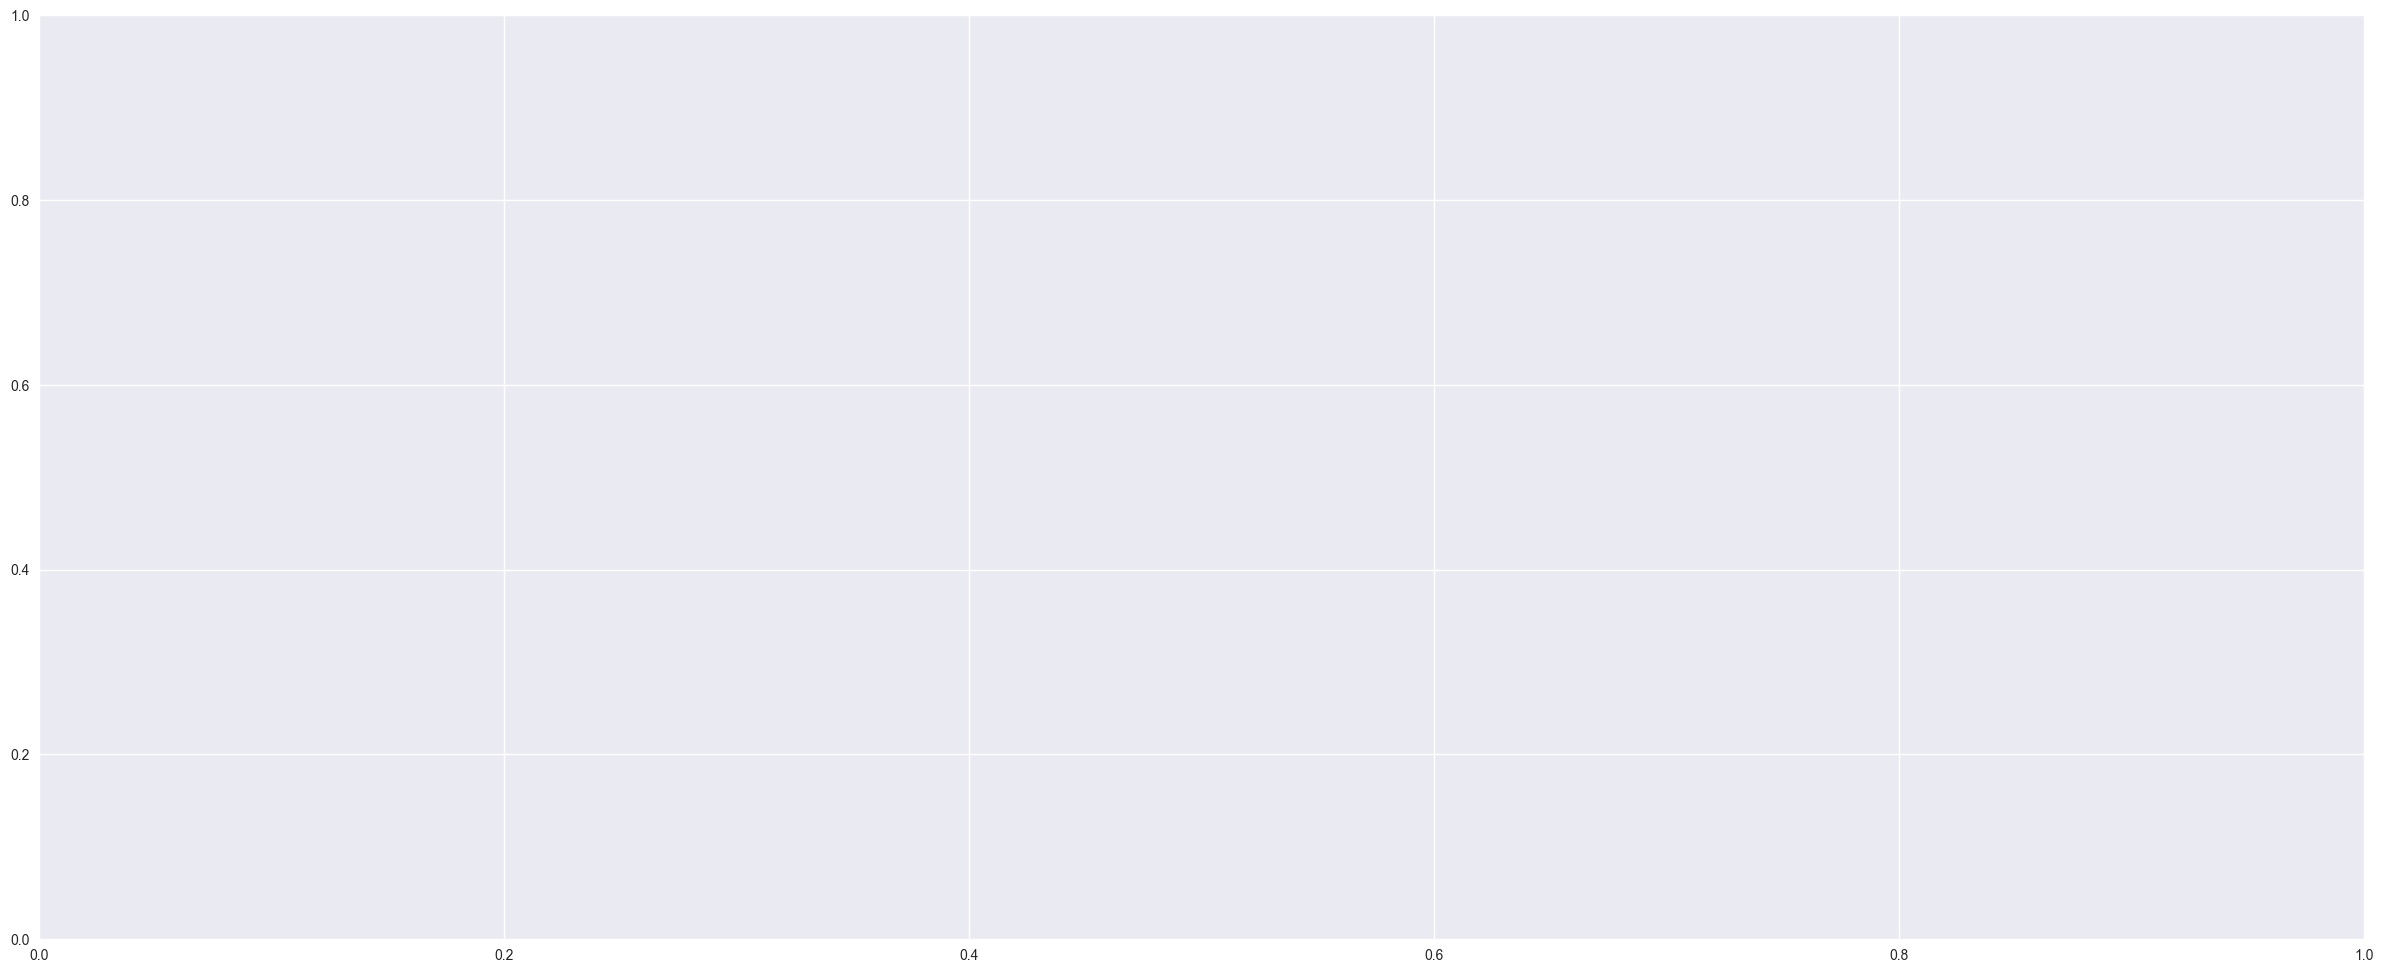

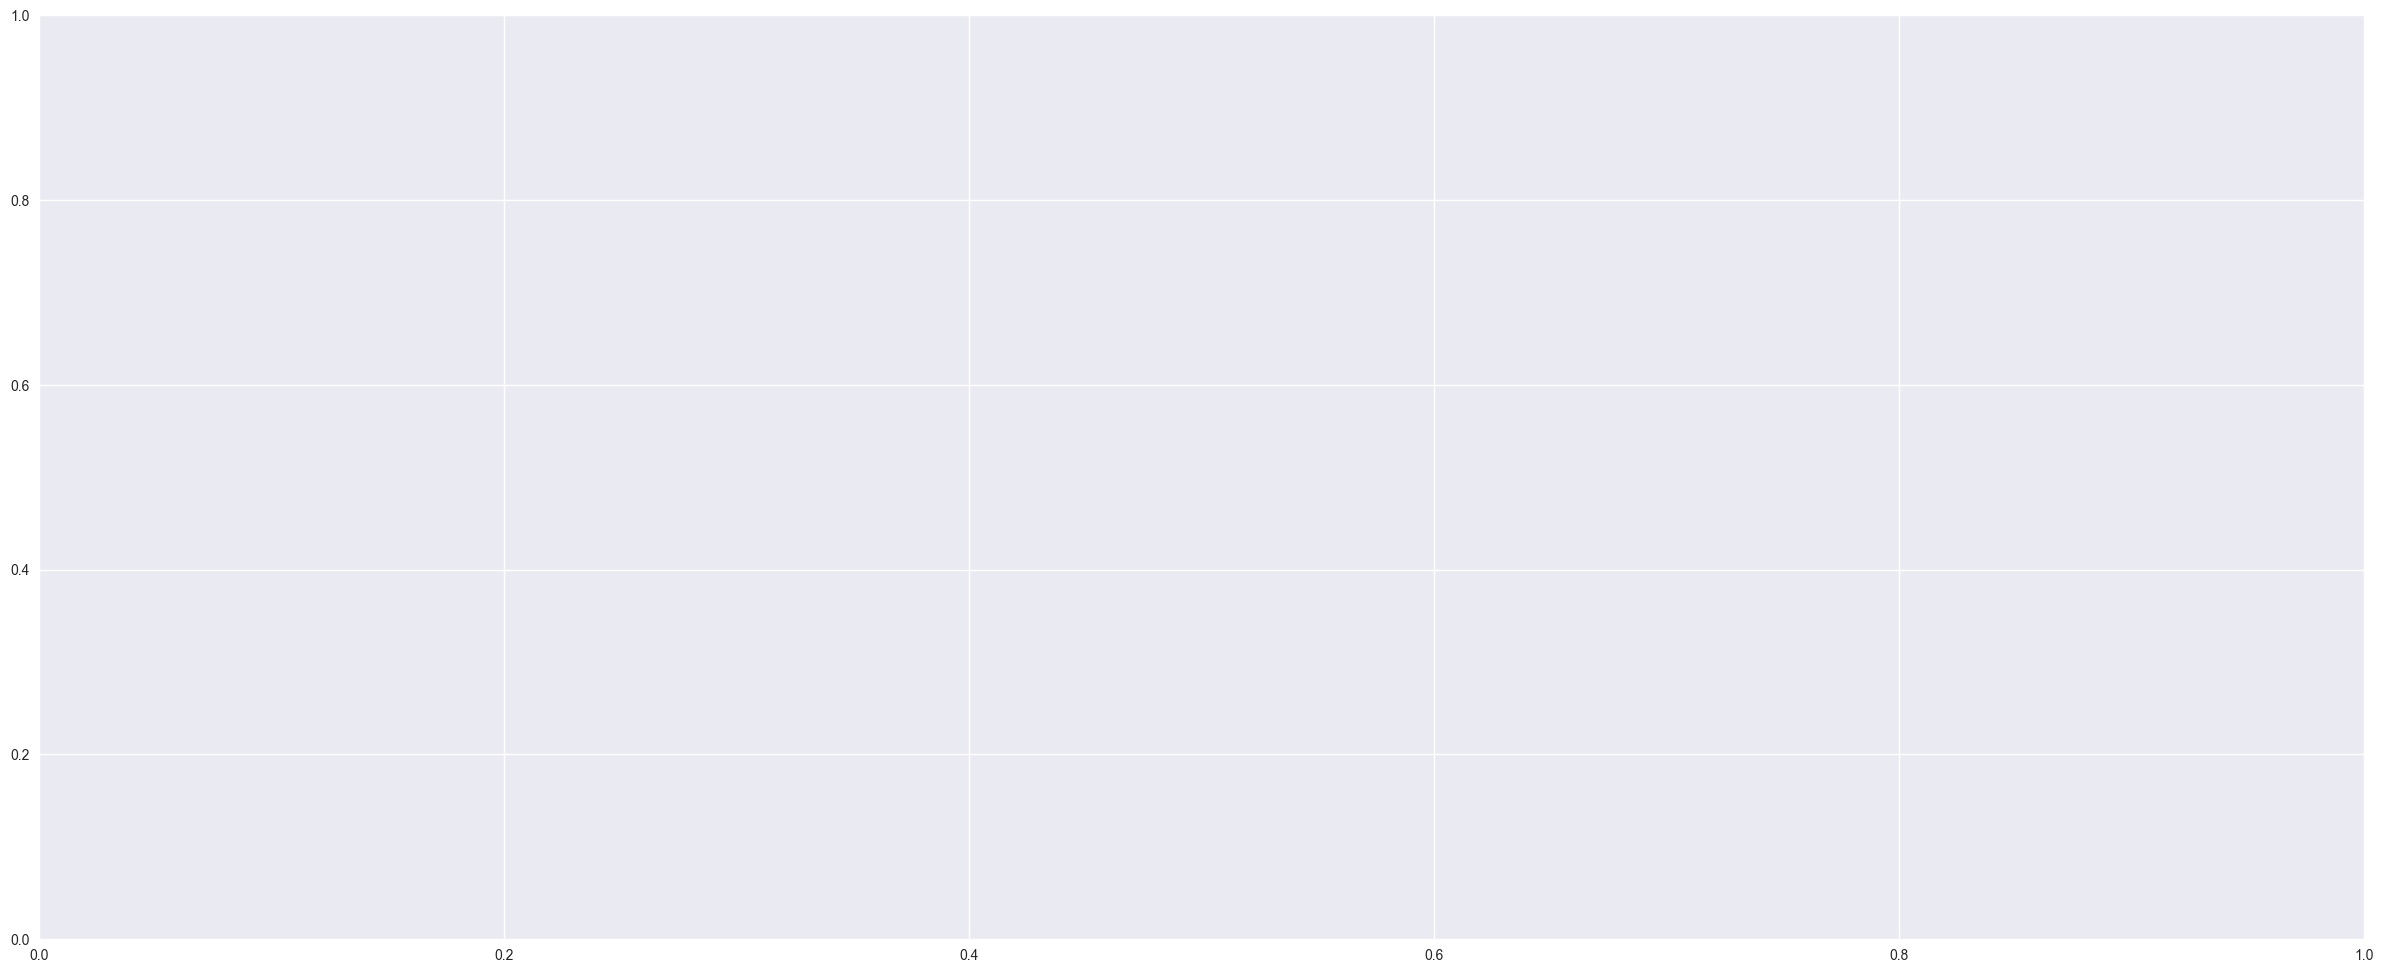

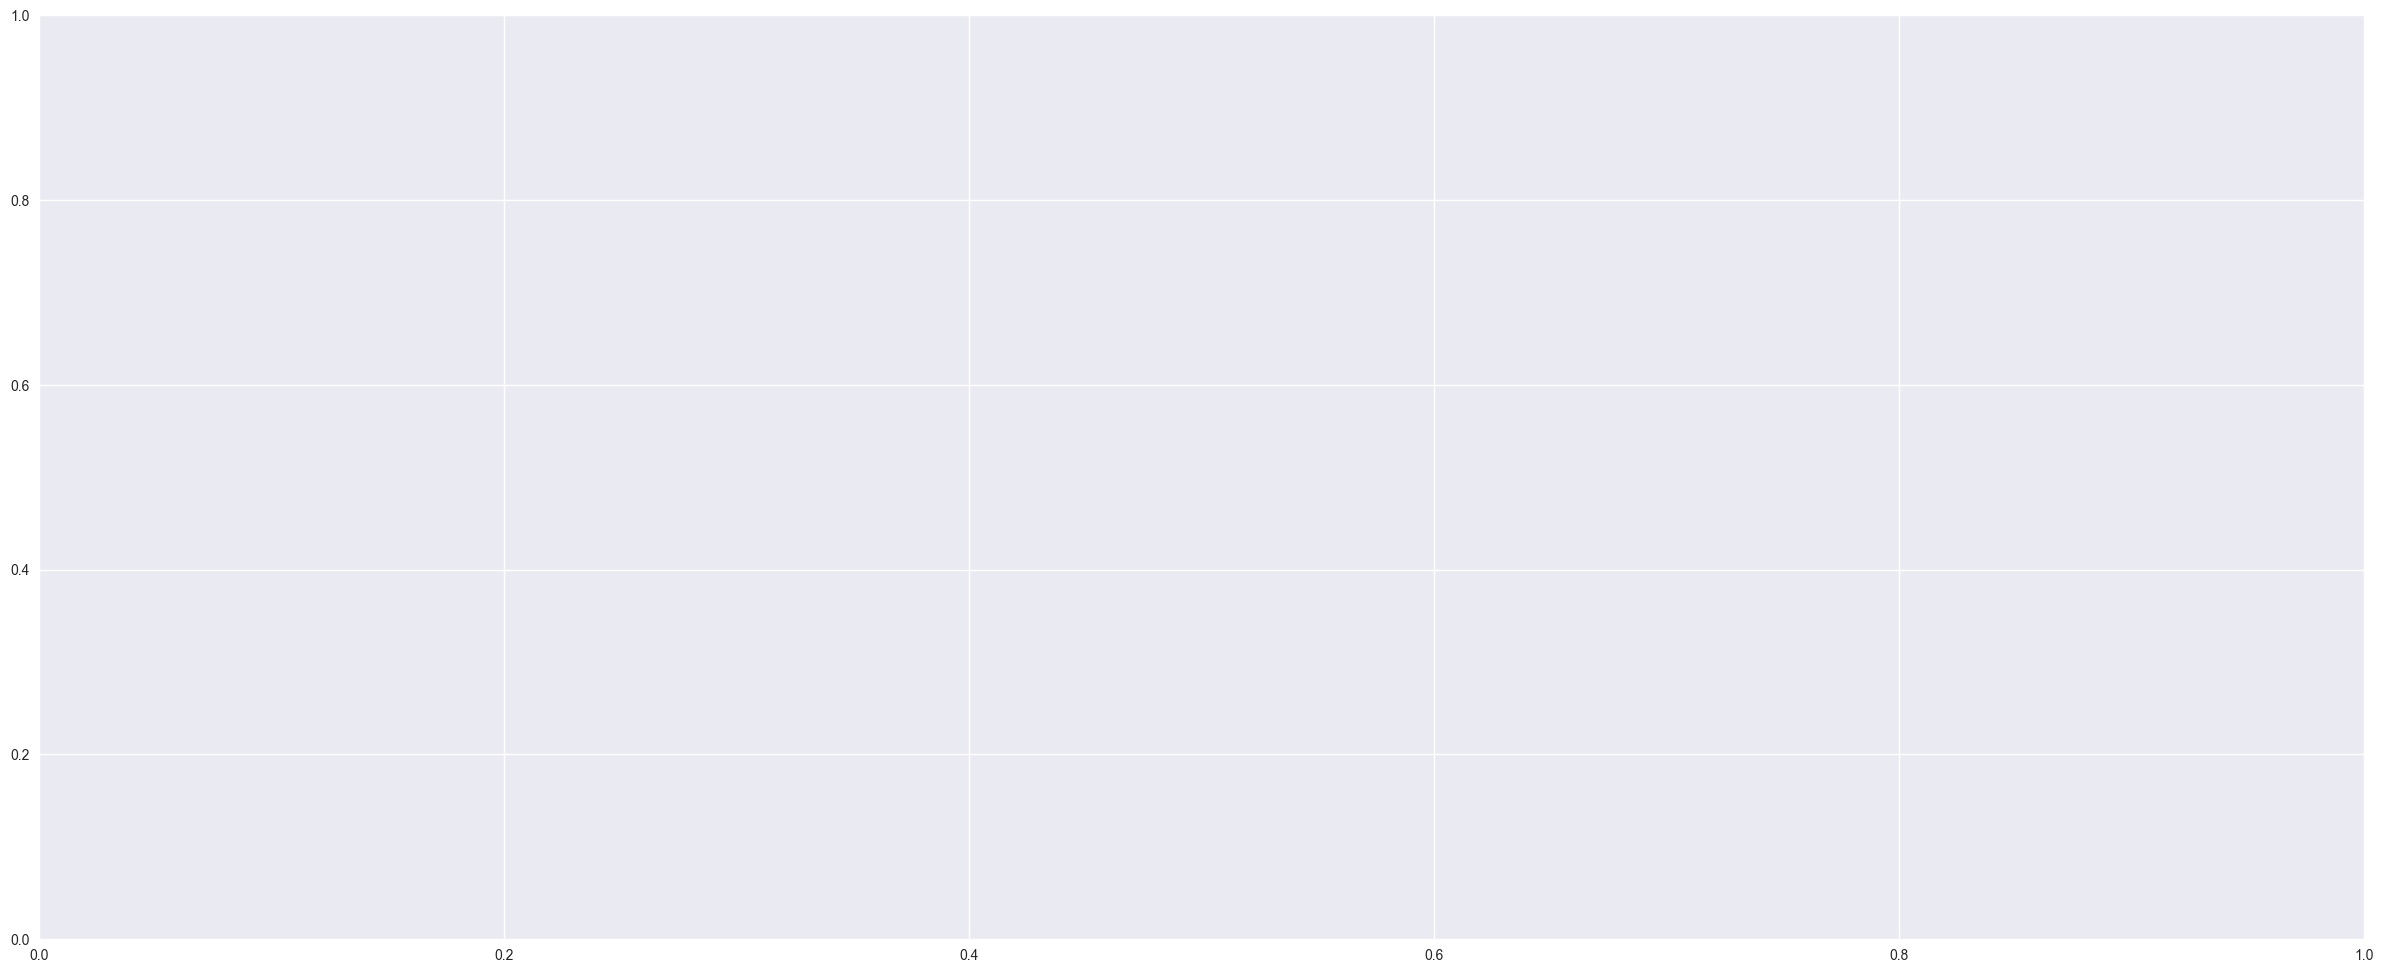

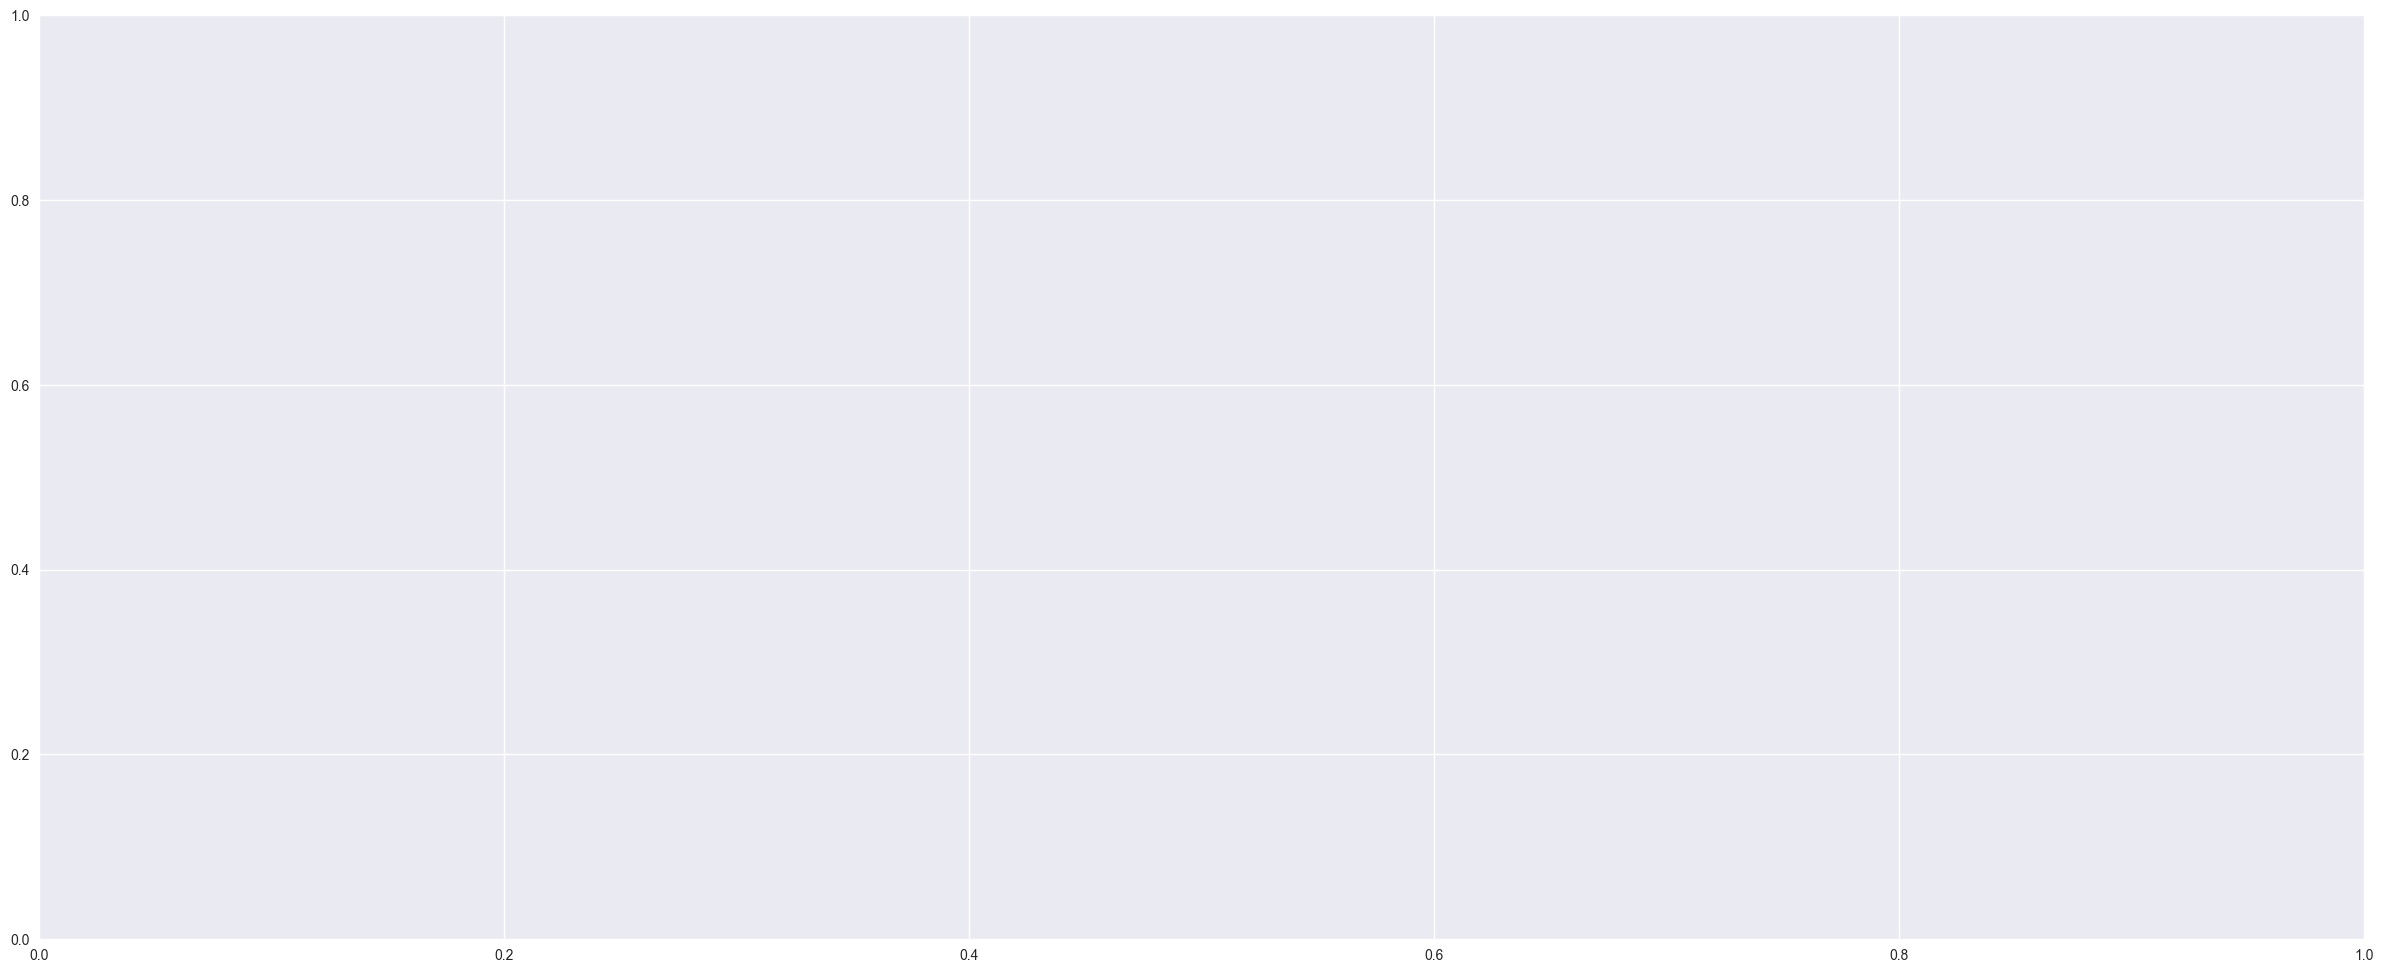

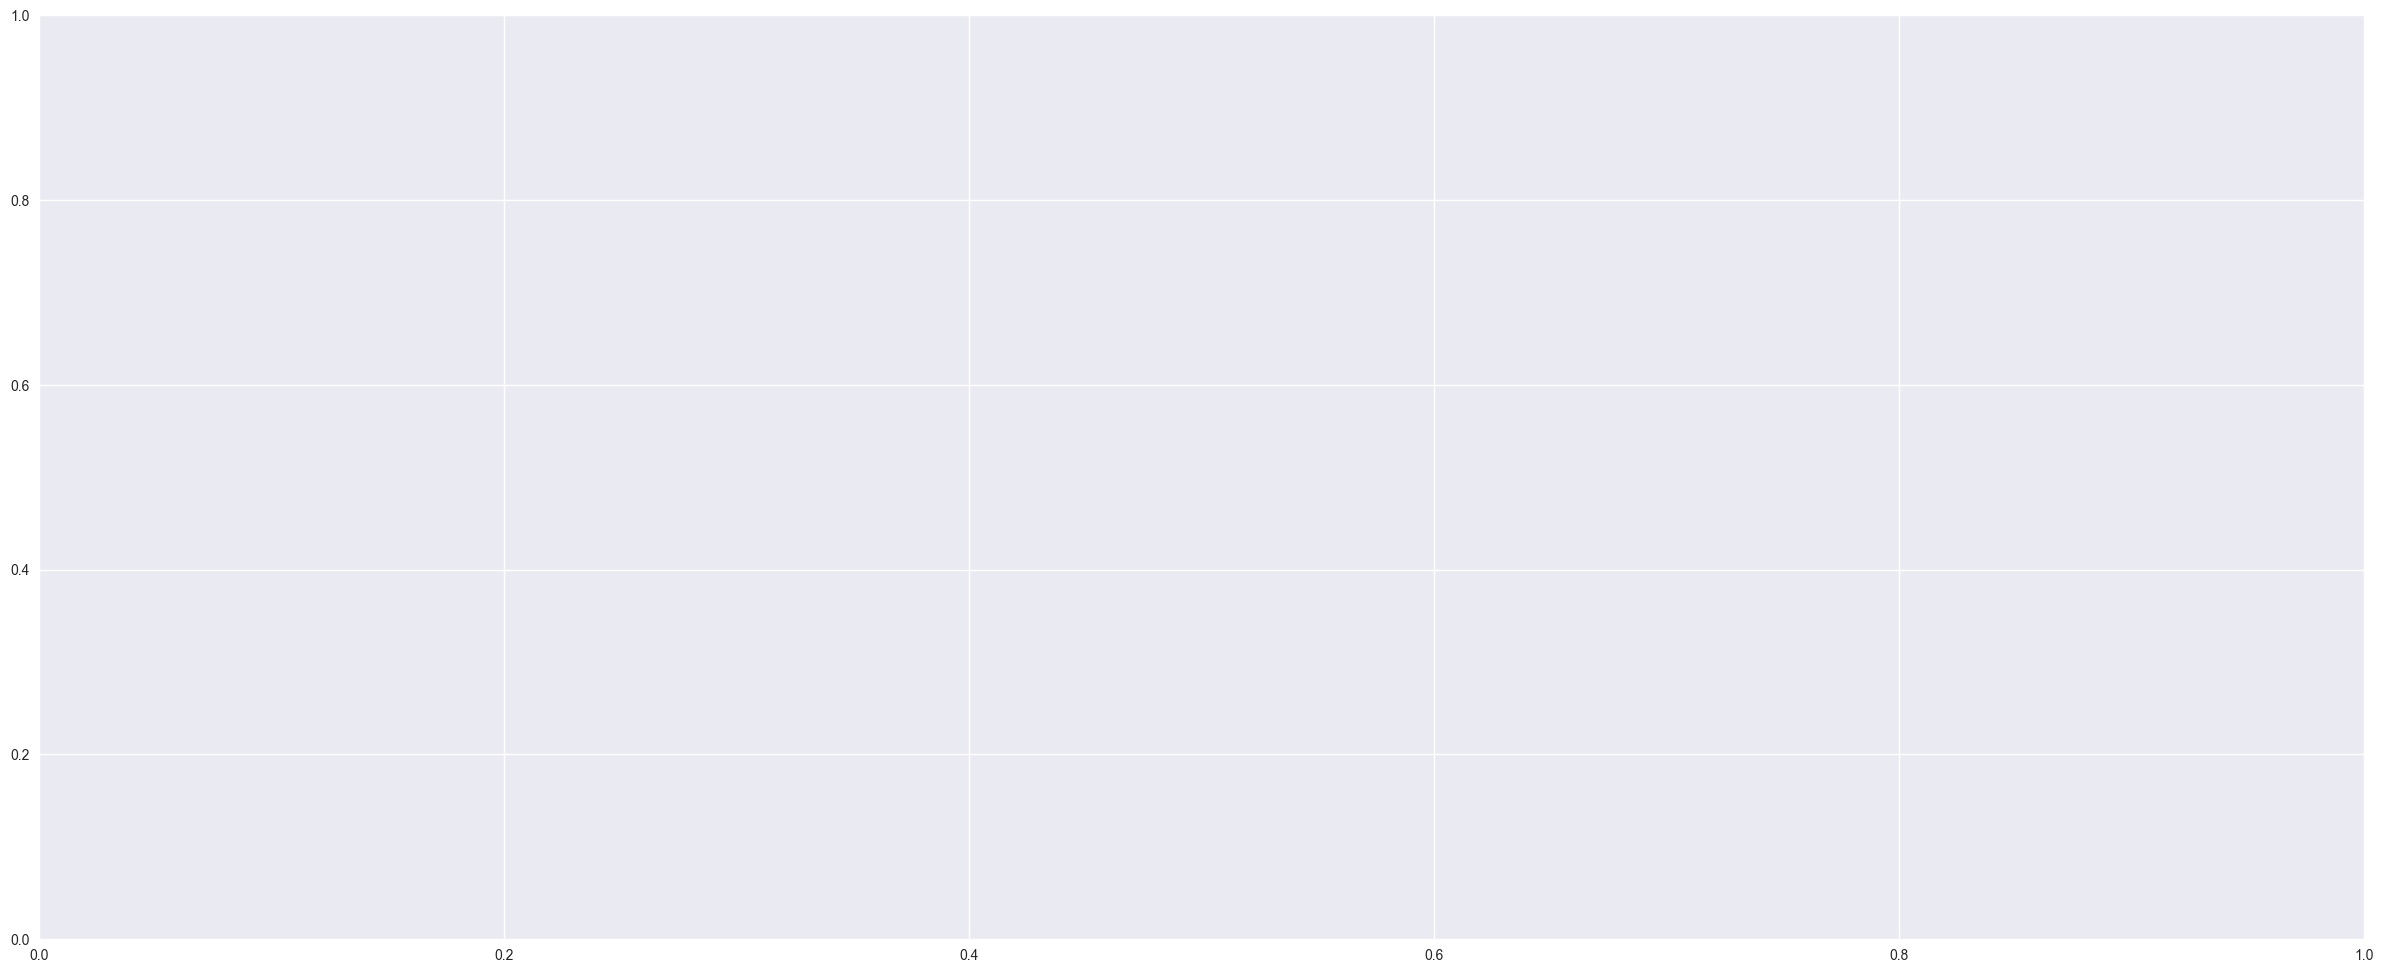

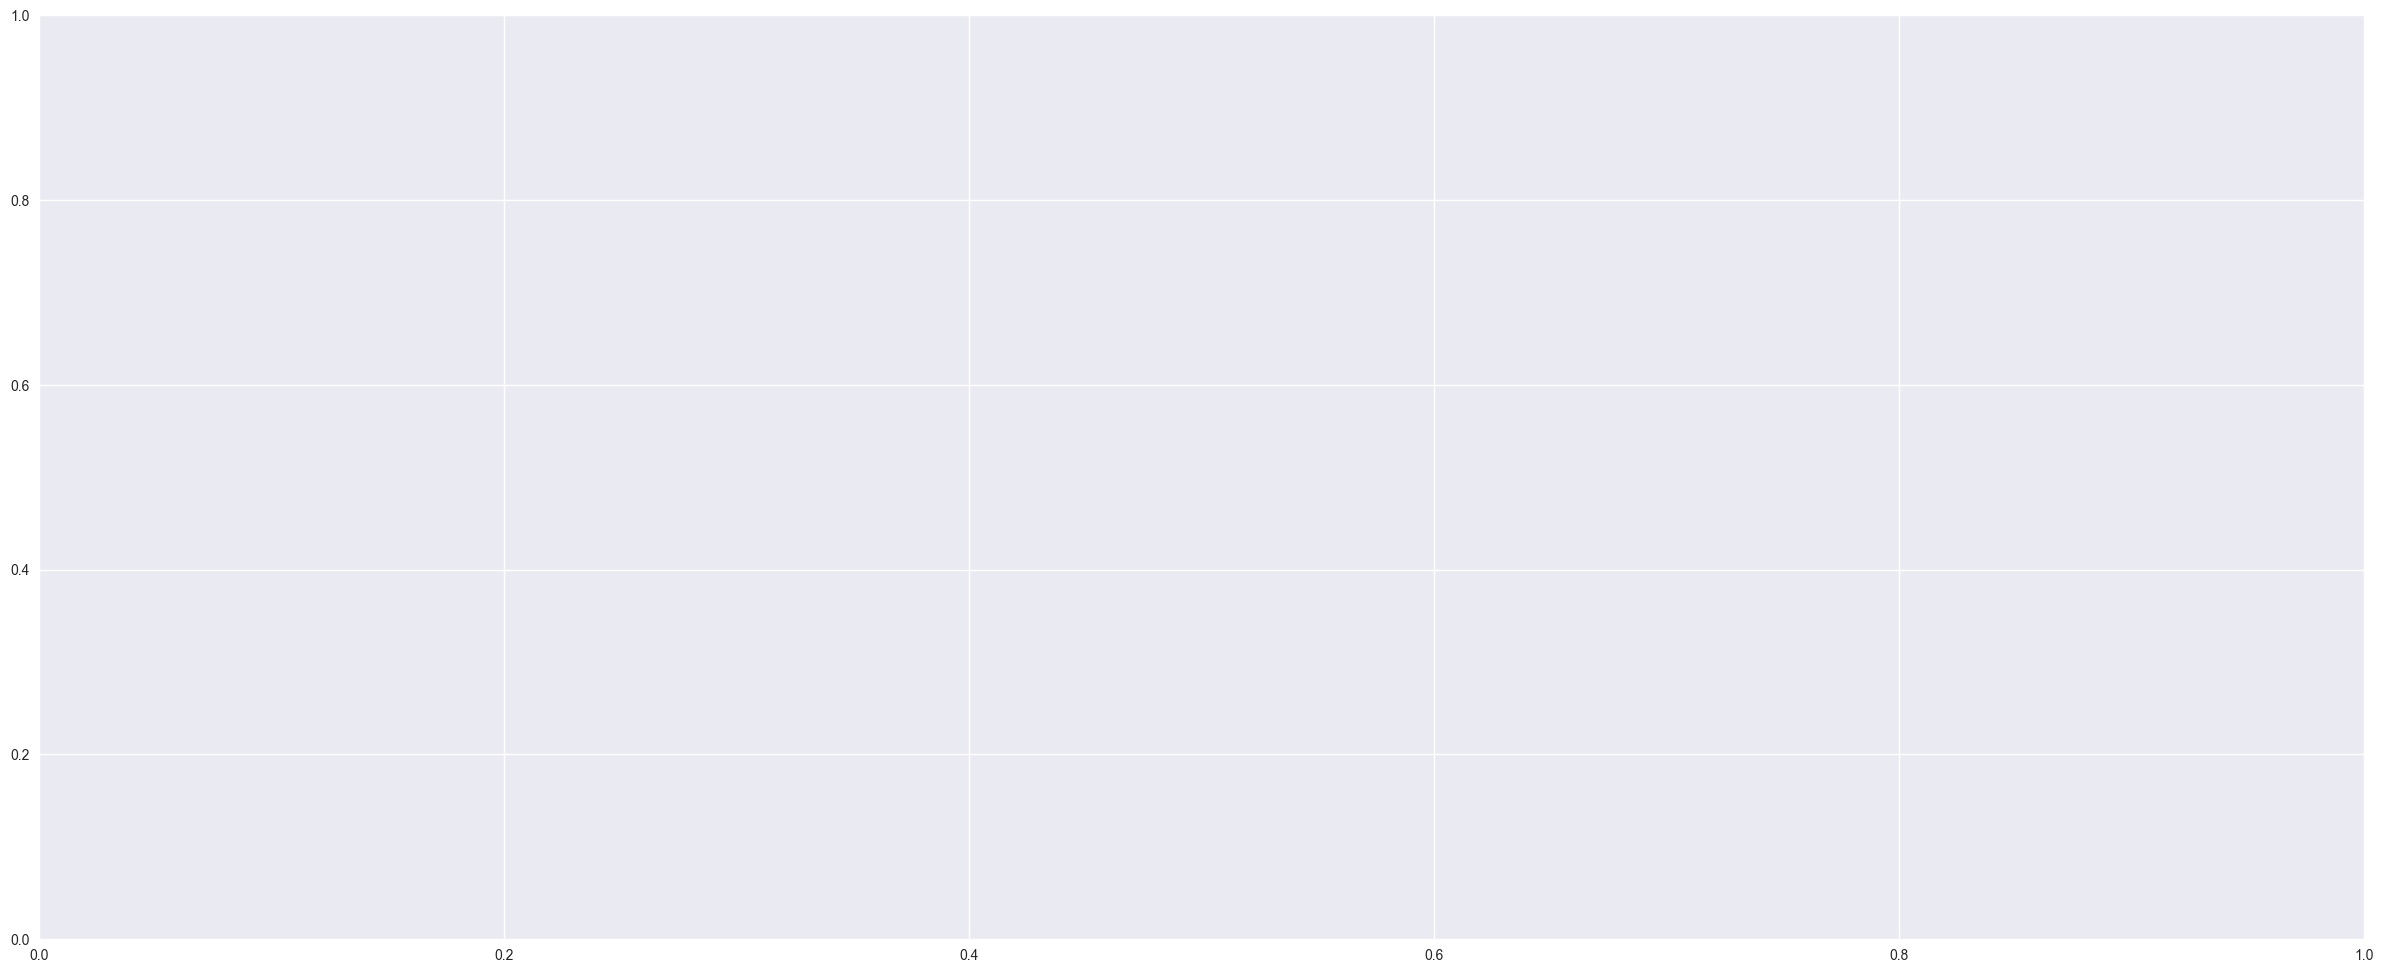

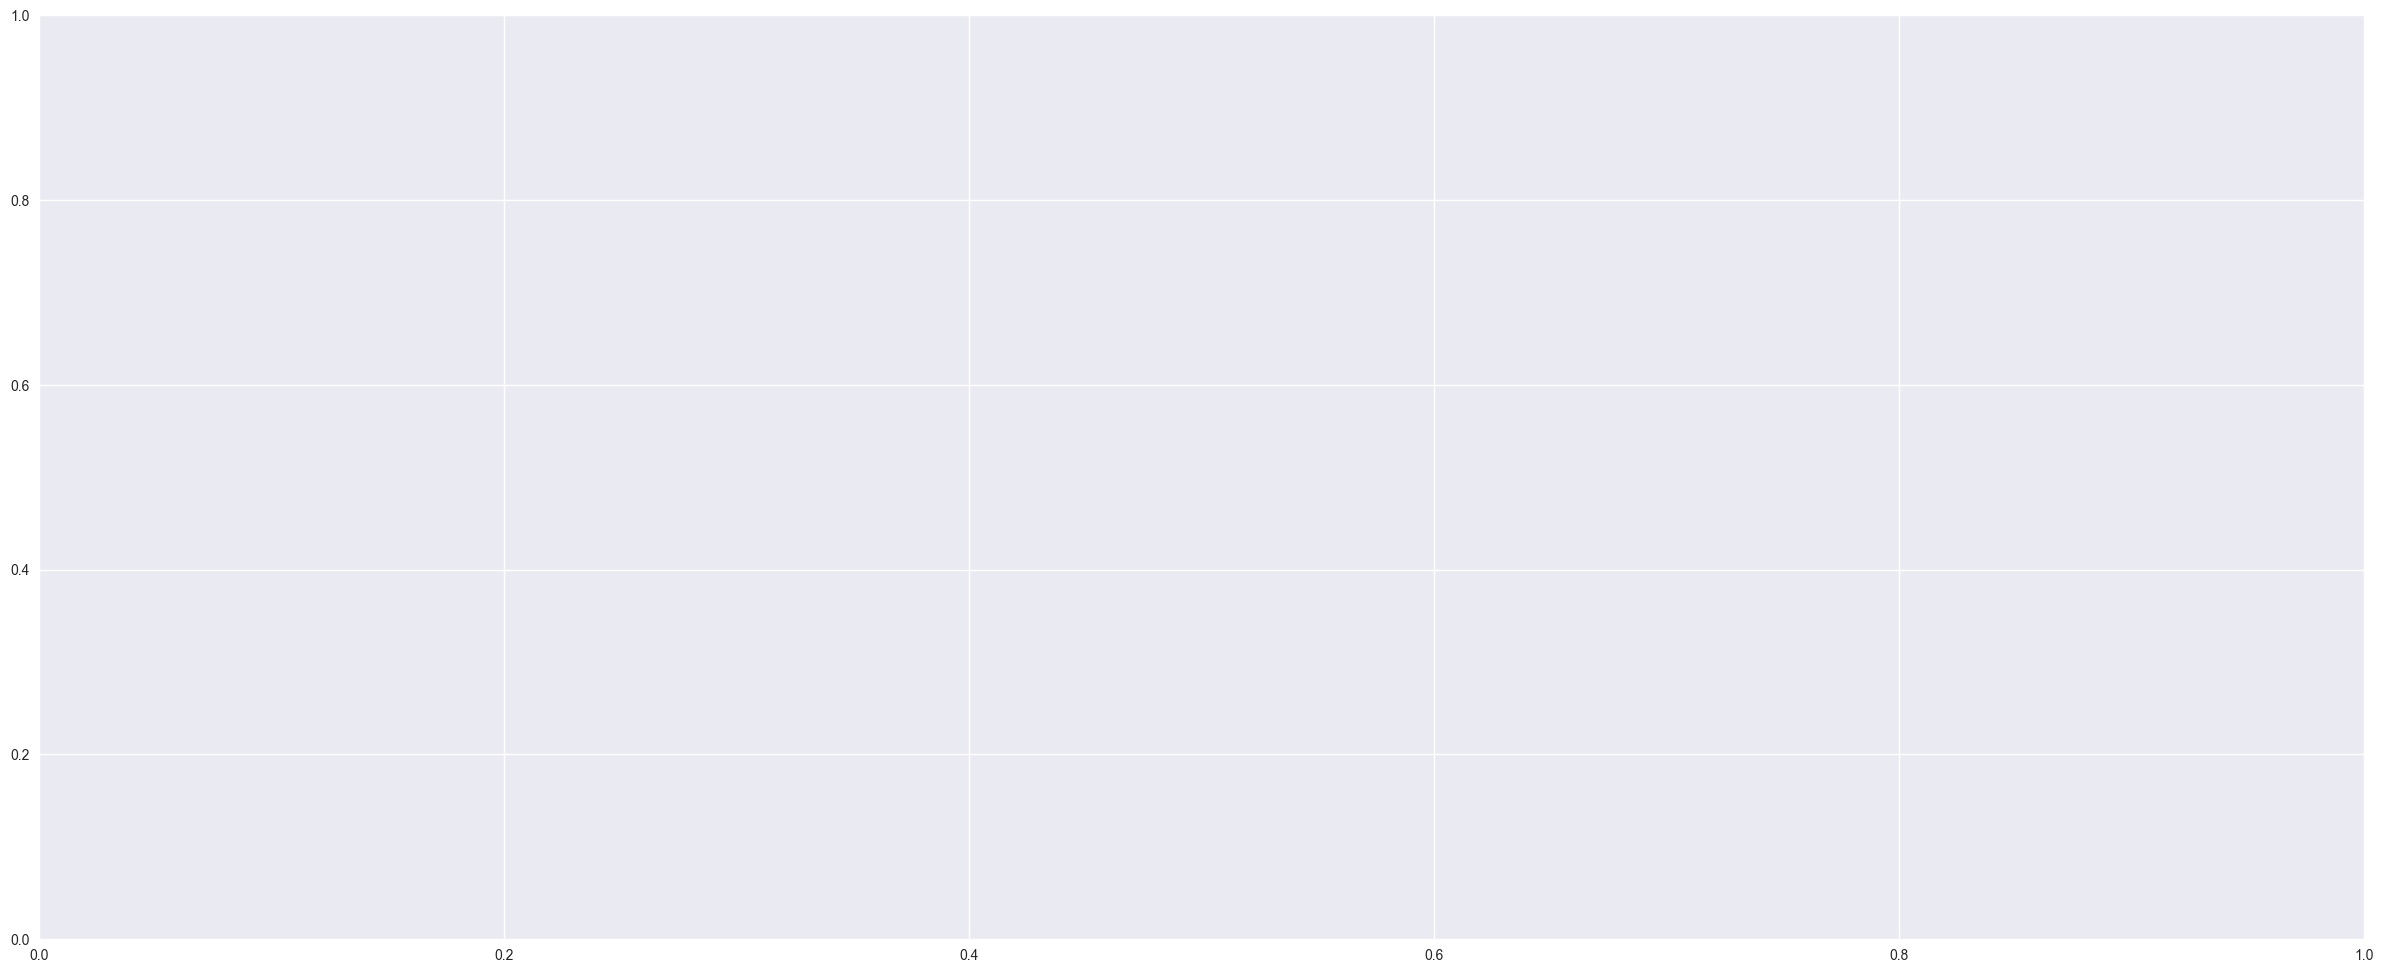

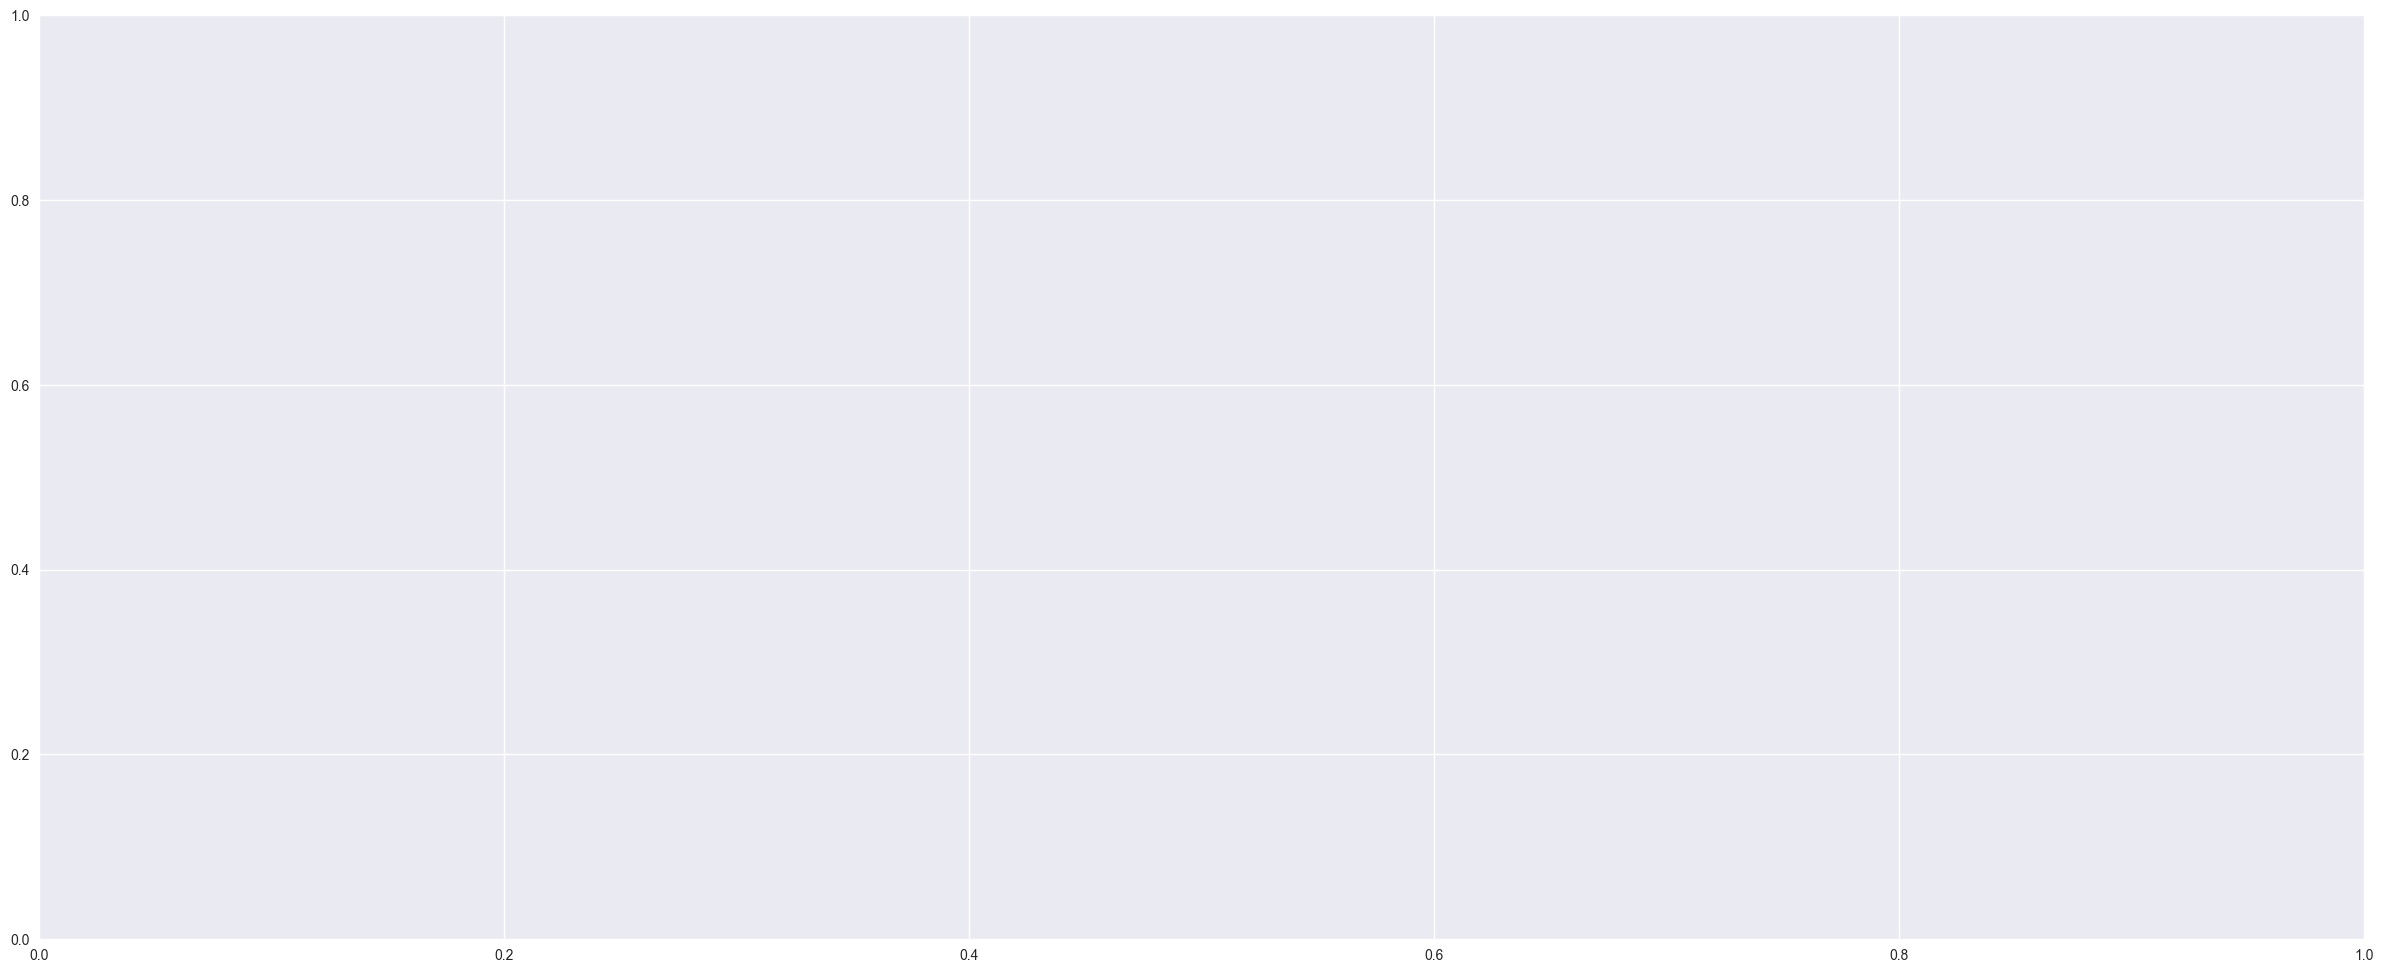

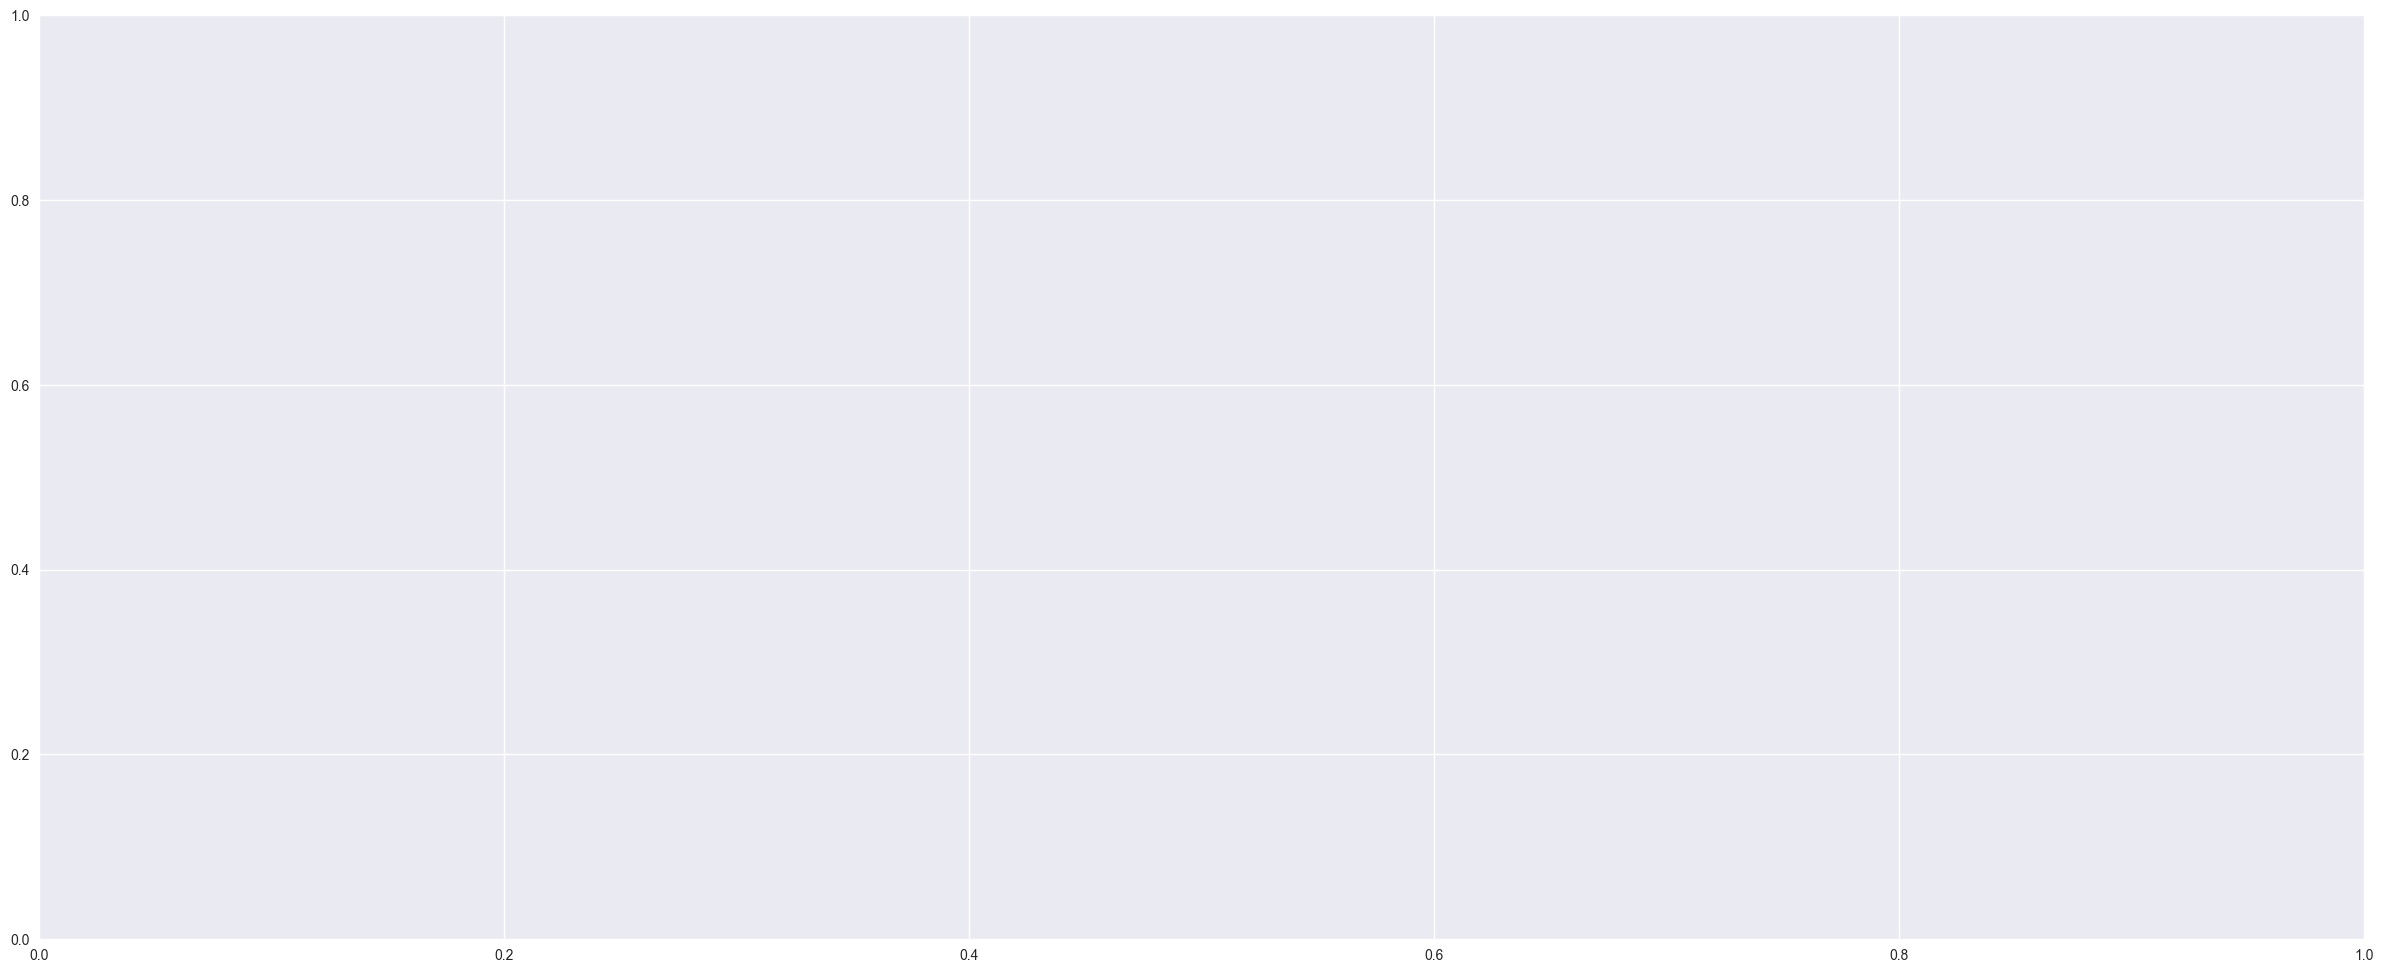

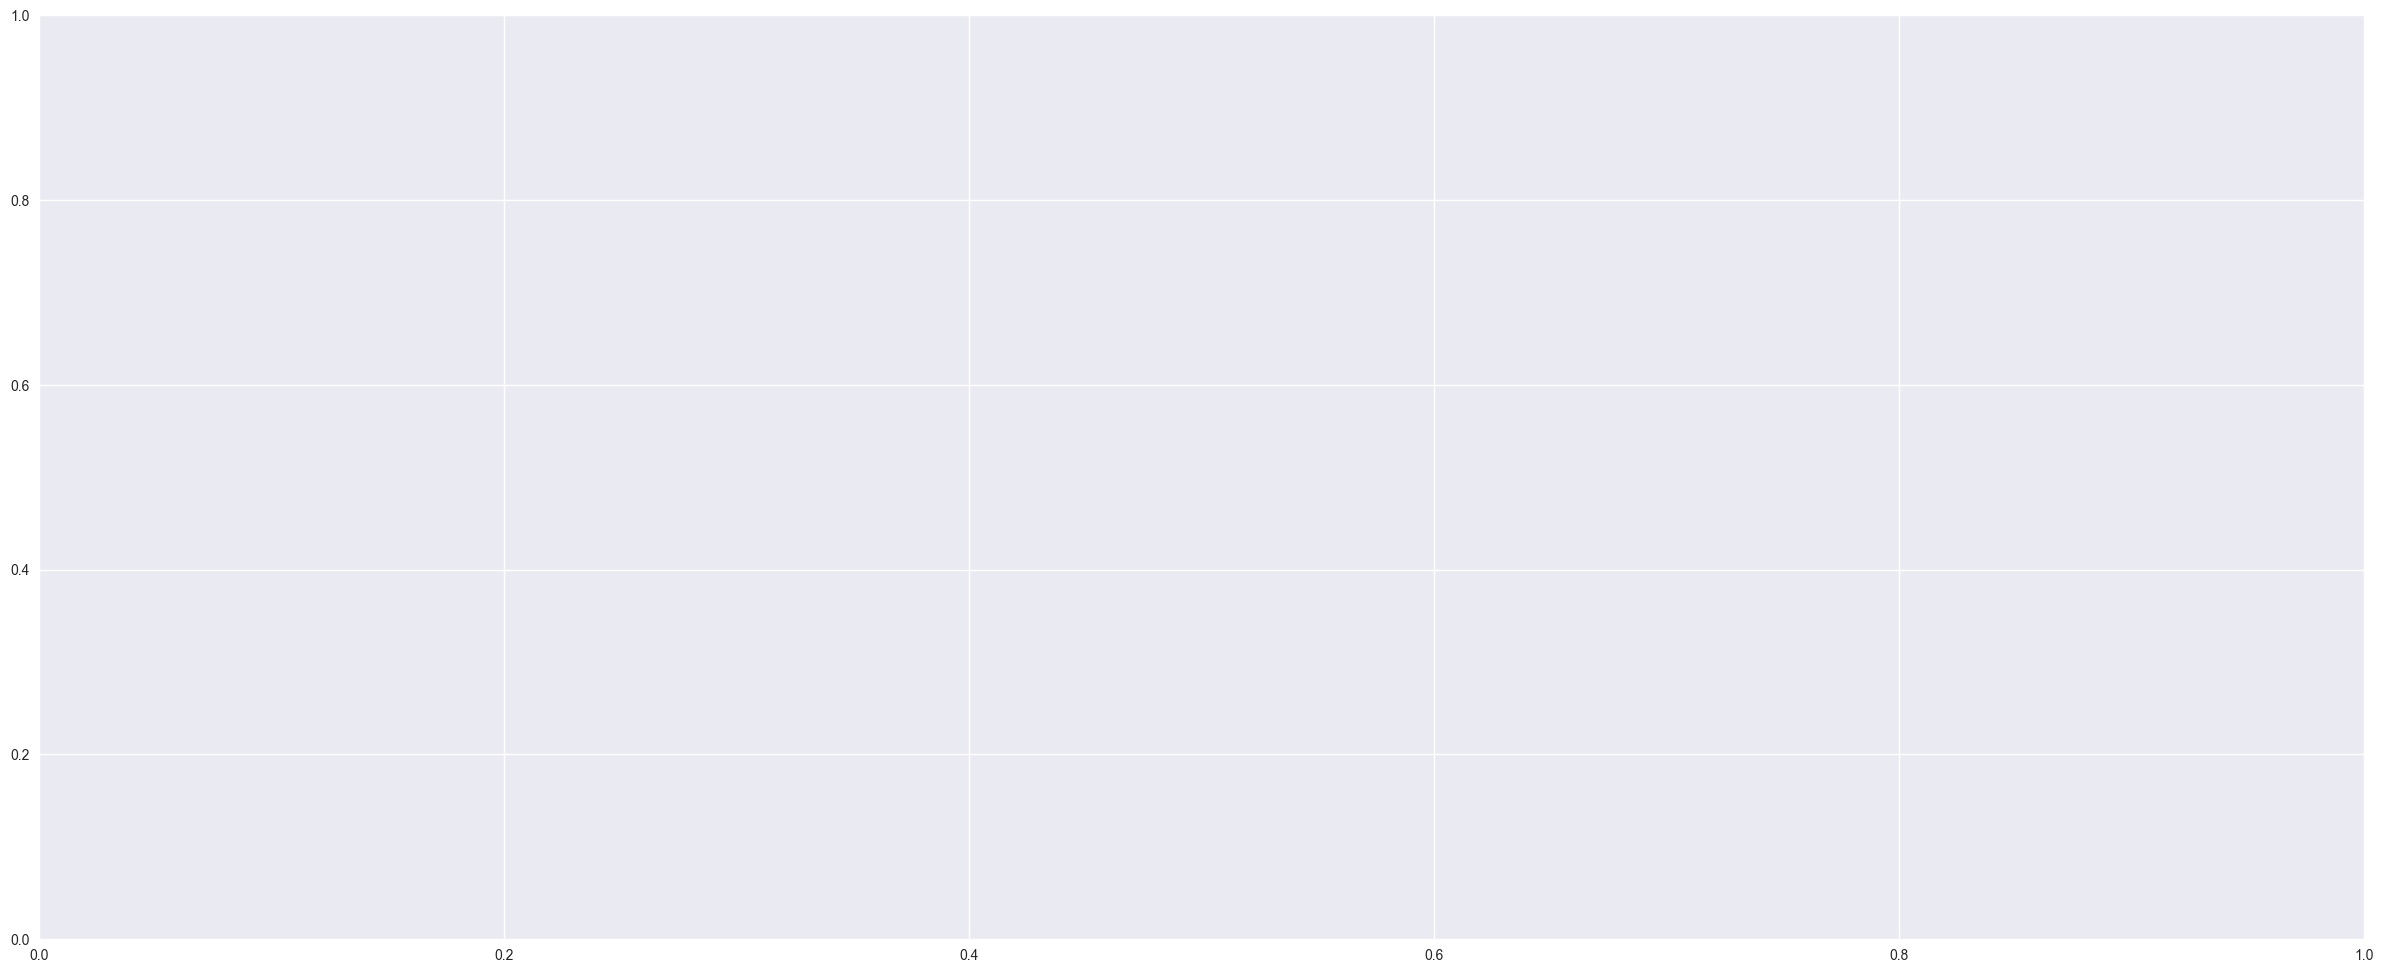

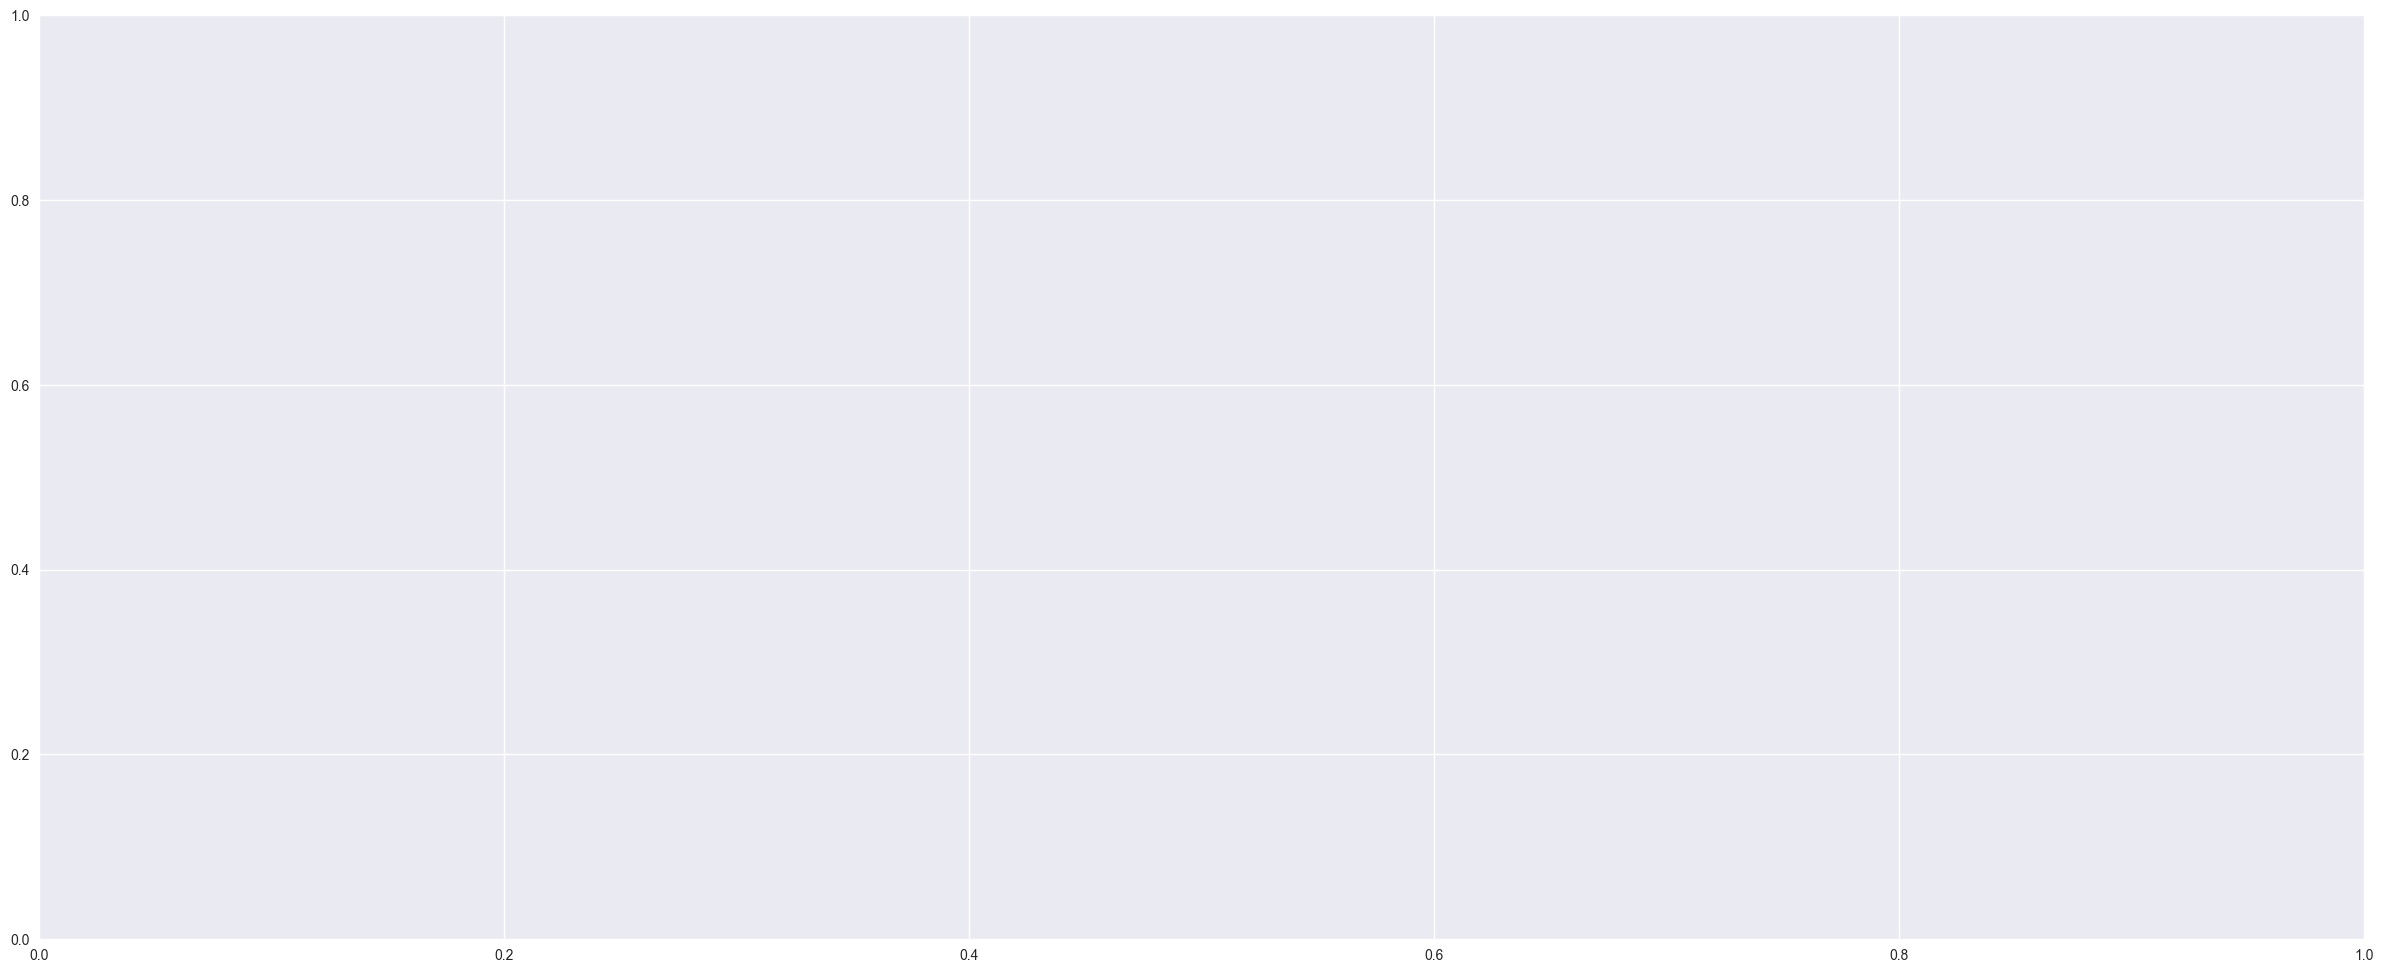

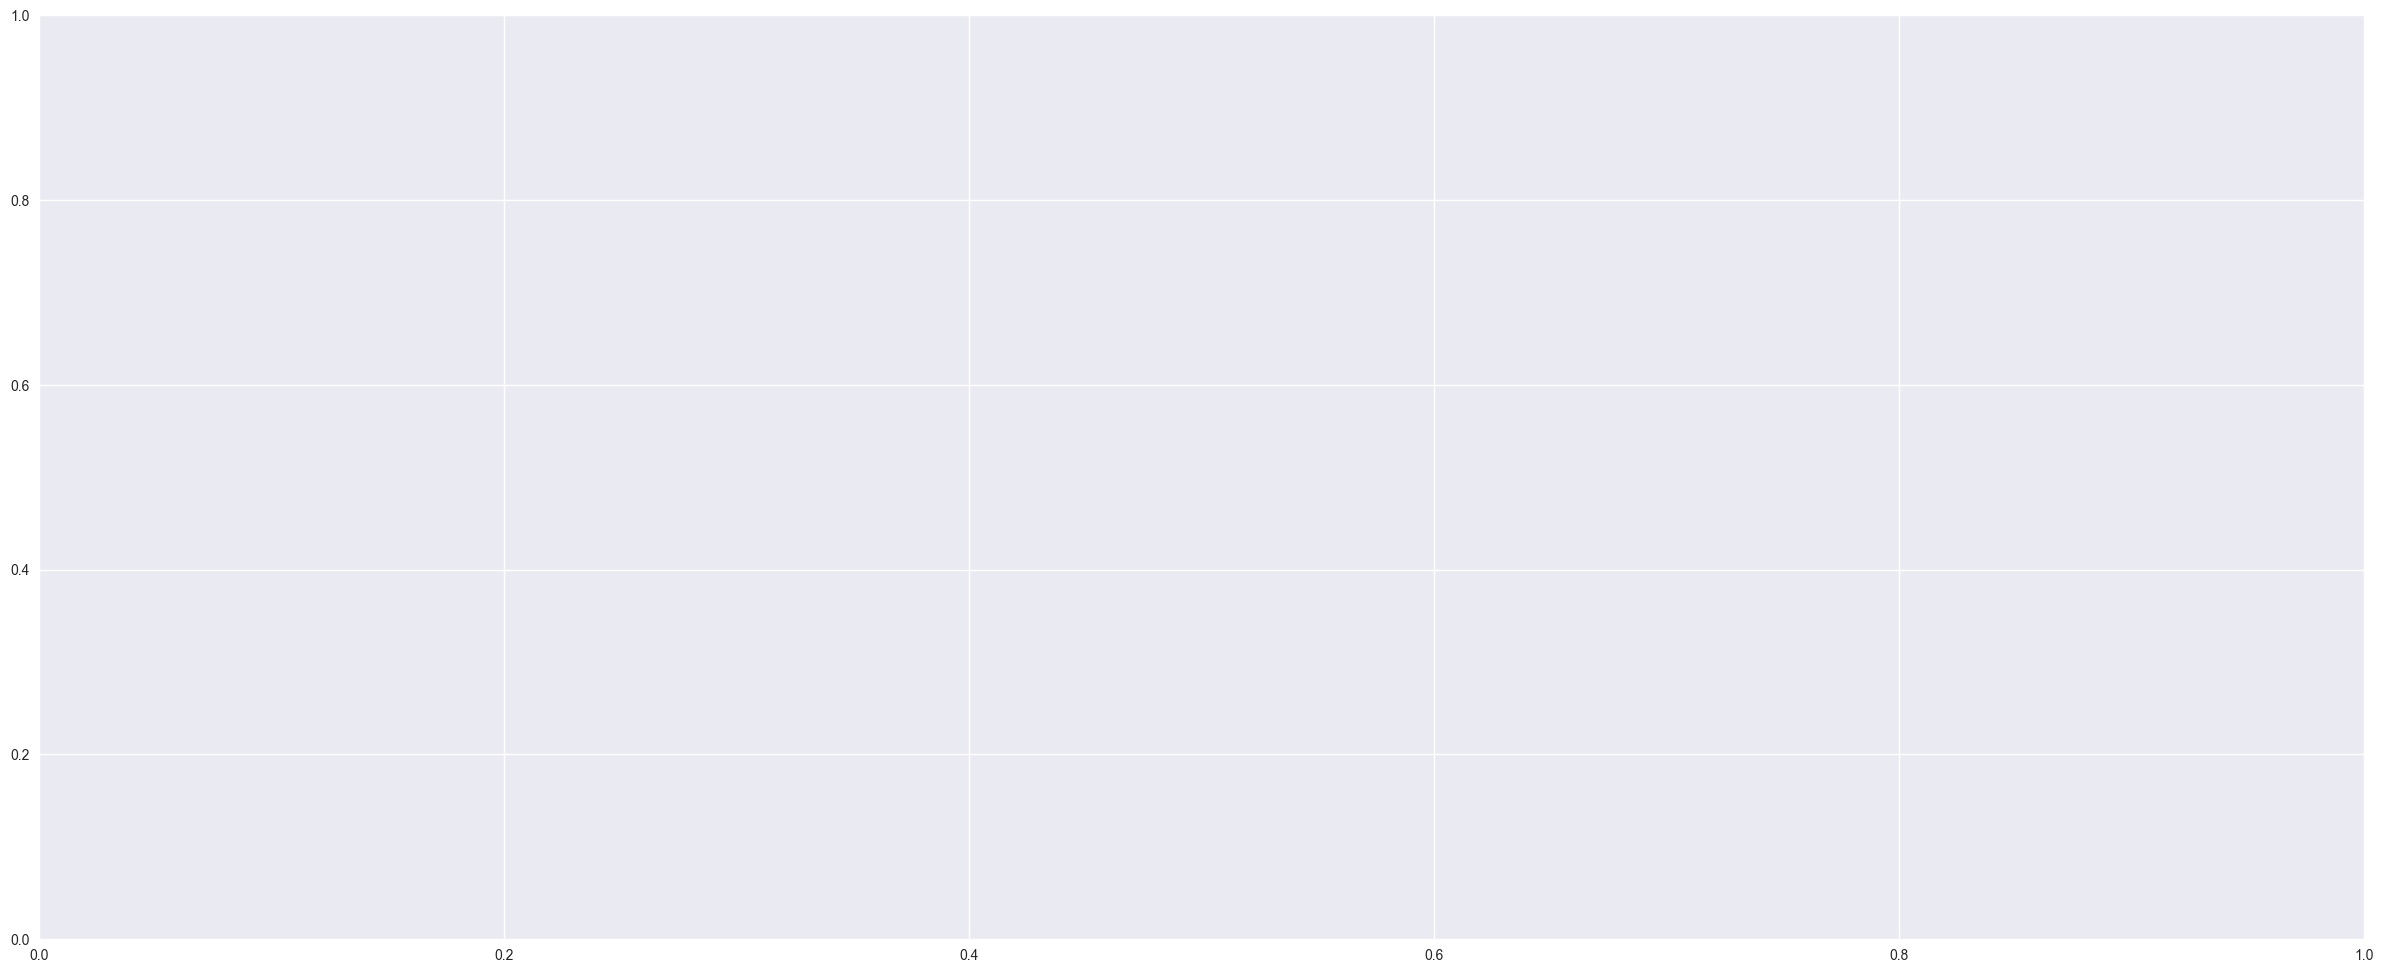

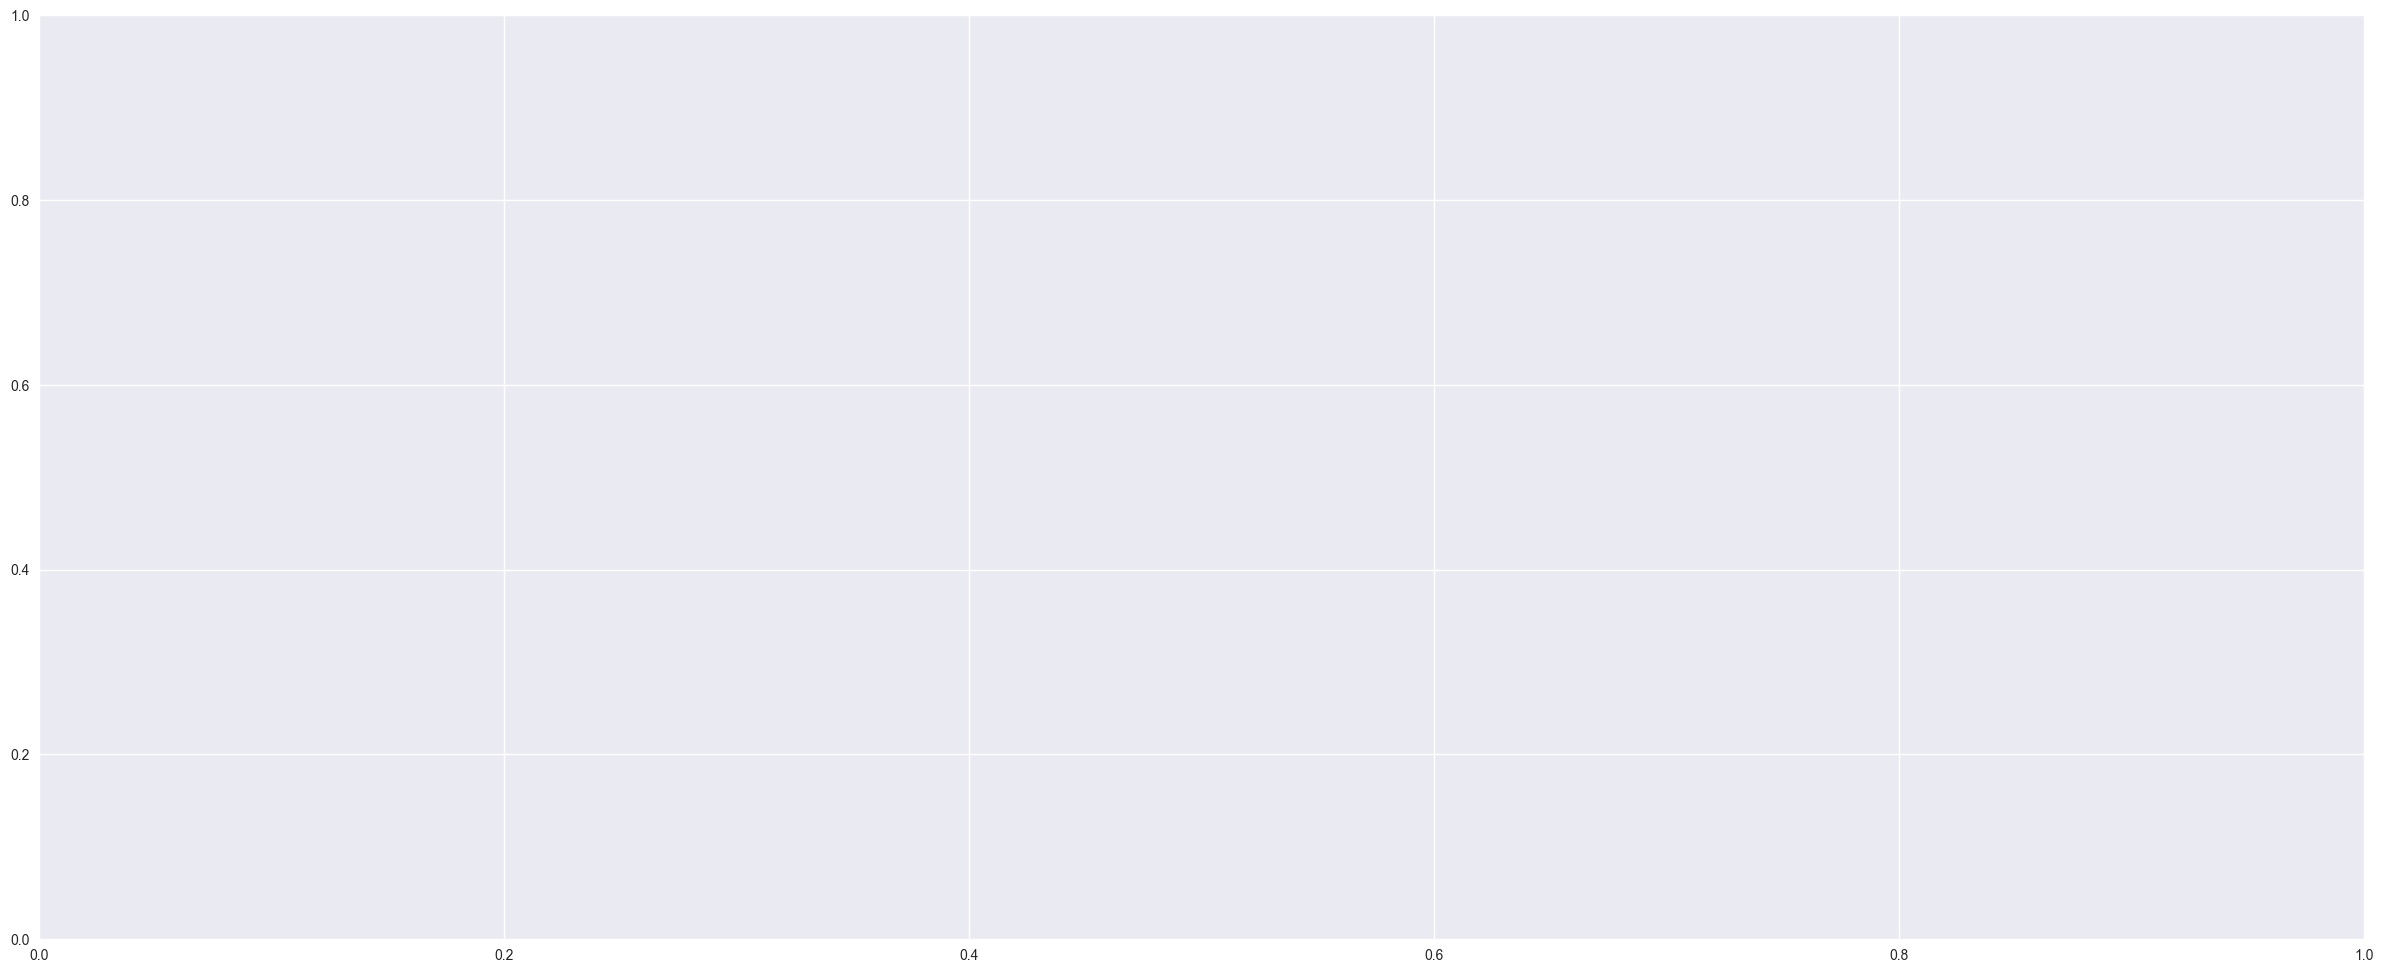

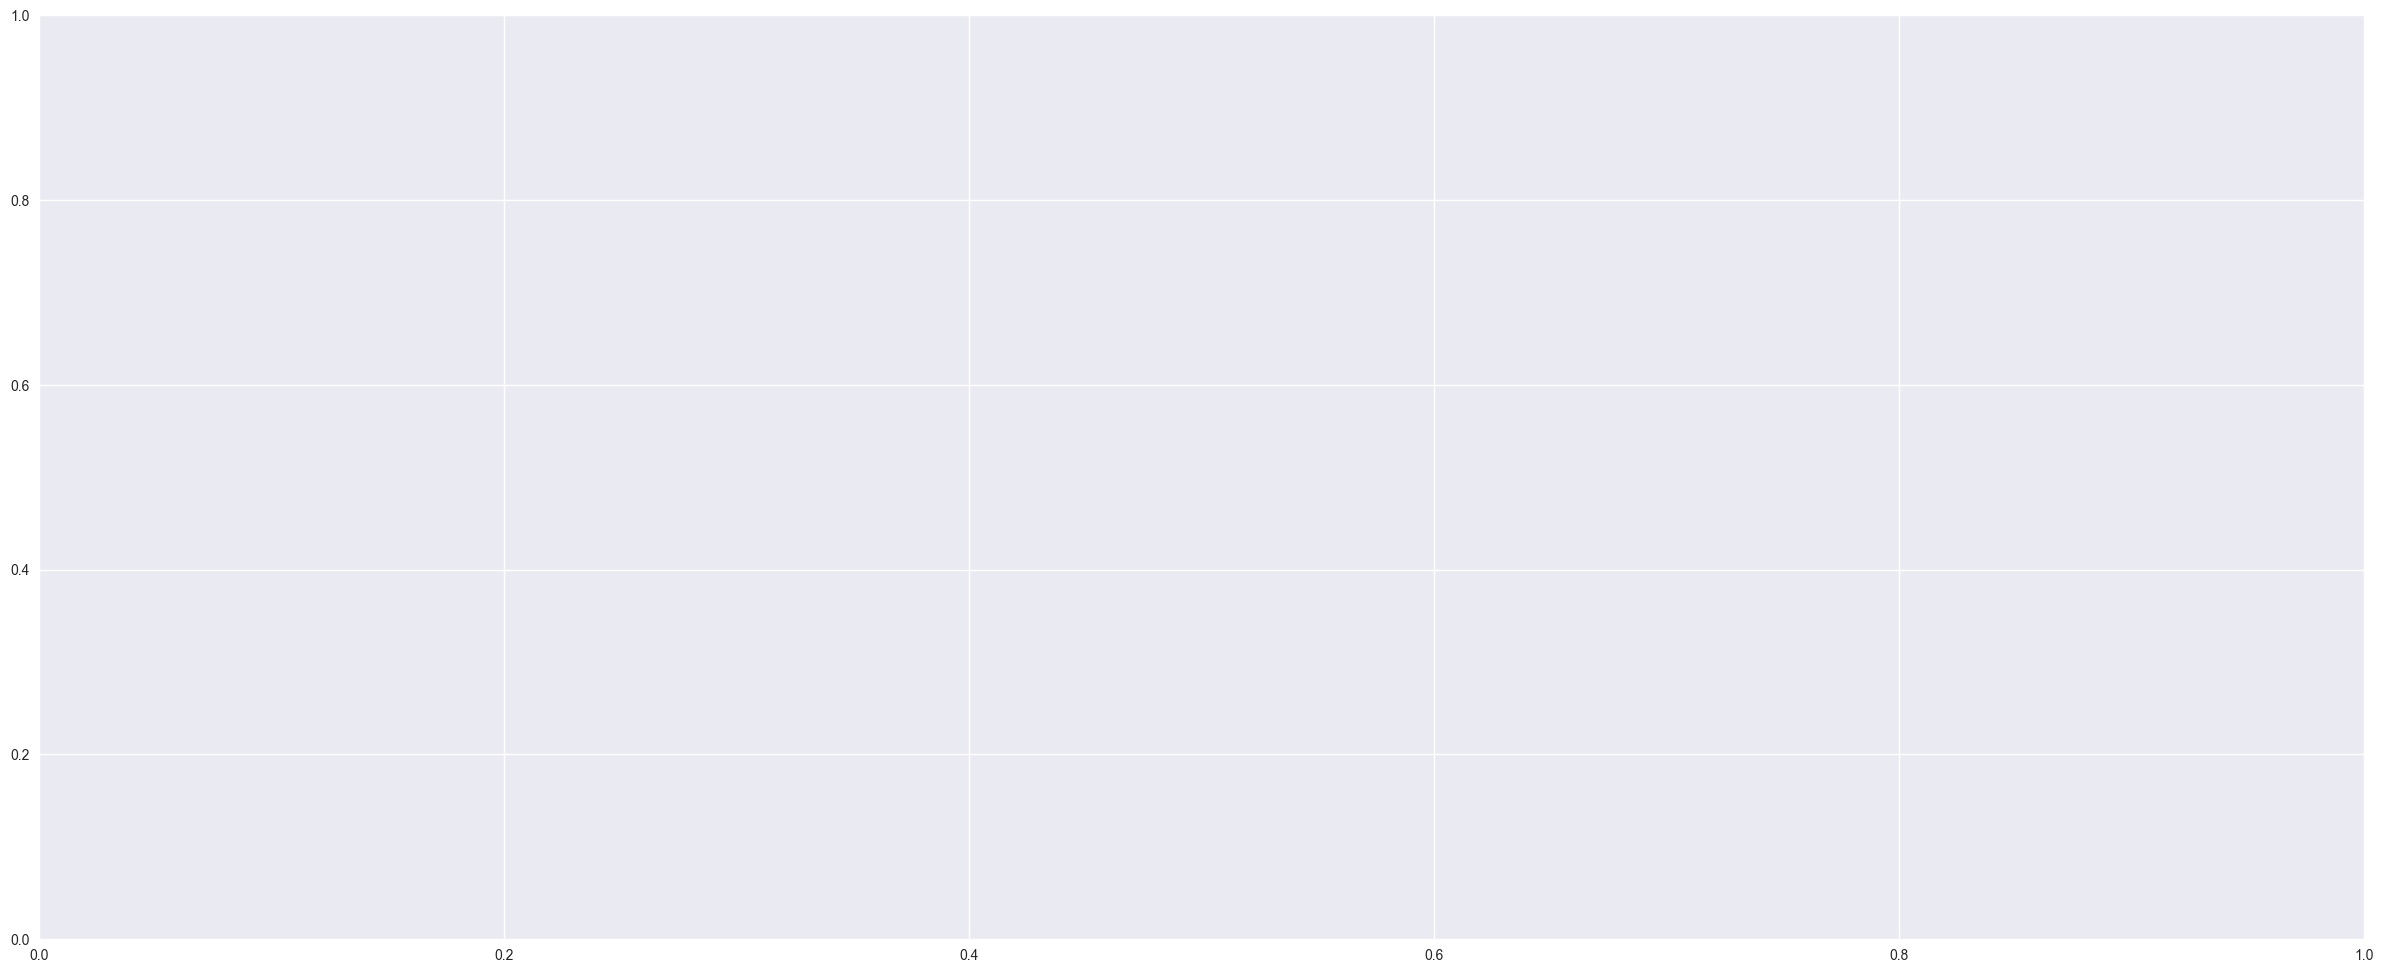

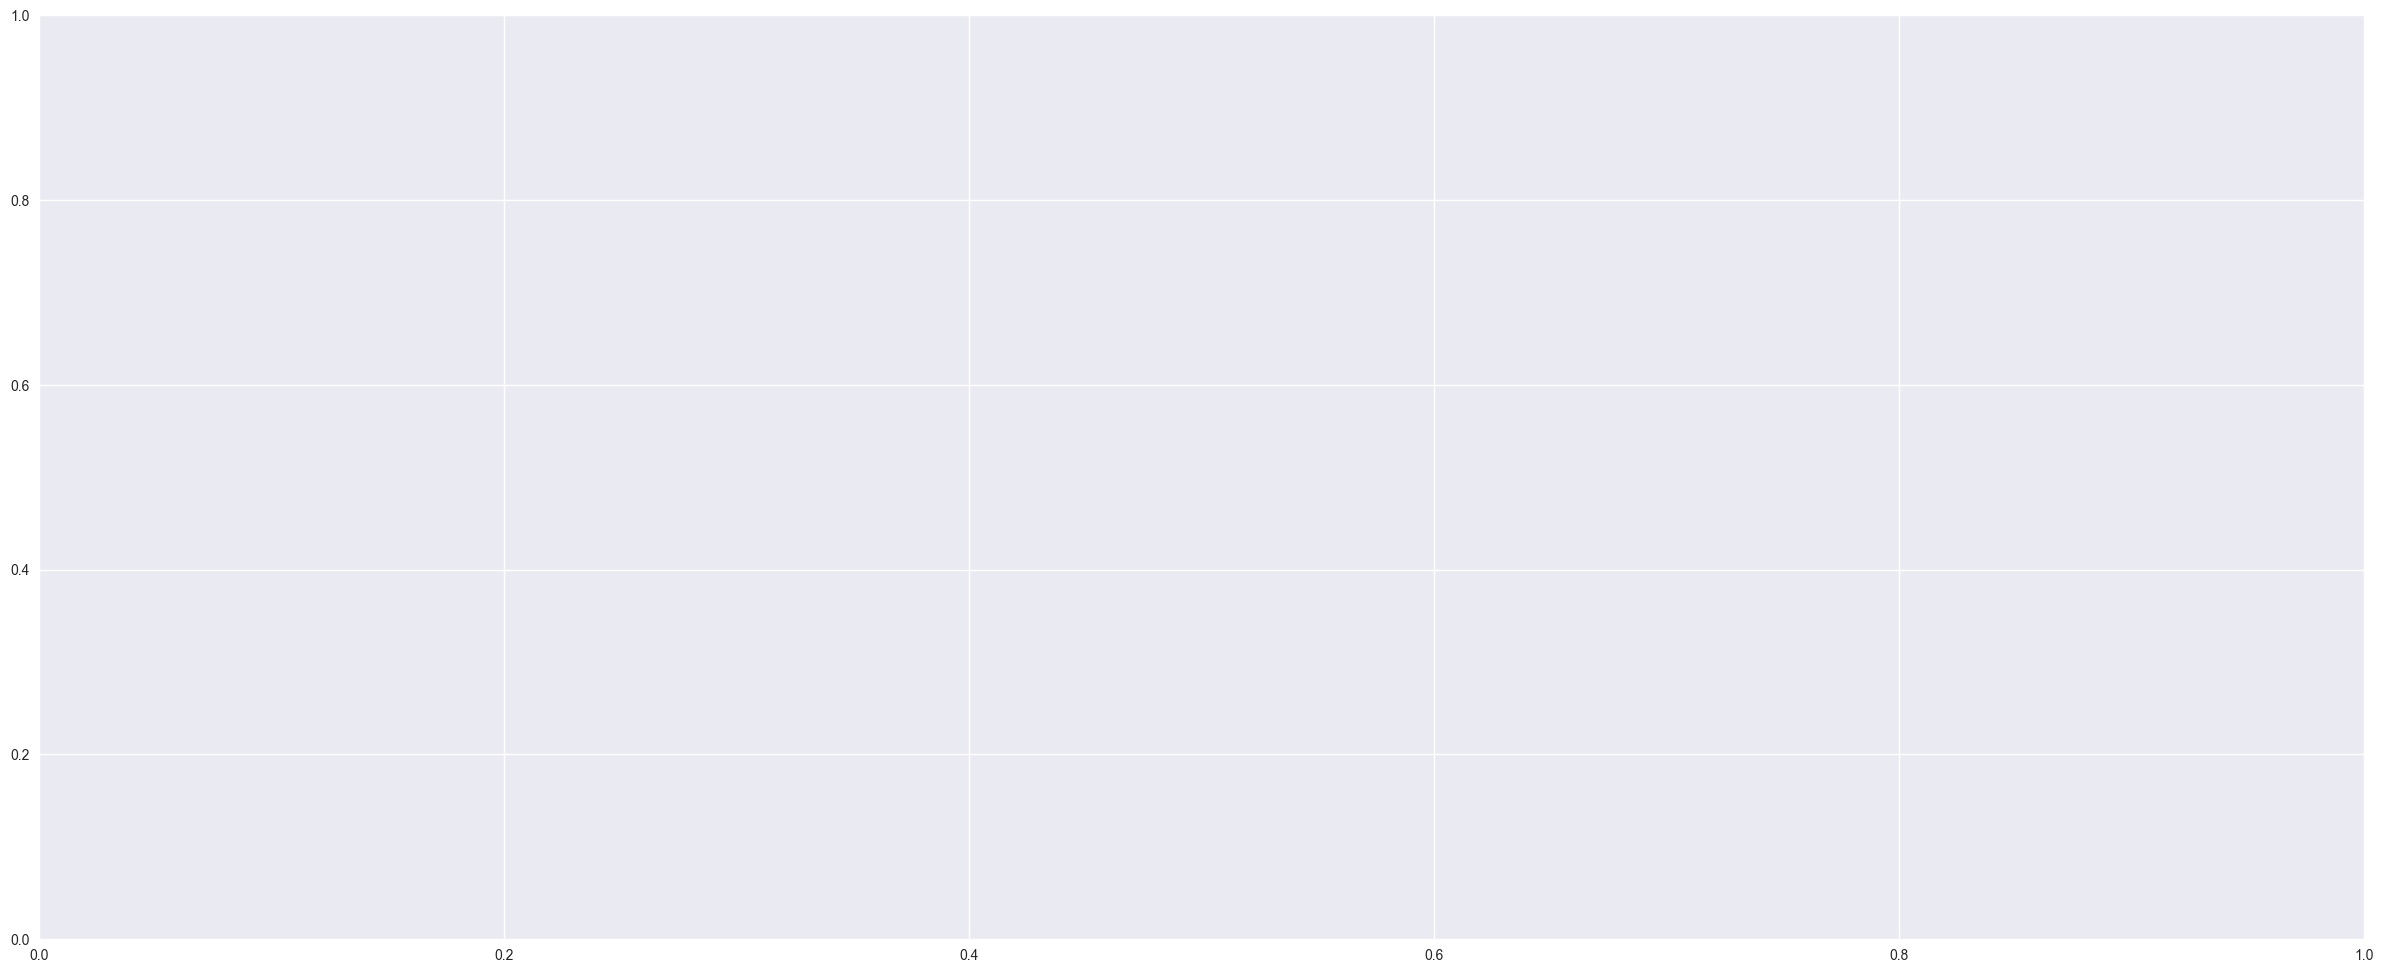

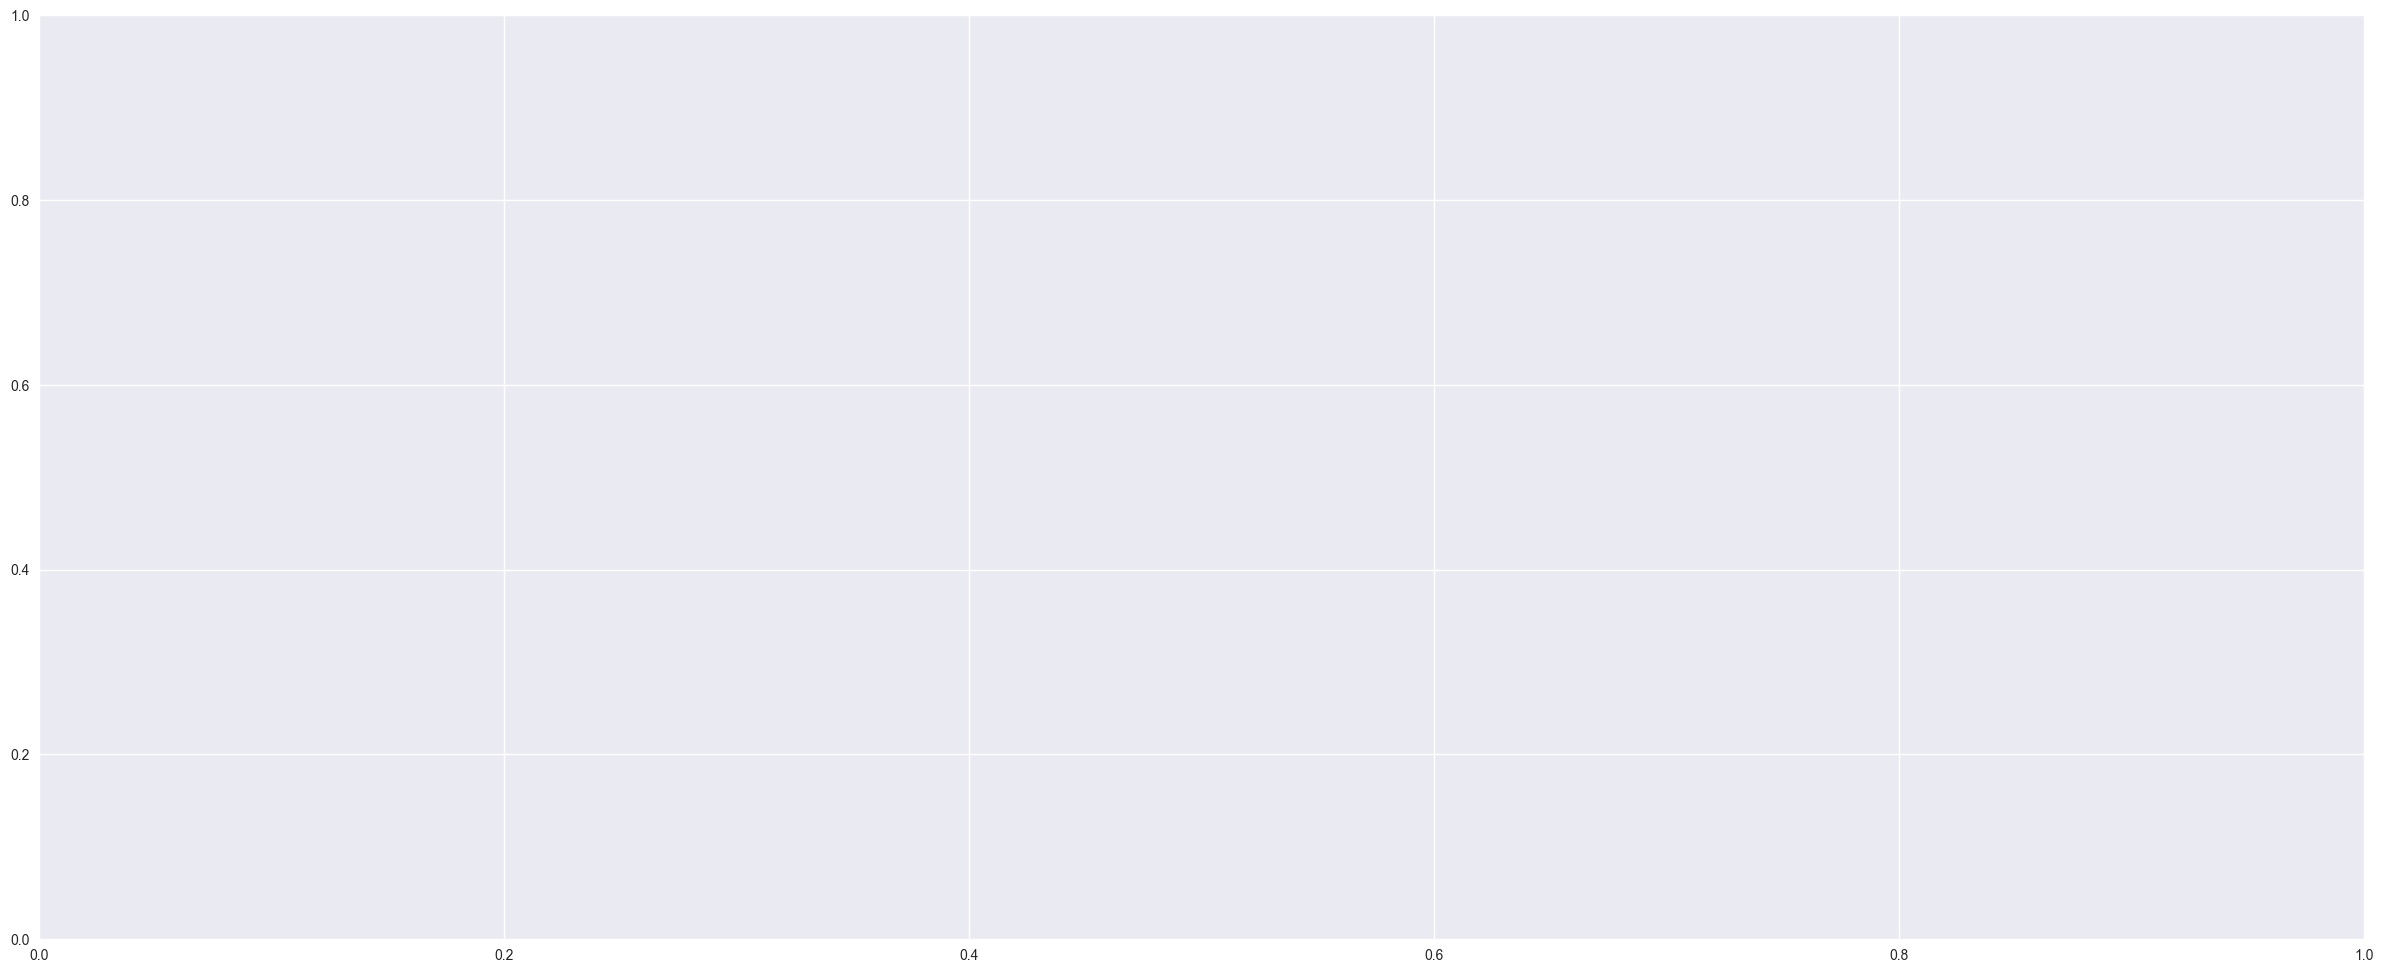

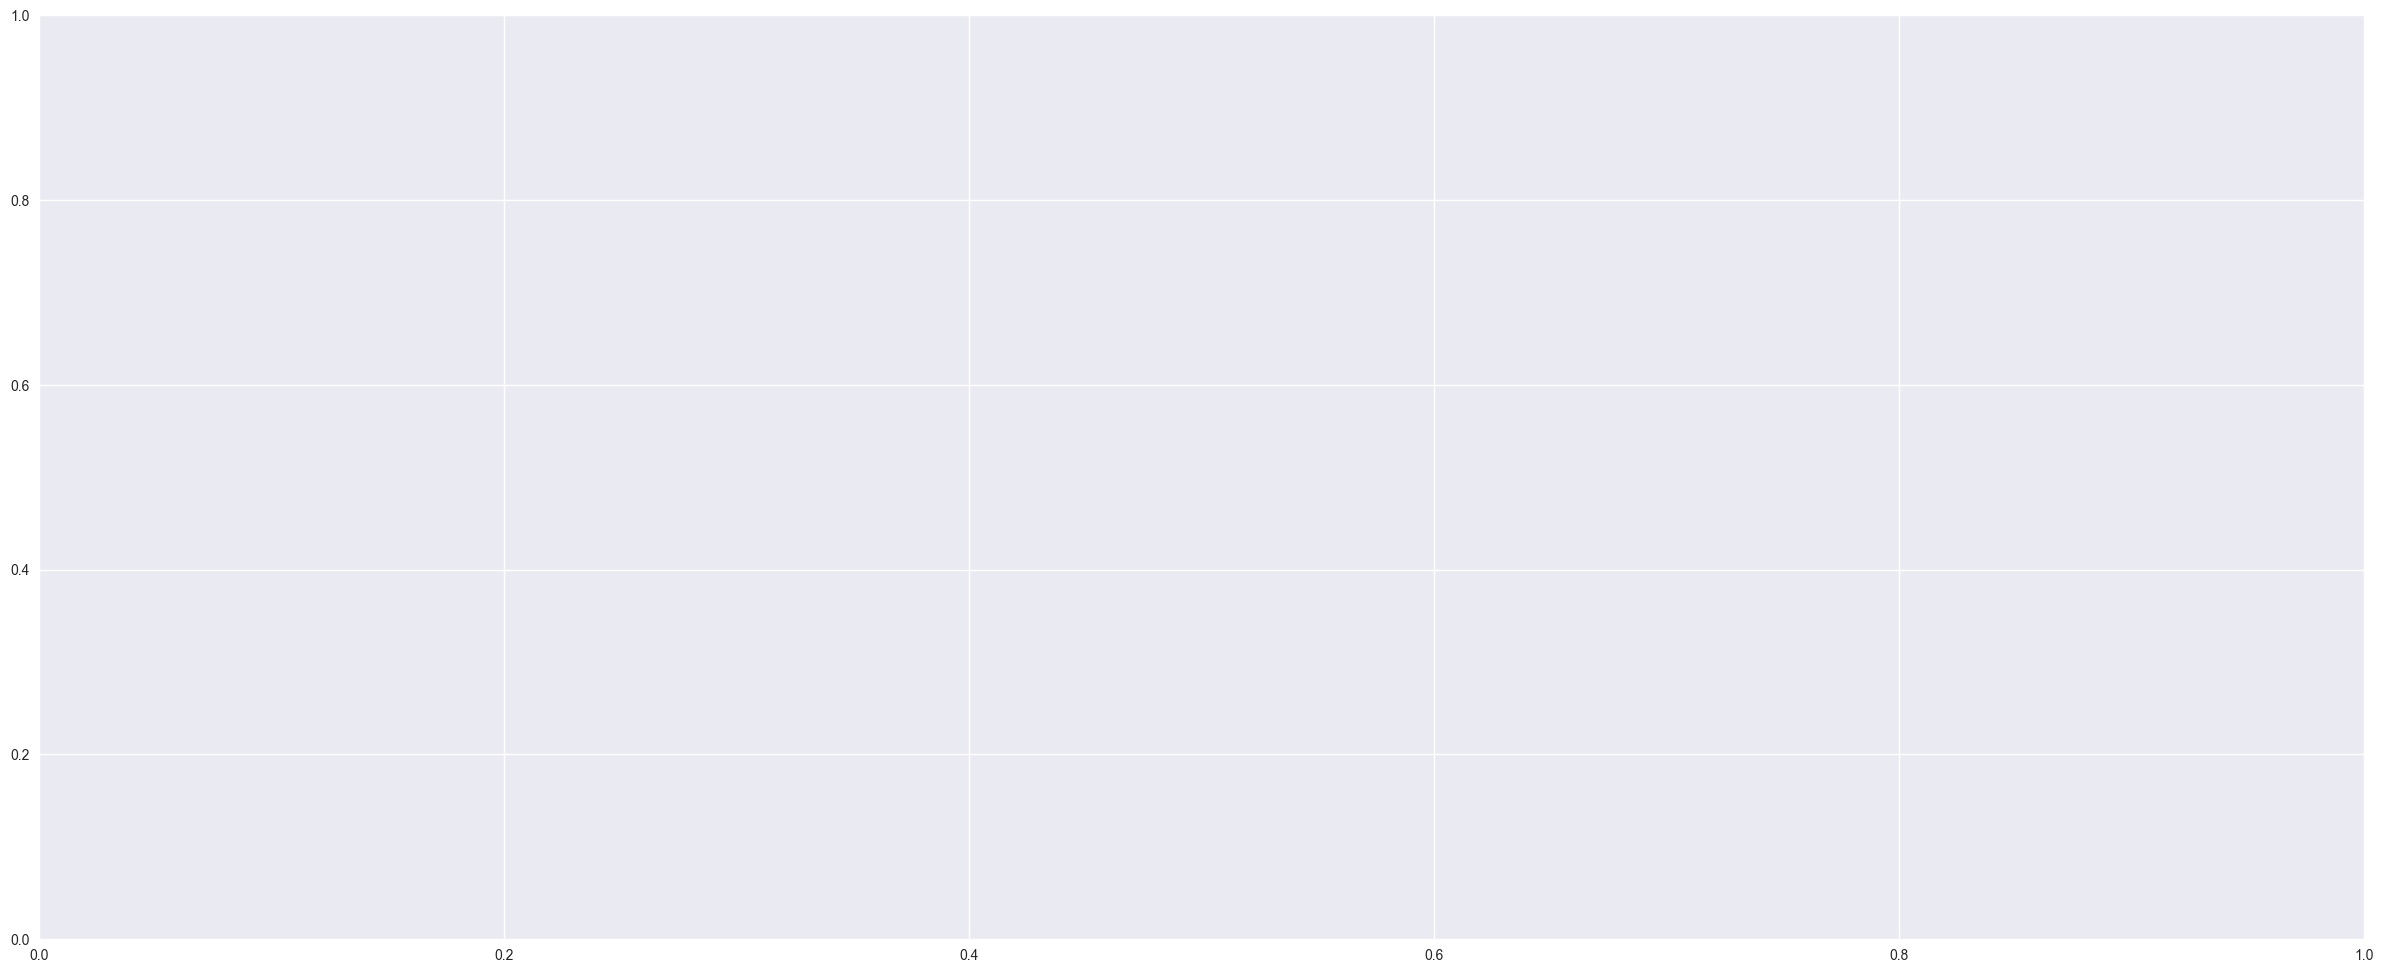

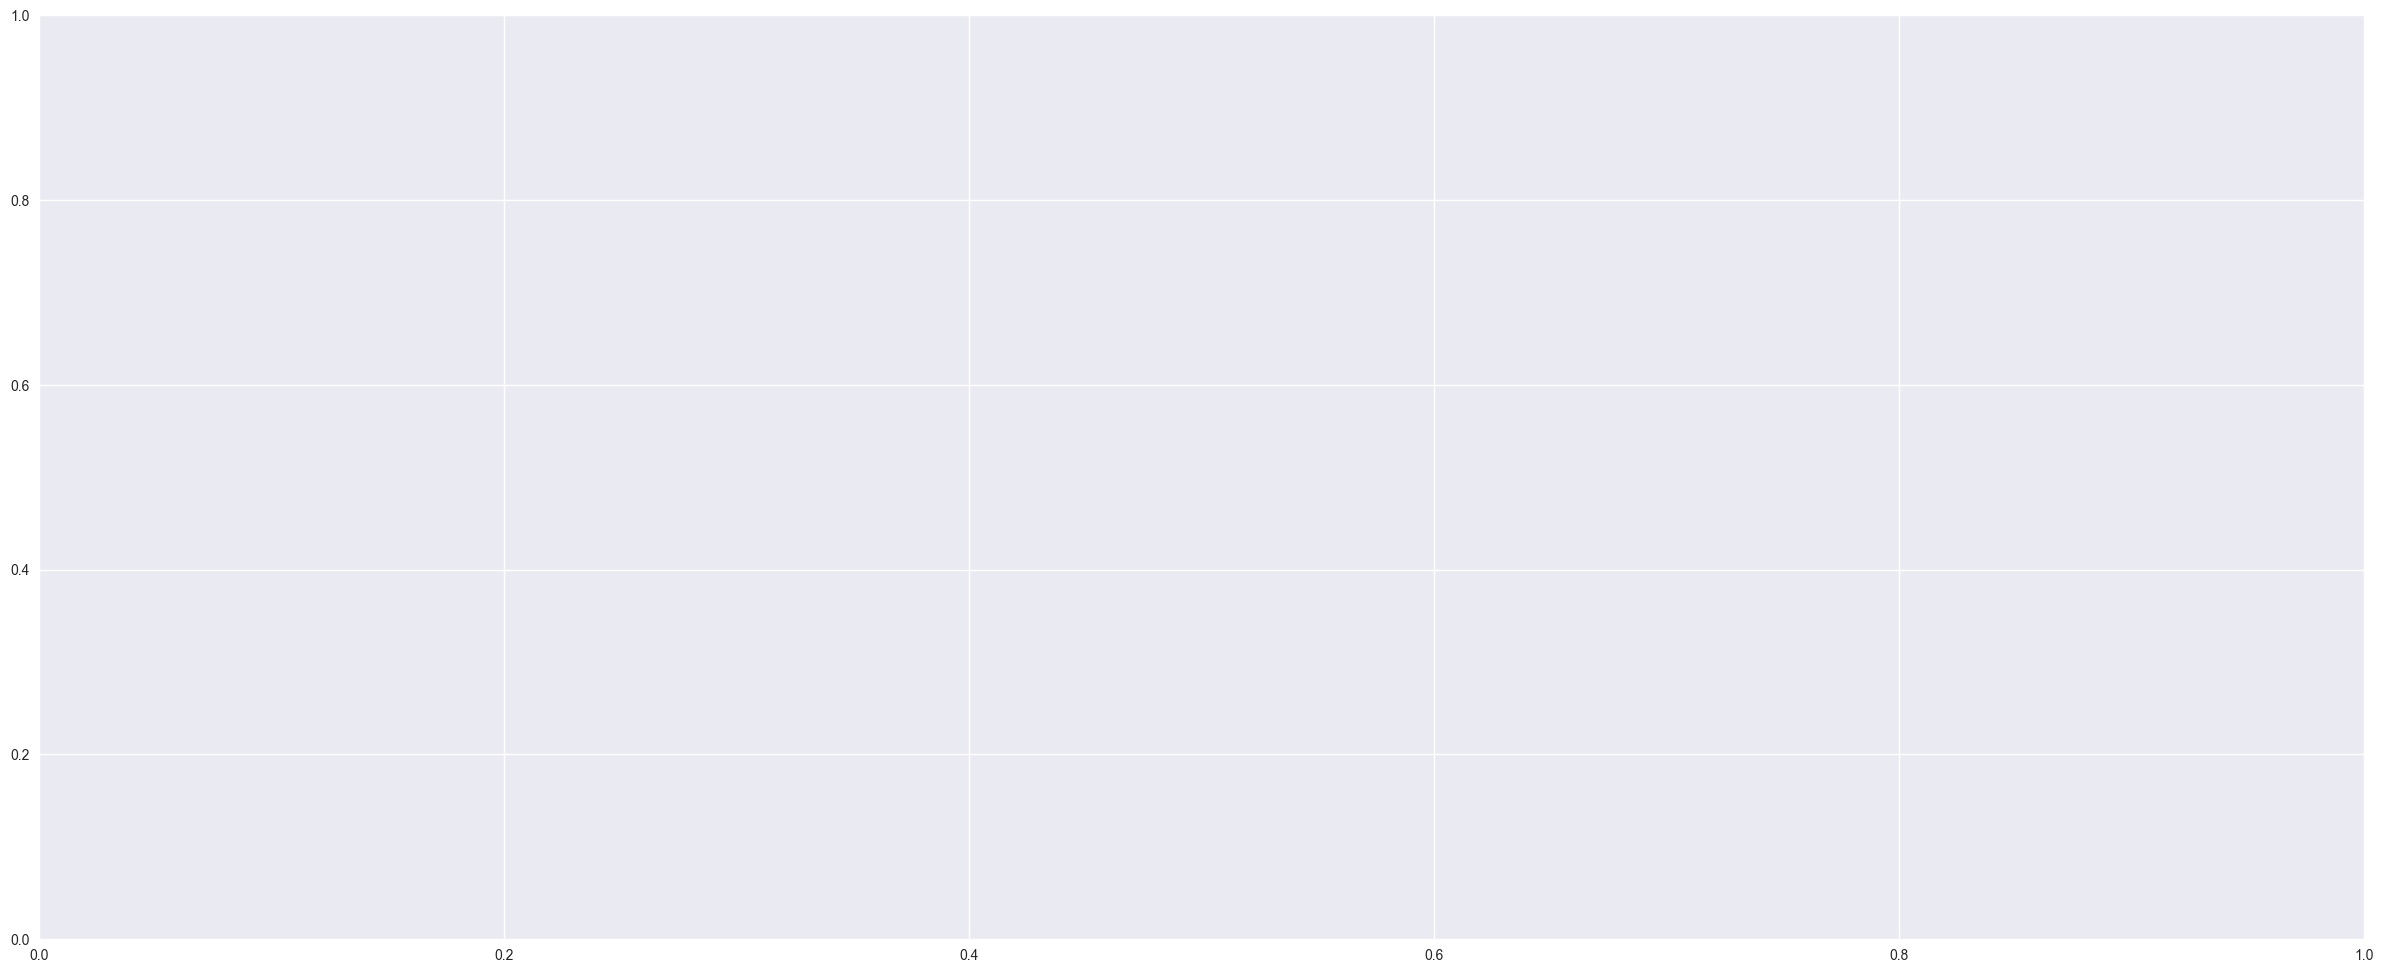

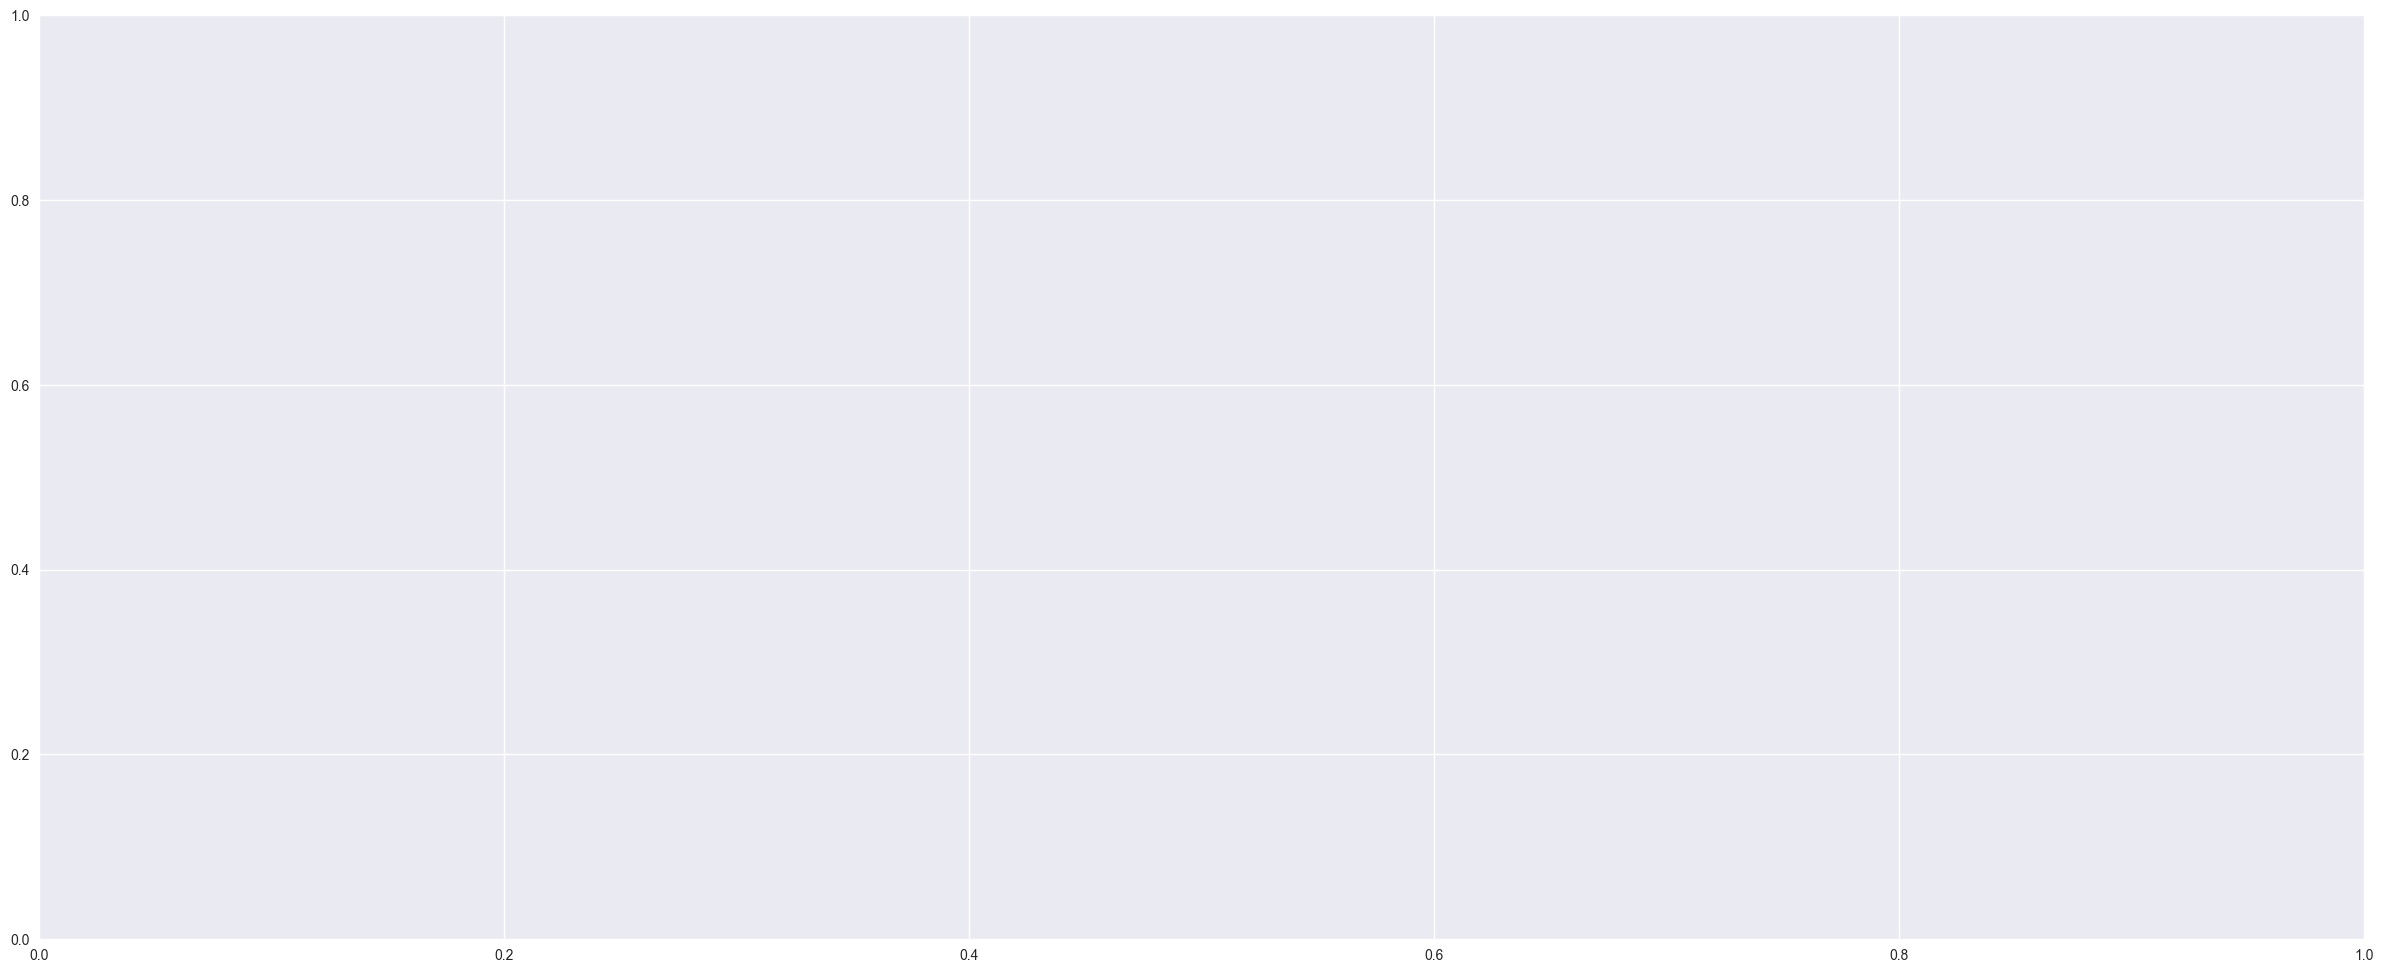

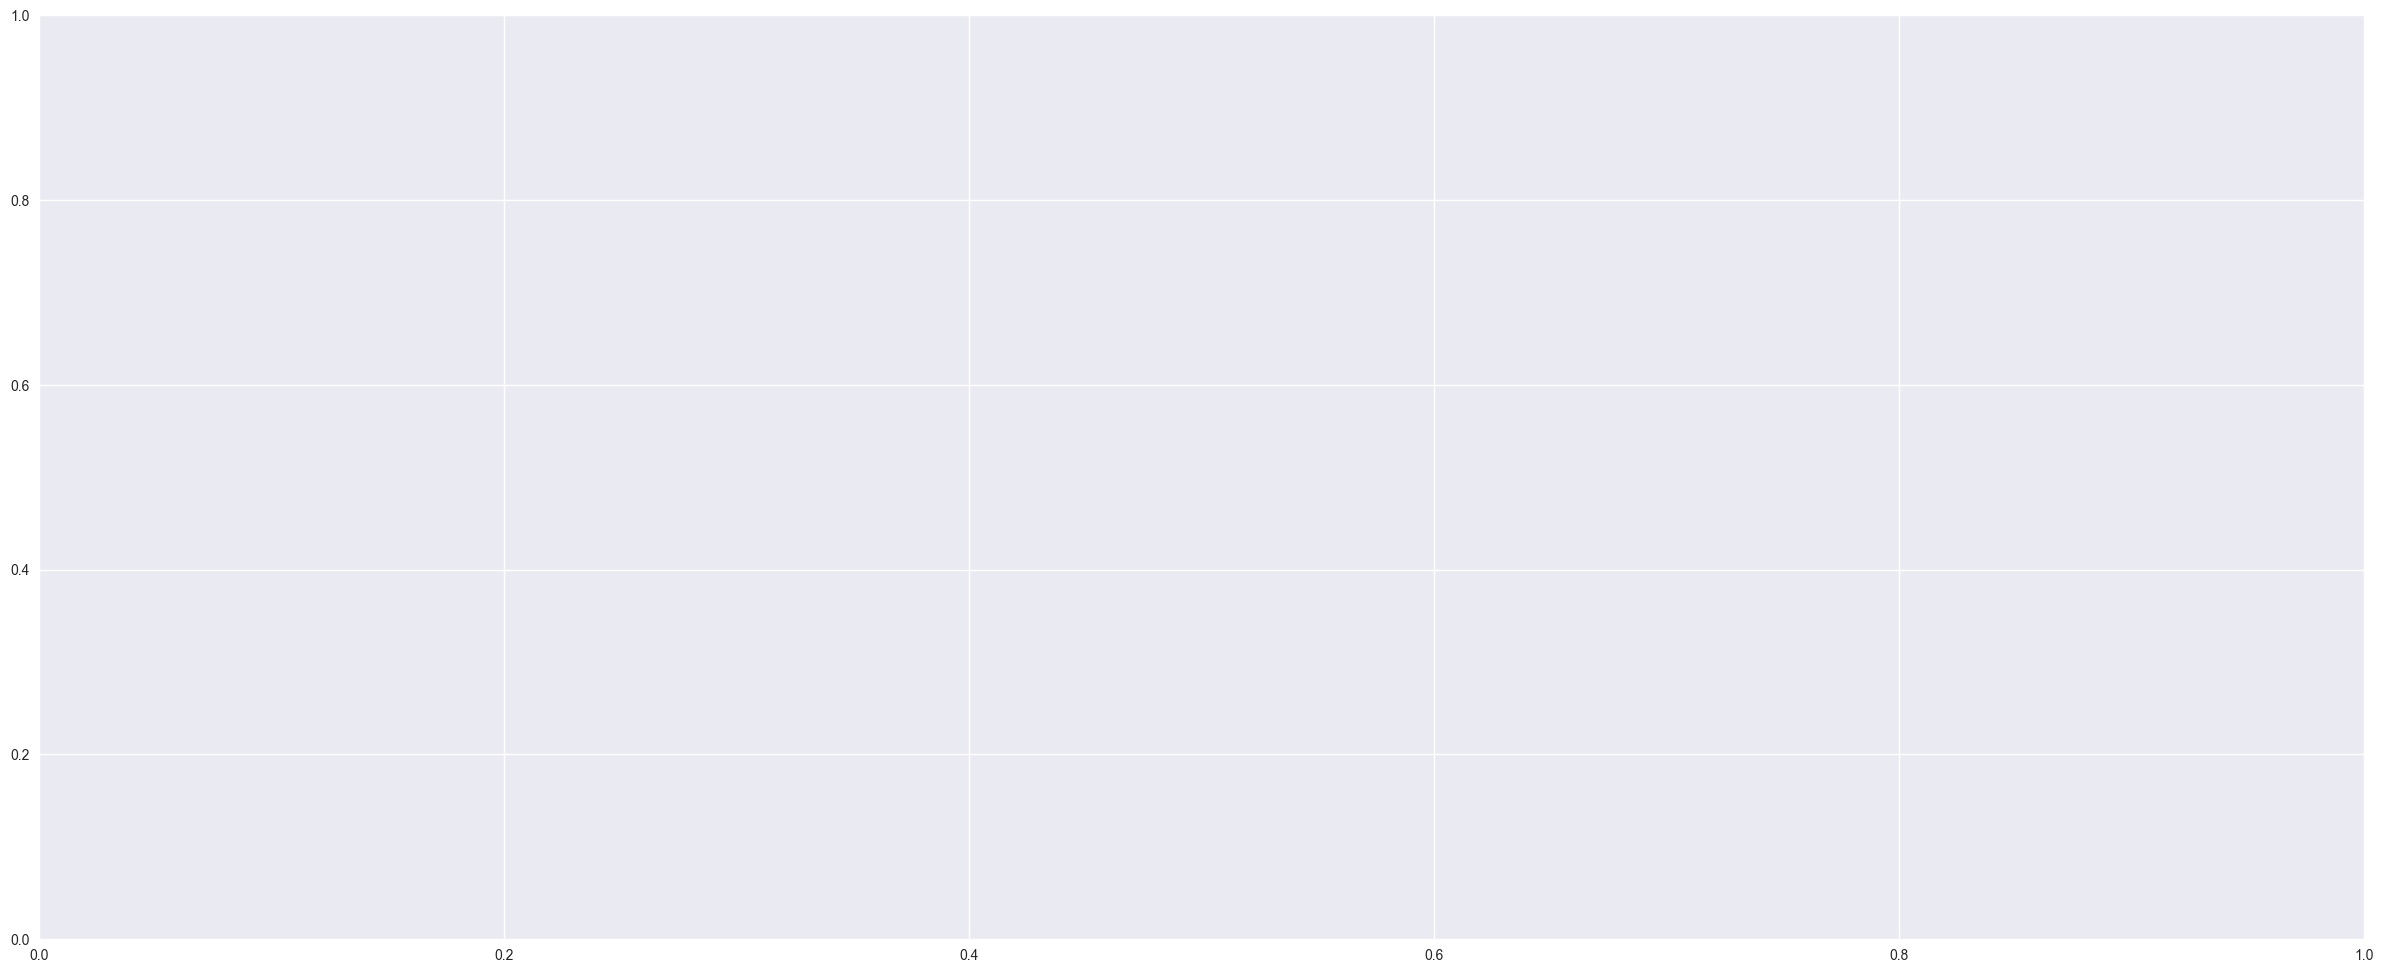

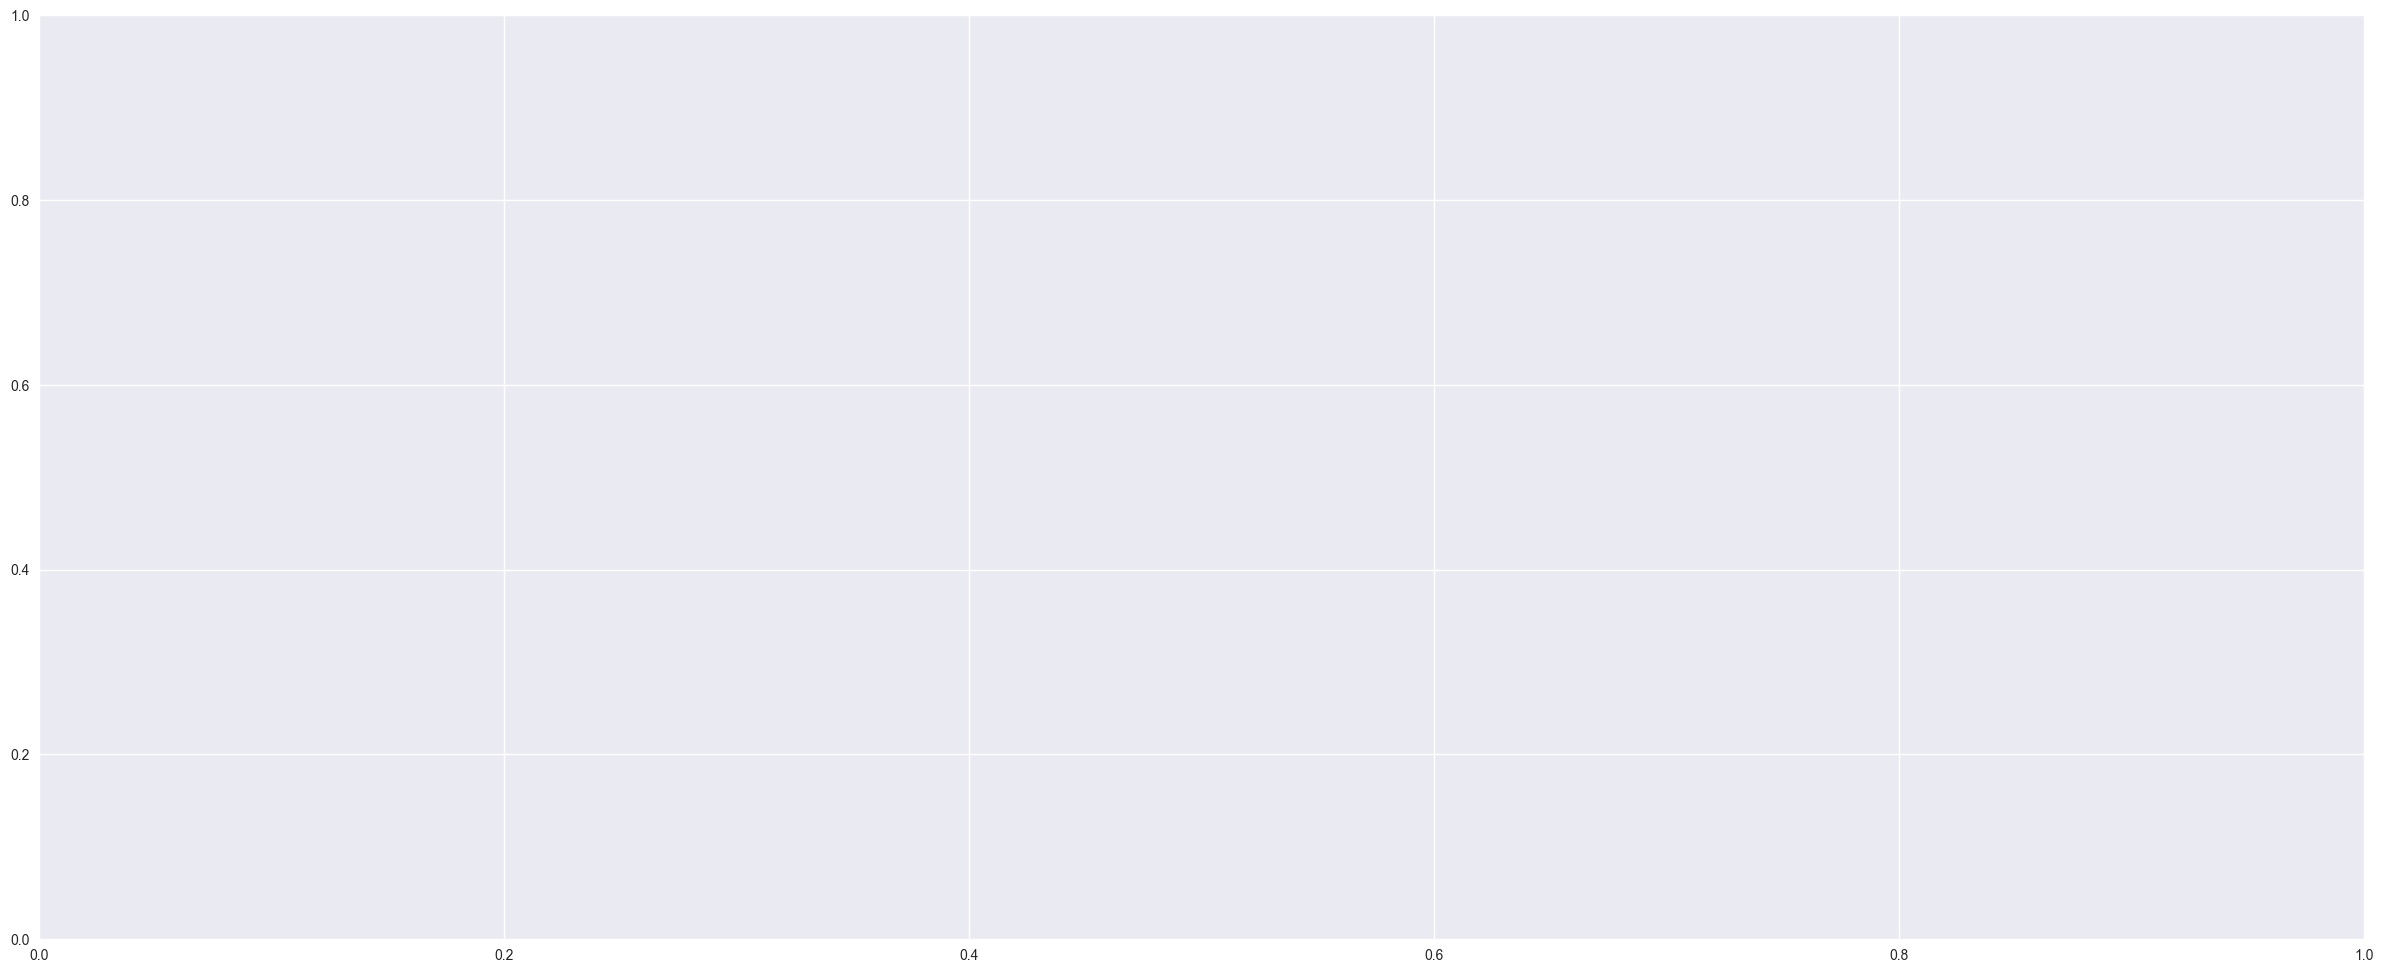

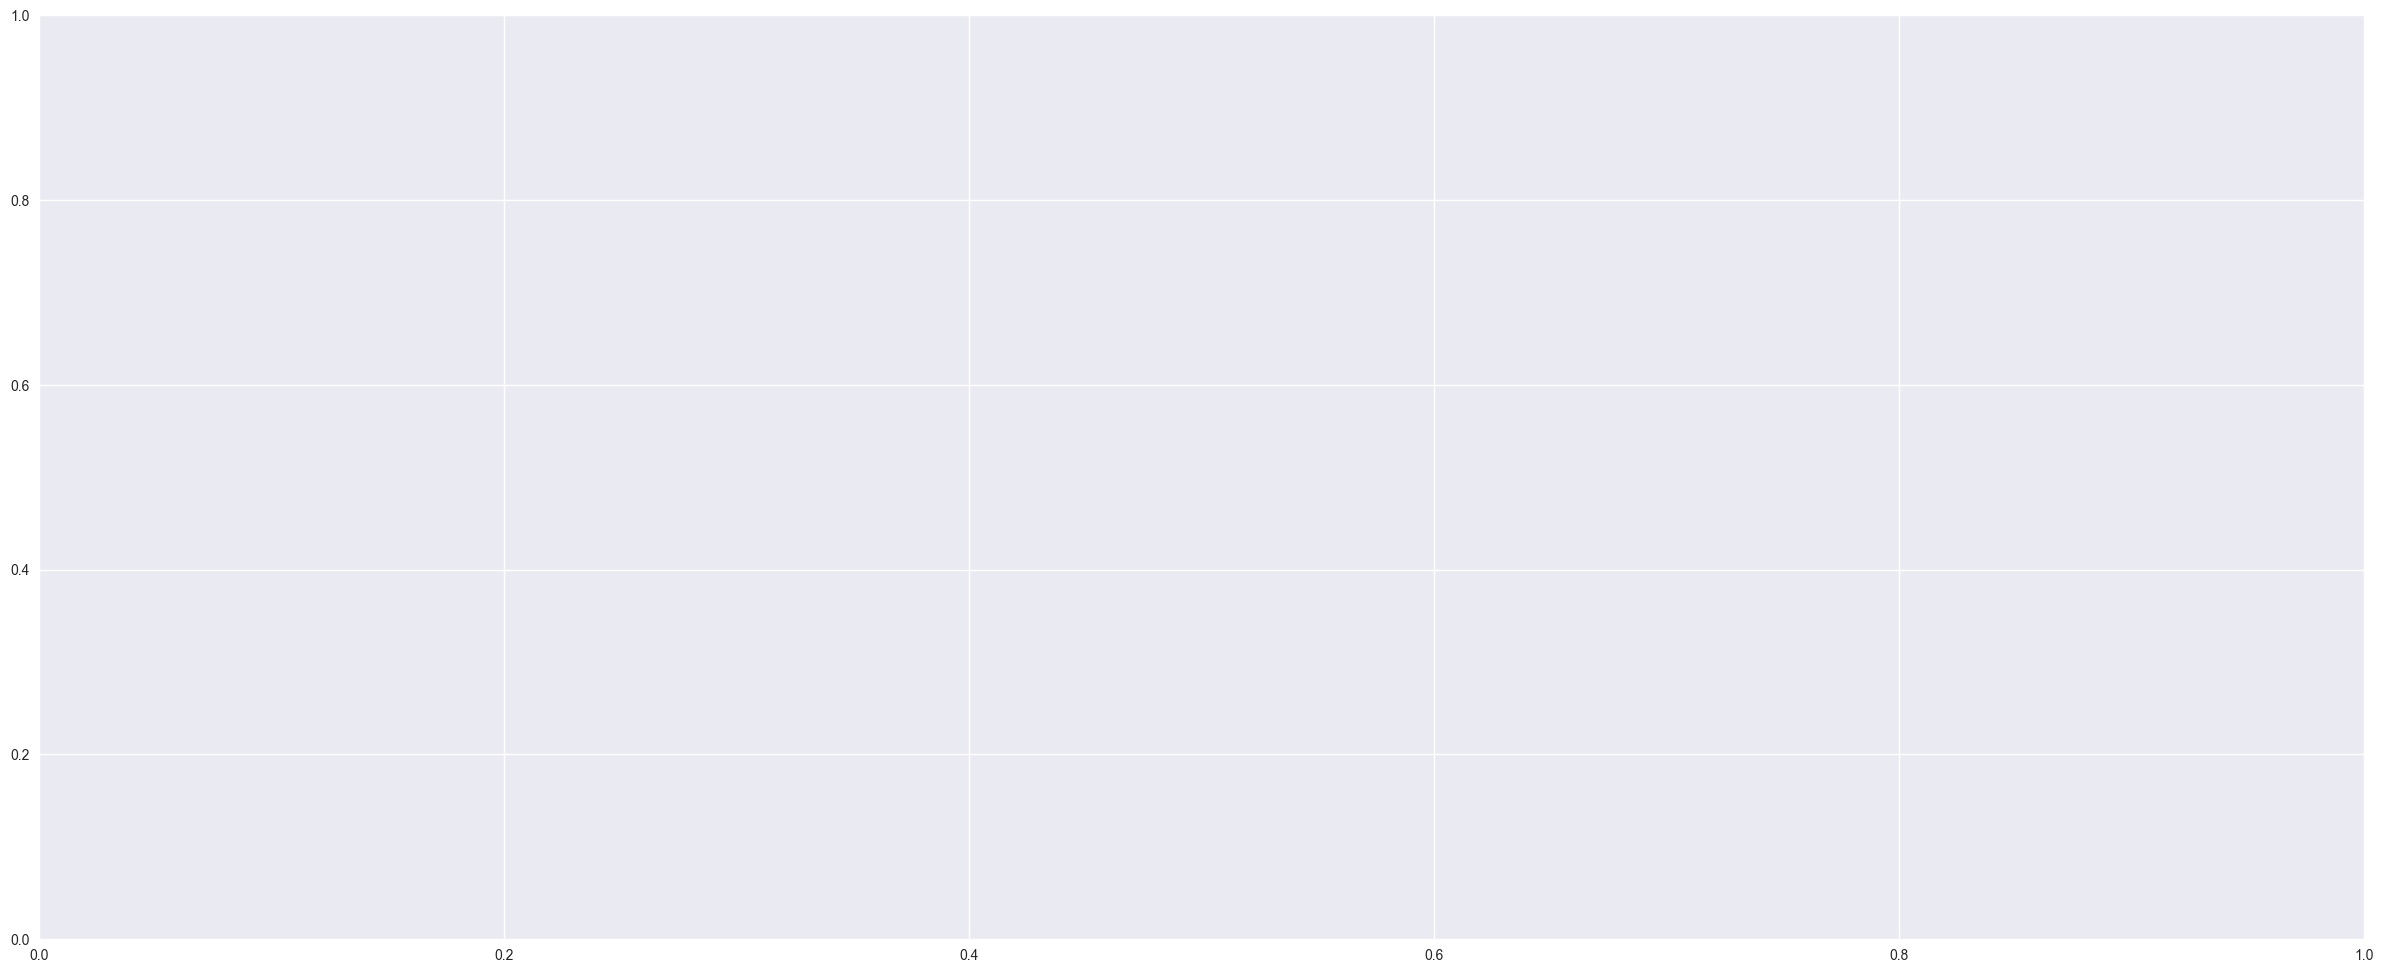

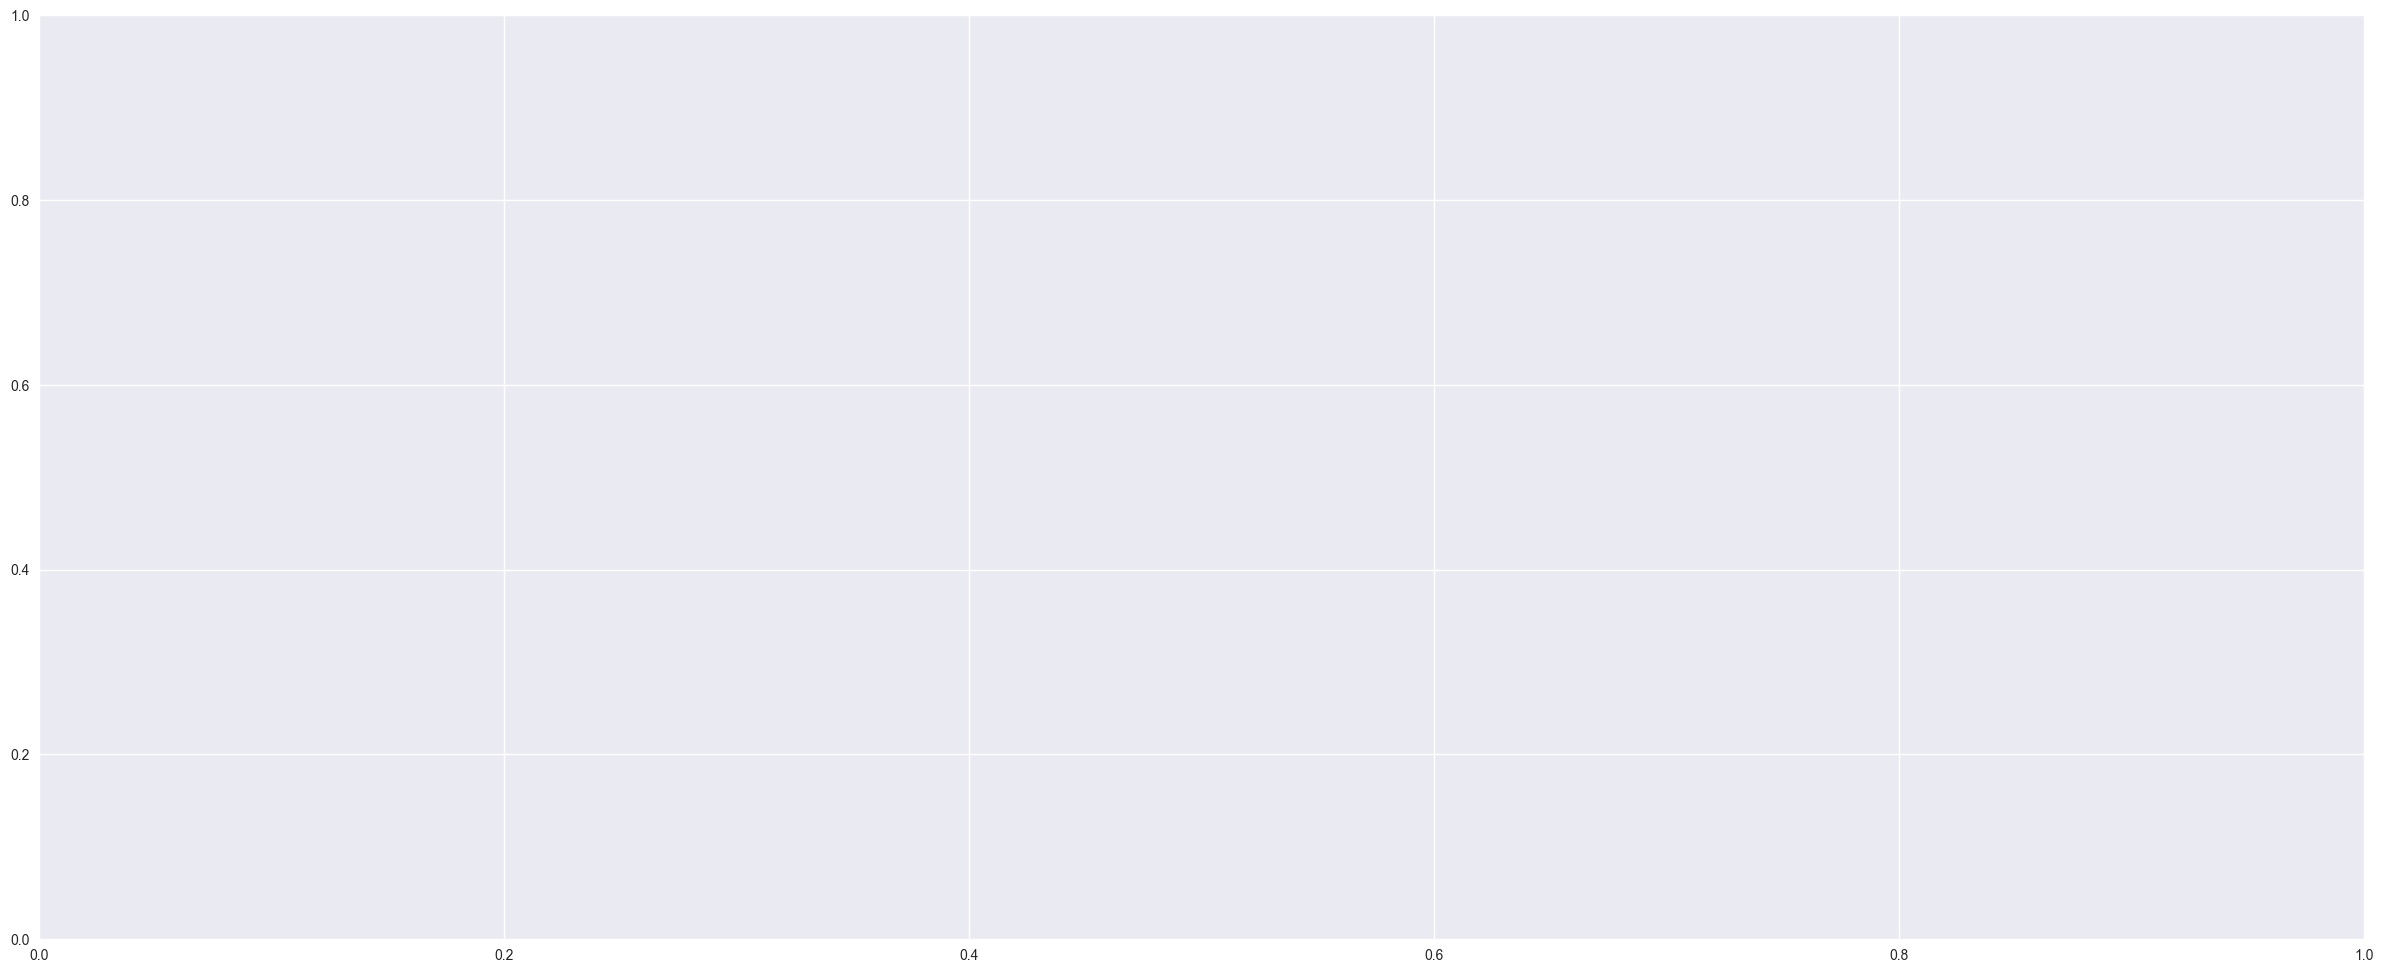

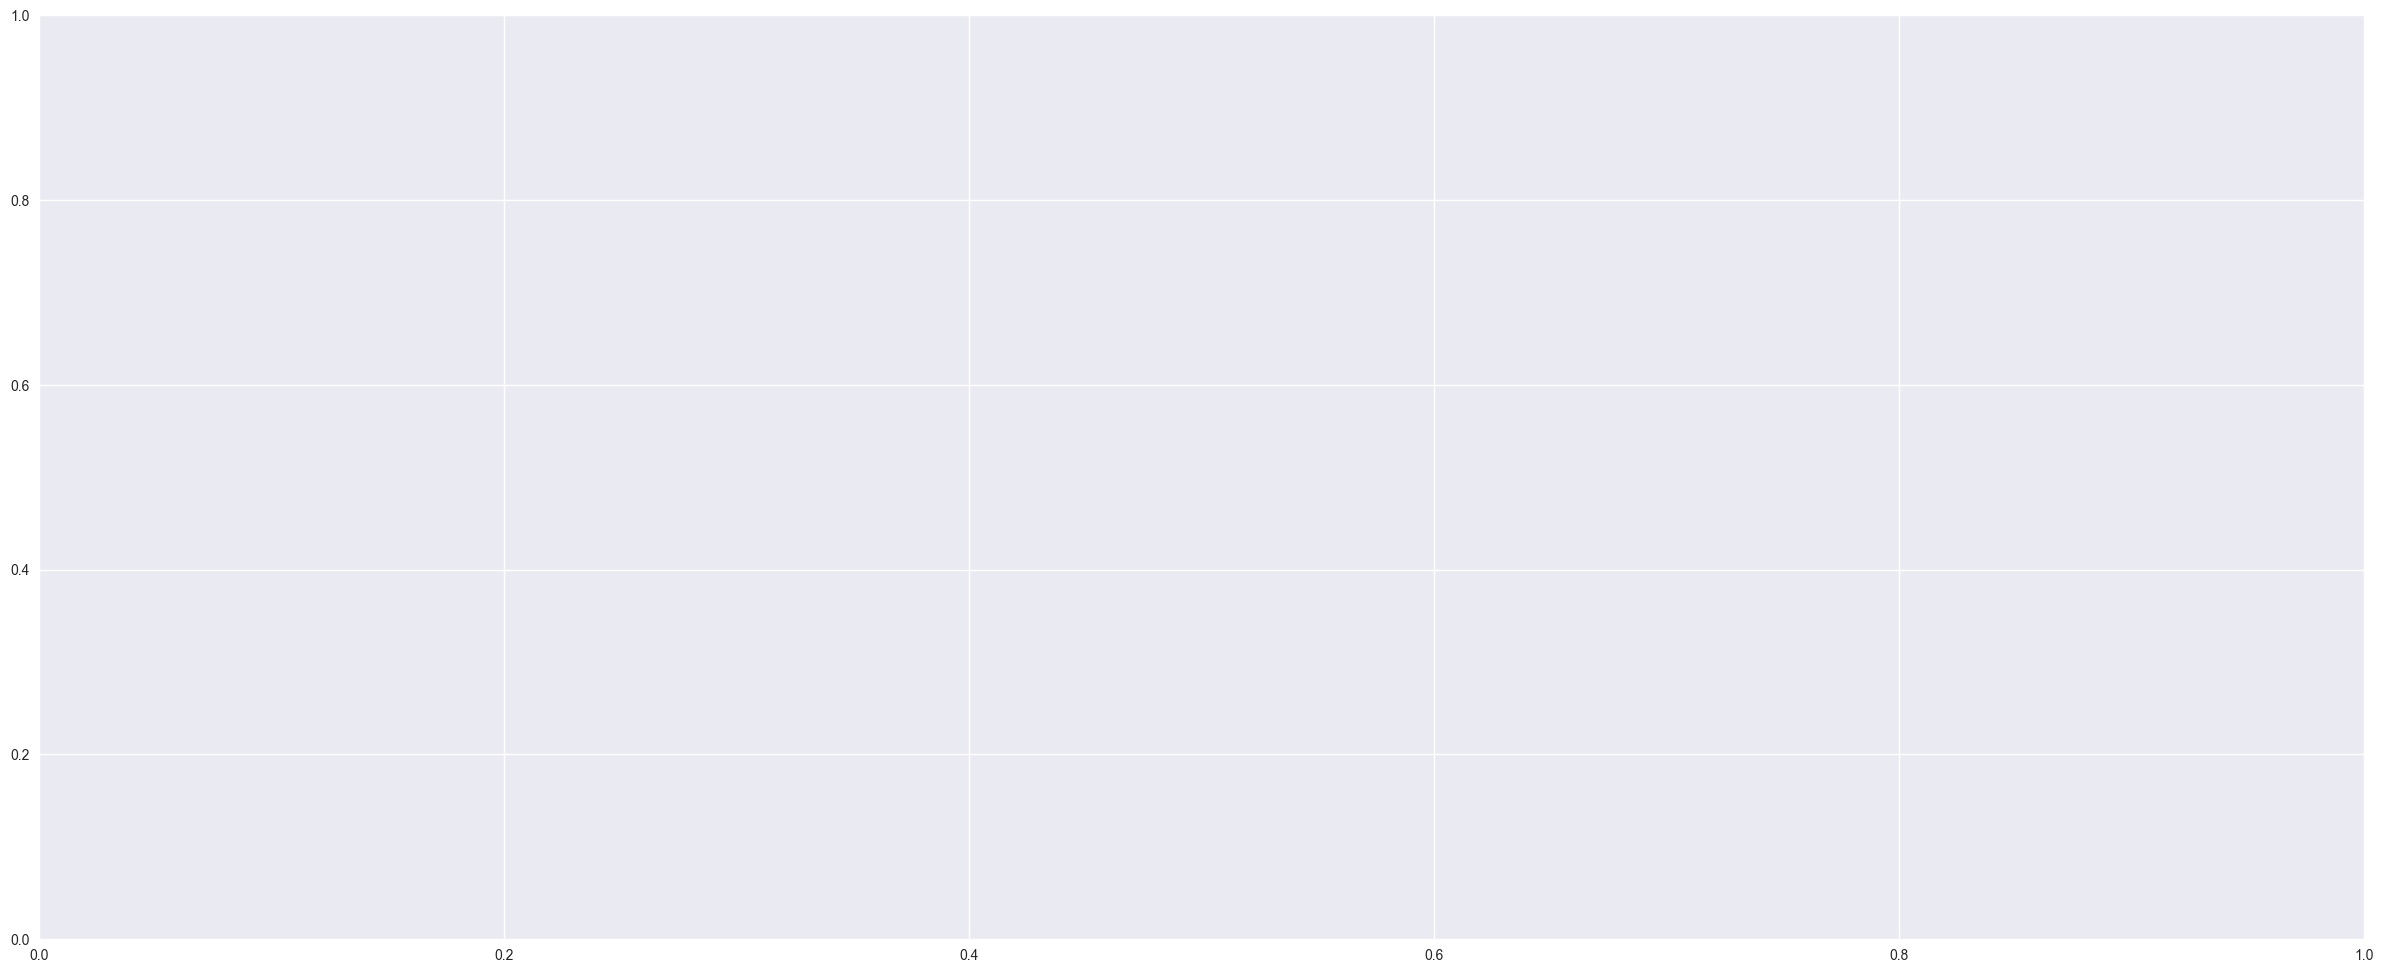

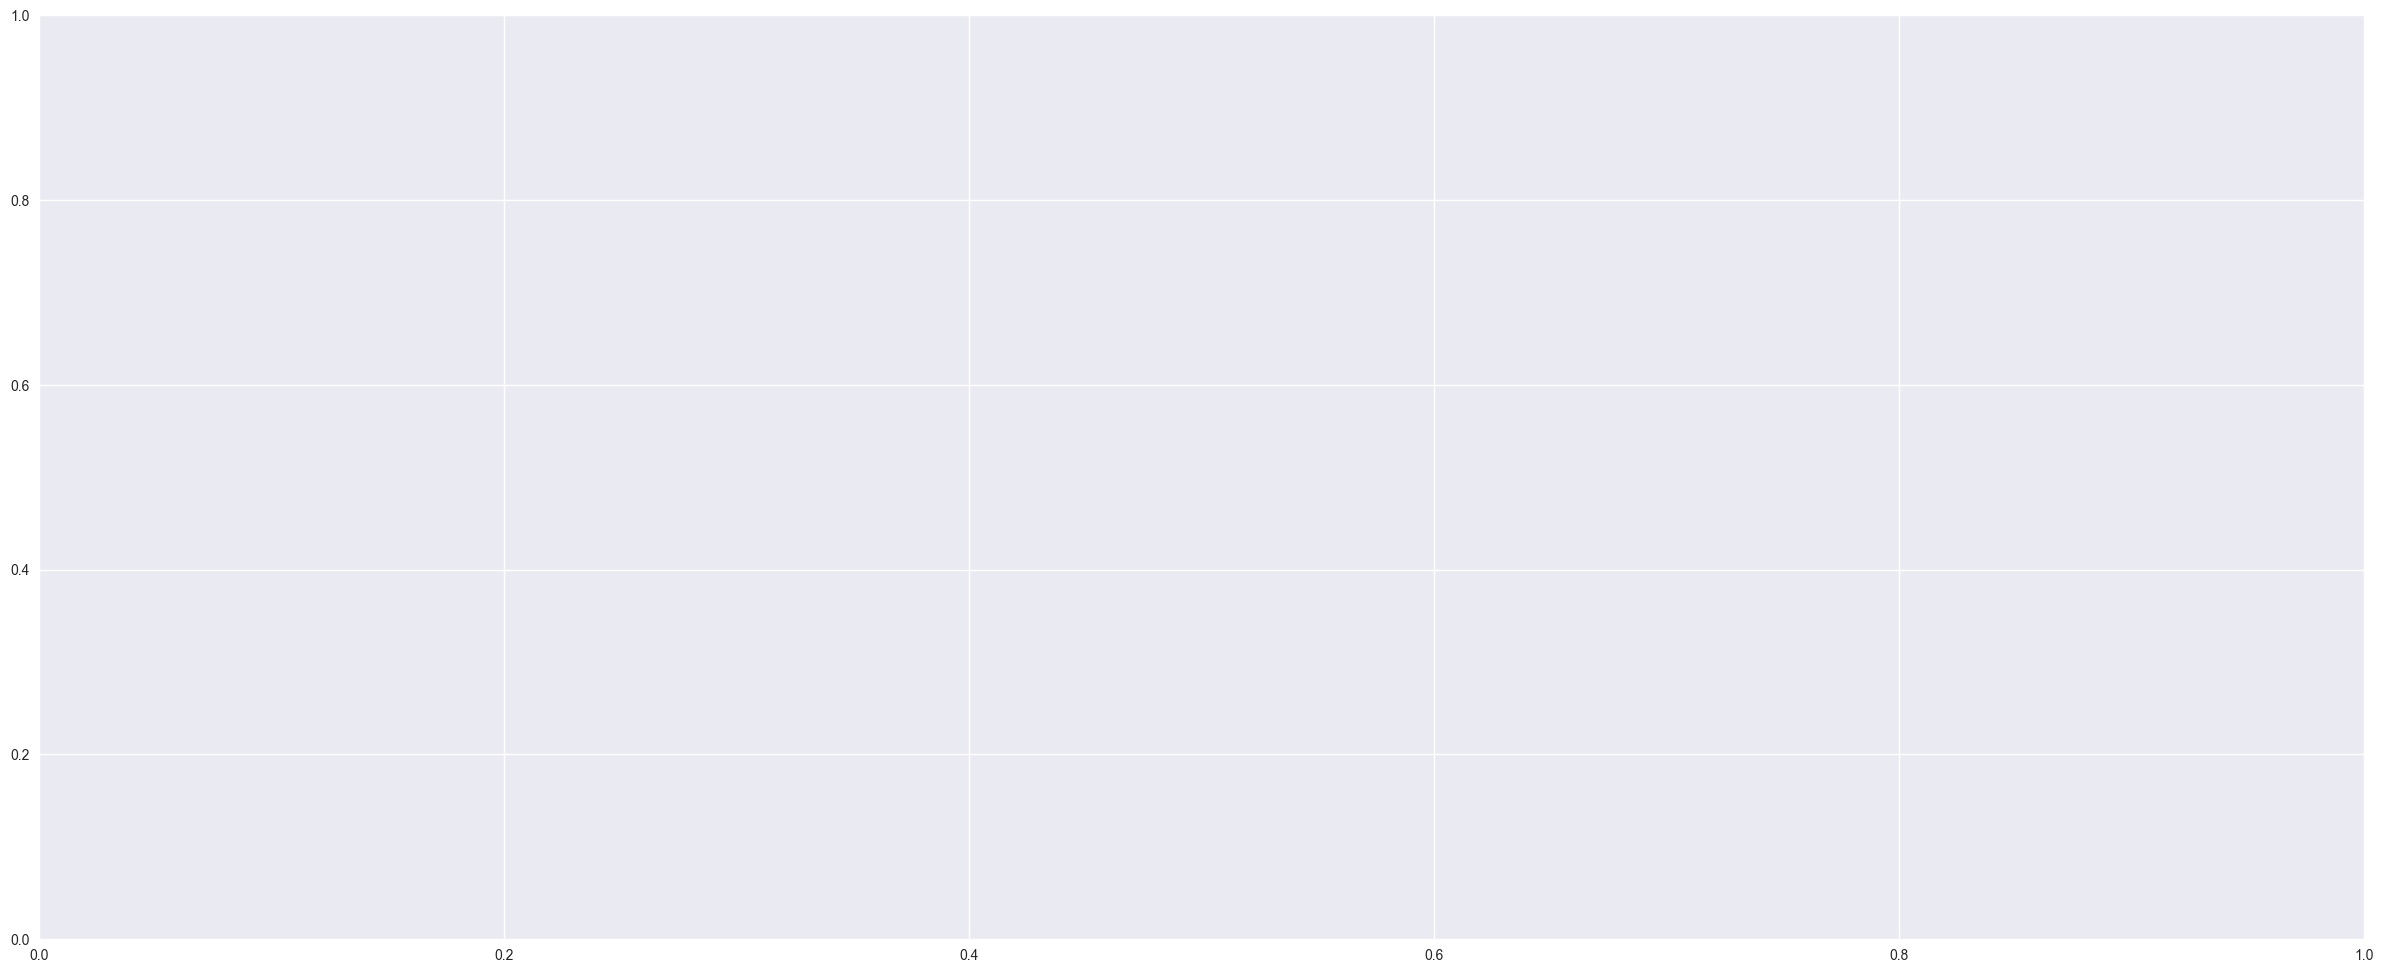

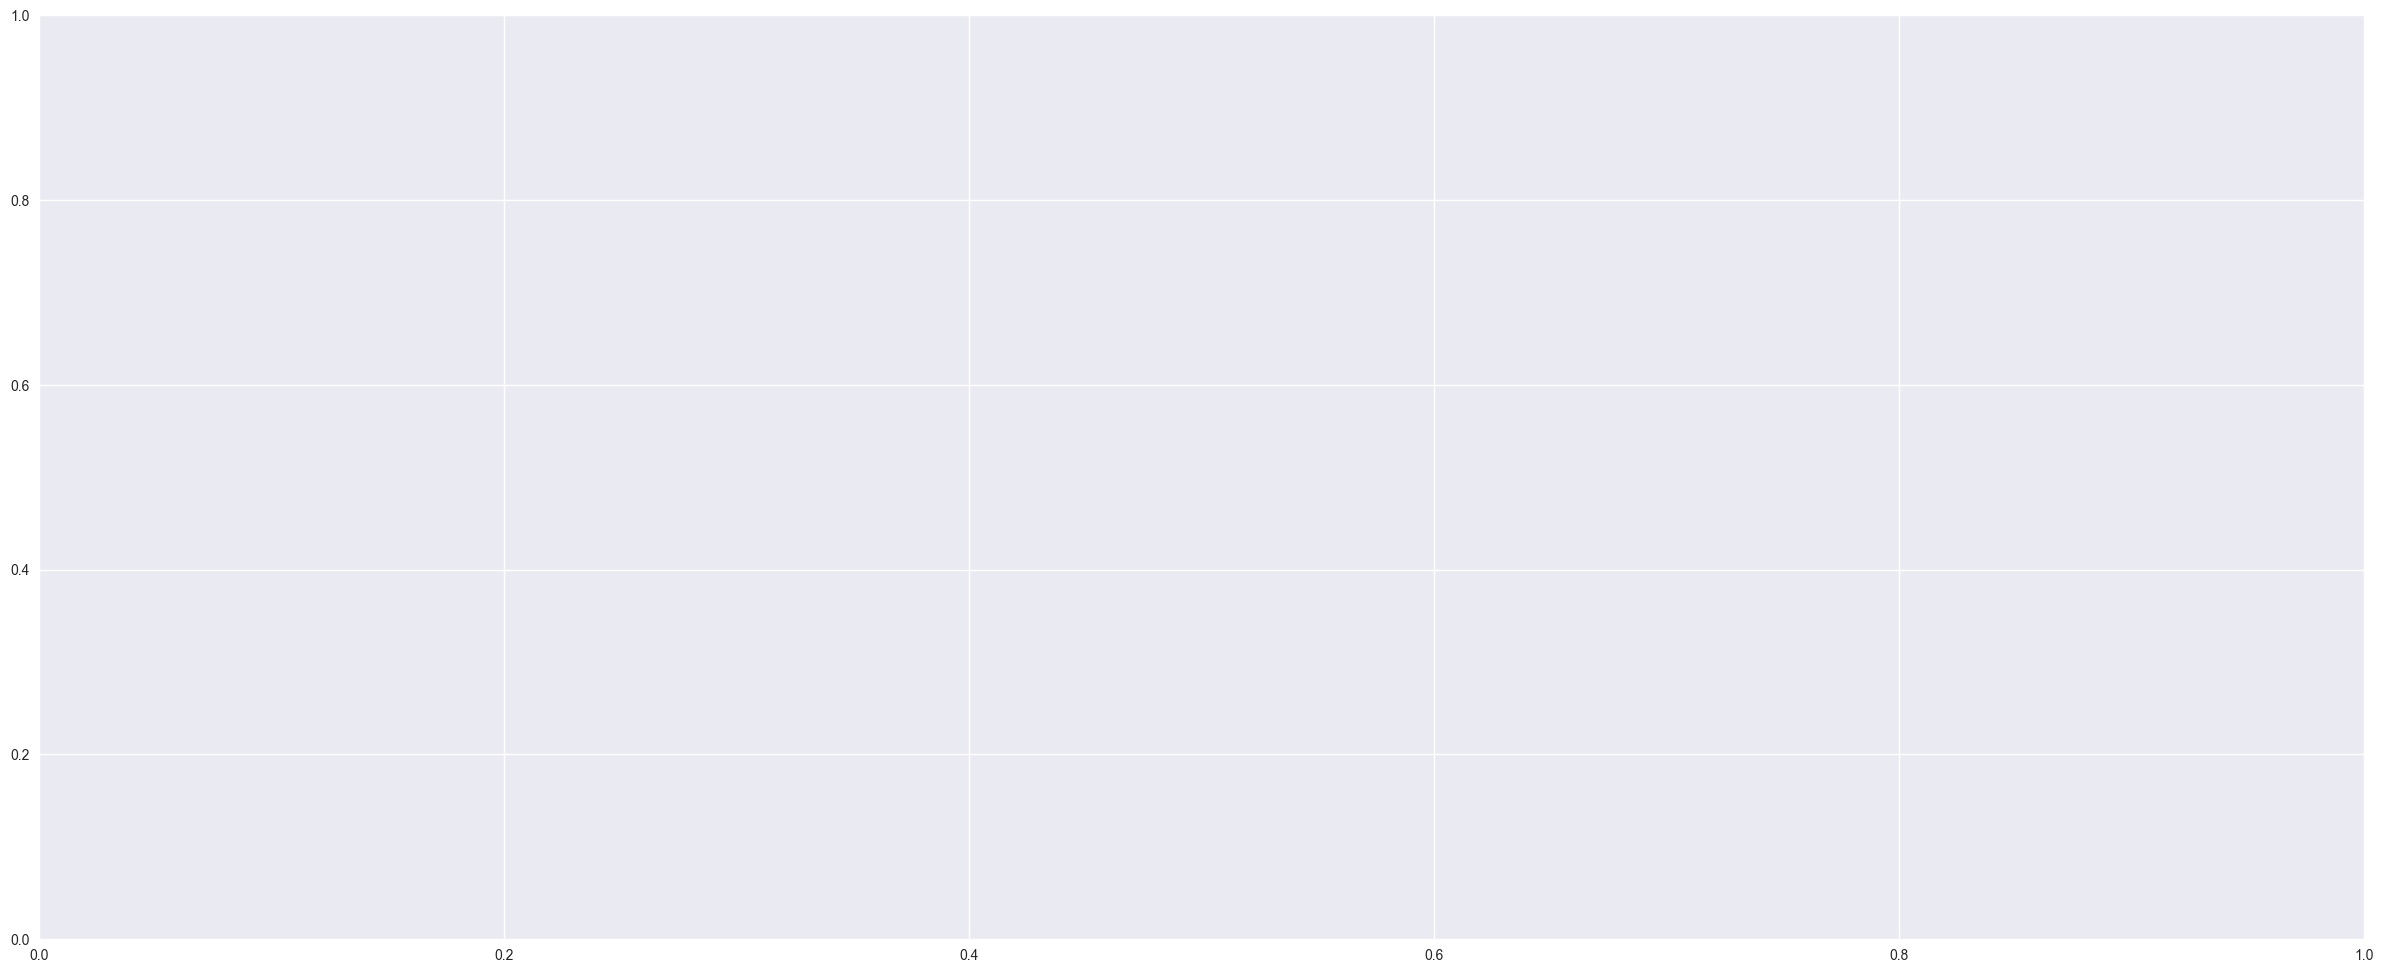

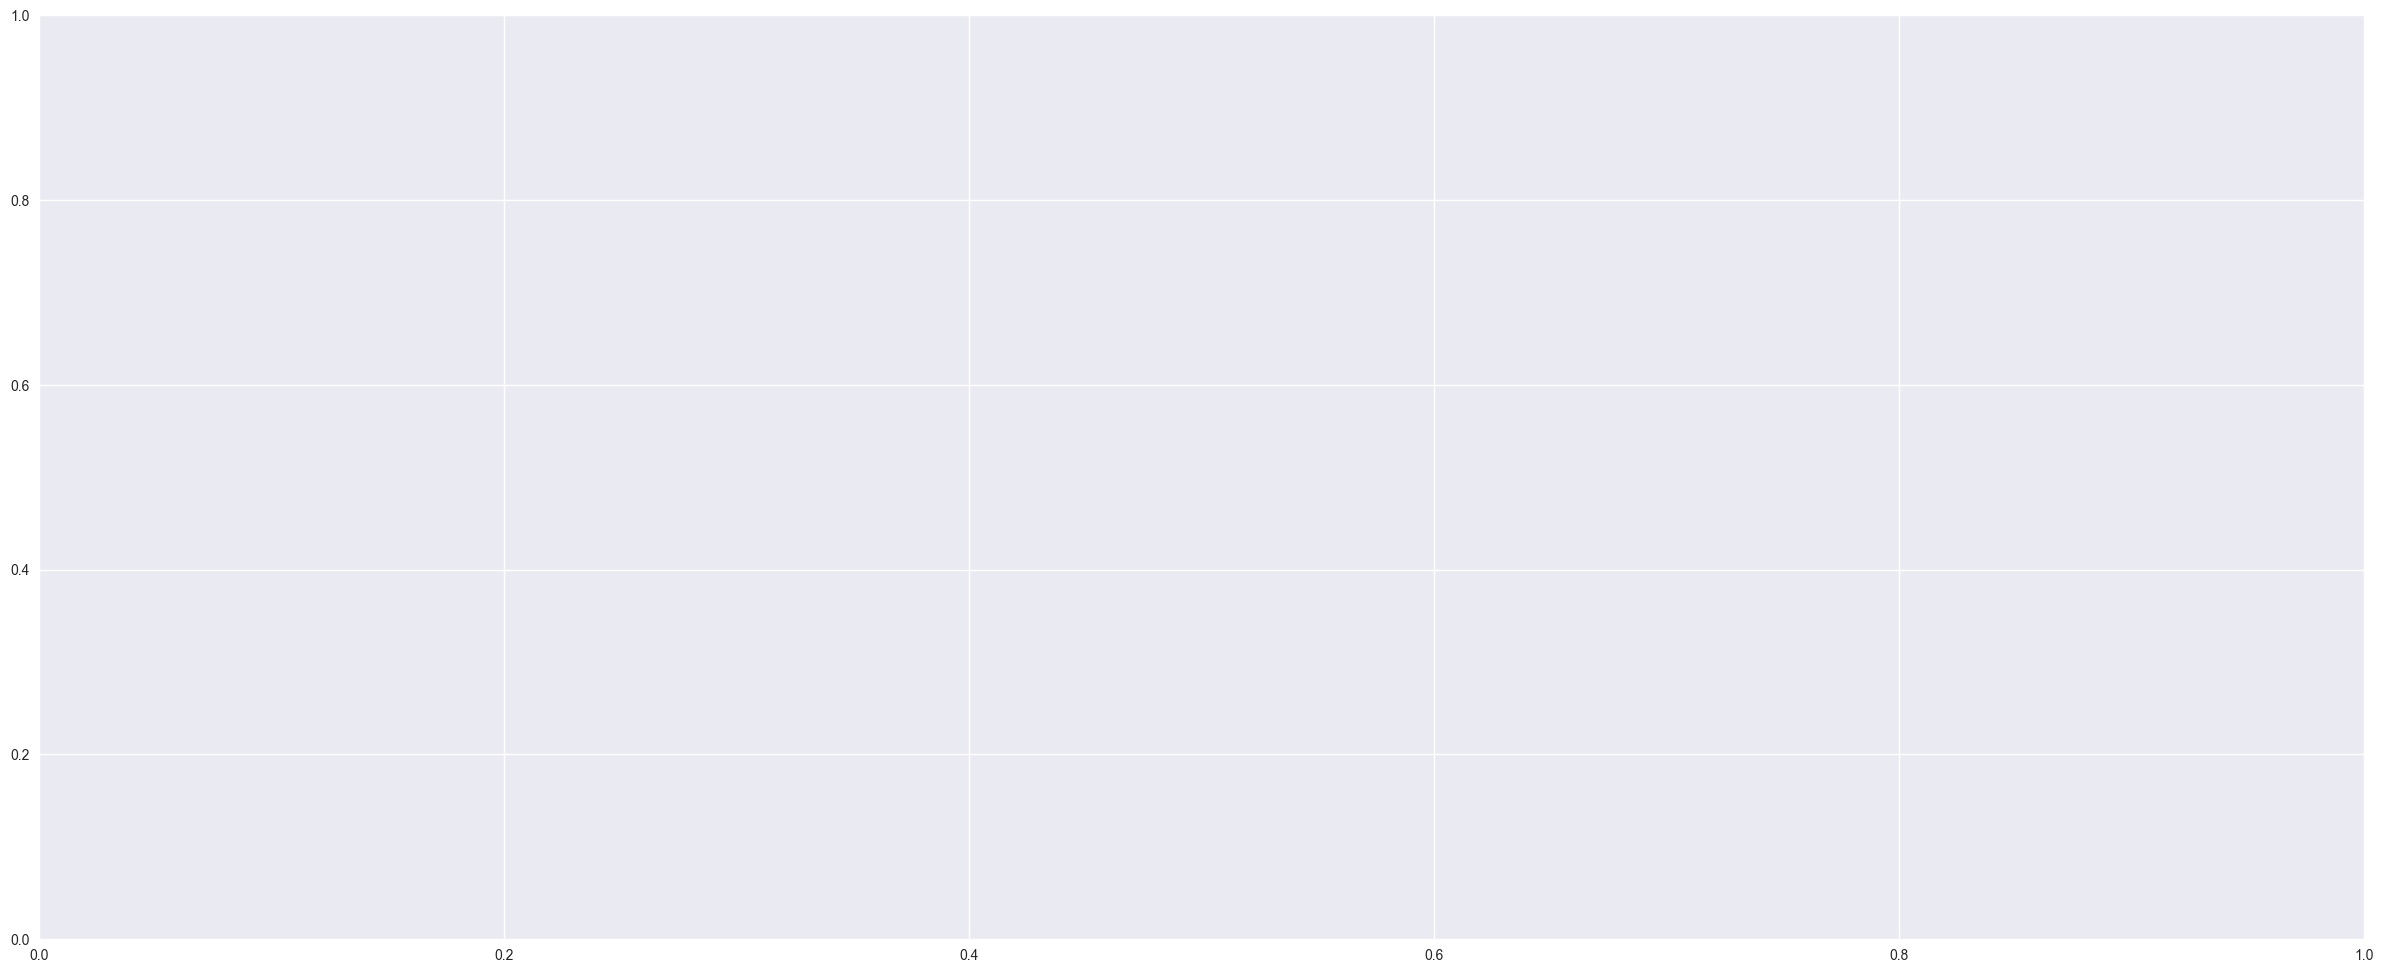

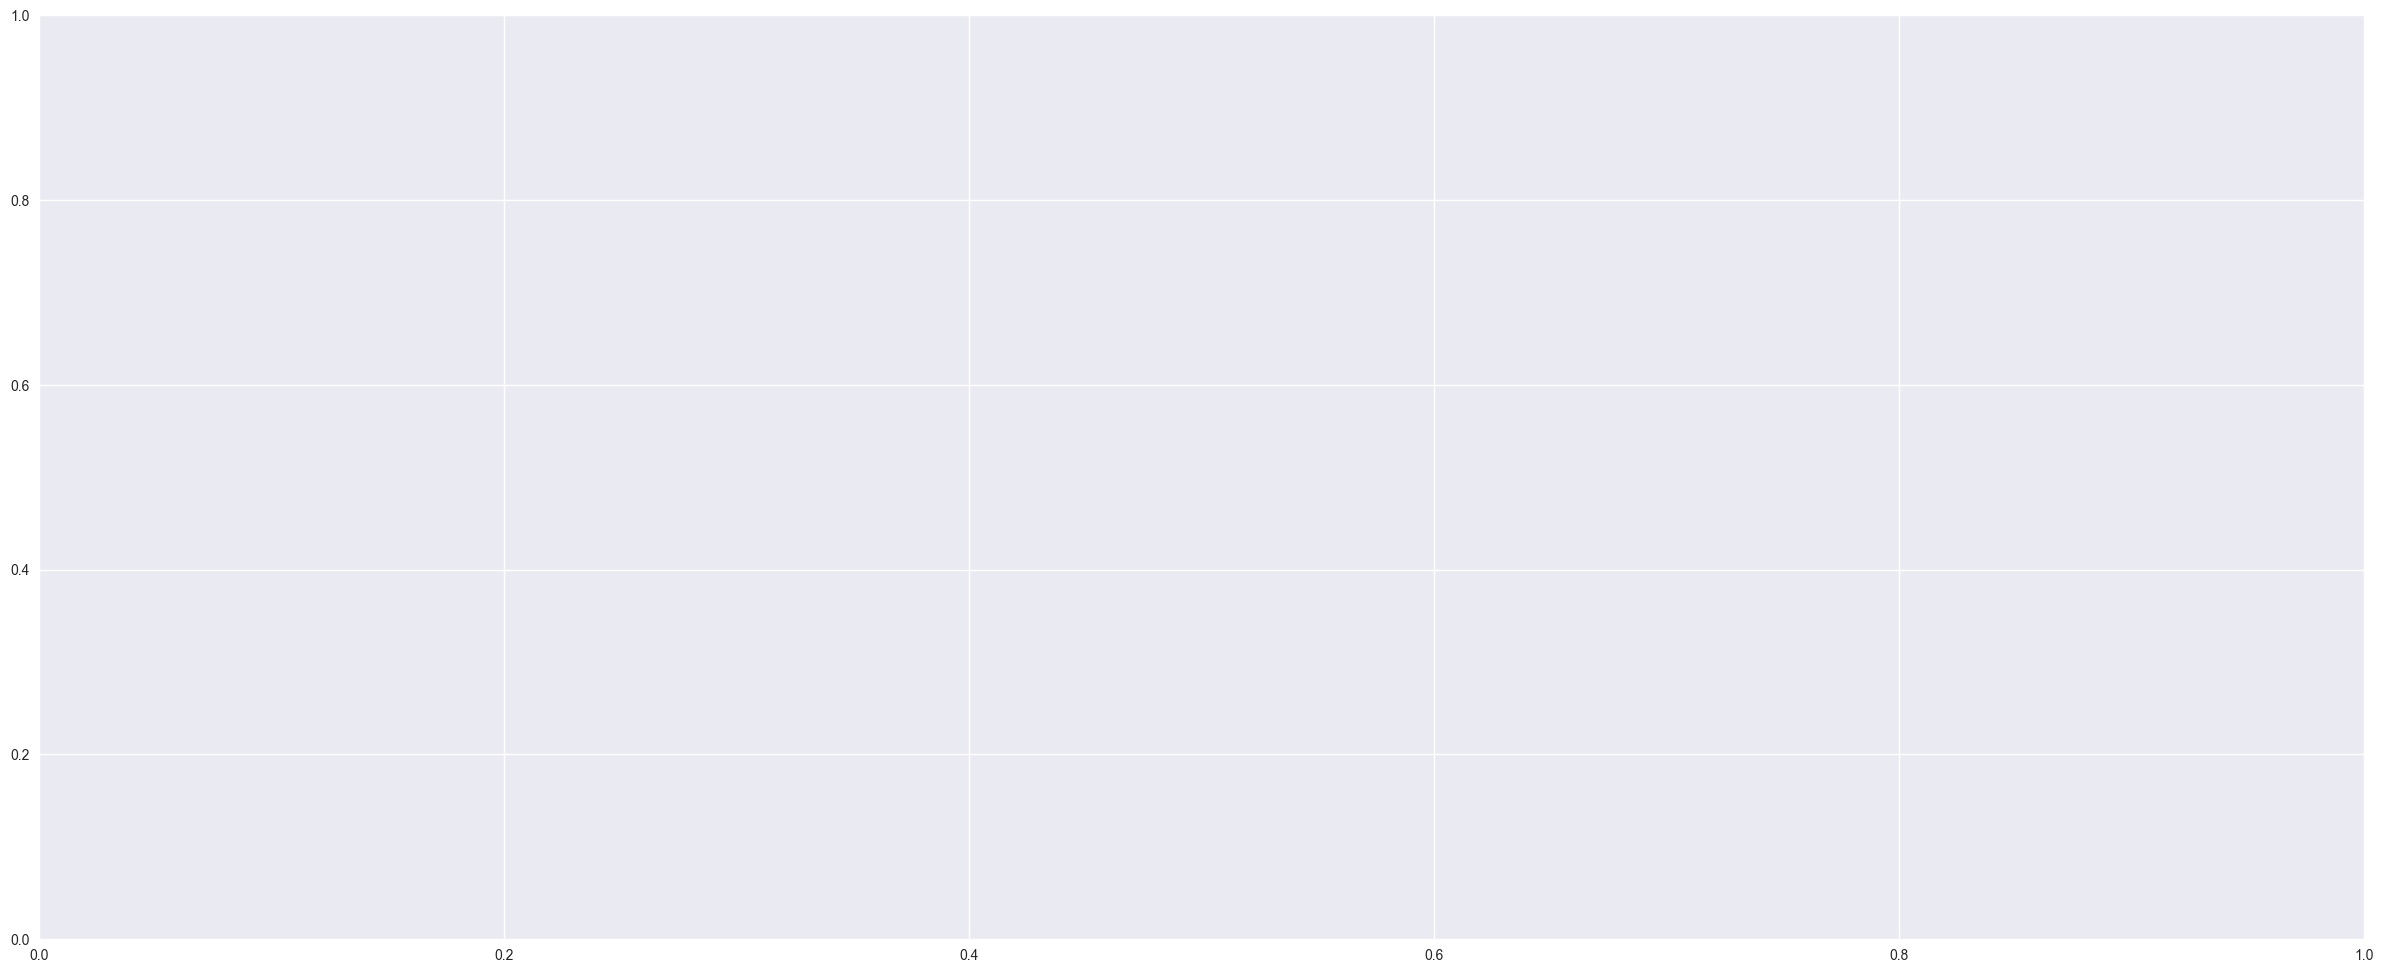

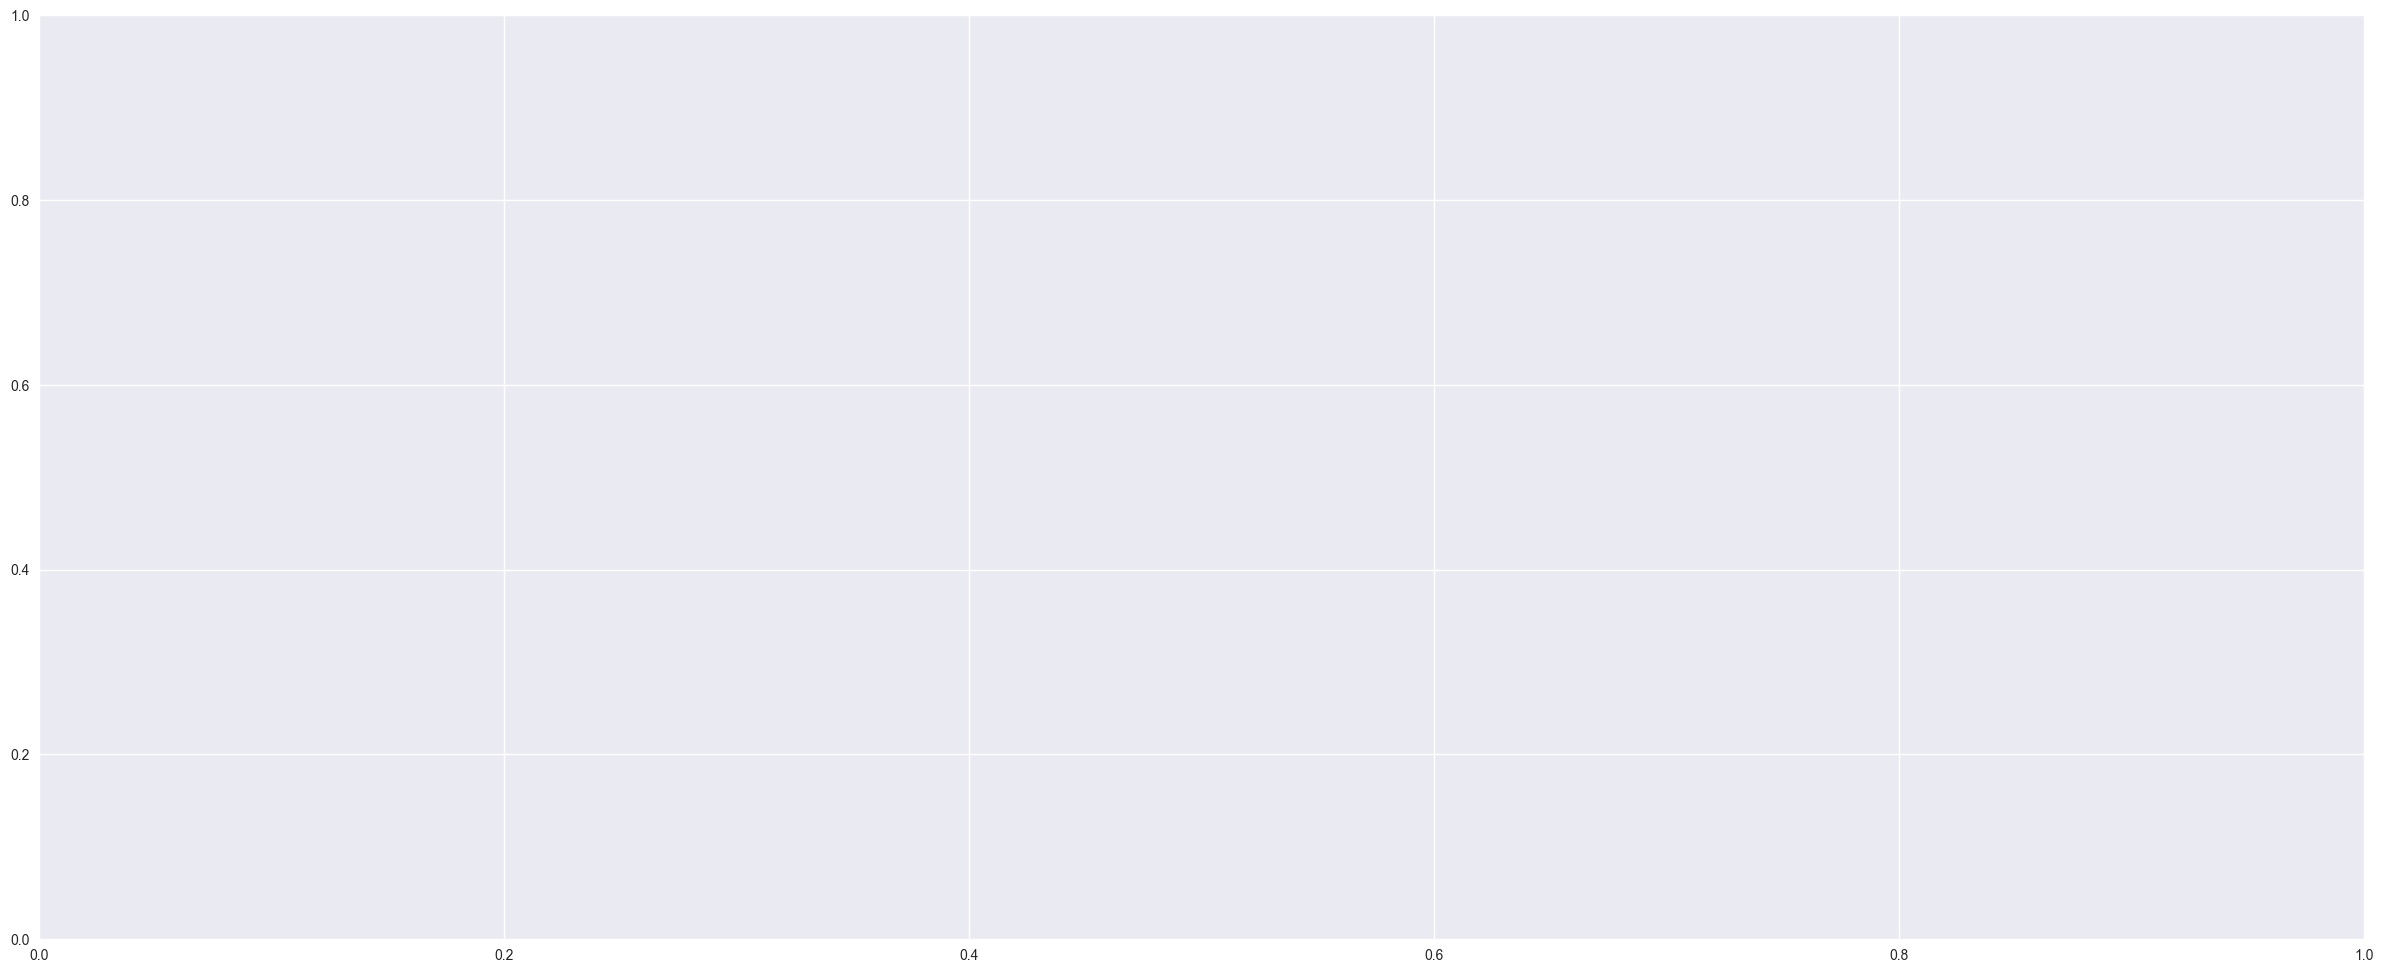

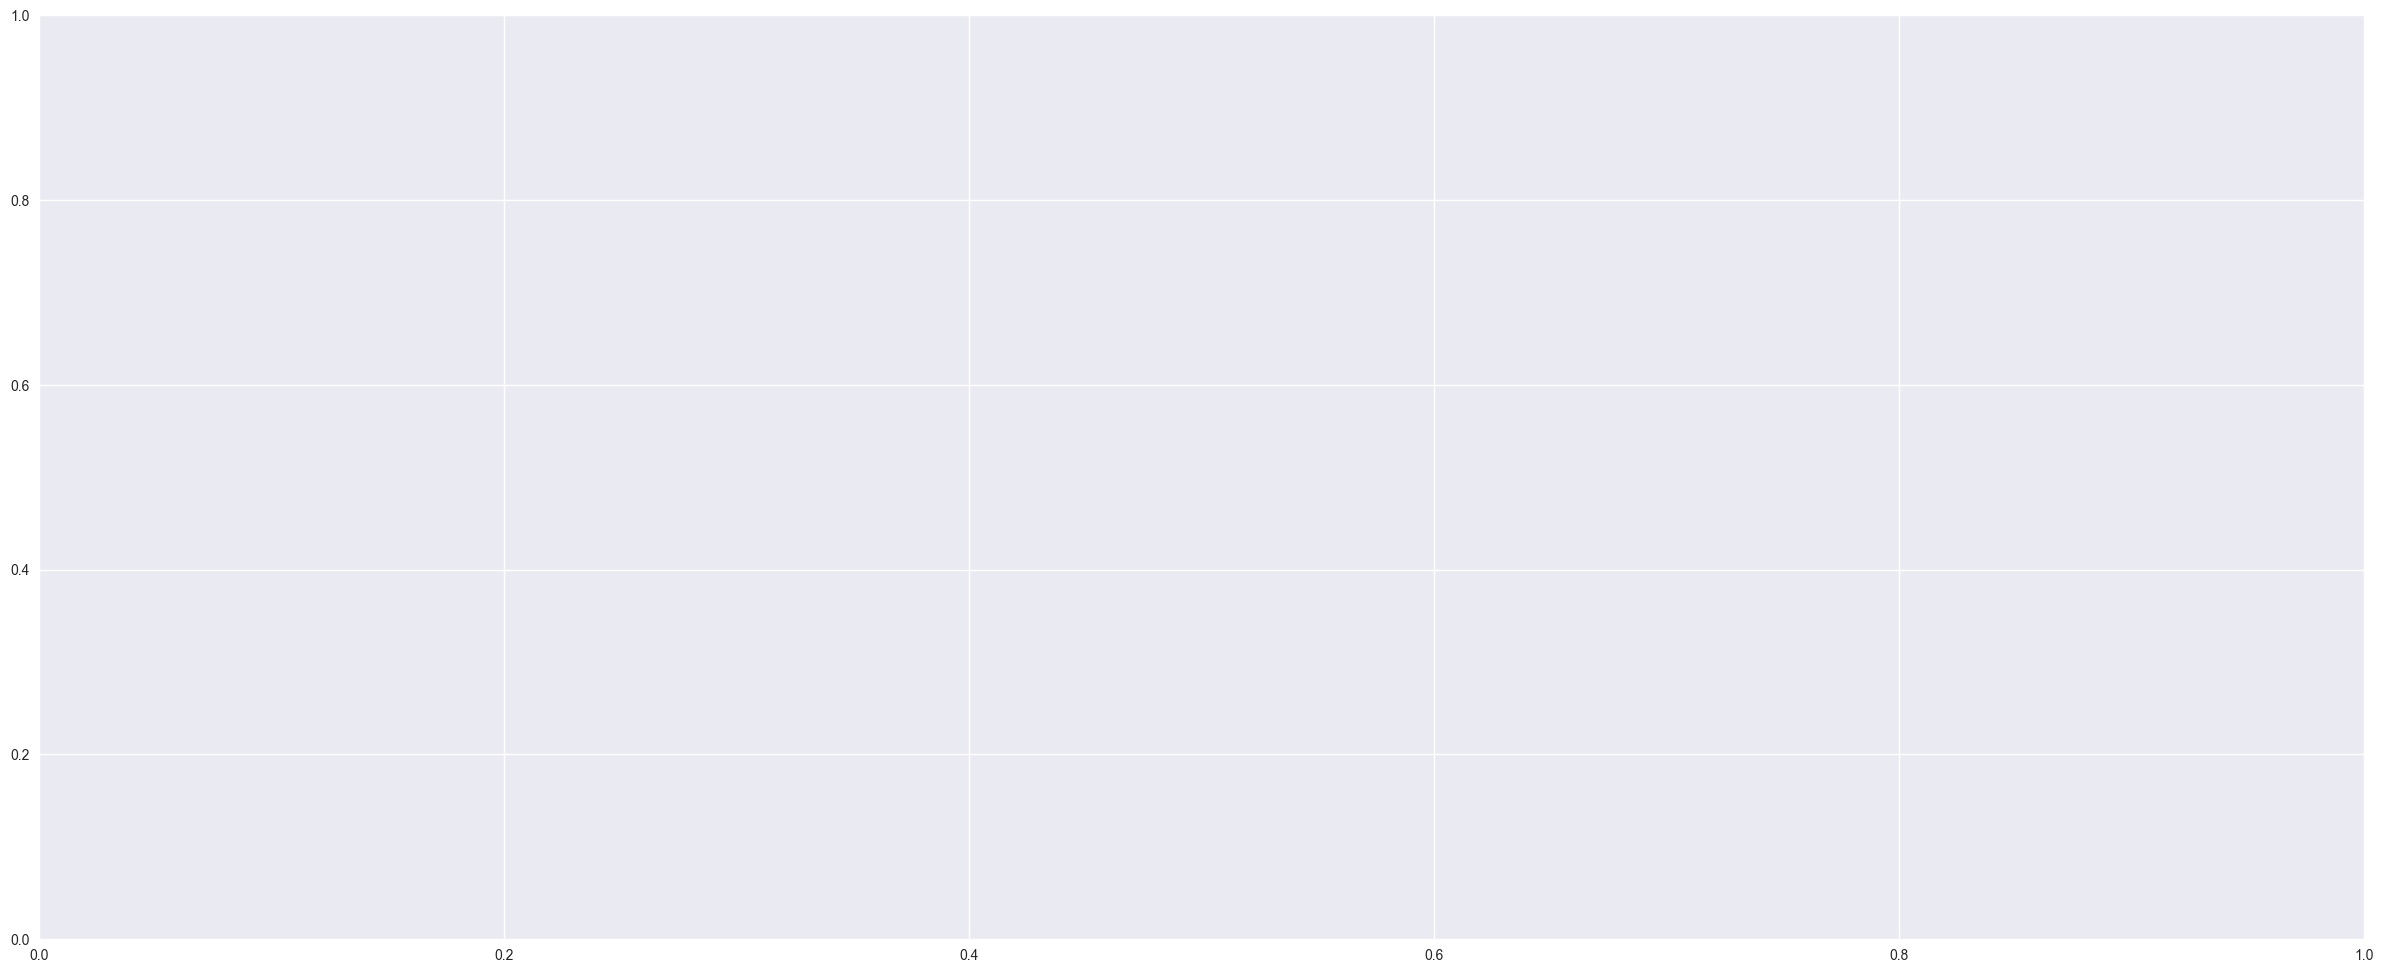

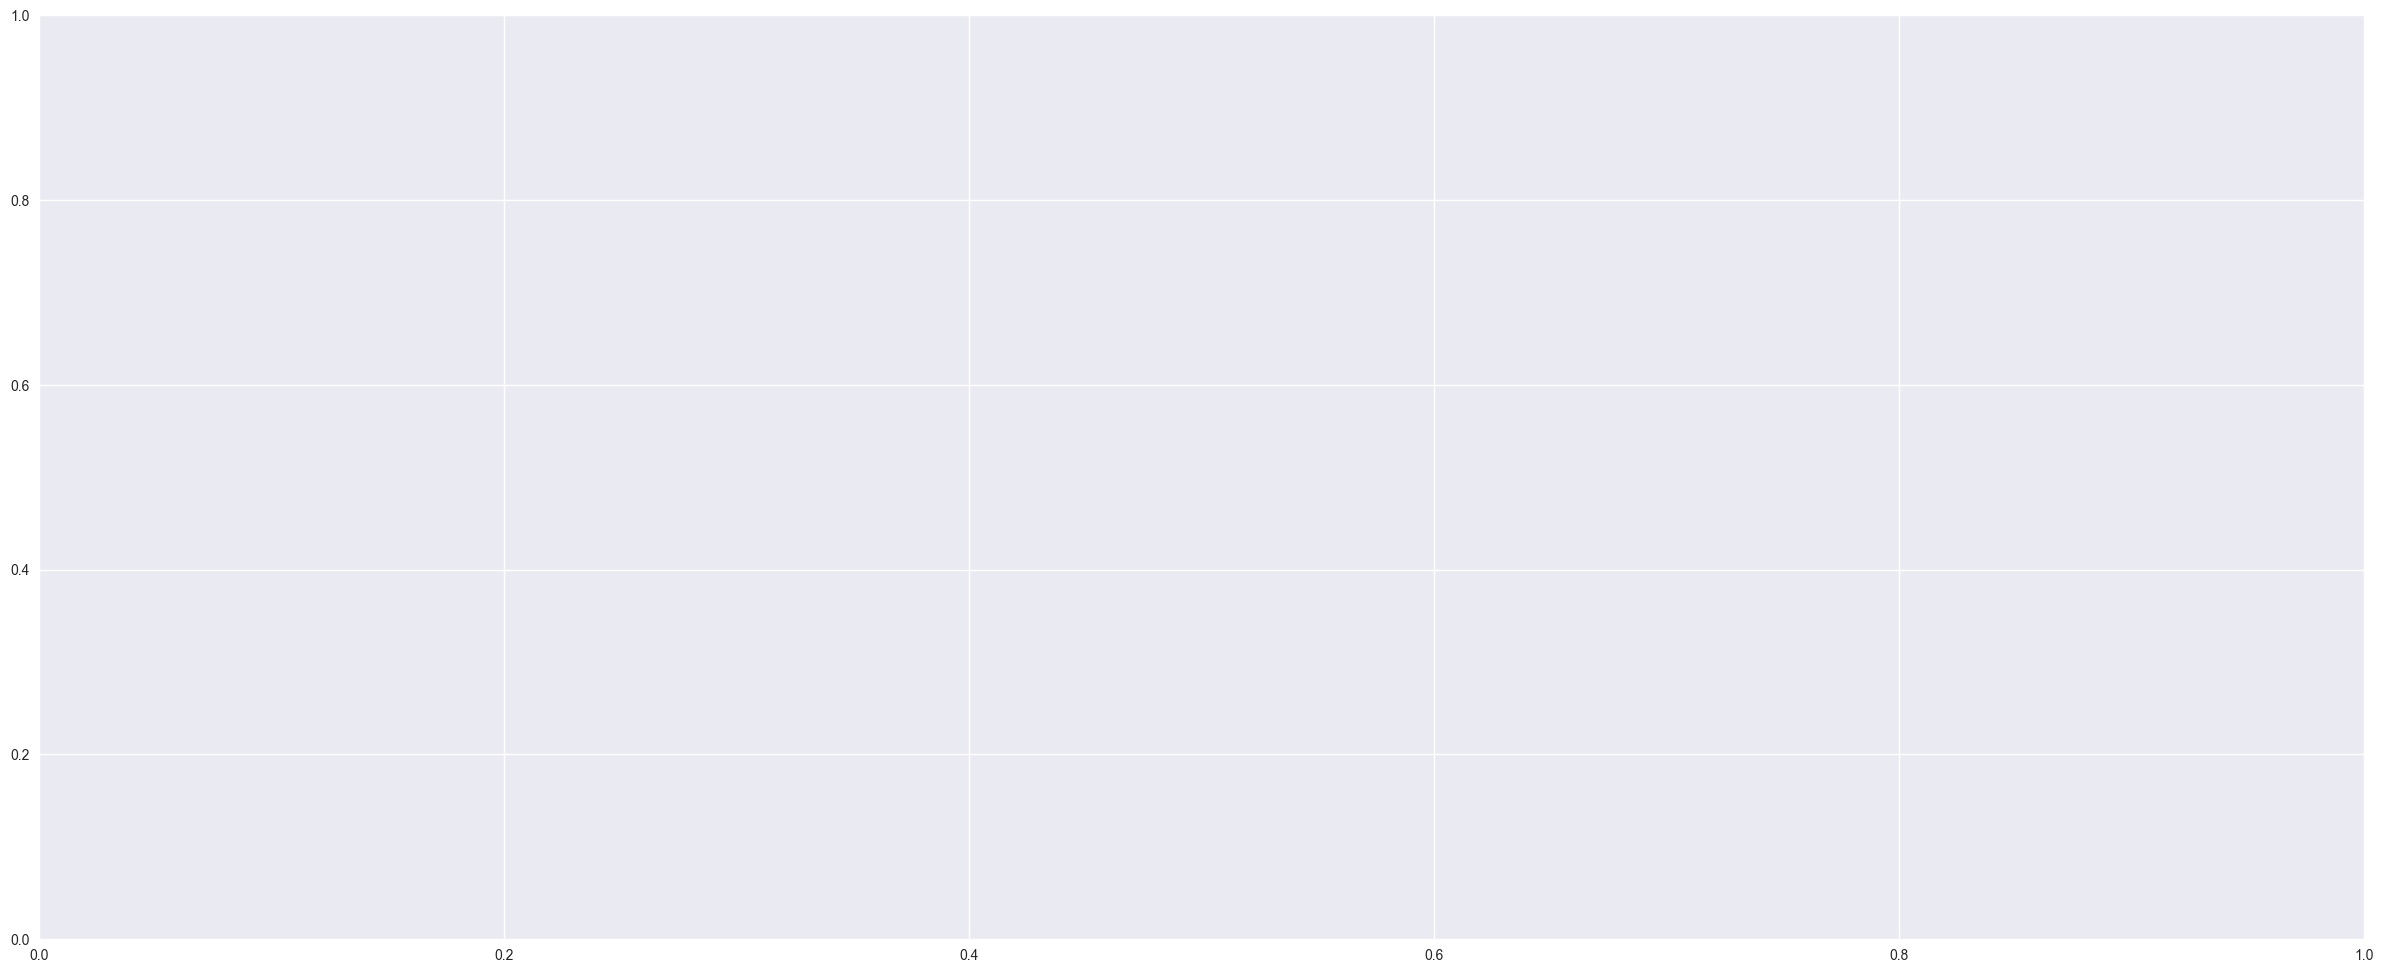

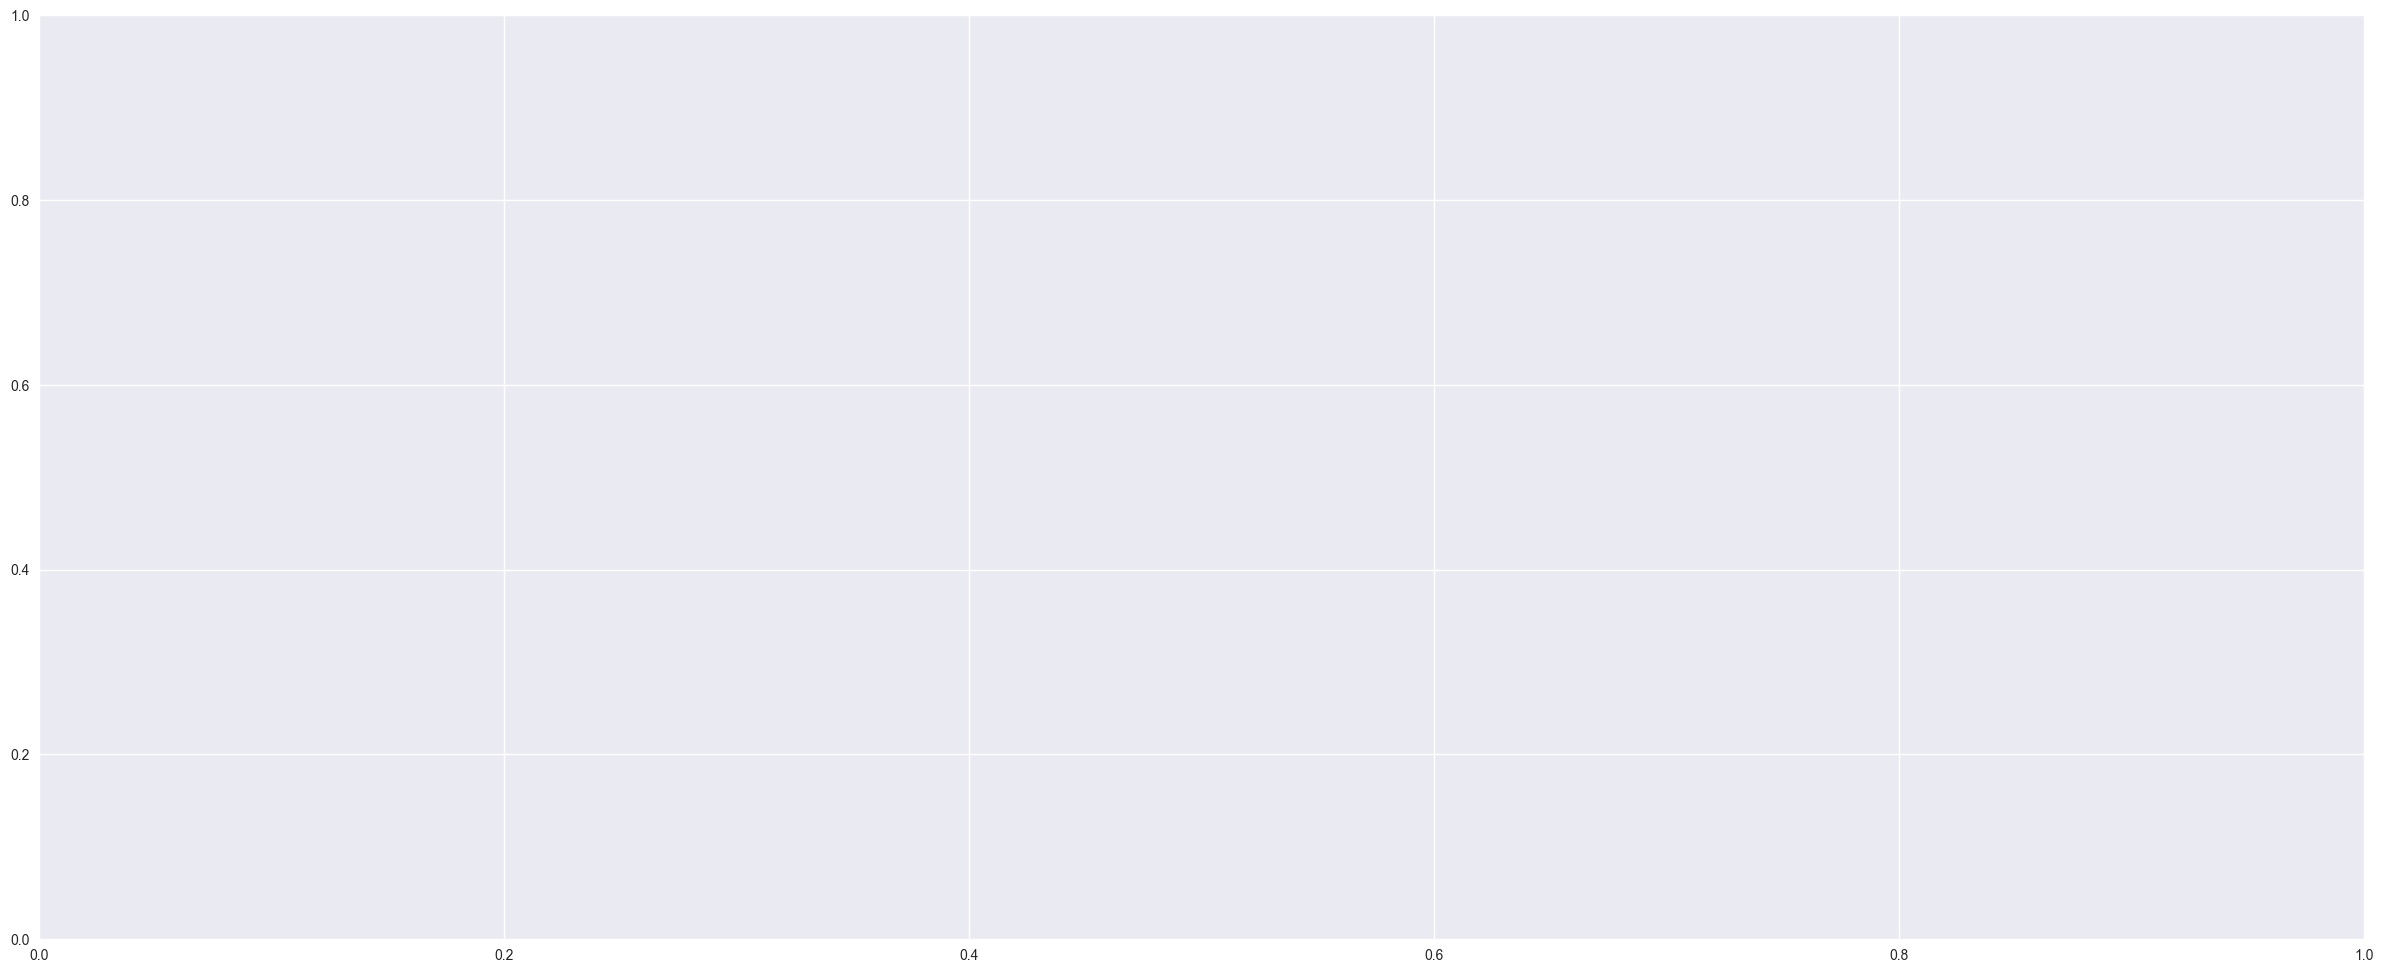

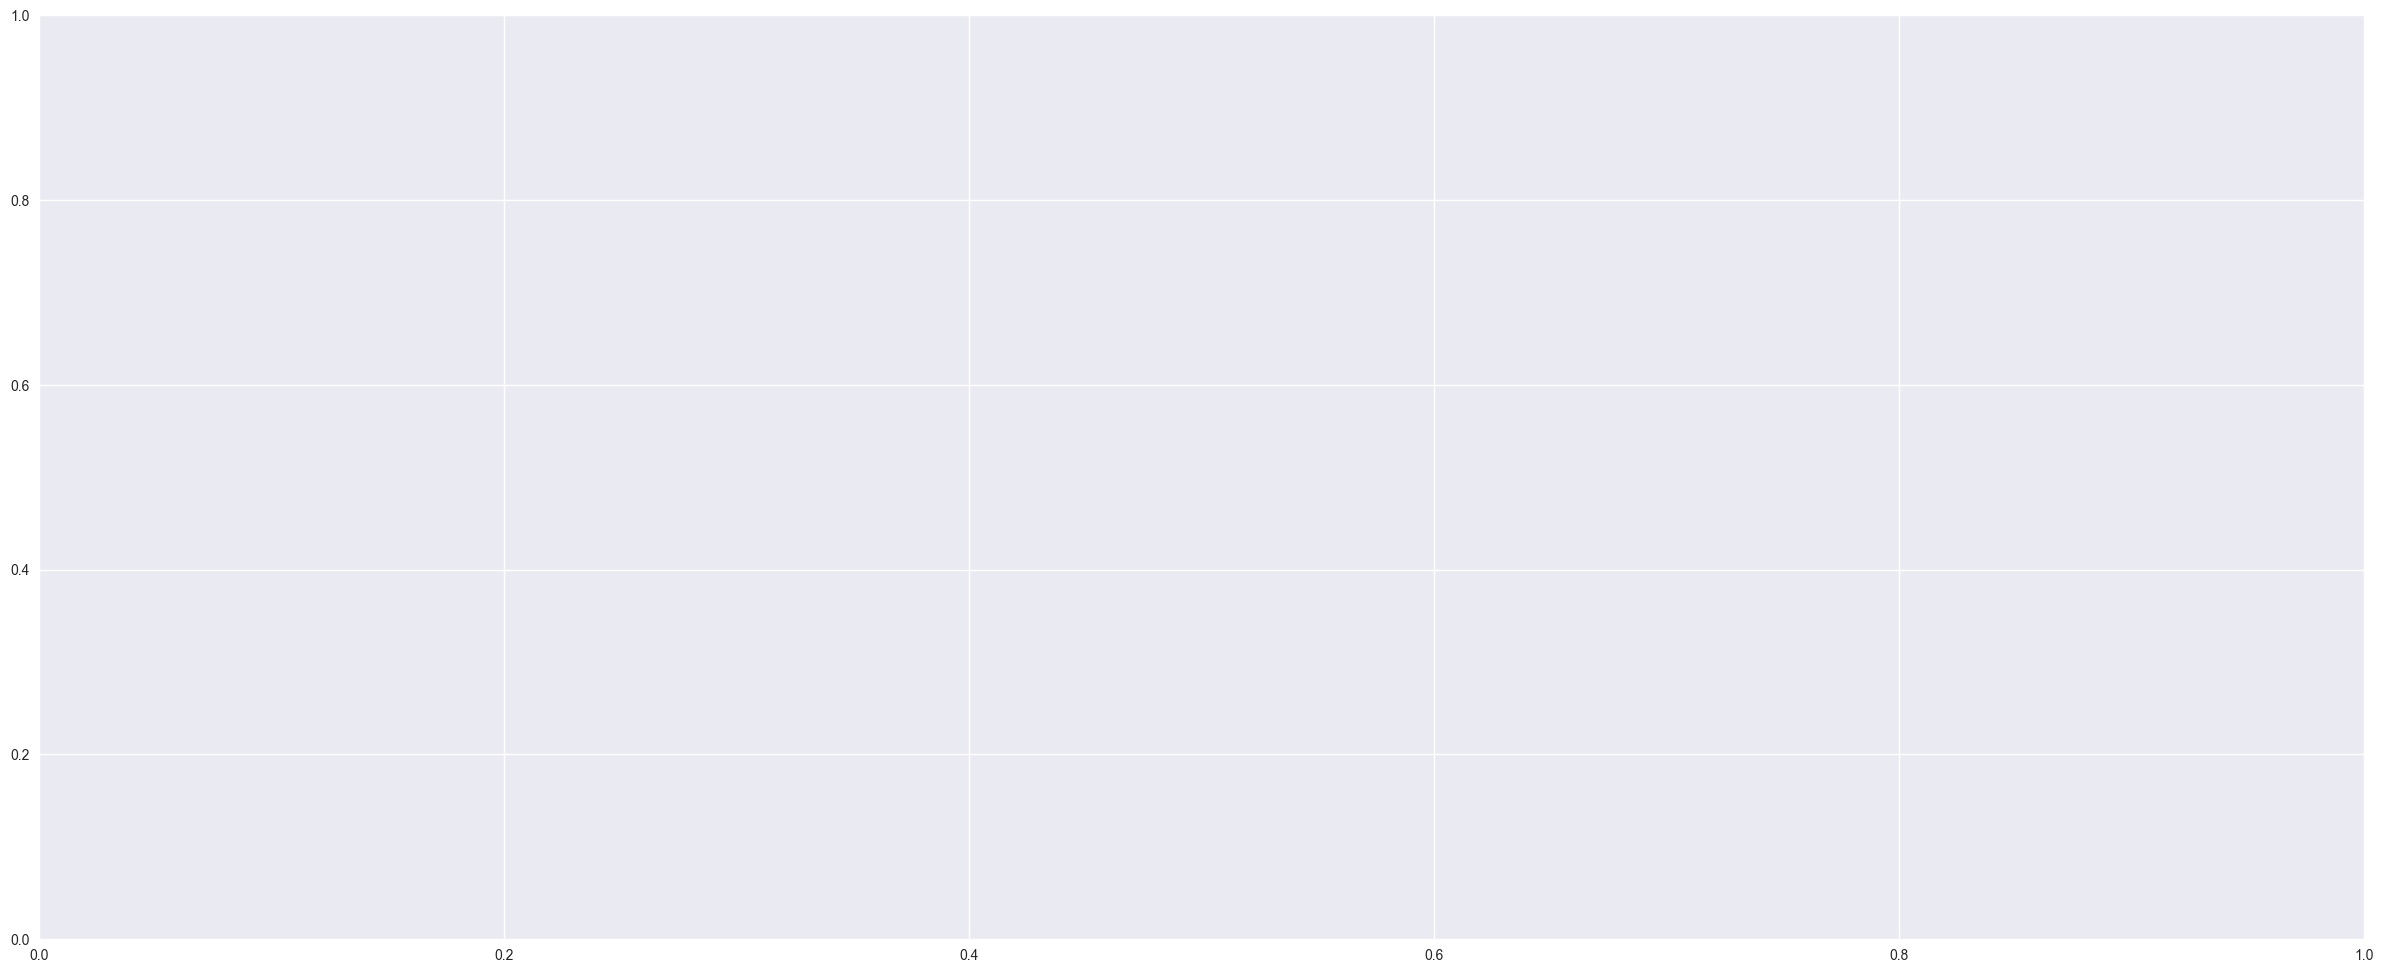

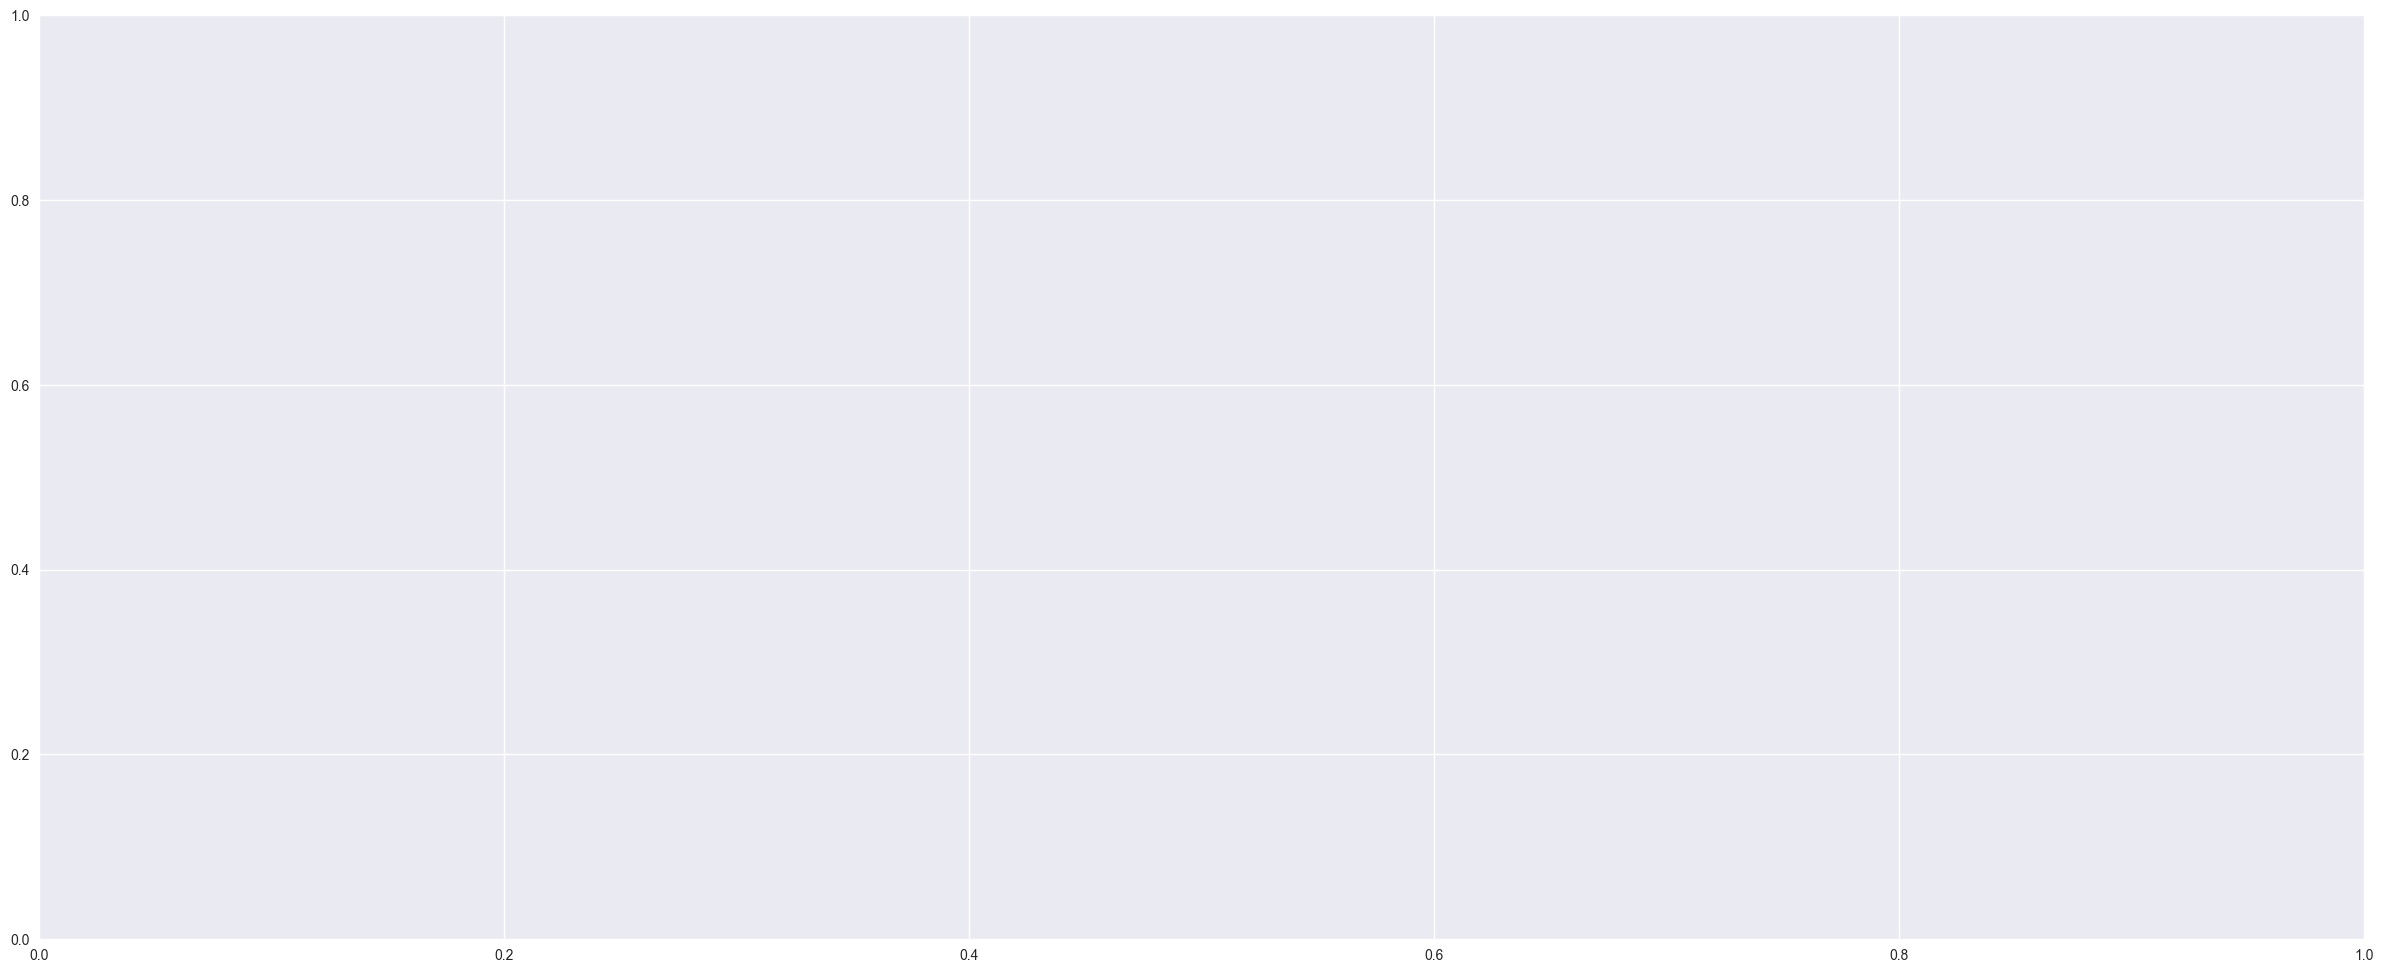

In [95]:
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

# 取得股價數據
stock_ID = ['2330']
date = '2022-06-01'
stock_ID = pd.read_excel(fr'C:\Users\User\Desktop\code\python\stockdata_VCP\VCP_predict_project\ETF test\stock choose all\stock choose for all template (Monthstratgy_123M)(fixed and 5-10MA bias)\{date}all template選股(Monthstratgy_123M).xlsx', index_col=0)

d0 = -680
d1 = -540
print(datetime.datetime.strptime(str(datetime.date.today() + datetime.timedelta(days=float(d1))) , '%Y-%m-%d' ))
for ID in stock_ID.index.values:
# for ID in [2230]:
    start_date = datetime.datetime.strptime(str(datetime.date.today() + datetime.timedelta(days=float(d0))) , '%Y-%m-%d' )
    end_date = datetime.datetime.strptime(str(datetime.date.today() + datetime.timedelta(days=float(d1))) , '%Y-%m-%d' )
    T5 = stock_ID.loc[ID, 'T5']
    T6 = stock_ID.loc[ID, 'T6']
    T11 = stock_ID.loc[ID, 'T11']
    if all([(not T5), (not T6), (not T11)]):
        continue
    try:
        data = pd.read_csv(fr'C:\Users\User\Desktop\code\python\stockdata_VCP\VCP_predict_project\history_data\{ID}.TW.csv', index_col='Date', parse_dates=True)
    except:
        data = pd.read_csv(fr'C:\Users\User\Desktop\code\python\stockdata_VCP\VCP_predict_project\history_data\{ID}.TWO.csv', index_col='Date', parse_dates=True)
    
    data = data.loc[list(map(lambda x,y:all([x,y]), data.index>=start_date, data.index<=end_date)), ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
    data['dividends'] = data['Adj Close'] - data['Close']
    data['Open'] = data['Open'] + data['dividends']
    data['High'] = data['High'] + data['dividends']
    data['Low'] = data['Low'] + data['dividends']
    data['Close'] = data['Close'] + data['dividends']
    data['point'] = min(data['Low'].values)
    data.iloc[-1, -1] = max(data['High'].values)
    # 產生 K 線圖
    ohlc = data[['Open', 'High', 'Low', 'Close', 'Volume']]
    ohlc.index.name = 'Date'
    # 設定 K 線圖顏色
    colors = mpf.make_marketcolors(up='g', down='r', edge='i', wick='i', volume='in')
    style = mpf.make_mpf_style(base_mpl_style='seaborn', marketcolors=colors)

    # 取得最後一根K線的位置
    last_candle = ohlc.iloc[-1]

    # 在右上角加入藍色點
    # x_pos = last_candle.name + pd.DateOffset(days=1)
    # y_pos = int(last_candle['High'] + 0.1 * (last_candle['High'] - last_candle['Low']))

    # 繪製 K 線圖
    plt.figure(figsize=(30, 12))
    add_plot = []
    marksize = 32
    template = ''
    if T5 == 1:
        template = template + ' T5 '
        y = data['point'].copy()
        # y.iloc[-1] = max(data['High'].values)*0.99
        y.iloc[-1] = min(data['Low'].values)*1.01
        add_plot.append(mpf.make_addplot(y, type='scatter',markersize=marksize,marker='v',color='y'))
    if T6 == 1:
        template = template + ' T6 '
        g = data['point'].copy()
        # g.iloc[-1] = max(data['High'].values)
        g.iloc[-1] = min(data['Low'].values)*1.0
        # data['point'].iloc[-1] = max(data['High'].values)
        add_plot.append(mpf.make_addplot(g, type='scatter',markersize=marksize,marker='v',color='g'))
    if T11 == 1:
        template = template + ' T11 '
        b = data['point'].copy()
        # b.iloc[-1] = max(data['High'].values)*0.995
        b.iloc[-1] = min(data['Low'].values)*1.005
        # data['point'].iloc[-1] = np.mean(data['High'].values)
        add_plot.append(mpf.make_addplot(b, type='scatter',markersize=marksize,marker='v',color='b'))
    # 添加藍色點
    # add_plot = mpf.make_addplot([x_pos, y_pos], scatter=True, markersize=100, marker='o', color='b')
    mpf.plot(ohlc, type='candle', style=style, volume=True, show_nontrading=False, figscale=1.5, figratio=(30, 18), mav=(5, 10, 20, 60, 200), tight_layout=True, title=f'{ID} Stock Price {template}'
            , addplot=add_plot, savefig=fr'C:\Users\User\Desktop\投資檢討\TV重播k線\20220601stock\{ID}{template}.png')
    plt.clf()


In [ ]:
file = r'C:\Users\User\Desktop\code\python\stockdata_VCP\VCP_predict_project\產業別.txt'
data = open(file,'r', encoding='utf-8-sig').read()
industry = []
url = []
data = data.split('\n')
for line in data:
    print(line)
    industry.append(line.split(' ')[0])
    url.append(line.split(' ')[1])

In [ ]:
# 自動下載ChromeDriver
service = ChromeService(executable_path=ChromeDriverManager().install())

# 關閉通知提醒
chrome_options = webdriver.ChromeOptions()

prefs = {"profile.default_content_setting_values.notifications" : 2}
chrome_options.add_experimental_option("prefs",prefs)

# 開啟瀏覽器
driver = webdriver.Chrome(service=service, chrome_options=chrome_options)

In [ ]:
print(url[0])

In [ ]:
stock_start = []
industry_stockID = []
for i, u in enumerate(url):
    ID = []
    try:
        driver.get(u)
        title = driver.find_element(by = By.ID, value = "oMainTable").text.split('\n')
        for j, t in enumerate(title):
            if t == '報酬':
                stock_start.append(j+1)
                print(j)
        for stock in title[stock_start[i]:]:
            ID.append(stock[:4])
        # print(title)
    except Exception as e:
        print(f'{bcolors.WARNING}{e}{bcolors.RESET}')
        print(f'{bcolors.WARNING}Close Google Failed{bcolors.RESET}')
        ID.append([0])
    industry_stockID.append(ID)

In [ ]:
stock = np.zeros((300, 98))
industry_df = pd.DataFrame(stock, columns=industry)

In [ ]:
for i, col in enumerate(industry_df.columns.values):
    print(len(industry_df.loc[:len(industry_stockID[i])-1, col]), industry[i], len(industry_stockID[i]) )
    print()
    industry_df.loc[:len(industry_stockID[i])-1, col] = industry_stockID[i]

In [82]:
industry_df.to_excel(r'C:\Users\User\Desktop\code\python\stockdata_VCP\VCP_predict_project\產業別.xlsx', encoding='utf-8-sig')

In [84]:
industry_df = pd.read_excel(r'C:\Users\User\Desktop\code\python\stockdata_VCP\VCP_predict_project\產業別.xlsx').astype(int).astype(str)

In [85]:
a = '1104 2457 2634 2727 3032 3078 6691 8222'.split(' ')
for id in a:
    stock_ind = []
    for col in industry_df.columns.values:
        if id in industry_df[col].values:
            stock_ind.append(col)
    print(stock_ind, id)

['水泥'] 1104
['電子零件元件'] 2457
['機械', '航天軍工'] 2634
['旅館、餐飲'] 2727
['電子零件元件', '電腦週邊產品'] 3032
['電子零件元件'] 3078
['電子其他'] 6691
['機械', '航天軍工'] 8222


In [ ]:
url = 'http://jsjustweb.jihsun.com.tw/z/zh/zha/zha.djhtm'
# 发起GET请求获取网页内容
response = requests.get(url)

# 检查响应状态码
if response.status_code == 200:
    # 获取网页内容
    html_content = response.text

    # 创建BeautifulSoup对象
    soup = BeautifulSoup(html_content, 'html.parser')

    # 示例：查找所有的<a>标签并打印链接文本和URL
    tbody_tags = soup.find('body').find('table').find('table').find('table')
    # for a_tag in a_tags:
    #     link_text = a_tag.text
    #     link_url = a_tag['href']
    #     print(f"Link: {link_text} ({link_url})")
    # print(tbody_tags[0].find('td'))
    # print('---')
    # print(tbody_tags[2])
    # print('---')
    # print((tbody_tags[2].find('td')))
    # print('---')
    # print(tbody_tags[3])
    # print('---')
    # print(tbody_tags[0].find_parent())
    # print(tbody_tags[3].find_parent())
    # print((tbody_tags[4].find('td')))
    a = (tbody_tags.text.split('\n\n\n'))

In [ ]:
d = []
for i in a:
    if '\n' not in i:
        d.append(i)
        print(i)

In [ ]:

for i in tbody_tags:
    try:
        print(i)
        print('------------------')
    except:
        print('**')
        pass
    

TypeError: unsupported operand type(s) for -: 'int' and 'NoneType'

In [73]:
import datetime
import pandas as pd
import numpy as np
import sys
holiday = ['2023-10-04', '2023-10-01']
n_day_ago = -0
delay_day = 1
day = datetime.datetime.strptime(str(datetime.date.today() + datetime.timedelta(days=n_day_ago)) , '%Y-%m-%d' )
print(day)
if day in holiday:
    sys.exit()
old_date = str(datetime.datetime.strptime(str(datetime.date.today() + datetime.timedelta(days=n_day_ago-delay_day)) , '%Y-%m-%d' ))

ERS100 = pd.read_excel('C:/Users/User/Desktop/StockInfoHub/Stock_RS_rate_analysis/100產業分析/100產業RS排行.xlsx', header=0, index_col=0) 
print(f'New date:{day} | Old date:{old_date}')
print(type(str(day)))
print(str(day))
print(type(ERS100.index[-1]))
print(ERS100.index[1])
new_rs = ERS100.loc[str(day)]
old_rs = ERS100.loc[str(old_date)]
add = new_rs - old_rs
add.fillna(0, inplace=True)
add = pd.concat([add, ERS100.loc['number']], axis=1)
add.columns = ['add %', 'stock in industry']
add.sort_values(by = 'add %', ascending=False, inplace=True)
display.display(add.iloc[:10].transpose().iloc[:, ::-1])
display.display(add.iloc[:10].transpose())
print(add.iloc[-10:])

New date:2023-09-27 00:00:00 | Old date:2023-09-26 00:00:00
<class 'str'>
2023-09-27 00:00:00
<class 'str'>
2023-09-27 00:00:00


,流通業,射頻前端晶片,化學工業,電腦週邊產品,旅館、餐飲,LED,電腦系統業,家電,顯示器,診斷與監測用醫材
add %,0.0,0.0,1.6,1.8,1.9,2.6,3.9,4.0,5.0,5.3
stock in industry,30.0,2.0,61.0,57.0,51.0,39.0,77.0,25.0,20.0,19.0


,診斷與監測用醫材,顯示器,家電,電腦系統業,LED,旅館、餐飲,電腦週邊產品,化學工業,射頻前端晶片,流通業
add %,5.3,5.0,4.0,3.9,2.6,1.9,1.8,1.6,0.0,0.0
stock in industry,19.0,20.0,25.0,77.0,39.0,51.0,57.0,61.0,2.0,30.0


                 add % stock in industry
設備儀器廠商            -1.4              72.0
IC設計              -2.2              91.0
營造工程              -2.5              40.0
電子通路              -2.8              71.0
面板業               -4.0                25
時尚產業              -4.8              21.0
休閒娛樂              -5.9              17.0
電力設備              -5.9              34.0
電線電纜              -6.2              16.0
Internet技術與基礎設施  -11.8              17.0


In [18]:

import datetime
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication
from email.header import Header
import openpyxl
import io
import os
## 比較今天的選股跟昨天的選股
import numpy as np
import pandas as pd
from IPython import display
industry_df = pd.read_excel(r'C:\Users\User\Desktop\code\python\stockdata_VCP\VCP_predict_project\產業別.xlsx').astype(int).astype(str)
number_of_stock_in_industry = pd.read_excel(r'C:\Users\User\Desktop\StockInfoHub\Stock_RS_rate_analysis\100產業分析\100產業RS排行.xlsx', index_col=0, header=0).loc['number'].astype(int)
industry_category_df = []
sentstock = industry_df
ers_higher80 = sentstock.loc[sentstock['RS EMA250rate>80']]
all_length = len(ers_higher80.index)
numb_Price_higher_20MA = len(ers_higher80.loc[ers_higher80['Price>20MA'], 'Price>20MA'].index.values)
numb_Price_higher_50MA = len(ers_higher80.loc[ers_higher80['Price>50MA'], 'Price>50MA'].index.values)
numb_Price_higher_150MA = len(ers_higher80.loc[ers_higher80['Price>150MA'], 'Price>150MA'].index.values)
numb_Price_higher_200MA = len(ers_higher80.loc[ers_higher80['Price>200MA'], 'Price>200MA'].index.values)
def print_industry_category_df(ID_list, industry_category_df, number_of_stock_in_industry:pd.DataFrame, print_all=False):
    alist = []
    for id in ID_list.astype(str):
        stock_ind = []
        for col in industry_df.columns.values:
            if id in industry_df[col].values:
                stock_ind.append(col)
        alist.append((id,stock_ind))

    for ind in alist:
        for i in ind[1]:
            industry_category_df.append([ind[0], i])
    industry_category_df = pd.DataFrame(industry_category_df,columns=['ID', 'category'])
    industry_category_df['count'] = 1
    industry_category_df = industry_category_df.groupby('category').sum()
    industry_category_df = industry_category_df.sort_values(by='count', ascending=False)
    number_of_stock_in_industry = number_of_stock_in_industry.loc[list(map(lambda x:x in industry_category_df.index.values, number_of_stock_in_industry.index.values))]
    industry_category_df = pd.concat([industry_category_df, number_of_stock_in_industry], axis=1)
    industry_category_df['percentage'] = 100*industry_category_df['count']/industry_category_df['number']
    industry_category_df['percentage'] = industry_category_df['percentage'].round(2)
    industry_category_df['count rank'] = industry_category_df['count'].rank(ascending=False)
    industry_category_df[['count rank', 'count', 'number']] = industry_category_df[['count rank', 'count', 'number']].astype(int)
    industry_category_df = industry_category_df.sort_values(by='percentage', ascending=False).transpose()
    industry_category_df = industry_category_df.loc[:, industry_category_df.loc['count']>1]
    seperate_n = 13
    for i in range(int(len(industry_category_df.columns.values)/seperate_n)+1):
        display.display(industry_category_df.iloc[[2,3,0,1], i*seperate_n:(i+1)*seperate_n])
    if print_all:
        for ind in alist:
            print(ind[0], ':', end=' ')
            for i in ind[1]:
                print(i, end=' ')
            print('')
    return industry_category_df
n_day_ago = -2
day = datetime.datetime.strptime(str(datetime.date.today() + datetime.timedelta(days=n_day_ago)) , '%Y-%m-%d' )
path = r'C:\Users\User\Desktop\StockInfoHub\Stock_Data_Collector\全個股條件篩選\\'
new_date = str(day).split(' ')[0]
old_date = str(datetime.datetime.strptime(str(datetime.date.today() + datetime.timedelta(days=n_day_ago-1)) , '%Y-%m-%d' )).split(' ')[0]
print(f'New date:{new_date} | Old date:{old_date}')
df_old = pd.read_excel(f'{path}{old_date}選股.xlsx')
df_new = pd.read_excel(f'{path}{new_date}選股.xlsx')
df_old.set_index('ID', inplace=True)
df_new.set_index('ID', inplace=True)
print(f'New date:{new_date} | Old date:{old_date}')
old_T5_ID = df_old.loc[df_old['T5']].index.values
old_T5_2_ID = df_old.loc[df_old['T5-2']].index.values
old_T6_ID = df_old.loc[df_old['T6']].index.values
old_T11_ID = df_old.loc[df_old['T11']].index.values
new_T5_ID = df_new.loc[df_new['T5']].index.values
new_T5_2_ID = df_new.loc[df_new['T5-2']].index.values
new_T6_ID = df_new.loc[df_new['T6']].index.values
new_T11_ID = df_new.loc[df_new['T11']].index.values

T5_add_ID = np.sort([i for i in new_T5_ID if i not in old_T5_ID])
T5_drop_ID = np.sort([i for i in old_T5_ID if i not in new_T5_ID])
T6_add_ID = np.sort([i for i in new_T6_ID if i not in old_T6_ID])
T6_drop_ID = np.sort([i for i in old_T6_ID if i not in new_T6_ID])
T11_add_ID = np.sort([i for i in new_T11_ID if i not in old_T11_ID])
T11_drop_ID = np.sort([i for i in old_T11_ID if i not in new_T11_ID])
T5_2_add_ID = np.sort([i for i in new_T5_2_ID if i not in old_T5_2_ID])
T5_2_drop_ID = np.sort([i for i in old_T5_2_ID if i not in new_T5_2_ID])
T5_drop_goodID = np.sort([i for i in T5_drop_ID if all([df_new.loc[i,'S250rate']>=75, df_new.loc[i, 'S20rate']>85])])
T5_2_drop_goodID = np.sort([i for i in T5_2_drop_ID if all([df_new.loc[i,'ES250rate']>=75, df_new.loc[i, 'ES20rate']>85])])
# print stock numbers of all template 
stock_numbers_all_template_text = f'<pre>策略股票數量 : \nT5(new):{len(new_T5_ID)} | T5_2(new):{len(new_T5_2_ID)} | T6(new):{len(new_T6_ID)} | T11(new):{len(new_T11_ID)} | \
all(new):{len(set(np.concatenate([new_T5_ID, new_T5_2_ID, new_T6_ID, new_T11_ID])))} | all(add):{len(set(np.concatenate([T5_add_ID, T5_2_add_ID, T6_add_ID, T11_add_ID])))}\n\n\
T5(old):{len(old_T5_ID)} | T5_2(old):{len(old_T5_2_ID)} | T6(old):{len(old_T6_ID)} | T11(old):{len(old_T11_ID)} | \
all(old):{len(set(np.concatenate([old_T5_ID, old_T5_2_ID, old_T6_ID, old_T11_ID])))} | all(drop):{len(set(np.concatenate([T5_drop_ID, T5_2_drop_ID, T6_drop_ID, T11_drop_ID])))}</pre>'
# print add and drop stock ID
all_add_ID = np.array(list(set(np.concatenate([T5_add_ID, T5_2_add_ID, T6_add_ID, T11_add_ID]))))
all_drop_ID = np.array(list(set(np.concatenate([T5_drop_ID, T5_2_drop_ID, T6_drop_ID]))))
add_stockID_text = f'<pre>策略股票新增ID : \nT5 : \n{T5_add_ID}\n\nT5RS破高刪除的股票 : \n{T5_drop_goodID}\n\nT5_2 : \n{T5_2_add_ID}\n\nT5_2RS破高刪除的股票 : \n{T5_2_drop_goodID}\n\nT6 : \n{T6_add_ID}\n\nT11 : \n{T11_add_ID}\n</pre>'
print('----------------------------------------------------------------------------------------------------\n新增股票產業別 : ')
add_industry_df = print_industry_category_df(all_add_ID,industry_category_df,number_of_stock_in_industry)
print('刪除股票產業別 : ')
drop_industry_df = print_industry_category_df(all_drop_ID,industry_category_df,number_of_stock_in_industry)
# 邮件服务器的信息 - 使用Gmail的SMTP服务器
smtp_server = 'smtp.gmail.com'
smtp_port = 587  # Gmail的TLS端口号
password = 'uqkz xwdm apft zmpr'  # 发件人的Gmail密码或应用程序专用密码
# 发件人和收件人信息
sender_email = 'johnnn1231232@gmail.com'  # 发件人的Gmail电子邮件地址
receiver_email = ['johnnystockinfo@gmail.com', 'johnnn1231232@gmail.com', 'kaiwenyang708@gmail.com']  # 收件人的Gmail电子邮件地址
# 创建邮件对象
msg = MIMEMultipart()
msg['From'] = sender_email
msg['To'] = ', '.join(receiver_email)
# 添加邮件正文
# price_position_text = f'ERS>80股票位階 : \n{numb_Price_higher_20MA}檔股票的收盤價大於20MA\n{numb_Price_higher_50MA}檔股票的收盤價大於50MA\
# \n{numb_Price_higher_150MA}檔股票的收盤價大於150MA\n{numb_Price_higher_200MA}檔股票的收盤價大於200MA\n'
html_addstock_table = add_industry_df.to_html(index=True, header=True, justify='center')
html_dropstock_table = drop_industry_df.to_html(index=True, header=True, justify='center')
price_position_text = f'ERS>80股票位階 : \n{numb_Price_higher_20MA}檔股票的收盤價大於20MA\n{numb_Price_higher_50MA}檔股票的收盤價大於50MA\
\n{numb_Price_higher_150MA}檔股票的收盤價大於150MA\n{numb_Price_higher_200MA}檔股票的收盤價大於200MA\n'
message_text = f'{str(day).split(" ")[0]}每日選股\n\n\
{stock_numbers_all_template_text}\n\
{add_stockID_text}\n\n'
message = """\
<html>
  <body>
    <p>{}</p>
    <p>{}</p>
    <p>新增股票產業別</p>
    {}
    <p>刪除股票產業別</p>
    {}
  </body>
</html>
""".format(price_position_text, message_text, html_addstock_table, html_dropstock_table)
msg['Subject'] = Header(f"{str(day).split(' ')[0]}每日選股", 'utf-8').encode()
msg.attach(MIMEText(message, 'html'))

# 打开要附加的xlsx文件
workbook = openpyxl.load_workbook(f'{path}{new_date}選股.xlsx')

# 保存工作簿为.xlsx文件
xlsx_filename = f'{new_date}選股.xlsx'
workbook.save(xlsx_filename)

# 将.xlsx文件附加到邮件
with open(xlsx_filename, 'rb') as xlsx_file:
    excel_attachment = MIMEApplication(xlsx_file.read(), _subtype='xlsx')
    excel_attachment.add_header('Content-Disposition', 'attachment', filename=Header(xlsx_filename, 'utf-8').encode())
    msg.attach(excel_attachment)
# 连接到SMTP服务器
try:
    server = smtplib.SMTP('smtp.gmail.com', 587)
    server.starttls()
    server.login(sender_email, password)
    # 发送邮件
    server.sendmail(sender_email, receiver_email, msg.as_string())
except Exception as e:
    pass
finally:
    # 关闭SMTP连接
    server.quit()

New date:2023-09-22 | Old date:2023-09-21
New date:2023-09-22 | Old date:2023-09-21
----------------------------------------------------------------------------------------------------
新增股票產業別 : 


,面板零組件,IC封裝測試,Internet技術與基礎設施,被動元件,控股公司,封測服務與材料,IC製造,電子零件元件,印刷電路板相關,設備儀器廠商,電腦系統業,汽機車零組件,IC設計
percentage,17.39,12.5,11.76,9.76,9.52,7.69,6.45,6.32,6.25,5.56,5.19,5.17,4.4
count rank,4.00,9.0,14.00,4.00,14.00,14.00,14.00,1.00,4.00,4.00,4.00,9.00,4.0
count,4.00,3.0,2.00,4.00,2.00,2.00,2.00,12.00,4.00,4.00,4.00,3.00,4.0
number,23.00,24.0,17.00,41.00,21.00,26.00,31.00,190.00,64.00,72.00,77.00,58.00,91.0


,電腦週邊產品,機械,通訊設備,軟體業,傳產其他
percentage,3.51,3.12,3.08,2.99,2.5
count rank,14.00,9.00,14.00,14.00,14.0
count,2.00,3.00,2.00,2.00,2.0
number,57.00,96.00,65.00,67.00,80.0


刪除股票產業別 : 


,板鋼,面板零組件,車用金屬成型,條鋼,被動元件,控股公司,運動產業,電腦系統業,IC封裝測試,Internet技術與基礎設施,不鏽鋼,石化業,電子零件元件
percentage,33.33,26.09,20.0,20.0,14.63,14.29,13.33,12.99,12.5,11.76,11.11,10.71,10.53
count rank,15.00,5.00,27.0,15.0,5.00,15.00,27.00,2.00,15.0,27.00,27.00,15.00,1.00
count,3.00,6.00,2.0,3.0,6.00,3.00,2.00,10.00,3.0,2.00,2.00,3.00,20.00
number,9.00,23.00,10.0,15.0,41.00,21.00,15.00,77.00,24.0,17.00,18.00,28.00,190.00


,診斷與監測用醫材,運輸事業,分離式元件,印刷電路板相關,遊戲產業,汽機車零組件,設備儀器廠商,家電,封測服務與材料,光通訊,電腦週邊產品,IC設計,IC製造
percentage,10.53,10.53,10.0,9.38,9.09,8.62,8.33,8.0,7.69,7.41,7.02,6.59,6.45
count rank,27.00,10.00,27.0,5.00,27.00,8.00,5.00,27.0,27.00,27.00,10.00,5.00,27.00
count,2.00,4.00,2.0,6.00,2.00,5.00,6.00,2.0,2.00,2.00,4.00,6.00,2.00
number,19.00,38.00,20.0,64.00,22.00,58.00,72.00,25.0,26.00,27.00,57.00,91.00,31.00


,電子通路,LED,通訊設備,傳產其他,醫藥產業,機械,軟體業,地產
percentage,5.63,5.13,4.62,3.75,3.17,3.12,2.99,2.04
count rank,10.00,27.00,15.00,15.00,27.00,15.00,27.00,27.00
count,4.00,2.00,3.00,3.00,2.00,3.00,2.00,2.00
number,71.00,39.00,65.00,80.00,63.00,96.00,67.00,98.00
